In [1]:
import pandas as pd
from hardware.opentrons.opentrons_api import OpentronsAPI
from hardware.cameras import PendantDropCamera
from hardware.sensor.sensor_api import SensorAPI 
from hardware.opentrons.formulater import Formulater
from hardware.opentrons.protocol import Protocol
from hardware.opentrons.configuration import Configuration
from analysis.plots import Plotter
from utils.logger import Logger
from utils.load_save_functions import load_settings, load_info
import utils.search_containers as sc # import get_well_id_concentration, get_well_id_solution, get_solution_and_conc, find_container
from analysis.active_learning import ActiveLearner
from analysis.models import szyszkowski_model
from hardware.opentrons.droplet_manager import DropletManager
from utils.load_save_functions import save_calibration_data
from utils.utils import get_well_id_from_index
from typing import List, Dict, Any


opentrons_api = OpentronsAPI()
pd_cam = PendantDropCamera()
sensor_api = SensorAPI()

protocol = Protocol(
    opentrons_api=opentrons_api,
    sensor_api=sensor_api,
    pendant_drop_camera=pd_cam
)

import time
import numpy as np
from hardware.opentrons.gridsearch import GridSearch
search = GridSearch(
    opentrons_api=opentrons_api
)

# solutions = ["SDS","SDBS"]
# upper_bounds = [1,2]
# protocol.active_learning_loop(solutions=solutions, upper_bounds=upper_bounds)

C:\Users\BigChemistry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-10-29 18:31:28,341 - INFO - Initialization starting...
2025-10-29 18:31:28,558 - INFO - Protocol already uploaded, using existing protocol.
2025-10-29 18:31:35,956 - INFO - Run created succesfully (ID: fca72d21-95d5-4dfd-8ed4-092c14ad2cd8).
2025-10-29 18:31:36,755 - INFO - All custom labware definitions added.
2025-10-29 18:31:38,021 - INFO - Labware loaded successfully.
2025-10-29 18:31:38,273 - INFO - Containers loaded successfully.
2025-10-29 18:31:42,436 - INFO - Pipettes loaded successfully.
2025-10-29 18:32:01,297 - INFO - Robot homed.
2025-10-29 18:32:01,297 - INFO - Initialization finished.





In [ ]:
solution_names = ["SOS", "C12E4"]       # Solution names, currently works for only 2
upper_bounds = [3.88,0.194]             # But can easily be changed for more
plan = protocol.formulater.generate_formulation_plan(solution_names=solution_names, upper_bounds=upper_bounds, dilution_range=500, points_per_axis=10)
formulation_plan_list = plan['formulation_plan']    # To take only well formulation data
START_INDEX = 0                         # If you need to start halfway. Remember that it starts at 0
                                        # JSON is exported, might make it more clear to have it open while reading
formulation_plan_list = formulation_plan_list[START_INDEX:] # Cuts the first part off if required

for point in formulation_plan_list:
    details = point.get('formulation_details', {})
    conc1_details = details.get('concentration_1', {})
    conc2_details = details.get('concentration_2', {})
    
    point_index = point.get('point_index')
    
    c1_dilution_used_conc = round(conc1_details.get('dilution_used_conc'),3)
    c1_volume_uL = conc1_details.get('volume_uL')
    
    c2_dilution_used_conc = round(conc2_details.get('dilution_used_conc'),3)
    c2_volume_uL = conc2_details.get('volume_uL')
    
    water_uL = details.get('water_uL')

    well_id = protocol.formulater.formulate_single_point(
        surfactant_1=solution_names[0],
        concentration_1=c1_dilution_used_conc,
        volume_1=c1_volume_uL,
        surfactant_2=solution_names[1],
        concentration_2=c2_dilution_used_conc,
        volume_2=c2_volume_uL,
        water_volume=water_uL
    )
    protocol.formulater.wash(repeat=2)
    protocol._measure_single_well(well_id)          # Measured in duplicate, might want to make this triplicate
    protocol._measure_single_well(well_id)          # Needed the speed. One run took ~24 hours

Creating a dilution plan for SOS and C12E4
Amount of discrete points in space: 100


2025-10-29 18:36:30,911 - INFO - Plan length after trimming 96
2025-10-29 18:36:31,058 - INFO - Formulating exploit point using 56 uL of stock concentration (SOS) 0.042 mM and 56 uL of stock concentration (C12E4) 0.002 mM, at well ID 5A1.
2025-10-29 18:36:31,058 - INFO - Calculated volumes for exploit point: 56 uL of SOS from 3B1, 56 uL of C12E4 from 3C5 and 188 uL water.
2025-10-29 18:36:39,655 - INFO - Picked up tip.
2025-10-29 18:36:39,655 - INFO - Transferring 188 uL from 2A1 to well 5A1 with right pipette.
2025-10-29 18:36:43,304 - INFO - Container: aspirated 188 uL from this container with content pure mM water.
2025-10-29 18:36:43,304 - INFO - Aspirated 188 uL from 2A1 with right pipette.
2025-10-29 18:36:50,615 - INFO - Container: dispensed 188 uL into this container from source 2A1 containing pure mM water.
2025-10-29 18:36:50,617 - INFO - Dispensed 188 uL into well 5A1 with right pipette.
2025-10-29 18:36:50,618 - INFO - Transferring 56 uL from 3B1 to well 5A1 with right pipe

infinite photos


2025-10-29 18:41:33,124 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.340898
Wortington number: 0.332281
Wortington number: 0.326000
Wortington number: 0.319248
Wortington number: 0.312144
Wortington number: 0.307241
Wortington number: 0.299627
Wortington number: 0.294543
Wortington number: 0.288892
Wortington number: 0.287428
Wortington number: 0.281379
Wortington number: 0.277318
Wortington number: 0.273102
Wortington number: 0.268763
Wortington number: 0.266374
Wortington number: 0.261672
Wortington number: 0.257156
Wortington number: 0.257756
Wortington number: 0.268707
Wortington number: 0.260017
Wortington number: 0.260116
Wortington number: 0.274078
Wortington number: 0.263322
Wortington number: 0.266476
Wortington number: 0.262604
Wortington number: 0.289975
Wortington number: 0.291061
Wortington number: 0.295507
Wortington number: 0.309221
Wortington number: 0.315505
Wortington number: 0.323767
Wortington number: 0.326150
Wortington number: 0.334313
Wortington number: 0.344416
Wortington num

2025-10-29 18:43:48,147 - INFO - Valid droplet created with drop volume 18.800000 and wortington number 0.6508310288733364.
2025-10-29 18:43:48,245 - INFO - Camera: stopped capturing before
2025-10-29 18:43:48,246 - INFO - Camera: start capturing 5A1.


Wortington number: 0.650831
Wortington number: 0.656984
Wortington number: 0.661894
Wortington number: 0.665043
Delta: 0.677999 mN/m
Average last 300 values: 70.495639 mN/m
Last value: 69.817640 mN/m
Delta: 0.530174 mN/m
Average last 300 values: 70.456802 mN/m
Last value: 69.926628 mN/m
Delta: 0.531599 mN/m
Average last 300 values: 70.421646 mN/m
Last value: 69.890047 mN/m
Delta: 0.710521 mN/m
Average last 300 values: 70.373240 mN/m
Last value: 69.662719 mN/m
Wortington number: 0.670014
Delta: 0.876918 mN/m
Average last 300 values: 70.312644 mN/m
Last value: 69.435727 mN/m
Delta: 0.531644 mN/m
Average last 300 values: 70.273879 mN/m
Last value: 69.742236 mN/m
Delta: 0.699599 mN/m
Average last 300 values: 70.222401 mN/m
Last value: 69.522801 mN/m
Delta: 0.857059 mN/m
Average last 300 values: 70.178089 mN/m
Last value: 69.321030 mN/m
Delta: 0.648471 mN/m
Average last 300 values: 70.128027 mN/m
Last value: 69.479556 mN/m


2025-10-29 18:46:48,786 - INFO - Delta: 0.657673 mN/m
2025-10-29 18:46:48,786 - INFO - Worthington: 0.671780


Delta: 0.657673 mN/m
Average last 300 values: 70.078873 mN/m
Last value: 69.421200 mN/m
Delta: 0.752764 mN/m
Average last 300 values: 70.036248 mN/m
Last value: 69.283484 mN/m
Delta: 0.822686 mN/m
Average last 300 values: 69.983117 mN/m
Last value: 69.160431 mN/m
Delta: 0.591463 mN/m
Average last 300 values: 69.939769 mN/m
Last value: 69.348306 mN/m
Delta: 0.450606 mN/m
Average last 300 values: 69.893576 mN/m
Last value: 69.442970 mN/m
Delta: 0.510218 mN/m
Average last 300 values: 69.850952 mN/m
Last value: 69.340734 mN/m
Wortington number: 0.673125
Delta: 0.492915 mN/m
Average last 300 values: 69.805591 mN/m
Last value: 69.312676 mN/m
Delta: 0.559566 mN/m
Average last 300 values: 69.761475 mN/m
Last value: 69.201909 mN/m
Delta: 0.525636 mN/m
Average last 300 values: 69.719654 mN/m
Last value: 69.194018 mN/m
Delta: 0.481668 mN/m
Average last 300 values: 69.676303 mN/m
Last value: 69.194636 mN/m
Delta: 0.691528 mN/m
Average last 300 values: 69.634495 mN/m
Last value: 68.942967 mN/m


2025-10-29 18:47:25,724 - INFO - Delta: 0.524420 mN/m
2025-10-29 18:47:25,724 - INFO - Worthington: 0.677008


Delta: 0.524420 mN/m
Average last 300 values: 69.590016 mN/m
Last value: 69.065596 mN/m
Delta: 0.807212 mN/m
Average last 300 values: 69.545686 mN/m
Last value: 68.738475 mN/m
Delta: 0.604974 mN/m
Average last 300 values: 69.510085 mN/m
Last value: 68.905111 mN/m
Delta: 0.570520 mN/m
Average last 300 values: 69.468993 mN/m
Last value: 68.898473 mN/m
Delta: 0.691332 mN/m
Average last 300 values: 69.423029 mN/m
Last value: 68.731697 mN/m
Delta: 0.550119 mN/m
Average last 300 values: 69.384544 mN/m
Last value: 68.834425 mN/m
Wortington number: 0.678076
Delta: 0.599121 mN/m
Average last 300 values: 69.343274 mN/m
Last value: 68.744153 mN/m
Delta: 0.553858 mN/m
Average last 300 values: 69.306057 mN/m
Last value: 68.752198 mN/m
Delta: 0.340315 mN/m
Average last 300 values: 69.272240 mN/m
Last value: 68.931925 mN/m
Delta: 0.633097 mN/m
Average last 300 values: 69.218326 mN/m
Last value: 68.585229 mN/m
Delta: 0.638936 mN/m
Average last 300 values: 69.175422 mN/m
Last value: 68.536485 mN/m


2025-10-29 18:48:02,462 - INFO - Delta: 0.265339 mN/m
2025-10-29 18:48:02,480 - INFO - Worthington: 0.681024


Delta: 0.265339 mN/m
Average last 300 values: 69.145043 mN/m
Last value: 68.879704 mN/m
Delta: 0.363870 mN/m
Average last 300 values: 69.100297 mN/m
Last value: 68.736426 mN/m
Delta: 0.368794 mN/m
Average last 300 values: 69.069838 mN/m
Last value: 68.701044 mN/m
Delta: 0.474967 mN/m
Average last 300 values: 69.038382 mN/m
Last value: 68.563415 mN/m
Delta: 0.526489 mN/m
Average last 300 values: 68.997552 mN/m
Last value: 68.471063 mN/m
Delta: 0.493928 mN/m
Average last 300 values: 68.964686 mN/m
Last value: 68.470758 mN/m
Wortington number: 0.681677
Delta: 0.273079 mN/m
Average last 300 values: 68.931621 mN/m
Last value: 68.658542 mN/m
Delta: 0.536352 mN/m
Average last 300 values: 68.905475 mN/m
Last value: 68.369123 mN/m
Delta: 0.419004 mN/m
Average last 300 values: 68.873512 mN/m
Last value: 68.454508 mN/m
Delta: 0.452195 mN/m
Average last 300 values: 68.834872 mN/m
Last value: 68.382677 mN/m
Delta: 0.427220 mN/m
Average last 300 values: 68.801853 mN/m
Last value: 68.374633 mN/m


2025-10-29 18:48:39,233 - INFO - Delta: 0.366045 mN/m
2025-10-29 18:48:39,233 - INFO - Worthington: 0.682636


Delta: 0.366045 mN/m
Average last 300 values: 68.777292 mN/m
Last value: 68.411247 mN/m
Delta: 0.490086 mN/m
Average last 300 values: 68.742872 mN/m
Last value: 68.252786 mN/m
Delta: 0.545906 mN/m
Average last 300 values: 68.706816 mN/m
Last value: 68.160910 mN/m
Delta: 0.581764 mN/m
Average last 300 values: 68.669877 mN/m
Last value: 68.088113 mN/m
Delta: 0.568742 mN/m
Average last 300 values: 68.628284 mN/m
Last value: 68.059542 mN/m
Delta: 0.517308 mN/m
Average last 300 values: 68.598619 mN/m
Last value: 68.081311 mN/m
Wortington number: 0.685577
Delta: 0.455911 mN/m
Average last 300 values: 68.565167 mN/m
Last value: 68.109255 mN/m
Delta: 0.543110 mN/m
Average last 300 values: 68.526034 mN/m
Last value: 67.982924 mN/m
Delta: 0.456896 mN/m
Average last 300 values: 68.494004 mN/m
Last value: 68.037109 mN/m
Delta: 0.520378 mN/m
Average last 300 values: 68.457085 mN/m
Last value: 67.936706 mN/m
Delta: 0.488264 mN/m
Average last 300 values: 68.432711 mN/m
Last value: 67.944447 mN/m


2025-10-29 18:49:16,020 - INFO - Delta: 0.522169 mN/m
2025-10-29 18:49:16,020 - INFO - Worthington: 0.686958


Delta: 0.522169 mN/m
Average last 300 values: 68.396460 mN/m
Last value: 67.874291 mN/m
Delta: 0.596442 mN/m
Average last 300 values: 68.368280 mN/m
Last value: 67.771838 mN/m
Delta: 0.315844 mN/m
Average last 300 values: 68.344749 mN/m
Last value: 68.028905 mN/m
Delta: 0.388620 mN/m
Average last 300 values: 68.310602 mN/m
Last value: 67.921982 mN/m
Delta: 0.397325 mN/m
Average last 300 values: 68.282845 mN/m
Last value: 67.885519 mN/m
Delta: 0.274025 mN/m
Average last 300 values: 68.251612 mN/m
Last value: 67.977587 mN/m
Wortington number: 0.686623
Delta: 0.591074 mN/m
Average last 300 values: 68.220447 mN/m
Last value: 67.629373 mN/m
Delta: 0.475943 mN/m
Average last 300 values: 68.189643 mN/m
Last value: 67.713700 mN/m
Delta: 0.494917 mN/m
Average last 300 values: 68.160301 mN/m
Last value: 67.665383 mN/m
Delta: 0.295806 mN/m
Average last 300 values: 68.129994 mN/m
Last value: 67.834188 mN/m
Delta: 0.462319 mN/m
Average last 300 values: 68.083952 mN/m
Last value: 67.621633 mN/m


2025-10-29 18:49:52,825 - INFO - Delta: 0.473072 mN/m
2025-10-29 18:49:52,825 - INFO - Worthington: 0.690237


Delta: 0.473072 mN/m
Average last 300 values: 68.058544 mN/m
Last value: 67.585472 mN/m
Delta: 0.514053 mN/m
Average last 300 values: 68.027203 mN/m
Last value: 67.513150 mN/m
Delta: 0.265352 mN/m
Average last 300 values: 67.999420 mN/m
Last value: 67.734069 mN/m
Delta: 0.337392 mN/m
Average last 300 values: 67.971651 mN/m
Last value: 67.634259 mN/m
Delta: 0.281476 mN/m
Average last 300 values: 67.944629 mN/m
Last value: 67.663153 mN/m
Delta: 0.405506 mN/m
Average last 300 values: 67.911373 mN/m
Last value: 67.505867 mN/m
Wortington number: 0.691421
Delta: 0.507687 mN/m
Average last 300 values: 67.886229 mN/m
Last value: 67.378543 mN/m


2025-10-29 18:50:16,351 - INFO - Dynamic surface tension stabilized at 68.469799 mN/m (0.03176278545568323 mN/m) at 388.1 seconds. Stopping capture.
2025-10-29 18:50:16,451 - INFO - Camera: stopped capturing
2025-10-29 18:50:16,451 - INFO - Successful pendant drop measurement.


Delta: 0.031763 mN/m
Average last 300 values: 67.866228 mN/m
Last value: 67.897991 mN/m


2025-10-29 18:50:17,734 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 18:50:21,749 - INFO - Container: dispensed 20 uL into this container from source 5A1 containing 0.05481636219672132 mM SOS.
2025-10-29 18:50:21,749 - INFO - Dispensed 20 uL into well 5A1 with left pipette.
2025-10-29 18:50:21,749 - INFO - Returned volume in needle to source.
2025-10-29 18:50:21,785 - INFO - Successful measurement for 5A1 on attempt 1.
2025-10-29 18:50:22,832 - INFO - End of pendant drop measurement of 5A1.

2025-10-29 18:50:22,832 - INFO - Start pendant drop measurement of 5A1.

2025-10-29 18:50:22,832 - INFO - Start pendant drop measurement of 5A1.
2025-10-29 18:50:22,832 - INFO - Attempt 1 for pendant drop measurement.
2025-10-29 18:50:22,832 - INFO - Preparing pendant drop.
2025-10-29 18:50:33,878 - INFO - Done with mixing in 5A1 with order before, with volume 15 uL, repeated 5 times
2025-10-29 18:50:35,778 - INFO - Container: aspirated 20 uL from this container with content 0.05

infinite photos


2025-10-29 18:50:45,657 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.322992
Wortington number: 0.312158
Wortington number: 0.308885
Wortington number: 0.300002
Wortington number: 0.295755
Wortington number: 0.288806
Wortington number: 0.283932
Wortington number: 0.278809
Wortington number: 0.275602
Wortington number: 0.268246
Wortington number: 0.266435
Wortington number: 0.260838
Wortington number: 0.260551
Wortington number: 0.252837
Wortington number: 0.250476
Wortington number: 0.251433
Wortington number: 0.243615
Wortington number: 0.247609
Wortington number: 0.244626
Wortington number: 0.246582
Wortington number: 0.251681
Wortington number: 0.258359
Wortington number: 0.277222
Wortington number: 0.269805
Wortington number: 0.264236
Wortington number: 0.340840
Wortington number: 0.329650
Wortington number: 0.293716
Wortington number: 0.314940
Wortington number: 0.311656
Wortington number: 0.319849
Wortington number: 0.324103
Wortington number: 0.340089
Wortington number: 0.342277
Wortington num

2025-10-29 18:52:59,247 - INFO - Valid droplet created with drop volume 18.600000 and wortington number 0.6513923816129165.
2025-10-29 18:52:59,298 - INFO - Camera: stopped capturing before
2025-10-29 18:52:59,298 - INFO - Camera: start capturing 5A1.


Wortington number: 0.651392
Wortington number: 0.649807
Wortington number: 0.650013
Wortington number: 0.648989
Delta: 0.214755 mN/m
Average last 300 values: 71.055776 mN/m
Last value: 70.841021 mN/m


2025-10-29 18:55:32,912 - INFO - Dynamic surface tension stabilized at 71.190464 mN/m (0.1586368974472805 mN/m) at 153.61 seconds. Stopping capture.
2025-10-29 18:55:33,028 - INFO - Camera: stopped capturing
2025-10-29 18:55:33,029 - INFO - Successful pendant drop measurement.


Delta: 0.158637 mN/m
Average last 300 values: 71.051500 mN/m
Last value: 70.892863 mN/m


2025-10-29 18:55:34,295 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 18:55:38,311 - INFO - Container: dispensed 20 uL into this container from source 5A1 containing 0.05481636219672132 mM SOS.
2025-10-29 18:55:38,311 - INFO - Dispensed 20 uL into well 5A1 with left pipette.
2025-10-29 18:55:38,311 - INFO - Returned volume in needle to source.
2025-10-29 18:55:38,361 - INFO - Successful measurement for 5A1 on attempt 1.
2025-10-29 18:55:39,227 - INFO - End of pendant drop measurement of 5A1.

2025-10-29 18:55:39,346 - INFO - Formulating exploit point using 111 uL of stock concentration (SOS) 0.042 mM and 56 uL of stock concentration (C12E4) 0.002 mM, at well ID 5A2.
2025-10-29 18:55:39,354 - INFO - Calculated volumes for exploit point: 111 uL of SOS from 3B1, 56 uL of C12E4 from 3C5 and 133 uL water.
2025-10-29 18:55:50,574 - INFO - Picked up tip.
2025-10-29 18:55:50,574 - INFO - Transferring 133 uL from 2A1 to well 5A2 with right pipette.
2025-10-29 18:55:53,623 - IN

infinite photos


2025-10-29 19:00:32,699 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.332520
Wortington number: 0.321880
Wortington number: 0.313110
Wortington number: 0.306626
Wortington number: 0.304306
Wortington number: 0.295102
Wortington number: 0.290087
Wortington number: 0.284820
Wortington number: 0.281517
Wortington number: 0.277946
Wortington number: 0.274152
Wortington number: 0.270175
Wortington number: 0.264256
Wortington number: 0.258155
Wortington number: 0.263213
Wortington number: 0.260376
Wortington number: 0.247013
Wortington number: 0.245936
Wortington number: 0.249720
Wortington number: 0.246582
Wortington number: 0.251727
Wortington number: 0.258415
Wortington number: 0.259980
Wortington number: 0.282313
Wortington number: 0.254288
Wortington number: 0.265559
Wortington number: 0.271771
Wortington number: 0.297539
Wortington number: 0.301902
Wortington number: 0.310092
Wortington number: 0.316272
Wortington number: 0.324424
Wortington number: 0.334492
Wortington number: 0.338604
Wortington num

2025-10-29 19:02:45,669 - INFO - Valid droplet created with drop volume 18.600000 and wortington number 0.6507121622416739.
2025-10-29 19:02:45,702 - INFO - Camera: stopped capturing before
2025-10-29 19:02:45,705 - INFO - Camera: start capturing 5A2.


Wortington number: 0.650712
Wortington number: 0.643641
Wortington number: 0.648676
Wortington number: 0.648482


2025-10-29 19:05:16,124 - INFO - Dynamic surface tension stabilized at 71.495155 mN/m (0.019028195506351153 mN/m) at 150.42 seconds. Stopping capture.


Delta: 0.019028 mN/m
Average last 300 values: 71.372153 mN/m
Last value: 71.353125 mN/m


2025-10-29 19:05:16,334 - INFO - Camera: stopped capturing
2025-10-29 19:05:16,341 - INFO - Successful pendant drop measurement.
2025-10-29 19:05:17,619 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 19:05:21,617 - INFO - Container: dispensed 20 uL into this container from source 5A2 containing 0.10865386078278687 mM SOS.
2025-10-29 19:05:21,617 - INFO - Dispensed 20 uL into well 5A2 with left pipette.
2025-10-29 19:05:21,634 - INFO - Returned volume in needle to source.
2025-10-29 19:05:21,670 - INFO - Successful measurement for 5A2 on attempt 1.
2025-10-29 19:05:22,599 - INFO - End of pendant drop measurement of 5A2.

2025-10-29 19:05:22,600 - INFO - Start pendant drop measurement of 5A2.

2025-10-29 19:05:22,600 - INFO - Start pendant drop measurement of 5A2.
2025-10-29 19:05:22,600 - INFO - Attempt 1 for pendant drop measurement.
2025-10-29 19:05:22,600 - INFO - Preparing pendant drop.
2025-10-29 19:05:33,548 - INFO - Done with mixing in 5A2 with order before, with

infinite photos


2025-10-29 19:05:45,276 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.331869
Wortington number: 0.323483
Wortington number: 0.317371
Wortington number: 0.313380
Wortington number: 0.306367
Wortington number: 0.294732
Wortington number: 0.294025
Wortington number: 0.288685
Wortington number: 0.283422
Wortington number: 0.279827
Wortington number: 0.273940
Wortington number: 0.272002
Wortington number: 0.265885
Wortington number: 0.263569
Wortington number: 0.261072
Wortington number: 0.253049
Wortington number: 0.252038
Wortington number: 0.256124
Wortington number: 0.254800
Wortington number: 0.253259
Wortington number: 0.253403
Wortington number: 0.245064
Wortington number: 0.266781
Wortington number: 0.271681
Wortington number: 0.260927
Wortington number: 0.257132
Wortington number: 0.296456
Wortington number: 0.351022
Wortington number: 0.303721
Wortington number: 0.311799
Wortington number: 0.321883
Wortington number: 0.324264
Wortington number: 0.334313
Wortington number: 0.348534
Wortington num

2025-10-29 19:08:00,335 - INFO - Valid droplet created with drop volume 18.800000 and wortington number 0.6549443601293927.
2025-10-29 19:08:00,386 - INFO - Camera: stopped capturing before
2025-10-29 19:08:00,386 - INFO - Camera: start capturing 5A2.


Wortington number: 0.654944
Wortington number: 0.655830
Wortington number: 0.653018
Wortington number: 0.653210


2025-10-29 19:10:30,448 - INFO - Dynamic surface tension stabilized at 71.190464 mN/m (0.03951604928103336 mN/m) at 150.06 seconds. Stopping capture.
2025-10-29 19:10:30,532 - INFO - Camera: stopped capturing
2025-10-29 19:10:30,537 - INFO - Successful pendant drop measurement.


Delta: 0.039516 mN/m
Average last 300 values: 71.339736 mN/m
Last value: 71.379252 mN/m


2025-10-29 19:10:31,848 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 19:10:35,863 - INFO - Container: dispensed 20 uL into this container from source 5A2 containing 0.10865386078278685 mM SOS.
2025-10-29 19:10:35,863 - INFO - Dispensed 20 uL into well 5A2 with left pipette.
2025-10-29 19:10:35,863 - INFO - Returned volume in needle to source.
2025-10-29 19:10:35,897 - INFO - Successful measurement for 5A2 on attempt 1.
2025-10-29 19:10:36,829 - INFO - End of pendant drop measurement of 5A2.

2025-10-29 19:10:36,946 - INFO - Formulating exploit point using 39 uL of stock concentration (SOS) 0.239 mM and 56 uL of stock concentration (C12E4) 0.002 mM, at well ID 5A3.
2025-10-29 19:10:36,946 - INFO - Calculated volumes for exploit point: 39 uL of SOS from 3A1, 56 uL of C12E4 from 3C5 and 205 uL water.
2025-10-29 19:10:48,142 - INFO - Picked up tip.
2025-10-29 19:10:48,142 - INFO - Transferring 205 uL from 2A1 to well 5A3 with right pipette.
2025-10-29 19:10:51,901 - INFO

infinite photos


2025-10-29 19:15:30,037 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.334773
Wortington number: 0.326261
Wortington number: 0.317898
Wortington number: 0.311272
Wortington number: 0.304306
Wortington number: 0.299494
Wortington number: 0.294371
Wortington number: 0.288993
Wortington number: 0.283422
Wortington number: 0.279827
Wortington number: 0.276007
Wortington number: 0.272002
Wortington number: 0.268012
Wortington number: 0.263712
Wortington number: 0.257459
Wortington number: 0.254857
Wortington number: 0.255709
Wortington number: 0.247609
Wortington number: 0.251406
Wortington number: 0.251680
Wortington number: 0.253451
Wortington number: 0.258470
Wortington number: 0.259980
Wortington number: 0.266537
Wortington number: 0.274742
Wortington number: 0.308858
Wortington number: 0.263266
Wortington number: 0.366713
Wortington number: 0.313224
Wortington number: 0.304589
Wortington number: 0.312565
Wortington number: 0.322694
Wortington number: 0.324976
Wortington number: 0.336857
Wortington num

2025-10-29 19:17:42,921 - INFO - Valid droplet created with drop volume 18.600000 and wortington number 0.6507121622416739.
2025-10-29 19:17:42,990 - INFO - Camera: stopped capturing before
2025-10-29 19:17:42,991 - INFO - Camera: start capturing 5A3.


Wortington number: 0.650712
Wortington number: 0.644797
Wortington number: 0.645383
Wortington number: 0.643072


2025-10-29 19:20:13,088 - INFO - Dynamic surface tension stabilized at 71.421071 mN/m (0.07319553831625569 mN/m) at 150.1 seconds. Stopping capture.


Delta: 0.073196 mN/m
Average last 300 values: 71.699921 mN/m
Last value: 71.626725 mN/m


2025-10-29 19:20:13,322 - INFO - Camera: stopped capturing
2025-10-29 19:20:13,325 - INFO - Successful pendant drop measurement.
2025-10-29 19:20:14,587 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 19:20:18,587 - INFO - Container: dispensed 20 uL into this container from source 5A3 containing 0.21760138053688527 mM SOS.
2025-10-29 19:20:18,603 - INFO - Dispensed 20 uL into well 5A3 with left pipette.
2025-10-29 19:20:18,603 - INFO - Returned volume in needle to source.
2025-10-29 19:20:18,637 - INFO - Successful measurement for 5A3 on attempt 1.
2025-10-29 19:20:19,590 - INFO - End of pendant drop measurement of 5A3.

2025-10-29 19:20:19,590 - INFO - Start pendant drop measurement of 5A3.

2025-10-29 19:20:19,590 - INFO - Start pendant drop measurement of 5A3.
2025-10-29 19:20:19,590 - INFO - Attempt 1 for pendant drop measurement.
2025-10-29 19:20:19,590 - INFO - Preparing pendant drop.
2025-10-29 19:20:30,563 - INFO - Done with mixing in 5A3 with order before, with

infinite photos


2025-10-29 19:20:42,279 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.334773
Wortington number: 0.326261
Wortington number: 0.320051
Wortington number: 0.313863
Wortington number: 0.306798
Wortington number: 0.301519
Wortington number: 0.296360
Wortington number: 0.288993
Wortington number: 0.285335
Wortington number: 0.279827
Wortington number: 0.276007
Wortington number: 0.270175
Wortington number: 0.267846
Wortington number: 0.263569
Wortington number: 0.259319
Wortington number: 0.256579
Wortington number: 0.252118
Wortington number: 0.252710
Wortington number: 0.247993
Wortington number: 0.248240
Wortington number: 0.248360
Wortington number: 0.258470
Wortington number: 0.259980
Wortington number: 0.280536
Wortington number: 0.241351
Wortington number: 0.320645
Wortington number: 0.289276
Wortington number: 0.255990
Wortington number: 0.293098
Wortington number: 0.300842
Wortington number: 0.318135
Wortington number: 0.316790
Wortington number: 0.326707
Wortington number: 0.336680
Wortington num

2025-10-29 19:22:55,518 - INFO - Valid droplet created with drop volume 18.600000 and wortington number 0.6500279965740093.
2025-10-29 19:22:55,567 - INFO - Camera: stopped capturing before
2025-10-29 19:22:55,570 - INFO - Camera: start capturing 5A3.


Wortington number: 0.650028
Wortington number: 0.642574
Wortington number: 0.644812
Wortington number: 0.645759


2025-10-29 19:25:28,717 - INFO - Dynamic surface tension stabilized at 71.192410 mN/m (0.1897591416971096 mN/m) at 153.15 seconds. Stopping capture.


Delta: 0.189759 mN/m
Average last 300 values: 71.609357 mN/m
Last value: 71.419597 mN/m


2025-10-29 19:25:28,953 - INFO - Camera: stopped capturing
2025-10-29 19:25:28,956 - INFO - Successful pendant drop measurement.
2025-10-29 19:25:30,216 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 19:25:34,231 - INFO - Container: dispensed 20 uL into this container from source 5A3 containing 0.21760138053688527 mM SOS.
2025-10-29 19:25:34,232 - INFO - Dispensed 20 uL into well 5A3 with left pipette.
2025-10-29 19:25:34,232 - INFO - Returned volume in needle to source.
2025-10-29 19:25:34,265 - INFO - Successful measurement for 5A3 on attempt 1.
2025-10-29 19:25:35,198 - INFO - End of pendant drop measurement of 5A3.

2025-10-29 19:25:35,365 - INFO - Formulating exploit point using 77 uL of stock concentration (SOS) 0.239 mM and 56 uL of stock concentration (C12E4) 0.002 mM, at well ID 5A4.
2025-10-29 19:25:35,365 - INFO - Calculated volumes for exploit point: 77 uL of SOS from 3A1, 56 uL of C12E4 from 3C5 and 167 uL water.
2025-10-29 19:25:46,535 - INFO - Picked up 

infinite photos


2025-10-29 19:30:28,251 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.334773
Wortington number: 0.326261
Wortington number: 0.317371
Wortington number: 0.311272
Wortington number: 0.306367
Wortington number: 0.299494
Wortington number: 0.292052
Wortington number: 0.286748
Wortington number: 0.281517
Wortington number: 0.277946
Wortington number: 0.274152
Wortington number: 0.270175
Wortington number: 0.264099
Wortington number: 0.265641
Wortington number: 0.259319
Wortington number: 0.256680
Wortington number: 0.253906
Wortington number: 0.249290
Wortington number: 0.249720
Wortington number: 0.249953
Wortington number: 0.248397
Wortington number: 0.250045
Wortington number: 0.258290
Wortington number: 0.269950
Wortington number: 0.311639
Wortington number: 0.257162
Wortington number: 0.215085
Wortington number: 0.281762
Wortington number: 0.315249
Wortington number: 0.310092
Wortington number: 0.320161
Wortington number: 0.320664
Wortington number: 0.330665
Wortington number: 0.340722
Wortington num

2025-10-29 19:32:41,524 - INFO - Valid droplet created with drop volume 18.600000 and wortington number 0.6507121622416739.
2025-10-29 19:32:41,621 - INFO - Camera: stopped capturing before
2025-10-29 19:32:41,624 - INFO - Camera: start capturing 5A4.


Wortington number: 0.650712
Wortington number: 0.644865
Wortington number: 0.641446
Wortington number: 0.643070
Delta: 0.321101 mN/m
Average last 300 values: 71.750436 mN/m
Last value: 71.429334 mN/m
Delta: 0.441709 mN/m
Average last 300 values: 71.741612 mN/m
Last value: 71.299903 mN/m


2025-10-29 19:35:18,382 - INFO - Dynamic surface tension stabilized at 70.742709 mN/m (0.012360367409655737 mN/m) at 156.76 seconds. Stopping capture.
2025-10-29 19:35:18,400 - INFO - Camera: stopped capturing
2025-10-29 19:35:18,405 - INFO - Successful pendant drop measurement.


Delta: 0.012360 mN/m
Average last 300 values: 71.739042 mN/m
Last value: 71.726681 mN/m


2025-10-29 19:35:19,687 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 19:35:23,687 - INFO - Container: dispensed 20 uL into this container from source 5A4 containing 0.42962323849590167 mM SOS.
2025-10-29 19:35:23,695 - INFO - Dispensed 20 uL into well 5A4 with left pipette.
2025-10-29 19:35:23,696 - INFO - Returned volume in needle to source.
2025-10-29 19:35:23,738 - INFO - Successful measurement for 5A4 on attempt 1.
2025-10-29 19:35:24,508 - INFO - End of pendant drop measurement of 5A4.

2025-10-29 19:35:24,509 - INFO - Start pendant drop measurement of 5A4.

2025-10-29 19:35:24,509 - INFO - Start pendant drop measurement of 5A4.
2025-10-29 19:35:24,511 - INFO - Attempt 1 for pendant drop measurement.
2025-10-29 19:35:24,511 - INFO - Preparing pendant drop.
2025-10-29 19:35:35,366 - INFO - Done with mixing in 5A4 with order before, with volume 15 uL, repeated 5 times
2025-10-29 19:35:37,247 - INFO - Container: aspirated 20 uL from this container with content 0.42

infinite photos


2025-10-29 19:35:47,088 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.331869
Wortington number: 0.324066
Wortington number: 0.320051
Wortington number: 0.311272
Wortington number: 0.304306
Wortington number: 0.297102
Wortington number: 0.292052
Wortington number: 0.286748
Wortington number: 0.281517
Wortington number: 0.275841
Wortington number: 0.276007
Wortington number: 0.269988
Wortington number: 0.266047
Wortington number: 0.261800
Wortington number: 0.257459
Wortington number: 0.256680
Wortington number: 0.250422
Wortington number: 0.247609
Wortington number: 0.249667
Wortington number: 0.249905
Wortington number: 0.270797
Wortington number: 0.248362
Wortington number: 0.249923
Wortington number: 0.318213
Wortington number: 0.278237
Wortington number: 0.260480
Wortington number: 0.323785
Wortington number: 0.244768
Wortington number: 0.300089
Wortington number: 0.310092
Wortington number: 0.310590
Wortington number: 0.320514
Wortington number: 0.334492
Wortington number: 0.334590
Wortington num

2025-10-29 19:38:01,960 - INFO - Valid droplet created with drop volume 18.800000 and wortington number 0.6521974555412396.
2025-10-29 19:38:01,991 - INFO - Camera: stopped capturing before
2025-10-29 19:38:01,994 - INFO - Camera: start capturing 5A4.


Wortington number: 0.652197
Wortington number: 0.652246
Wortington number: 0.651020
Wortington number: 0.654932


2025-10-29 19:40:32,028 - INFO - Dynamic surface tension stabilized at 72.096671 mN/m (0.14998279452815666 mN/m) at 150.03 seconds. Stopping capture.
2025-10-29 19:40:32,203 - INFO - Camera: stopped capturing
2025-10-29 19:40:32,205 - INFO - Successful pendant drop measurement.


Delta: 0.149983 mN/m
Average last 300 values: 71.724686 mN/m
Last value: 71.574703 mN/m


2025-10-29 19:40:33,489 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 19:40:37,505 - INFO - Container: dispensed 20 uL into this container from source 5A4 containing 0.42962323849590167 mM SOS.
2025-10-29 19:40:37,506 - INFO - Dispensed 20 uL into well 5A4 with left pipette.
2025-10-29 19:40:37,507 - INFO - Returned volume in needle to source.
2025-10-29 19:40:37,551 - INFO - Successful measurement for 5A4 on attempt 1.
2025-10-29 19:40:38,333 - INFO - End of pendant drop measurement of 5A4.

2025-10-29 19:40:38,459 - INFO - Formulating exploit point using 154 uL of stock concentration (SOS) 0.239 mM and 56 uL of stock concentration (C12E4) 0.002 mM, at well ID 5A5.
2025-10-29 19:40:38,460 - INFO - Calculated volumes for exploit point: 154 uL of SOS from 3A1, 56 uL of C12E4 from 3C5 and 90 uL water.
2025-10-29 19:40:49,609 - INFO - Picked up tip.
2025-10-29 19:40:49,610 - INFO - Transferring 90 uL from 2A1 to well 5A5 with right pipette.
2025-10-29 19:40:52,213 - INFO

infinite photos


2025-10-29 19:45:31,495 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.329636
Wortington number: 0.321307
Wortington number: 0.317898
Wortington number: 0.308708
Wortington number: 0.304306
Wortington number: 0.297102
Wortington number: 0.292052
Wortington number: 0.284820
Wortington number: 0.283422
Wortington number: 0.275841
Wortington number: 0.272100
Wortington number: 0.268175
Wortington number: 0.266047
Wortington number: 0.259904
Wortington number: 0.257459
Wortington number: 0.256680
Wortington number: 0.250422
Wortington number: 0.251043
Wortington number: 0.248043
Wortington number: 0.246582
Wortington number: 0.256834
Wortington number: 0.267008
Wortington number: 0.248281
Wortington number: 0.238431
Wortington number: 0.239769
Wortington number: 0.231708
Wortington number: 0.275209
Wortington number: 0.360098
Wortington number: 0.302023
Wortington number: 0.304467
Wortington number: 0.318285
Wortington number: 0.322541
Wortington number: 0.332575
Wortington number: 0.336680
Wortington num

2025-10-29 19:47:48,310 - INFO - Valid droplet created with drop volume 19.000000 and wortington number 0.6577547632230528.
2025-10-29 19:47:48,340 - INFO - Camera: stopped capturing before
2025-10-29 19:47:48,350 - INFO - Camera: start capturing 5A5.


Wortington number: 0.657755
Wortington number: 0.658364
Wortington number: 0.657260
Wortington number: 0.659817


2025-10-29 19:50:21,326 - INFO - Dynamic surface tension stabilized at 71.490781 mN/m (0.18692914555298046 mN/m) at 152.97 seconds. Stopping capture.


Delta: 0.186929 mN/m
Average last 300 values: 71.693346 mN/m
Last value: 71.506416 mN/m


2025-10-29 19:50:21,518 - INFO - Camera: stopped capturing
2025-10-29 19:50:21,523 - INFO - Successful pendant drop measurement.
2025-10-29 19:50:22,817 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 19:50:26,869 - INFO - Container: dispensed 20 uL into this container from source 5A5 containing 0.8592464769918033 mM SOS.
2025-10-29 19:50:26,873 - INFO - Dispensed 20 uL into well 5A5 with left pipette.
2025-10-29 19:50:26,876 - INFO - Returned volume in needle to source.
2025-10-29 19:50:26,915 - INFO - Successful measurement for 5A5 on attempt 1.
2025-10-29 19:50:27,705 - INFO - End of pendant drop measurement of 5A5.

2025-10-29 19:50:27,706 - INFO - Start pendant drop measurement of 5A5.

2025-10-29 19:50:27,706 - INFO - Start pendant drop measurement of 5A5.
2025-10-29 19:50:27,707 - INFO - Attempt 1 for pendant drop measurement.
2025-10-29 19:50:27,708 - INFO - Preparing pendant drop.
2025-10-29 19:50:38,687 - INFO - Done with mixing in 5A5 with order before, with 

infinite photos


2025-10-29 19:50:50,473 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.329636
Wortington number: 0.324066
Wortington number: 0.315236
Wortington number: 0.308708
Wortington number: 0.299804
Wortington number: 0.292748
Wortington number: 0.287806
Wortington number: 0.284820
Wortington number: 0.281517
Wortington number: 0.275841
Wortington number: 0.272100
Wortington number: 0.268175
Wortington number: 0.266047
Wortington number: 0.261936
Wortington number: 0.257573
Wortington number: 0.254953
Wortington number: 0.250346
Wortington number: 0.249290
Wortington number: 0.244626
Wortington number: 0.244931
Wortington number: 0.241783
Wortington number: 0.265282
Wortington number: 0.261678
Wortington number: 0.241609
Wortington number: 0.255937
Wortington number: 0.275801
Wortington number: 0.283874
Wortington number: 0.301175
Wortington number: 0.300089
Wortington number: 0.309956
Wortington number: 0.312428
Wortington number: 0.320514
Wortington number: 0.332401
Wortington number: 0.338604
Wortington num

2025-10-29 19:53:07,527 - INFO - Valid droplet created with drop volume 19.000000 and wortington number 0.6509022825454034.
2025-10-29 19:53:07,677 - INFO - Camera: stopped capturing before
2025-10-29 19:53:07,680 - INFO - Camera: start capturing 5A5.


Wortington number: 0.650902
Wortington number: 0.660718
Wortington number: 0.656924
Wortington number: 0.657467


2025-10-29 19:55:40,831 - INFO - Dynamic surface tension stabilized at 71.340777 mN/m (0.01850894523160207 mN/m) at 153.15 seconds. Stopping capture.
2025-10-29 19:55:40,897 - INFO - Camera: stopped capturing
2025-10-29 19:55:40,900 - INFO - Successful pendant drop measurement.


Delta: 0.018509 mN/m
Average last 300 values: 71.554967 mN/m
Last value: 71.536458 mN/m


2025-10-29 19:55:42,205 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 19:55:46,215 - INFO - Container: dispensed 20 uL into this container from source 5A5 containing 0.8592464769918033 mM SOS.
2025-10-29 19:55:46,216 - INFO - Dispensed 20 uL into well 5A5 with left pipette.
2025-10-29 19:55:46,217 - INFO - Returned volume in needle to source.
2025-10-29 19:55:46,260 - INFO - Successful measurement for 5A5 on attempt 1.
2025-10-29 19:55:47,161 - INFO - End of pendant drop measurement of 5A5.

2025-10-29 19:55:47,280 - INFO - Formulating exploit point using 54 uL of stock concentration (SOS) 1.361 mM and 56 uL of stock concentration (C12E4) 0.002 mM, at well ID 5A6.
2025-10-29 19:55:47,281 - INFO - Calculated volumes for exploit point: 54 uL of SOS from 3A1, 56 uL of C12E4 from 3C5 and 190 uL water.
2025-10-29 19:55:58,357 - INFO - Picked up tip.
2025-10-29 19:55:58,358 - INFO - Transferring 190 uL from 2A1 to well 5A6 with right pipette.
2025-10-29 19:56:02,032 - INFO 

infinite photos


2025-10-29 20:00:39,878 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.331869
Wortington number: 0.324066
Wortington number: 0.320051
Wortington number: 0.311272
Wortington number: 0.301839
Wortington number: 0.297102
Wortington number: 0.292052
Wortington number: 0.284820
Wortington number: 0.279359
Wortington number: 0.277707
Wortington number: 0.274152
Wortington number: 0.269988
Wortington number: 0.267846
Wortington number: 0.261800
Wortington number: 0.259319
Wortington number: 0.258520
Wortington number: 0.252197
Wortington number: 0.251043
Wortington number: 0.246327
Wortington number: 0.246582
Wortington number: 0.248360
Wortington number: 0.251704
Wortington number: 0.240173
Wortington number: 0.235280
Wortington number: 0.239769
Wortington number: 0.270667
Wortington number: 0.289378
Wortington number: 0.330722
Wortington number: 0.307653
Wortington number: 0.310092
Wortington number: 0.316272
Wortington number: 0.318649
Wortington number: 0.328762
Wortington number: 0.338786
Wortington num

2025-10-29 20:02:56,389 - INFO - Valid droplet created with drop volume 19.000000 and wortington number 0.6515777469317101.


Wortington number: 0.651578


2025-10-29 20:02:56,577 - INFO - Camera: stopped capturing before
2025-10-29 20:02:56,580 - INFO - Camera: start capturing 5A6.


Wortington number: 0.656712
Wortington number: 0.654709
Wortington number: 0.656967


2025-10-29 20:05:26,795 - INFO - Dynamic surface tension stabilized at 72.858260 mN/m (0.18004506301502943 mN/m) at 150.21 seconds. Stopping capture.
2025-10-29 20:05:26,891 - INFO - Camera: stopped capturing
2025-10-29 20:05:26,894 - INFO - Successful pendant drop measurement.


Delta: 0.180045 mN/m
Average last 300 values: 71.893787 mN/m
Last value: 72.073832 mN/m


2025-10-29 20:05:28,192 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 20:05:32,237 - INFO - Container: dispensed 20 uL into this container from source 5A6 containing 0.30129421920491806 mM SOS.
2025-10-29 20:05:32,242 - INFO - Dispensed 20 uL into well 5A6 with left pipette.
2025-10-29 20:05:32,243 - INFO - Returned volume in needle to source.
2025-10-29 20:05:32,282 - INFO - Successful measurement for 5A6 on attempt 1.
2025-10-29 20:05:33,059 - INFO - End of pendant drop measurement of 5A6.

2025-10-29 20:05:33,060 - INFO - Start pendant drop measurement of 5A6.

2025-10-29 20:05:33,061 - INFO - Start pendant drop measurement of 5A6.
2025-10-29 20:05:33,062 - INFO - Attempt 1 for pendant drop measurement.
2025-10-29 20:05:33,063 - INFO - Preparing pendant drop.
2025-10-29 20:05:43,997 - INFO - Done with mixing in 5A6 with order before, with volume 15 uL, repeated 5 times
2025-10-29 20:05:45,892 - INFO - Container: aspirated 20 uL from this container with content 0.30

infinite photos


2025-10-29 20:05:55,780 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.331869
Wortington number: 0.323483
Wortington number: 0.317371
Wortington number: 0.310798
Wortington number: 0.303883
Wortington number: 0.299110
Wortington number: 0.289755
Wortington number: 0.284820
Wortington number: 0.281249
Wortington number: 0.277707
Wortington number: 0.273940
Wortington number: 0.269988
Wortington number: 0.265885
Wortington number: 0.261661
Wortington number: 0.253788
Wortington number: 0.253049
Wortington number: 0.250346
Wortington number: 0.249290
Wortington number: 0.246280
Wortington number: 0.255008
Wortington number: 0.255086
Wortington number: 0.253328
Wortington number: 0.245001
Wortington number: 0.264767
Wortington number: 0.281664
Wortington number: 0.277614
Wortington number: 0.296577
Wortington number: 0.324491
Wortington number: 0.301902
Wortington number: 0.308119
Wortington number: 0.312428
Wortington number: 0.316649
Wortington number: 0.330496
Wortington number: 0.338604
Wortington num

2025-10-29 20:08:12,489 - INFO - Valid droplet created with drop volume 19.000000 and wortington number 0.6598188362750892.
2025-10-29 20:08:12,502 - INFO - Camera: stopped capturing before
2025-10-29 20:08:12,505 - INFO - Camera: start capturing 5A6.


Wortington number: 0.659819
Wortington number: 0.655336
Wortington number: 0.656026
Wortington number: 0.658223


2025-10-29 20:10:45,661 - INFO - Dynamic surface tension stabilized at 72.320842 mN/m (0.1309312369655089 mN/m) at 153.16 seconds. Stopping capture.
2025-10-29 20:10:45,771 - INFO - Camera: stopped capturing
2025-10-29 20:10:45,774 - INFO - Successful pendant drop measurement.


Delta: 0.130931 mN/m
Average last 300 values: 71.849716 mN/m
Last value: 71.980647 mN/m


2025-10-29 20:10:47,075 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 20:10:51,130 - INFO - Container: dispensed 20 uL into this container from source 5A6 containing 0.30129421920491806 mM SOS.
2025-10-29 20:10:51,131 - INFO - Dispensed 20 uL into well 5A6 with left pipette.
2025-10-29 20:10:51,132 - INFO - Returned volume in needle to source.
2025-10-29 20:10:51,172 - INFO - Successful measurement for 5A6 on attempt 1.
2025-10-29 20:10:51,951 - INFO - End of pendant drop measurement of 5A6.

2025-10-29 20:10:52,074 - INFO - Formulating exploit point using 108 uL of stock concentration (SOS) 1.361 mM and 56 uL of stock concentration (C12E4) 0.002 mM, at well ID 5A7.
2025-10-29 20:10:52,074 - INFO - Calculated volumes for exploit point: 108 uL of SOS from 3A1, 56 uL of C12E4 from 3C5 and 136 uL water.
2025-10-29 20:11:03,214 - INFO - Picked up tip.
2025-10-29 20:11:03,215 - INFO - Transferring 136 uL from 2A1 to well 5A7 with right pipette.
2025-10-29 20:11:06,352 - IN

infinite photos


2025-10-29 20:15:45,604 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.328996
Wortington number: 0.320735
Wortington number: 0.314718
Wortington number: 0.310798
Wortington number: 0.303883
Wortington number: 0.296725
Wortington number: 0.294025
Wortington number: 0.286748
Wortington number: 0.283422
Wortington number: 0.277707
Wortington number: 0.273940
Wortington number: 0.269988
Wortington number: 0.265885
Wortington number: 0.263569
Wortington number: 0.255616
Wortington number: 0.251166
Wortington number: 0.252118
Wortington number: 0.249290
Wortington number: 0.247993
Wortington number: 0.249953
Wortington number: 0.253403
Wortington number: 0.245064
Wortington number: 0.229207
Wortington number: 0.258007
Wortington number: 0.317564
Wortington number: 0.245764
Wortington number: 0.293289
Wortington number: 0.286709
Wortington number: 0.309503
Wortington number: 0.297140
Wortington number: 0.316272
Wortington number: 0.322541
Wortington number: 0.326707
Wortington number: 0.338604
Wortington num

2025-10-29 20:18:02,765 - INFO - Valid droplet created with drop volume 19.000000 and wortington number 0.6515777469317101.
2025-10-29 20:18:02,856 - INFO - Camera: stopped capturing before
2025-10-29 20:18:02,859 - INFO - Camera: start capturing 5A7.


Wortington number: 0.651578
Wortington number: 0.654095
Wortington number: 0.652439
Wortington number: 0.655186


2025-10-29 20:20:36,068 - INFO - Dynamic surface tension stabilized at 72.171259 mN/m (0.03506248711680371 mN/m) at 153.21 seconds. Stopping capture.
2025-10-29 20:20:36,156 - INFO - Camera: stopped capturing
2025-10-29 20:20:36,161 - INFO - Successful pendant drop measurement.


Delta: 0.035062 mN/m
Average last 300 values: 71.933385 mN/m
Last value: 71.898322 mN/m


2025-10-29 20:20:37,479 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 20:20:41,540 - INFO - Container: dispensed 20 uL into this container from source 5A7 containing 0.6025884384098361 mM SOS.
2025-10-29 20:20:41,545 - INFO - Dispensed 20 uL into well 5A7 with left pipette.
2025-10-29 20:20:41,553 - INFO - Returned volume in needle to source.
2025-10-29 20:20:41,600 - INFO - Successful measurement for 5A7 on attempt 1.
2025-10-29 20:20:42,516 - INFO - End of pendant drop measurement of 5A7.

2025-10-29 20:20:42,517 - INFO - Start pendant drop measurement of 5A7.

2025-10-29 20:20:42,518 - INFO - Start pendant drop measurement of 5A7.
2025-10-29 20:20:42,518 - INFO - Attempt 1 for pendant drop measurement.
2025-10-29 20:20:42,519 - INFO - Preparing pendant drop.
2025-10-29 20:20:53,506 - INFO - Done with mixing in 5A7 with order before, with volume 15 uL, repeated 5 times
2025-10-29 20:20:55,398 - INFO - Container: aspirated 20 uL from this container with content 0.602

infinite photos


2025-10-29 20:21:05,314 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.326782
Wortington number: 0.318577
Wortington number: 0.312601
Wortington number: 0.306169
Wortington number: 0.301839
Wortington number: 0.292748
Wortington number: 0.289755
Wortington number: 0.282611
Wortington number: 0.279359
Wortington number: 0.275841
Wortington number: 0.272100
Wortington number: 0.266192
Wortington number: 0.262169
Wortington number: 0.259904
Wortington number: 0.257459
Wortington number: 0.254857
Wortington number: 0.250346
Wortington number: 0.247609
Wortington number: 0.246280
Wortington number: 0.244895
Wortington number: 0.256778
Wortington number: 0.241810
Wortington number: 0.275558
Wortington number: 0.238433
Wortington number: 0.262604
Wortington number: 0.330407
Wortington number: 0.305876
Wortington number: 0.299354
Wortington number: 0.298169
Wortington number: 0.302533
Wortington number: 0.320006
Wortington number: 0.318502
Wortington number: 0.326547
Wortington number: 0.338420
Wortington num

2025-10-29 20:23:22,072 - INFO - Valid droplet created with drop volume 19.000000 and wortington number 0.6536349403678363.
2025-10-29 20:23:22,115 - INFO - Camera: stopped capturing before
2025-10-29 20:23:22,121 - INFO - Camera: start capturing 5A7.


Wortington number: 0.653635
Wortington number: 0.657129
Wortington number: 0.655127
Wortington number: 0.656709


2025-10-29 20:25:55,407 - INFO - Dynamic surface tension stabilized at 72.017527 mN/m (0.05692209156124761 mN/m) at 153.29 seconds. Stopping capture.
2025-10-29 20:25:55,409 - INFO - Camera: stopped capturing
2025-10-29 20:25:55,411 - INFO - Successful pendant drop measurement.


Delta: 0.056922 mN/m
Average last 300 values: 71.817911 mN/m
Last value: 71.874833 mN/m


2025-10-29 20:25:56,709 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 20:26:00,795 - INFO - Container: dispensed 20 uL into this container from source 5A7 containing 0.6025884384098361 mM SOS.
2025-10-29 20:26:00,796 - INFO - Dispensed 20 uL into well 5A7 with left pipette.
2025-10-29 20:26:00,796 - INFO - Returned volume in needle to source.
2025-10-29 20:26:00,837 - INFO - Successful measurement for 5A7 on attempt 1.
2025-10-29 20:26:01,749 - INFO - End of pendant drop measurement of 5A7.

2025-10-29 20:26:01,873 - INFO - Formulating exploit point using 38 uL of stock concentration (SOS) 7.76 mM and 56 uL of stock concentration (C12E4) 0.002 mM, at well ID 5A8.
2025-10-29 20:26:01,874 - INFO - Calculated volumes for exploit point: 38 uL of SOS from 3A2, 56 uL of C12E4 from 3C5 and 206 uL water.
2025-10-29 20:26:12,978 - INFO - Picked up tip.
2025-10-29 20:26:12,979 - INFO - Transferring 206 uL from 2A1 to well 5A8 with right pipette.
2025-10-29 20:26:16,844 - INFO -

infinite photos


2025-10-29 20:30:55,209 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.329636
Wortington number: 0.319140
Wortington number: 0.310493
Wortington number: 0.306626
Wortington number: 0.299804
Wortington number: 0.295102
Wortington number: 0.290087
Wortington number: 0.282900
Wortington number: 0.277476
Wortington number: 0.276074
Wortington number: 0.272306
Wortington number: 0.266369
Wortington number: 0.262321
Wortington number: 0.260037
Wortington number: 0.255726
Wortington number: 0.253232
Wortington number: 0.247013
Wortington number: 0.244222
Wortington number: 0.244669
Wortington number: 0.244931
Wortington number: 0.250058
Wortington number: 0.253371
Wortington number: 0.256564
Wortington number: 0.251338
Wortington number: 0.259296
Wortington number: 0.293690
Wortington number: 0.273487
Wortington number: 0.322205
Wortington number: 0.307518
Wortington number: 0.304467
Wortington number: 0.314415
Wortington number: 0.322386
Wortington number: 0.326707
Wortington number: 0.338604
Wortington num

2025-10-29 20:33:10,225 - INFO - Valid droplet created with drop volume 18.800000 and wortington number 0.6583966007700445.
2025-10-29 20:33:10,269 - INFO - Camera: stopped capturing before
2025-10-29 20:33:10,284 - INFO - Camera: start capturing 5A8.


Wortington number: 0.658397
Wortington number: 0.652456
Wortington number: 0.650874
Wortington number: 0.653134


2025-10-29 20:35:40,455 - INFO - Dynamic surface tension stabilized at 72.022218 mN/m (0.0019686372191358714 mN/m) at 150.17 seconds. Stopping capture.
2025-10-29 20:35:40,534 - INFO - Camera: stopped capturing
2025-10-29 20:35:40,537 - INFO - Successful pendant drop measurement.


Delta: 0.001969 mN/m
Average last 300 values: 71.684429 mN/m
Last value: 71.682461 mN/m


2025-10-29 20:35:41,821 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 20:35:45,894 - INFO - Container: dispensed 20 uL into this container from source 5A8 containing 1.2085245901639343 mM SOS.
2025-10-29 20:35:45,895 - INFO - Dispensed 20 uL into well 5A8 with left pipette.
2025-10-29 20:35:45,895 - INFO - Returned volume in needle to source.
2025-10-29 20:35:45,938 - INFO - Successful measurement for 5A8 on attempt 1.
2025-10-29 20:35:46,791 - INFO - End of pendant drop measurement of 5A8.

2025-10-29 20:35:46,792 - INFO - Start pendant drop measurement of 5A8.

2025-10-29 20:35:46,792 - INFO - Start pendant drop measurement of 5A8.
2025-10-29 20:35:46,793 - INFO - Attempt 1 for pendant drop measurement.
2025-10-29 20:35:46,794 - INFO - Preparing pendant drop.
2025-10-29 20:35:57,706 - INFO - Done with mixing in 5A8 with order before, with volume 15 uL, repeated 5 times
2025-10-29 20:35:59,591 - INFO - Container: aspirated 20 uL from this container with content 1.208

infinite photos


2025-10-29 20:36:09,496 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.327412
Wortington number: 0.319140
Wortington number: 0.310993
Wortington number: 0.306626
Wortington number: 0.297777
Wortington number: 0.290773
Wortington number: 0.285865
Wortington number: 0.282900
Wortington number: 0.277476
Wortington number: 0.273982
Wortington number: 0.270267
Wortington number: 0.264400
Wortington number: 0.260551
Wortington number: 0.256413
Wortington number: 0.254000
Wortington number: 0.249650
Wortington number: 0.248732
Wortington number: 0.245936
Wortington number: 0.246327
Wortington number: 0.244931
Wortington number: 0.248360
Wortington number: 0.246722
Wortington number: 0.271970
Wortington number: 0.259640
Wortington number: 0.290687
Wortington number: 0.270605
Wortington number: 0.280375
Wortington number: 0.277866
Wortington number: 0.301902
Wortington number: 0.302533
Wortington number: 0.314273
Wortington number: 0.322386
Wortington number: 0.334313
Wortington number: 0.342472
Wortington num

2025-10-29 20:38:26,355 - INFO - Valid droplet created with drop volume 19.000000 and wortington number 0.6598188362750892.
2025-10-29 20:38:26,416 - INFO - Camera: stopped capturing before
2025-10-29 20:38:26,420 - INFO - Camera: start capturing 5A8.


Wortington number: 0.659819
Wortington number: 0.659332
Wortington number: 0.660438
Wortington number: 0.658780


2025-10-29 20:40:59,528 - INFO - Dynamic surface tension stabilized at 72.320842 mN/m (0.1401921049053243 mN/m) at 153.11 seconds. Stopping capture.


Delta: 0.140192 mN/m
Average last 300 values: 71.549494 mN/m
Last value: 71.409302 mN/m


2025-10-29 20:40:59,748 - INFO - Camera: stopped capturing
2025-10-29 20:40:59,758 - INFO - Successful pendant drop measurement.
2025-10-29 20:41:01,046 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 20:41:05,092 - INFO - Container: dispensed 20 uL into this container from source 5A8 containing 1.2085245901639343 mM SOS.
2025-10-29 20:41:05,093 - INFO - Dispensed 20 uL into well 5A8 with left pipette.
2025-10-29 20:41:05,093 - INFO - Returned volume in needle to source.
2025-10-29 20:41:05,126 - INFO - Successful measurement for 5A8 on attempt 1.
2025-10-29 20:41:05,956 - INFO - End of pendant drop measurement of 5A8.

2025-10-29 20:41:06,120 - INFO - Formulating exploit point using 75 uL of stock concentration (SOS) 7.76 mM and 56 uL of stock concentration (C12E4) 0.002 mM, at well ID 5A9.
2025-10-29 20:41:06,121 - INFO - Calculated volumes for exploit point: 75 uL of SOS from 3A2, 56 uL of C12E4 from 3C5 and 169 uL water.
2025-10-29 20:41:17,248 - INFO - Picked up ti

infinite photos


2025-10-29 20:45:59,377 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.329636
Wortington number: 0.324066
Wortington number: 0.315754
Wortington number: 0.306626
Wortington number: 0.299804
Wortington number: 0.295102
Wortington number: 0.290087
Wortington number: 0.282900
Wortington number: 0.277476
Wortington number: 0.277946
Wortington number: 0.272306
Wortington number: 0.268355
Wortington number: 0.264256
Wortington number: 0.260037
Wortington number: 0.254000
Wortington number: 0.253232
Wortington number: 0.250495
Wortington number: 0.247665
Wortington number: 0.244669
Wortington number: 0.243288
Wortington number: 0.246743
Wortington number: 0.233861
Wortington number: 0.238578
Wortington number: 0.263119
Wortington number: 0.255968
Wortington number: 0.281199
Wortington number: 0.298642
Wortington number: 0.278299
Wortington number: 0.296483
Wortington number: 0.306417
Wortington number: 0.318285
Wortington number: 0.314939
Wortington number: 0.328762
Wortington number: 0.334763
Wortington num

2025-10-29 20:48:14,266 - INFO - Valid droplet created with drop volume 18.800000 and wortington number 0.6556351853024609.
2025-10-29 20:48:14,357 - INFO - Camera: stopped capturing before
2025-10-29 20:48:14,362 - INFO - Camera: start capturing 5A9.


Wortington number: 0.655635
Wortington number: 0.651555
Wortington number: 0.653489
Wortington number: 0.653544


2025-10-29 20:50:47,396 - INFO - Dynamic surface tension stabilized at 71.643730 mN/m (0.09219927801487415 mN/m) at 153.03 seconds. Stopping capture.
2025-10-29 20:50:47,400 - INFO - Camera: stopped capturing
2025-10-29 20:50:47,403 - INFO - Successful pendant drop measurement.


Delta: 0.092199 mN/m
Average last 300 values: 71.428706 mN/m
Last value: 71.336507 mN/m


2025-10-29 20:50:48,678 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 20:50:52,726 - INFO - Container: dispensed 20 uL into this container from source 5A9 containing 2.3852459016393444 mM SOS.
2025-10-29 20:50:52,728 - INFO - Dispensed 20 uL into well 5A9 with left pipette.
2025-10-29 20:50:52,729 - INFO - Returned volume in needle to source.
2025-10-29 20:50:52,764 - INFO - Successful measurement for 5A9 on attempt 1.
2025-10-29 20:50:53,661 - INFO - End of pendant drop measurement of 5A9.

2025-10-29 20:50:53,662 - INFO - Start pendant drop measurement of 5A9.

2025-10-29 20:50:53,663 - INFO - Start pendant drop measurement of 5A9.
2025-10-29 20:50:53,663 - INFO - Attempt 1 for pendant drop measurement.
2025-10-29 20:50:53,664 - INFO - Preparing pendant drop.
2025-10-29 20:51:04,635 - INFO - Done with mixing in 5A9 with order before, with volume 15 uL, repeated 5 times
2025-10-29 20:51:06,496 - INFO - Container: aspirated 20 uL from this container with content 2.385

infinite photos


2025-10-29 20:51:16,416 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.330276
Wortington number: 0.321880
Wortington number: 0.313110
Wortington number: 0.309173
Wortington number: 0.299804
Wortington number: 0.293110
Wortington number: 0.288131
Wortington number: 0.282900
Wortington number: 0.277476
Wortington number: 0.273982
Wortington number: 0.270267
Wortington number: 0.266369
Wortington number: 0.262321
Wortington number: 0.260037
Wortington number: 0.257573
Wortington number: 0.251433
Wortington number: 0.248732
Wortington number: 0.245936
Wortington number: 0.246327
Wortington number: 0.244931
Wortington number: 0.241783
Wortington number: 0.261879
Wortington number: 0.249894
Wortington number: 0.271681
Wortington number: 0.264342
Wortington number: 0.275801
Wortington number: 0.291061
Wortington number: 0.295620
Wortington number: 0.305548
Wortington number: 0.309956
Wortington number: 0.318135
Wortington number: 0.324264
Wortington number: 0.330496
Wortington number: 0.336502
Wortington num

2025-10-29 20:53:29,612 - INFO - Valid droplet created with drop volume 18.600000 and wortington number 0.655528368479544.
2025-10-29 20:53:29,736 - INFO - Camera: stopped capturing before
2025-10-29 20:53:29,743 - INFO - Camera: start capturing 5A9.


Wortington number: 0.655528
Wortington number: 0.645985
Wortington number: 0.647960
Wortington number: 0.647610


2025-10-29 20:56:02,756 - INFO - Dynamic surface tension stabilized at 71.643730 mN/m (0.14205881005997867 mN/m) at 153.01 seconds. Stopping capture.
2025-10-29 20:56:02,863 - INFO - Camera: stopped capturing
2025-10-29 20:56:02,866 - INFO - Successful pendant drop measurement.


Delta: 0.142059 mN/m
Average last 300 values: 71.352417 mN/m
Last value: 71.494475 mN/m


2025-10-29 20:56:04,132 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 20:56:08,206 - INFO - Container: dispensed 20 uL into this container from source 5A9 containing 2.3852459016393444 mM SOS.
2025-10-29 20:56:08,206 - INFO - Dispensed 20 uL into well 5A9 with left pipette.
2025-10-29 20:56:08,207 - INFO - Returned volume in needle to source.
2025-10-29 20:56:08,252 - INFO - Successful measurement for 5A9 on attempt 1.
2025-10-29 20:56:09,067 - INFO - End of pendant drop measurement of 5A9.

2025-10-29 20:56:09,187 - INFO - Formulating exploit point using 150 uL of stock concentration (SOS) 7.76 mM and 56 uL of stock concentration (C12E4) 0.002 mM, at well ID 5A10.
2025-10-29 20:56:09,187 - INFO - Calculated volumes for exploit point: 150 uL of SOS from 3A2, 56 uL of C12E4 from 3C5 and 94 uL water.
2025-10-29 20:56:20,398 - INFO - Picked up tip.
2025-10-29 20:56:20,399 - INFO - Transferring 94 uL from 2A1 to well 5A10 with right pipette.
2025-10-29 20:56:23,133 - INFO

infinite photos


2025-10-29 21:01:02,370 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.325818
Wortington number: 0.314833
Wortington number: 0.313619
Wortington number: 0.305002
Wortington number: 0.296148
Wortington number: 0.289153
Wortington number: 0.288454
Wortington number: 0.283188
Wortington number: 0.277730
Wortington number: 0.274209
Wortington number: 0.270467
Wortington number: 0.264740
Wortington number: 0.260696
Wortington number: 0.254795
Wortington number: 0.252381
Wortington number: 0.255140
Wortington number: 0.247140
Wortington number: 0.244318
Wortington number: 0.244710
Wortington number: 0.248324
Wortington number: 0.248397
Wortington number: 0.255091
Wortington number: 0.279192
Wortington number: 0.261373
Wortington number: 0.296394
Wortington number: 0.274177
Wortington number: 0.256613
Wortington number: 0.288478
Wortington number: 0.300089
Wortington number: 0.311940
Wortington number: 0.316272
Wortington number: 0.326315
Wortington number: 0.334492
Wortington number: 0.344614
Wortington num

2025-10-29 21:03:13,943 - INFO - Valid droplet created with drop volume 18.400000 and wortington number 0.6512463985025189.
2025-10-29 21:03:14,008 - INFO - Camera: stopped capturing before
2025-10-29 21:03:14,011 - INFO - Camera: start capturing 5A10.


Wortington number: 0.651246
Wortington number: 0.646831
Wortington number: 0.645454
Wortington number: 0.644970


2025-10-29 21:05:47,230 - INFO - Dynamic surface tension stabilized at 70.594527 mN/m (0.05838906130915689 mN/m) at 153.22 seconds. Stopping capture.
2025-10-29 21:05:47,391 - INFO - Camera: stopped capturing
2025-10-29 21:05:47,394 - INFO - Successful pendant drop measurement.


Delta: 0.058389 mN/m
Average last 300 values: 70.724569 mN/m
Last value: 70.782959 mN/m


2025-10-29 21:05:48,646 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 21:05:52,714 - INFO - Container: dispensed 20 uL into this container from source 5A10 containing 4.770491803278689 mM SOS.
2025-10-29 21:05:52,718 - INFO - Dispensed 20 uL into well 5A10 with left pipette.
2025-10-29 21:05:52,719 - INFO - Returned volume in needle to source.
2025-10-29 21:05:52,761 - INFO - Successful measurement for 5A10 on attempt 1.
2025-10-29 21:05:53,548 - INFO - End of pendant drop measurement of 5A10.

2025-10-29 21:05:53,549 - INFO - Start pendant drop measurement of 5A10.

2025-10-29 21:05:53,550 - INFO - Start pendant drop measurement of 5A10.
2025-10-29 21:05:53,550 - INFO - Attempt 1 for pendant drop measurement.
2025-10-29 21:05:53,552 - INFO - Preparing pendant drop.
2025-10-29 21:06:04,436 - INFO - Done with mixing in 5A10 with order before, with volume 15 uL, repeated 5 times
2025-10-29 21:06:06,331 - INFO - Container: aspirated 20 uL from this container with content

infinite photos


2025-10-29 21:06:16,244 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.322992
Wortington number: 0.314833
Wortington number: 0.306304
Wortington number: 0.300434
Wortington number: 0.293748
Wortington number: 0.289153
Wortington number: 0.282008
Wortington number: 0.279084
Wortington number: 0.273735
Wortington number: 0.268455
Wortington number: 0.266625
Wortington number: 0.262780
Wortington number: 0.258788
Wortington number: 0.254678
Wortington number: 0.252381
Wortington number: 0.248038
Wortington number: 0.243672
Wortington number: 0.247665
Wortington number: 0.239709
Wortington number: 0.241652
Wortington number: 0.240185
Wortington number: 0.258415
Wortington number: 0.256564
Wortington number: 0.268192
Wortington number: 0.242940
Wortington number: 0.291884
Wortington number: 0.251714
Wortington number: 0.297423
Wortington number: 0.311215
Wortington number: 0.317525
Wortington number: 0.316125
Wortington number: 0.330116
Wortington number: 0.334313
Wortington number: 0.344416
Wortington num

2025-10-29 21:08:29,608 - INFO - Valid droplet created with drop volume 18.600000 and wortington number 0.655528368479544.
2025-10-29 21:08:29,728 - INFO - Camera: stopped capturing before
2025-10-29 21:08:29,731 - INFO - Camera: start capturing 5A10.


Wortington number: 0.655528
Wortington number: 0.656286
Wortington number: 0.653527
Wortington number: 0.654832


2025-10-29 21:11:03,028 - INFO - Dynamic surface tension stabilized at 70.294696 mN/m (0.014795844153468352 mN/m) at 153.3 seconds. Stopping capture.
2025-10-29 21:11:03,123 - INFO - Camera: stopped capturing
2025-10-29 21:11:03,126 - INFO - Successful pendant drop measurement.


Delta: 0.014796 mN/m
Average last 300 values: 70.571042 mN/m
Last value: 70.556246 mN/m


2025-10-29 21:11:04,406 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 21:11:08,477 - INFO - Container: dispensed 20 uL into this container from source 5A10 containing 4.770491803278689 mM SOS.
2025-10-29 21:11:08,478 - INFO - Dispensed 20 uL into well 5A10 with left pipette.
2025-10-29 21:11:08,479 - INFO - Returned volume in needle to source.
2025-10-29 21:11:08,524 - INFO - Successful measurement for 5A10 on attempt 1.
2025-10-29 21:11:09,504 - INFO - End of pendant drop measurement of 5A10.

2025-10-29 21:11:09,628 - INFO - Formulating exploit point using 56 uL of stock concentration (SOS) 0.042 mM and 111 uL of stock concentration (C12E4) 0.002 mM, at well ID 5A11.
2025-10-29 21:11:09,629 - INFO - Calculated volumes for exploit point: 56 uL of SOS from 3B1, 111 uL of C12E4 from 3C5 and 133 uL water.
2025-10-29 21:11:20,707 - INFO - Picked up tip.
2025-10-29 21:11:20,708 - INFO - Transferring 133 uL from 2A1 to well 5A11 with right pipette.
2025-10-29 21:11:23,874 

infinite photos


2025-10-29 21:16:02,811 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.334773
Wortington number: 0.326261
Wortington number: 0.320051
Wortington number: 0.315497
Wortington number: 0.303883
Wortington number: 0.299110
Wortington number: 0.294025
Wortington number: 0.288685
Wortington number: 0.285335
Wortington number: 0.281715
Wortington number: 0.277869
Wortington number: 0.273836
Wortington number: 0.271644
Wortington number: 0.265347
Wortington number: 0.261072
Wortington number: 0.258415
Wortington number: 0.255622
Wortington number: 0.252710
Wortington number: 0.251406
Wortington number: 0.251630
Wortington number: 0.255139
Wortington number: 0.253371
Wortington number: 0.265160
Wortington number: 0.264825
Wortington number: 0.264392
Wortington number: 0.275948
Wortington number: 0.285820
Wortington number: 0.284947
Wortington number: 0.307653
Wortington number: 0.304589
Wortington number: 0.318285
Wortington number: 0.322541
Wortington number: 0.328762
Wortington number: 0.340722
Wortington num

2025-10-29 21:18:16,028 - INFO - Valid droplet created with drop volume 18.600000 and wortington number 0.6507121622416739.
2025-10-29 21:18:16,077 - INFO - Camera: stopped capturing before
2025-10-29 21:18:16,079 - INFO - Camera: start capturing 5A11.


Wortington number: 0.650712
Wortington number: 0.641727
Wortington number: 0.641785
Wortington number: 0.641786


2025-10-29 21:20:49,116 - INFO - Dynamic surface tension stabilized at 72.414099 mN/m (0.17066527093506068 mN/m) at 153.04 seconds. Stopping capture.
2025-10-29 21:20:49,151 - INFO - Camera: stopped capturing
2025-10-29 21:20:49,153 - INFO - Successful pendant drop measurement.


Delta: 0.170665 mN/m
Average last 300 values: 72.059573 mN/m
Last value: 72.230239 mN/m


2025-10-29 21:20:50,425 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 21:20:54,505 - INFO - Container: dispensed 20 uL into this container from source 5A11 containing 0.07076821362962964 mM SOS.
2025-10-29 21:20:54,517 - INFO - Dispensed 20 uL into well 5A11 with left pipette.
2025-10-29 21:20:54,517 - INFO - Returned volume in needle to source.
2025-10-29 21:20:54,560 - INFO - Successful measurement for 5A11 on attempt 1.
2025-10-29 21:20:55,375 - INFO - End of pendant drop measurement of 5A11.

2025-10-29 21:20:55,376 - INFO - Start pendant drop measurement of 5A11.

2025-10-29 21:20:55,377 - INFO - Start pendant drop measurement of 5A11.
2025-10-29 21:20:55,377 - INFO - Attempt 1 for pendant drop measurement.
2025-10-29 21:20:55,378 - INFO - Preparing pendant drop.
2025-10-29 21:21:06,175 - INFO - Done with mixing in 5A11 with order before, with volume 15 uL, repeated 5 times
2025-10-29 21:21:08,046 - INFO - Container: aspirated 20 uL from this container with conte

infinite photos


2025-10-29 21:21:18,021 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.329636
Wortington number: 0.321307
Wortington number: 0.315236
Wortington number: 0.306626
Wortington number: 0.301839
Wortington number: 0.296725
Wortington number: 0.292052
Wortington number: 0.284524
Wortington number: 0.283422
Wortington number: 0.275841
Wortington number: 0.271892
Wortington number: 0.269988
Wortington number: 0.264099
Wortington number: 0.261661
Wortington number: 0.259199
Wortington number: 0.253049
Wortington number: 0.253822
Wortington number: 0.250978
Wortington number: 0.247942
Wortington number: 0.248195
Wortington number: 0.253353
Wortington number: 0.253328
Wortington number: 0.238571
Wortington number: 0.261373
Wortington number: 0.300076
Wortington number: 0.233242
Wortington number: 0.273425
Wortington number: 0.297423
Wortington number: 0.309363
Wortington number: 0.308119
Wortington number: 0.318135
Wortington number: 0.322386
Wortington number: 0.326547
Wortington number: 0.336502
Wortington num

2025-10-29 21:23:34,782 - INFO - Valid droplet created with drop volume 19.000000 and wortington number 0.6598188362750892.
2025-10-29 21:23:34,806 - INFO - Camera: stopped capturing before
2025-10-29 21:23:34,809 - INFO - Camera: start capturing 5A11.


Wortington number: 0.659819
Wortington number: 0.654030
Wortington number: 0.657044
Wortington number: 0.656988


2025-10-29 21:26:07,887 - INFO - Dynamic surface tension stabilized at 72.320842 mN/m (0.1349000670232101 mN/m) at 153.08 seconds. Stopping capture.


Delta: 0.134900 mN/m
Average last 300 values: 71.934195 mN/m
Last value: 71.799295 mN/m


2025-10-29 21:26:08,103 - INFO - Camera: stopped capturing
2025-10-29 21:26:08,106 - INFO - Successful pendant drop measurement.
2025-10-29 21:26:09,424 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 21:26:13,523 - INFO - Container: dispensed 20 uL into this container from source 5A11 containing 0.07076821362962964 mM SOS.
2025-10-29 21:26:13,524 - INFO - Dispensed 20 uL into well 5A11 with left pipette.
2025-10-29 21:26:13,524 - INFO - Returned volume in needle to source.
2025-10-29 21:26:13,577 - INFO - Successful measurement for 5A11 on attempt 1.
2025-10-29 21:26:14,361 - INFO - End of pendant drop measurement of 5A11.

2025-10-29 21:26:14,481 - INFO - Formulating exploit point using 111 uL of stock concentration (SOS) 0.042 mM and 111 uL of stock concentration (C12E4) 0.002 mM, at well ID 5A12.
2025-10-29 21:26:14,482 - INFO - Calculated volumes for exploit point: 111 uL of SOS from 3B1, 111 uL of C12E4 from 3C5 and 78 uL water.
2025-10-29 21:26:25,638 - INFO - Pi

infinite photos


2025-10-29 21:31:07,433 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.329636
Wortington number: 0.324066
Wortington number: 0.317898
Wortington number: 0.311272
Wortington number: 0.304306
Wortington number: 0.297102
Wortington number: 0.292052
Wortington number: 0.288993
Wortington number: 0.281517
Wortington number: 0.279827
Wortington number: 0.274152
Wortington number: 0.272193
Wortington number: 0.266047
Wortington number: 0.263712
Wortington number: 0.259319
Wortington number: 0.256680
Wortington number: 0.255709
Wortington number: 0.247609
Wortington number: 0.248043
Wortington number: 0.253370
Wortington number: 0.246743
Wortington number: 0.260228
Wortington number: 0.261733
Wortington number: 0.263119
Wortington number: 0.296526
Wortington number: 0.281199
Wortington number: 0.263303
Wortington number: 0.313010
Wortington number: 0.294690
Wortington number: 0.314084
Wortington number: 0.322202
Wortington number: 0.324583
Wortington number: 0.322945
Wortington number: 0.334763
Wortington num

2025-10-29 21:33:22,898 - INFO - Valid droplet created with drop volume 18.800000 and wortington number 0.6501340410824955.
2025-10-29 21:33:22,943 - INFO - Camera: stopped capturing before
2025-10-29 21:33:22,947 - INFO - Camera: start capturing 5A12.


Wortington number: 0.650134
Wortington number: 0.647165
Wortington number: 0.647570
Wortington number: 0.649548


2025-10-29 21:35:56,085 - INFO - Dynamic surface tension stabilized at 71.947900 mN/m (0.07277426481384452 mN/m) at 153.14 seconds. Stopping capture.
2025-10-29 21:35:56,210 - INFO - Camera: stopped capturing
2025-10-29 21:35:56,215 - INFO - Successful pendant drop measurement.


Delta: 0.072774 mN/m
Average last 300 values: 71.990436 mN/m
Last value: 71.917662 mN/m


2025-10-29 21:35:57,500 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 21:36:01,610 - INFO - Container: dispensed 20 uL into this container from source 5A12 containing 0.14027270915873016 mM SOS.
2025-10-29 21:36:01,615 - INFO - Dispensed 20 uL into well 5A12 with left pipette.
2025-10-29 21:36:01,615 - INFO - Returned volume in needle to source.
2025-10-29 21:36:01,655 - INFO - Successful measurement for 5A12 on attempt 1.
2025-10-29 21:36:02,597 - INFO - End of pendant drop measurement of 5A12.

2025-10-29 21:36:02,598 - INFO - Start pendant drop measurement of 5A12.

2025-10-29 21:36:02,599 - INFO - Start pendant drop measurement of 5A12.
2025-10-29 21:36:02,599 - INFO - Attempt 1 for pendant drop measurement.
2025-10-29 21:36:02,600 - INFO - Preparing pendant drop.
2025-10-29 21:36:13,565 - INFO - Done with mixing in 5A12 with order before, with volume 15 uL, repeated 5 times
2025-10-29 21:36:15,457 - INFO - Container: aspirated 20 uL from this container with conte

infinite photos


2025-10-29 21:36:25,420 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.330276
Wortington number: 0.321880
Wortington number: 0.313619
Wortington number: 0.304553
Wortington number: 0.302254
Wortington number: 0.297102
Wortington number: 0.292052
Wortington number: 0.290629
Wortington number: 0.287256
Wortington number: 0.285516
Wortington number: 0.277644
Wortington number: 0.275679
Wortington number: 0.273287
Wortington number: 0.266976
Wortington number: 0.260821
Wortington number: 0.260046
Wortington number: 0.259075
Wortington number: 0.254338
Wortington number: 0.256473
Wortington number: 0.251579
Wortington number: 0.250017
Wortington number: 0.246693
Wortington number: 0.259980
Wortington number: 0.251338
Wortington number: 0.267801
Wortington number: 0.272384
Wortington number: 0.283963
Wortington number: 0.271017
Wortington number: 0.300089
Wortington number: 0.310092
Wortington number: 0.318135
Wortington number: 0.324424
Wortington number: 0.336416
Wortington number: 0.332685
Wortington num

2025-10-29 21:38:42,177 - INFO - Valid droplet created with drop volume 19.000000 and wortington number 0.6632849589142068.
2025-10-29 21:38:42,252 - INFO - Camera: stopped capturing before
2025-10-29 21:38:42,263 - INFO - Camera: start capturing 5A12.


Wortington number: 0.663285
Wortington number: 0.657681
Wortington number: 0.658576
Wortington number: 0.656988


2025-10-29 21:41:12,378 - INFO - Dynamic surface tension stabilized at 71.640769 mN/m (0.13575372890898052 mN/m) at 150.11 seconds. Stopping capture.
2025-10-29 21:41:12,474 - INFO - Camera: stopped capturing
2025-10-29 21:41:12,478 - INFO - Successful pendant drop measurement.


Delta: 0.135754 mN/m
Average last 300 values: 71.868020 mN/m
Last value: 71.732266 mN/m


2025-10-29 21:41:13,768 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 21:41:17,882 - INFO - Container: dispensed 20 uL into this container from source 5A12 containing 0.14027270915873016 mM SOS.
2025-10-29 21:41:17,883 - INFO - Dispensed 20 uL into well 5A12 with left pipette.
2025-10-29 21:41:17,883 - INFO - Returned volume in needle to source.
2025-10-29 21:41:17,925 - INFO - Successful measurement for 5A12 on attempt 1.
2025-10-29 21:41:18,706 - INFO - End of pendant drop measurement of 5A12.

2025-10-29 21:41:18,824 - INFO - Formulating exploit point using 39 uL of stock concentration (SOS) 0.239 mM and 111 uL of stock concentration (C12E4) 0.002 mM, at well ID 5B1.
2025-10-29 21:41:18,825 - INFO - Calculated volumes for exploit point: 39 uL of SOS from 3A1, 111 uL of C12E4 from 3C5 and 150 uL water.
2025-10-29 21:41:29,856 - INFO - Picked up tip.
2025-10-29 21:41:29,856 - INFO - Transferring 150 uL from 2A1 to well 5B1 with right pipette.
2025-10-29 21:41:33,212 

infinite photos


2025-10-29 21:46:12,509 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.337036
Wortington number: 0.326261
Wortington number: 0.322213
Wortington number: 0.312897
Wortington number: 0.306367
Wortington number: 0.299110
Wortington number: 0.296007
Wortington number: 0.290629
Wortington number: 0.287256
Wortington number: 0.281715
Wortington number: 0.281617
Wortington number: 0.277318
Wortington number: 0.275117
Wortington number: 0.272700
Wortington number: 0.268157
Wortington number: 0.265427
Wortington number: 0.266303
Wortington number: 0.264991
Wortington number: 0.253036
Wortington number: 0.261891
Wortington number: 0.258476
Wortington number: 0.256726
Wortington number: 0.265160
Wortington number: 0.282313
Wortington number: 0.262699
Wortington number: 0.258849
Wortington number: 0.278711
Wortington number: 0.293931
Wortington number: 0.302023
Wortington number: 0.300842
Wortington number: 0.318285
Wortington number: 0.320664
Wortington number: 0.330665
Wortington number: 0.336857
Wortington num

2025-10-29 21:48:27,577 - INFO - Valid droplet created with drop volume 18.800000 and wortington number 0.6556351853024609.
2025-10-29 21:48:27,683 - INFO - Camera: stopped capturing before
2025-10-29 21:48:27,689 - INFO - Camera: start capturing 5B1.


Wortington number: 0.655635
Wortington number: 0.649501
Wortington number: 0.649282
Wortington number: 0.646262


2025-10-29 21:51:00,994 - INFO - Dynamic surface tension stabilized at 71.266801 mN/m (0.04702015094804324 mN/m) at 153.3 seconds. Stopping capture.


Delta: 0.047020 mN/m
Average last 300 values: 72.032832 mN/m
Last value: 72.079852 mN/m


2025-10-29 21:51:01,281 - INFO - Camera: stopped capturing
2025-10-29 21:51:01,284 - INFO - Successful pendant drop measurement.
2025-10-29 21:51:02,570 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 21:51:06,595 - INFO - Container: dispensed 20 uL into this container from source 5B1 containing 0.28092453360317454 mM SOS.
2025-10-29 21:51:06,600 - INFO - Dispensed 20 uL into well 5B1 with left pipette.
2025-10-29 21:51:06,601 - INFO - Returned volume in needle to source.
2025-10-29 21:51:06,634 - INFO - Successful measurement for 5B1 on attempt 1.
2025-10-29 21:51:07,401 - INFO - End of pendant drop measurement of 5B1.

2025-10-29 21:51:07,402 - INFO - Start pendant drop measurement of 5B1.

2025-10-29 21:51:07,403 - INFO - Start pendant drop measurement of 5B1.
2025-10-29 21:51:07,403 - INFO - Attempt 1 for pendant drop measurement.
2025-10-29 21:51:07,405 - INFO - Preparing pendant drop.
2025-10-29 21:51:18,384 - INFO - Done with mixing in 5B1 with order before, with

infinite photos


2025-10-29 21:51:30,132 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.331869
Wortington number: 0.330068
Wortington number: 0.323829
Wortington number: 0.317122
Wortington number: 0.312600
Wortington number: 0.307241
Wortington number: 0.299996
Wortington number: 0.296850
Wortington number: 0.288892
Wortington number: 0.285250
Wortington number: 0.279508
Wortington number: 0.277318
Wortington number: 0.271287
Wortington number: 0.270723
Wortington number: 0.264464
Wortington number: 0.263663
Wortington number: 0.260709
Wortington number: 0.256043
Wortington number: 0.254700
Wortington number: 0.254948
Wortington number: 0.263654
Wortington number: 0.258415
Wortington number: 0.261621
Wortington number: 0.273418
Wortington number: 0.250990
Wortington number: 0.250597
Wortington number: 0.294767
Wortington number: 0.284863
Wortington number: 0.301902
Wortington number: 0.309956
Wortington number: 0.310590
Wortington number: 0.322386
Wortington number: 0.332401
Wortington number: 0.338604
Wortington num

2025-10-29 21:53:47,018 - INFO - Valid droplet created with drop volume 19.000000 and wortington number 0.6570646304590366.
2025-10-29 21:53:47,048 - INFO - Camera: stopped capturing before
2025-10-29 21:53:47,051 - INFO - Camera: start capturing 5B1.


Wortington number: 0.657065
Wortington number: 0.657681
Wortington number: 0.656440
Wortington number: 0.654984


2025-10-29 21:56:20,268 - INFO - Dynamic surface tension stabilized at 71.640769 mN/m (0.04262510820632315 mN/m) at 153.22 seconds. Stopping capture.


Delta: 0.042625 mN/m
Average last 300 values: 71.940101 mN/m
Last value: 71.897476 mN/m


2025-10-29 21:56:20,461 - INFO - Camera: stopped capturing
2025-10-29 21:56:20,464 - INFO - Successful pendant drop measurement.
2025-10-29 21:56:21,755 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 21:56:25,765 - INFO - Container: dispensed 20 uL into this container from source 5B1 containing 0.28092453360317454 mM SOS.
2025-10-29 21:56:25,765 - INFO - Dispensed 20 uL into well 5B1 with left pipette.
2025-10-29 21:56:25,766 - INFO - Returned volume in needle to source.
2025-10-29 21:56:25,811 - INFO - Successful measurement for 5B1 on attempt 1.
2025-10-29 21:56:26,755 - INFO - End of pendant drop measurement of 5B1.

2025-10-29 21:56:26,876 - INFO - Formulating exploit point using 77 uL of stock concentration (SOS) 0.239 mM and 111 uL of stock concentration (C12E4) 0.002 mM, at well ID 5B2.
2025-10-29 21:56:26,877 - INFO - Calculated volumes for exploit point: 77 uL of SOS from 3A1, 111 uL of C12E4 from 3C5 and 112 uL water.
2025-10-29 21:56:38,196 - INFO - Picked u

infinite photos


2025-10-29 22:01:20,758 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.336365
Wortington number: 0.330679
Wortington number: 0.324384
Wortington number: 0.315497
Wortington number: 0.308436
Wortington number: 0.303553
Wortington number: 0.298358
Wortington number: 0.292905
Wortington number: 0.285335
Wortington number: 0.283611
Wortington number: 0.279969
Wortington number: 0.273836
Wortington number: 0.269652
Wortington number: 0.267285
Wortington number: 0.261072
Wortington number: 0.260157
Wortington number: 0.255622
Wortington number: 0.254414
Wortington number: 0.249667
Wortington number: 0.251630
Wortington number: 0.255139
Wortington number: 0.245088
Wortington number: 0.246646
Wortington number: 0.273577
Wortington number: 0.252691
Wortington number: 0.262189
Wortington number: 0.294882
Wortington number: 0.272824
Wortington number: 0.303973
Wortington number: 0.304589
Wortington number: 0.314555
Wortington number: 0.320664
Wortington number: 0.330665
Wortington number: 0.336857
Wortington num

2025-10-29 22:03:37,648 - INFO - Valid droplet created with drop volume 19.000000 and wortington number 0.6522534036470812.
2025-10-29 22:03:37,701 - INFO - Camera: stopped capturing before
2025-10-29 22:03:37,703 - INFO - Camera: start capturing 5B2.


Wortington number: 0.652253
Wortington number: 0.654921
Wortington number: 0.655321
Wortington number: 0.659317


2025-10-29 22:06:10,847 - INFO - Dynamic surface tension stabilized at 71.792846 mN/m (0.03297893738981372 mN/m) at 153.14 seconds. Stopping capture.
2025-10-29 22:06:10,926 - INFO - Camera: stopped capturing
2025-10-29 22:06:10,929 - INFO - Successful pendant drop measurement.


Delta: 0.032979 mN/m
Average last 300 values: 71.881698 mN/m
Last value: 71.914676 mN/m


2025-10-29 22:06:12,233 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 22:06:16,244 - INFO - Container: dispensed 20 uL into this container from source 5B2 containing 0.5546458740370369 mM SOS.
2025-10-29 22:06:16,249 - INFO - Dispensed 20 uL into well 5B2 with left pipette.
2025-10-29 22:06:16,250 - INFO - Returned volume in needle to source.
2025-10-29 22:06:16,292 - INFO - Successful measurement for 5B2 on attempt 1.
2025-10-29 22:06:17,079 - INFO - End of pendant drop measurement of 5B2.

2025-10-29 22:06:17,080 - INFO - Start pendant drop measurement of 5B2.

2025-10-29 22:06:17,080 - INFO - Start pendant drop measurement of 5B2.
2025-10-29 22:06:17,081 - INFO - Attempt 1 for pendant drop measurement.
2025-10-29 22:06:17,081 - INFO - Preparing pendant drop.
2025-10-29 22:06:28,006 - INFO - Done with mixing in 5B2 with order before, with volume 15 uL, repeated 5 times
2025-10-29 22:06:29,904 - INFO - Container: aspirated 20 uL from this container with content 0.554

infinite photos


2025-10-29 22:06:39,808 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.327412
Wortington number: 0.316982
Wortington number: 0.310993
Wortington number: 0.309173
Wortington number: 0.297777
Wortington number: 0.290773
Wortington number: 0.288131
Wortington number: 0.282900
Wortington number: 0.281517
Wortington number: 0.276074
Wortington number: 0.272306
Wortington number: 0.268355
Wortington number: 0.262472
Wortington number: 0.260037
Wortington number: 0.257573
Wortington number: 0.253141
Wortington number: 0.248661
Wortington number: 0.247665
Wortington number: 0.246327
Wortington number: 0.240000
Wortington number: 0.248360
Wortington number: 0.256726
Wortington number: 0.230736
Wortington number: 0.264825
Wortington number: 0.261013
Wortington number: 0.279442
Wortington number: 0.296577
Wortington number: 0.271066
Wortington number: 0.302023
Wortington number: 0.306290
Wortington number: 0.312565
Wortington number: 0.324424
Wortington number: 0.328598
Wortington number: 0.336680
Wortington num

2025-10-29 22:08:56,342 - INFO - Valid droplet created with drop volume 19.000000 and wortington number 0.654317603922069.
2025-10-29 22:08:56,451 - INFO - Camera: stopped capturing before
2025-10-29 22:08:56,454 - INFO - Camera: start capturing 5B2.


Wortington number: 0.654318
Wortington number: 0.655816
Wortington number: 0.654644
Wortington number: 0.656223


2025-10-29 22:11:26,519 - INFO - Dynamic surface tension stabilized at 71.640769 mN/m (0.03998403955881713 mN/m) at 150.06 seconds. Stopping capture.


Delta: 0.039984 mN/m
Average last 300 values: 71.895995 mN/m
Last value: 71.935979 mN/m


2025-10-29 22:11:26,724 - INFO - Camera: stopped capturing
2025-10-29 22:11:26,726 - INFO - Successful pendant drop measurement.
2025-10-29 22:11:28,010 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 22:11:32,022 - INFO - Container: dispensed 20 uL into this container from source 5B2 containing 0.5546458740370368 mM SOS.
2025-10-29 22:11:32,023 - INFO - Dispensed 20 uL into well 5B2 with left pipette.
2025-10-29 22:11:32,023 - INFO - Returned volume in needle to source.
2025-10-29 22:11:32,062 - INFO - Successful measurement for 5B2 on attempt 1.
2025-10-29 22:11:32,857 - INFO - End of pendant drop measurement of 5B2.

2025-10-29 22:11:32,979 - INFO - Formulating exploit point using 154 uL of stock concentration (SOS) 0.239 mM and 111 uL of stock concentration (C12E4) 0.002 mM, at well ID 5B3.
2025-10-29 22:11:32,980 - INFO - Calculated volumes for exploit point: 154 uL of SOS from 3A1, 111 uL of C12E4 from 3C5 and 35 uL water.
2025-10-29 22:11:44,278 - INFO - Picked u

infinite photos


2025-10-29 22:16:26,677 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.339990
Wortington number: 0.329067
Wortington number: 0.320051
Wortington number: 0.315988
Wortington number: 0.308876
Wortington number: 0.301519
Wortington number: 0.296360
Wortington number: 0.293227
Wortington number: 0.285615
Wortington number: 0.281966
Wortington number: 0.278093
Wortington number: 0.272002
Wortington number: 0.269824
Wortington number: 0.265494
Wortington number: 0.261072
Wortington number: 0.260267
Wortington number: 0.253906
Wortington number: 0.251043
Wortington number: 0.253160
Wortington number: 0.253370
Wortington number: 0.253451
Wortington number: 0.256825
Wortington number: 0.279292
Wortington number: 0.261421
Wortington number: 0.292741
Wortington number: 0.267305
Wortington number: 0.302317
Wortington number: 0.295842
Wortington number: 0.298394
Wortington number: 0.306417
Wortington number: 0.312700
Wortington number: 0.318794
Wortington number: 0.334670
Wortington number: 0.334936
Wortington num

2025-10-29 22:18:43,780 - INFO - Valid droplet created with drop volume 19.000000 and wortington number 0.661213925975616.
2025-10-29 22:18:43,912 - INFO - Camera: stopped capturing before
2025-10-29 22:18:43,917 - INFO - Camera: start capturing 5B3.


Wortington number: 0.661214
Wortington number: 0.656154
Wortington number: 0.657184
Wortington number: 0.658776


2025-10-29 22:21:17,084 - INFO - Dynamic surface tension stabilized at 71.792846 mN/m (0.04798294435123296 mN/m) at 153.16 seconds. Stopping capture.


Delta: 0.047983 mN/m
Average last 300 values: 71.768276 mN/m
Last value: 71.816259 mN/m


2025-10-29 22:21:17,307 - INFO - Camera: stopped capturing
2025-10-29 22:21:17,309 - INFO - Successful pendant drop measurement.
2025-10-29 22:21:18,606 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 22:21:22,641 - INFO - Container: dispensed 20 uL into this container from source 5B3 containing 1.1092917480740738 mM SOS.
2025-10-29 22:21:22,646 - INFO - Dispensed 20 uL into well 5B3 with left pipette.
2025-10-29 22:21:22,653 - INFO - Returned volume in needle to source.
2025-10-29 22:21:22,699 - INFO - Successful measurement for 5B3 on attempt 1.
2025-10-29 22:21:23,469 - INFO - End of pendant drop measurement of 5B3.

2025-10-29 22:21:23,470 - INFO - Start pendant drop measurement of 5B3.

2025-10-29 22:21:23,471 - INFO - Start pendant drop measurement of 5B3.
2025-10-29 22:21:23,472 - INFO - Attempt 1 for pendant drop measurement.
2025-10-29 22:21:23,473 - INFO - Preparing pendant drop.
2025-10-29 22:21:34,472 - INFO - Done with mixing in 5B3 with order before, with 

infinite photos


2025-10-29 22:21:46,246 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.334773
Wortington number: 0.324066
Wortington number: 0.317898
Wortington number: 0.311272
Wortington number: 0.304306
Wortington number: 0.297102
Wortington number: 0.294371
Wortington number: 0.286748
Wortington number: 0.281517
Wortington number: 0.281966
Wortington number: 0.276007
Wortington number: 0.270175
Wortington number: 0.266047
Wortington number: 0.261800
Wortington number: 0.259319
Wortington number: 0.256680
Wortington number: 0.252197
Wortington number: 0.249350
Wortington number: 0.246327
Wortington number: 0.244931
Wortington number: 0.253451
Wortington number: 0.251704
Wortington number: 0.279192
Wortington number: 0.264825
Wortington number: 0.283532
Wortington number: 0.279442
Wortington number: 0.294767
Wortington number: 0.303003
Wortington number: 0.300205
Wortington number: 0.310092
Wortington number: 0.316272
Wortington number: 0.324424
Wortington number: 0.332575
Wortington number: 0.336680
Wortington num

2025-10-29 22:24:04,850 - INFO - Valid droplet created with drop volume 18.600000 and wortington number 0.6500279965740093.
2025-10-29 22:24:04,942 - INFO - Camera: stopped capturing before
2025-10-29 22:24:04,944 - INFO - Camera: start capturing 5B3.


Wortington number: 0.650028
Wortington number: 0.643667
Wortington number: 0.641012
Wortington number: 0.642283


2025-10-29 22:26:38,047 - INFO - Dynamic surface tension stabilized at 71.569375 mN/m (0.08411475184207973 mN/m) at 153.1 seconds. Stopping capture.


Delta: 0.084115 mN/m
Average last 300 values: 71.844668 mN/m
Last value: 71.760554 mN/m


2025-10-29 22:26:38,236 - INFO - Camera: stopped capturing
2025-10-29 22:26:38,239 - INFO - Successful pendant drop measurement.
2025-10-29 22:26:39,504 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 22:26:43,540 - INFO - Container: dispensed 20 uL into this container from source 5B3 containing 1.1092917480740736 mM SOS.
2025-10-29 22:26:43,540 - INFO - Dispensed 20 uL into well 5B3 with left pipette.
2025-10-29 22:26:43,541 - INFO - Returned volume in needle to source.
2025-10-29 22:26:43,588 - INFO - Successful measurement for 5B3 on attempt 1.
2025-10-29 22:26:44,480 - INFO - End of pendant drop measurement of 5B3.

2025-10-29 22:26:44,602 - INFO - Formulating exploit point using 54 uL of stock concentration (SOS) 1.361 mM and 111 uL of stock concentration (C12E4) 0.002 mM, at well ID 5B4.
2025-10-29 22:26:44,603 - INFO - Calculated volumes for exploit point: 54 uL of SOS from 3A1, 111 uL of C12E4 from 3C5 and 135 uL water.
2025-10-29 22:26:55,861 - INFO - Picked up

infinite photos


2025-10-29 22:31:38,440 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.335435
Wortington number: 0.326853
Wortington number: 0.318425
Wortington number: 0.313863
Wortington number: 0.304730
Wortington number: 0.299878
Wortington number: 0.292390
Wortington number: 0.289302
Wortington number: 0.283695
Wortington number: 0.278184
Wortington number: 0.272306
Wortington number: 0.270360
Wortington number: 0.264256
Wortington number: 0.261936
Wortington number: 0.259553
Wortington number: 0.251433
Wortington number: 0.252274
Wortington number: 0.247665
Wortington number: 0.246372
Wortington number: 0.256834
Wortington number: 0.251770
Wortington number: 0.246748
Wortington number: 0.251603
Wortington number: 0.268322
Wortington number: 0.230444
Wortington number: 0.292112
Wortington number: 0.315902
Wortington number: 0.330130
Wortington number: 0.303973
Wortington number: 0.302768
Wortington number: 0.314555
Wortington number: 0.316930
Wortington number: 0.324976
Wortington number: 0.333020
Wortington num

2025-10-29 22:33:53,537 - INFO - Valid droplet created with drop volume 18.800000 and wortington number 0.6528810020211454.
2025-10-29 22:33:53,623 - INFO - Camera: stopped capturing before
2025-10-29 22:33:53,627 - INFO - Camera: start capturing 5B4.


Wortington number: 0.652881
Wortington number: 0.649356
Wortington number: 0.646480
Wortington number: 0.648112


2025-10-29 22:36:26,570 - INFO - Dynamic surface tension stabilized at 70.965987 mN/m (0.14070377753108687 mN/m) at 152.94 seconds. Stopping capture.
2025-10-29 22:36:26,666 - INFO - Camera: stopped capturing
2025-10-29 22:36:26,679 - INFO - Successful pendant drop measurement.


Delta: 0.140704 mN/m
Average last 300 values: 72.045376 mN/m
Last value: 71.904672 mN/m


2025-10-29 22:36:27,954 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 22:36:32,006 - INFO - Container: dispensed 20 uL into this container from source 5B4 containing 0.3889724311428572 mM SOS.
2025-10-29 22:36:32,017 - INFO - Dispensed 20 uL into well 5B4 with left pipette.
2025-10-29 22:36:32,017 - INFO - Returned volume in needle to source.
2025-10-29 22:36:32,063 - INFO - Successful measurement for 5B4 on attempt 1.
2025-10-29 22:36:32,944 - INFO - End of pendant drop measurement of 5B4.

2025-10-29 22:36:32,945 - INFO - Start pendant drop measurement of 5B4.

2025-10-29 22:36:32,946 - INFO - Start pendant drop measurement of 5B4.
2025-10-29 22:36:32,947 - INFO - Attempt 1 for pendant drop measurement.
2025-10-29 22:36:32,948 - INFO - Preparing pendant drop.
2025-10-29 22:36:43,894 - INFO - Done with mixing in 5B4 with order before, with volume 15 uL, repeated 5 times
2025-10-29 22:36:45,764 - INFO - Container: aspirated 20 uL from this container with content 0.388

infinite photos


2025-10-29 22:36:55,674 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.330276
Wortington number: 0.321880
Wortington number: 0.317898
Wortington number: 0.309173
Wortington number: 0.302254
Wortington number: 0.297478
Wortington number: 0.292390
Wortington number: 0.287050
Wortington number: 0.283695
Wortington number: 0.280071
Wortington number: 0.272306
Wortington number: 0.268355
Wortington number: 0.264256
Wortington number: 0.260037
Wortington number: 0.255726
Wortington number: 0.254953
Wortington number: 0.252197
Wortington number: 0.251043
Wortington number: 0.251406
Wortington number: 0.246582
Wortington number: 0.245068
Wortington number: 0.251704
Wortington number: 0.268579
Wortington number: 0.263066
Wortington number: 0.278151
Wortington number: 0.262149
Wortington number: 0.285728
Wortington number: 0.306820
Wortington number: 0.298282
Wortington number: 0.304467
Wortington number: 0.310590
Wortington number: 0.320514
Wortington number: 0.328598
Wortington number: 0.334763
Wortington num

2025-10-29 22:39:10,731 - INFO - Valid droplet created with drop volume 18.800000 and wortington number 0.6521974555412396.
2025-10-29 22:39:10,824 - INFO - Camera: stopped capturing before
2025-10-29 22:39:10,826 - INFO - Camera: start capturing 5B4.


Wortington number: 0.652197
Wortington number: 0.645490
Wortington number: 0.647595
Wortington number: 0.649101


2025-10-29 22:41:44,120 - INFO - Dynamic surface tension stabilized at 72.096671 mN/m (0.19437238919473998 mN/m) at 153.29 seconds. Stopping capture.


Delta: 0.194372 mN/m
Average last 300 values: 72.027037 mN/m
Last value: 72.221409 mN/m


2025-10-29 22:41:44,355 - INFO - Camera: stopped capturing
2025-10-29 22:41:44,358 - INFO - Successful pendant drop measurement.
2025-10-29 22:41:45,646 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 22:41:49,697 - INFO - Container: dispensed 20 uL into this container from source 5B4 containing 0.3889724311428572 mM SOS.
2025-10-29 22:41:49,698 - INFO - Dispensed 20 uL into well 5B4 with left pipette.
2025-10-29 22:41:49,699 - INFO - Returned volume in needle to source.
2025-10-29 22:41:49,744 - INFO - Successful measurement for 5B4 on attempt 1.
2025-10-29 22:41:50,616 - INFO - End of pendant drop measurement of 5B4.

2025-10-29 22:41:50,735 - INFO - Formulating exploit point using 108 uL of stock concentration (SOS) 1.361 mM and 111 uL of stock concentration (C12E4) 0.002 mM, at well ID 5B5.
2025-10-29 22:41:50,736 - INFO - Calculated volumes for exploit point: 108 uL of SOS from 3A1, 111 uL of C12E4 from 3C5 and 81 uL water.
2025-10-29 22:42:01,926 - INFO - Picked u

infinite photos


2025-10-29 22:46:44,140 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.334773
Wortington number: 0.326261
Wortington number: 0.320587
Wortington number: 0.313863
Wortington number: 0.306798
Wortington number: 0.299494
Wortington number: 0.292390
Wortington number: 0.288993
Wortington number: 0.281249
Wortington number: 0.277946
Wortington number: 0.272100
Wortington number: 0.269988
Wortington number: 0.265885
Wortington number: 0.263569
Wortington number: 0.259319
Wortington number: 0.258520
Wortington number: 0.250346
Wortington number: 0.251043
Wortington number: 0.249720
Wortington number: 0.251630
Wortington number: 0.246710
Wortington number: 0.251704
Wortington number: 0.268579
Wortington number: 0.266537
Wortington number: 0.294564
Wortington number: 0.281112
Wortington number: 0.277008
Wortington number: 0.281368
Wortington number: 0.302023
Wortington number: 0.317834
Wortington number: 0.316272
Wortington number: 0.318649
Wortington number: 0.324823
Wortington number: 0.334763
Wortington num

2025-10-29 22:48:59,089 - INFO - Valid droplet created with drop volume 18.800000 and wortington number 0.6501340410824955.
2025-10-29 22:48:59,191 - INFO - Camera: stopped capturing before
2025-10-29 22:48:59,194 - INFO - Camera: start capturing 5B5.


Wortington number: 0.650134
Wortington number: 0.649023
Wortington number: 0.648590
Wortington number: 0.649212


2025-10-29 22:51:29,328 - INFO - Dynamic surface tension stabilized at 71.643730 mN/m (0.09188684658303714 mN/m) at 150.13 seconds. Stopping capture.


Delta: 0.091887 mN/m
Average last 300 values: 71.948235 mN/m
Last value: 72.040121 mN/m


2025-10-29 22:51:29,613 - INFO - Camera: stopped capturing
2025-10-29 22:51:29,615 - INFO - Successful pendant drop measurement.
2025-10-29 22:51:30,904 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 22:51:34,945 - INFO - Container: dispensed 20 uL into this container from source 5B5 containing 0.7779448622857144 mM SOS.
2025-10-29 22:51:34,954 - INFO - Dispensed 20 uL into well 5B5 with left pipette.
2025-10-29 22:51:34,956 - INFO - Returned volume in needle to source.
2025-10-29 22:51:34,999 - INFO - Successful measurement for 5B5 on attempt 1.
2025-10-29 22:51:35,917 - INFO - End of pendant drop measurement of 5B5.

2025-10-29 22:51:35,918 - INFO - Start pendant drop measurement of 5B5.

2025-10-29 22:51:35,918 - INFO - Start pendant drop measurement of 5B5.
2025-10-29 22:51:35,919 - INFO - Attempt 1 for pendant drop measurement.
2025-10-29 22:51:35,919 - INFO - Preparing pendant drop.
2025-10-29 22:51:46,813 - INFO - Done with mixing in 5B5 with order before, with 

infinite photos


2025-10-29 22:51:58,566 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.332520
Wortington number: 0.324066
Wortington number: 0.317898
Wortington number: 0.309173
Wortington number: 0.306798
Wortington number: 0.301911
Wortington number: 0.294371
Wortington number: 0.289302
Wortington number: 0.283695
Wortington number: 0.275841
Wortington number: 0.274152
Wortington number: 0.268175
Wortington number: 0.264099
Wortington number: 0.261800
Wortington number: 0.257459
Wortington number: 0.256680
Wortington number: 0.250346
Wortington number: 0.251043
Wortington number: 0.249720
Wortington number: 0.246582
Wortington number: 0.246710
Wortington number: 0.253371
Wortington number: 0.258290
Wortington number: 0.259686
Wortington number: 0.259296
Wortington number: 0.290086
Wortington number: 0.280375
Wortington number: 0.306680
Wortington number: 0.303848
Wortington number: 0.304467
Wortington number: 0.314415
Wortington number: 0.320514
Wortington number: 0.330496
Wortington number: 0.332685
Wortington num

2025-10-29 22:54:15,470 - INFO - Valid droplet created with drop volume 19.000000 and wortington number 0.6570646304590366.
2025-10-29 22:54:15,546 - INFO - Camera: stopped capturing before
2025-10-29 22:54:15,549 - INFO - Camera: start capturing 5B5.


Wortington number: 0.657065
Wortington number: 0.656370
Wortington number: 0.655474
Wortington number: 0.655884


2025-10-29 22:56:45,737 - INFO - Dynamic surface tension stabilized at 71.942500 mN/m (0.04348912548199735 mN/m) at 150.19 seconds. Stopping capture.
2025-10-29 22:56:45,795 - INFO - Camera: stopped capturing
2025-10-29 22:56:45,797 - INFO - Successful pendant drop measurement.


Delta: 0.043489 mN/m
Average last 300 values: 71.880967 mN/m
Last value: 71.837477 mN/m


2025-10-29 22:56:47,091 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 22:56:51,149 - INFO - Container: dispensed 20 uL into this container from source 5B5 containing 0.7779448622857144 mM SOS.
2025-10-29 22:56:51,150 - INFO - Dispensed 20 uL into well 5B5 with left pipette.
2025-10-29 22:56:51,151 - INFO - Returned volume in needle to source.
2025-10-29 22:56:51,187 - INFO - Successful measurement for 5B5 on attempt 1.
2025-10-29 22:56:52,053 - INFO - End of pendant drop measurement of 5B5.

2025-10-29 22:56:52,176 - INFO - Formulating exploit point using 38 uL of stock concentration (SOS) 7.76 mM and 111 uL of stock concentration (C12E4) 0.002 mM, at well ID 5B6.
2025-10-29 22:56:52,177 - INFO - Calculated volumes for exploit point: 38 uL of SOS from 3A2, 111 uL of C12E4 from 3C5 and 151 uL water.
2025-10-29 22:57:03,494 - INFO - Picked up tip.
2025-10-29 22:57:03,495 - INFO - Transferring 151 uL from 2A1 to well 5B6 with right pipette.
2025-10-29 22:57:06,919 - INFO

infinite photos


2025-10-29 23:01:45,815 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.335435
Wortington number: 0.326853
Wortington number: 0.320587
Wortington number: 0.313863
Wortington number: 0.309315
Wortington number: 0.301911
Wortington number: 0.292052
Wortington number: 0.286748
Wortington number: 0.281517
Wortington number: 0.277946
Wortington number: 0.274152
Wortington number: 0.268175
Wortington number: 0.266047
Wortington number: 0.261800
Wortington number: 0.259319
Wortington number: 0.251346
Wortington number: 0.253906
Wortington number: 0.249350
Wortington number: 0.248043
Wortington number: 0.248283
Wortington number: 0.243433
Wortington number: 0.256777
Wortington number: 0.265160
Wortington number: 0.264825
Wortington number: 0.276486
Wortington number: 0.269012
Wortington number: 0.263303
Wortington number: 0.281443
Wortington number: 0.315553
Wortington number: 0.313940
Wortington number: 0.322202
Wortington number: 0.324583
Wortington number: 0.328762
Wortington number: 0.338786
Wortington num

2025-10-29 23:04:01,350 - INFO - Valid droplet created with drop volume 18.800000 and wortington number 0.6528810020211454.
2025-10-29 23:04:01,426 - INFO - Camera: stopped capturing before
2025-10-29 23:04:01,429 - INFO - Camera: start capturing 5B6.


Wortington number: 0.652881
Wortington number: 0.649432
Wortington number: 0.648677
Wortington number: 0.652303


2025-10-29 23:06:34,751 - INFO - Dynamic surface tension stabilized at 71.643730 mN/m (0.008413602538880127 mN/m) at 153.32 seconds. Stopping capture.


Delta: 0.008414 mN/m
Average last 300 values: 71.825927 mN/m
Last value: 71.834341 mN/m


2025-10-29 23:06:35,039 - INFO - Camera: stopped capturing
2025-10-29 23:06:35,041 - INFO - Successful pendant drop measurement.
2025-10-29 23:06:36,324 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 23:06:40,390 - INFO - Container: dispensed 20 uL into this container from source 5B6 containing 1.5602116402116402 mM SOS.
2025-10-29 23:06:40,395 - INFO - Dispensed 20 uL into well 5B6 with left pipette.
2025-10-29 23:06:40,395 - INFO - Returned volume in needle to source.
2025-10-29 23:06:40,432 - INFO - Successful measurement for 5B6 on attempt 1.
2025-10-29 23:06:41,238 - INFO - End of pendant drop measurement of 5B6.

2025-10-29 23:06:41,239 - INFO - Start pendant drop measurement of 5B6.

2025-10-29 23:06:41,240 - INFO - Start pendant drop measurement of 5B6.
2025-10-29 23:06:41,240 - INFO - Attempt 1 for pendant drop measurement.
2025-10-29 23:06:41,241 - INFO - Preparing pendant drop.
2025-10-29 23:06:52,123 - INFO - Done with mixing in 5B6 with order before, with 

infinite photos


2025-10-29 23:07:03,922 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.335435
Wortington number: 0.326853
Wortington number: 0.320587
Wortington number: 0.313863
Wortington number: 0.304306
Wortington number: 0.297478
Wortington number: 0.294716
Wortington number: 0.287050
Wortington number: 0.281517
Wortington number: 0.276074
Wortington number: 0.274152
Wortington number: 0.268175
Wortington number: 0.262321
Wortington number: 0.258155
Wortington number: 0.257573
Wortington number: 0.251346
Wortington number: 0.252197
Wortington number: 0.249350
Wortington number: 0.246327
Wortington number: 0.251630
Wortington number: 0.253451
Wortington number: 0.251704
Wortington number: 0.258290
Wortington number: 0.263066
Wortington number: 0.249383
Wortington number: 0.260480
Wortington number: 0.275209
Wortington number: 0.336446
Wortington number: 0.265171
Wortington number: 0.308119
Wortington number: 0.314415
Wortington number: 0.326315
Wortington number: 0.328598
Wortington number: 0.338604
Wortington num

2025-10-29 23:09:19,146 - INFO - Valid droplet created with drop volume 18.800000 and wortington number 0.6521974555412396.
2025-10-29 23:09:19,252 - INFO - Camera: stopped capturing before
2025-10-29 23:09:19,258 - INFO - Camera: start capturing 5B6.


Wortington number: 0.652197
Wortington number: 0.653423
Wortington number: 0.649578
Wortington number: 0.650466


2025-10-29 23:11:52,320 - INFO - Dynamic surface tension stabilized at 72.096671 mN/m (0.017910353409732238 mN/m) at 153.06 seconds. Stopping capture.


Delta: 0.017910 mN/m
Average last 300 values: 71.705847 mN/m
Last value: 71.687936 mN/m


2025-10-29 23:11:52,541 - INFO - Camera: stopped capturing
2025-10-29 23:11:52,544 - INFO - Successful pendant drop measurement.
2025-10-29 23:11:53,822 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 23:11:57,900 - INFO - Container: dispensed 20 uL into this container from source 5B6 containing 1.5602116402116402 mM SOS.
2025-10-29 23:11:57,901 - INFO - Dispensed 20 uL into well 5B6 with left pipette.
2025-10-29 23:11:57,910 - INFO - Returned volume in needle to source.
2025-10-29 23:11:57,955 - INFO - Successful measurement for 5B6 on attempt 1.
2025-10-29 23:11:58,850 - INFO - End of pendant drop measurement of 5B6.

2025-10-29 23:11:58,970 - INFO - Formulating exploit point using 75 uL of stock concentration (SOS) 7.76 mM and 111 uL of stock concentration (C12E4) 0.002 mM, at well ID 5B7.
2025-10-29 23:11:58,971 - INFO - Calculated volumes for exploit point: 75 uL of SOS from 3A2, 111 uL of C12E4 from 3C5 and 114 uL water.
2025-10-29 23:12:10,213 - INFO - Picked up 

infinite photos


2025-10-29 23:16:53,217 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.333172
Wortington number: 0.322453
Wortington number: 0.316272
Wortington number: 0.309639
Wortington number: 0.302670
Wortington number: 0.293472
Wortington number: 0.288131
Wortington number: 0.285115
Wortington number: 0.277730
Wortington number: 0.276074
Wortington number: 0.272511
Wortington number: 0.266544
Wortington number: 0.262472
Wortington number: 0.258408
Wortington number: 0.254104
Wortington number: 0.251519
Wortington number: 0.248832
Wortington number: 0.249409
Wortington number: 0.244710
Wortington number: 0.244966
Wortington number: 0.238571
Wortington number: 0.253413
Wortington number: 0.265160
Wortington number: 0.282415
Wortington number: 0.259334
Wortington number: 0.304965
Wortington number: 0.308029
Wortington number: 0.314594
Wortington number: 0.313521
Wortington number: 0.306417
Wortington number: 0.312565
Wortington number: 0.320664
Wortington number: 0.328762
Wortington number: 0.340722
Wortington num

2025-10-29 23:19:08,234 - INFO - Valid droplet created with drop volume 18.800000 and wortington number 0.6501340410824955.
2025-10-29 23:19:08,263 - INFO - Camera: stopped capturing before
2025-10-29 23:19:08,274 - INFO - Camera: start capturing 5B7.


Wortington number: 0.650134
Wortington number: 0.654236
Wortington number: 0.654934
Wortington number: 0.653481


2025-10-29 23:21:41,552 - INFO - Dynamic surface tension stabilized at 71.643730 mN/m (0.12258724157568679 mN/m) at 153.28 seconds. Stopping capture.


Delta: 0.122587 mN/m
Average last 300 values: 71.450587 mN/m
Last value: 71.328000 mN/m


2025-10-29 23:21:41,736 - INFO - Camera: stopped capturing
2025-10-29 23:21:41,739 - INFO - Successful pendant drop measurement.
2025-10-29 23:21:43,002 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 23:21:47,055 - INFO - Container: dispensed 20 uL into this container from source 5B7 containing 3.079365079365079 mM SOS.
2025-10-29 23:21:47,060 - INFO - Dispensed 20 uL into well 5B7 with left pipette.
2025-10-29 23:21:47,073 - INFO - Returned volume in needle to source.
2025-10-29 23:21:47,110 - INFO - Successful measurement for 5B7 on attempt 1.
2025-10-29 23:21:47,911 - INFO - End of pendant drop measurement of 5B7.

2025-10-29 23:21:47,912 - INFO - Start pendant drop measurement of 5B7.

2025-10-29 23:21:47,913 - INFO - Start pendant drop measurement of 5B7.
2025-10-29 23:21:47,914 - INFO - Attempt 1 for pendant drop measurement.
2025-10-29 23:21:47,914 - INFO - Preparing pendant drop.
2025-10-29 23:21:58,854 - INFO - Done with mixing in 5B7 with order before, with v

infinite photos


2025-10-29 23:22:10,627 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.328674
Wortington number: 0.320267
Wortington number: 0.311493
Wortington number: 0.307540
Wortington number: 0.302670
Wortington number: 0.293472
Wortington number: 0.290748
Wortington number: 0.283188
Wortington number: 0.277730
Wortington number: 0.272352
Wortington number: 0.266625
Wortington number: 0.264740
Wortington number: 0.260696
Wortington number: 0.256535
Wortington number: 0.255835
Wortington number: 0.249732
Wortington number: 0.247078
Wortington number: 0.242569
Wortington number: 0.243018
Wortington number: 0.244931
Wortington number: 0.245096
Wortington number: 0.248393
Wortington number: 0.259980
Wortington number: 0.269950
Wortington number: 0.269517
Wortington number: 0.262149
Wortington number: 0.278636
Wortington number: 0.252750
Wortington number: 0.329144
Wortington number: 0.313940
Wortington number: 0.314415
Wortington number: 0.320514
Wortington number: 0.326707
Wortington number: 0.338604
Wortington num

2025-10-29 23:24:25,971 - INFO - Valid droplet created with drop volume 18.800000 and wortington number 0.6576984669681135.
2025-10-29 23:24:26,079 - INFO - Camera: stopped capturing before
2025-10-29 23:24:26,082 - INFO - Camera: start capturing 5B7.


Wortington number: 0.657698
Wortington number: 0.655216
Wortington number: 0.655491
Wortington number: 0.652315


2025-10-29 23:26:59,260 - INFO - Dynamic surface tension stabilized at 71.115506 mN/m (0.006588536986100735 mN/m) at 153.18 seconds. Stopping capture.
2025-10-29 23:26:59,309 - INFO - Camera: stopped capturing
2025-10-29 23:26:59,319 - INFO - Successful pendant drop measurement.


Delta: 0.006589 mN/m
Average last 300 values: 71.335198 mN/m
Last value: 71.341787 mN/m


2025-10-29 23:27:00,590 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 23:27:04,630 - INFO - Container: dispensed 20 uL into this container from source 5B7 containing 3.079365079365079 mM SOS.
2025-10-29 23:27:04,631 - INFO - Dispensed 20 uL into well 5B7 with left pipette.
2025-10-29 23:27:04,632 - INFO - Returned volume in needle to source.
2025-10-29 23:27:04,669 - INFO - Successful measurement for 5B7 on attempt 1.
2025-10-29 23:27:05,440 - INFO - End of pendant drop measurement of 5B7.

2025-10-29 23:27:05,559 - INFO - Formulating exploit point using 150 uL of stock concentration (SOS) 7.76 mM and 111 uL of stock concentration (C12E4) 0.002 mM, at well ID 5B8.
2025-10-29 23:27:05,561 - INFO - Calculated volumes for exploit point: 150 uL of SOS from 3A2, 111 uL of C12E4 from 3C5 and 39 uL water.
2025-10-29 23:27:16,745 - INFO - Picked up tip.
2025-10-29 23:27:16,746 - INFO - Transferring 39 uL from 2A1 to well 5B8 with right pipette.
2025-10-29 23:27:19,030 - INFO 

infinite photos


2025-10-29 23:31:59,549 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.330918
Wortington number: 0.322453
Wortington number: 0.318952
Wortington number: 0.307540
Wortington number: 0.302670
Wortington number: 0.295471
Wortington number: 0.288454
Wortington number: 0.283188
Wortington number: 0.277730
Wortington number: 0.272352
Wortington number: 0.270467
Wortington number: 0.266717
Wortington number: 0.262621
Wortington number: 0.256535
Wortington number: 0.254104
Wortington number: 0.253232
Wortington number: 0.248832
Wortington number: 0.245988
Wortington number: 0.248090
Wortington number: 0.246620
Wortington number: 0.250097
Wortington number: 0.260228
Wortington number: 0.263443
Wortington number: 0.266537
Wortington number: 0.261013
Wortington number: 0.295749
Wortington number: 0.280533
Wortington number: 0.264282
Wortington number: 0.315402
Wortington number: 0.315807
Wortington number: 0.316417
Wortington number: 0.322541
Wortington number: 0.334670
Wortington number: 0.346773
Wortington num

2025-10-29 23:34:12,862 - INFO - Valid droplet created with drop volume 18.600000 and wortington number 0.654157752112407.
2025-10-29 23:34:12,907 - INFO - Camera: stopped capturing before
2025-10-29 23:34:12,911 - INFO - Camera: start capturing 5B8.


Wortington number: 0.654158
Wortington number: 0.651658
Wortington number: 0.653316
Wortington number: 0.653309


2025-10-29 23:36:46,139 - INFO - Dynamic surface tension stabilized at 70.443144 mN/m (0.0667861096059994 mN/m) at 153.23 seconds. Stopping capture.


Delta: 0.066786 mN/m
Average last 300 values: 70.691801 mN/m
Last value: 70.625015 mN/m


2025-10-29 23:36:46,356 - INFO - Camera: stopped capturing
2025-10-29 23:36:46,370 - INFO - Successful pendant drop measurement.
2025-10-29 23:36:47,637 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 23:36:51,707 - INFO - Container: dispensed 20 uL into this container from source 5B8 containing 6.158730158730158 mM SOS.
2025-10-29 23:36:51,711 - INFO - Dispensed 20 uL into well 5B8 with left pipette.
2025-10-29 23:36:51,712 - INFO - Returned volume in needle to source.
2025-10-29 23:36:51,753 - INFO - Successful measurement for 5B8 on attempt 1.
2025-10-29 23:36:52,648 - INFO - End of pendant drop measurement of 5B8.

2025-10-29 23:36:52,649 - INFO - Start pendant drop measurement of 5B8.

2025-10-29 23:36:52,650 - INFO - Start pendant drop measurement of 5B8.
2025-10-29 23:36:52,651 - INFO - Attempt 1 for pendant drop measurement.
2025-10-29 23:36:52,652 - INFO - Preparing pendant drop.
2025-10-29 23:37:03,646 - INFO - Done with mixing in 5B8 with order before, with v

infinite photos


2025-10-29 23:37:15,468 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.328674
Wortington number: 0.320267
Wortington number: 0.311493
Wortington number: 0.307540
Wortington number: 0.300618
Wortington number: 0.295839
Wortington number: 0.290748
Wortington number: 0.281269
Wortington number: 0.279879
Wortington number: 0.272352
Wortington number: 0.266625
Wortington number: 0.262780
Wortington number: 0.258788
Wortington number: 0.256535
Wortington number: 0.254104
Wortington number: 0.253322
Wortington number: 0.248832
Wortington number: 0.247665
Wortington number: 0.248043
Wortington number: 0.241652
Wortington number: 0.253403
Wortington number: 0.268823
Wortington number: 0.259980
Wortington number: 0.273418
Wortington number: 0.283532
Wortington number: 0.281112
Wortington number: 0.296577
Wortington number: 0.316323
Wortington number: 0.287416
Wortington number: 0.319561
Wortington number: 0.318135
Wortington number: 0.324424
Wortington number: 0.336416
Wortington number: 0.342472
Wortington num

2025-10-29 23:39:29,249 - INFO - Valid droplet created with drop volume 18.600000 and wortington number 0.6527745701156101.
2025-10-29 23:39:29,264 - INFO - Camera: stopped capturing before
2025-10-29 23:39:29,268 - INFO - Camera: start capturing 5B8.


Wortington number: 0.652775
Wortington number: 0.655465
Wortington number: 0.655111
Wortington number: 0.655394


2025-10-29 23:42:02,276 - INFO - Dynamic surface tension stabilized at 71.266801 mN/m (0.046720117064310784 mN/m) at 153.01 seconds. Stopping capture.
2025-10-29 23:42:02,328 - INFO - Camera: stopped capturing
2025-10-29 23:42:02,332 - INFO - Successful pendant drop measurement.


Delta: 0.046720 mN/m
Average last 300 values: 70.580057 mN/m
Last value: 70.533337 mN/m


2025-10-29 23:42:03,608 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 23:42:07,659 - INFO - Container: dispensed 20 uL into this container from source 5B8 containing 6.158730158730158 mM SOS.
2025-10-29 23:42:07,660 - INFO - Dispensed 20 uL into well 5B8 with left pipette.
2025-10-29 23:42:07,660 - INFO - Returned volume in needle to source.
2025-10-29 23:42:07,705 - INFO - Successful measurement for 5B8 on attempt 1.
2025-10-29 23:42:08,571 - INFO - End of pendant drop measurement of 5B8.

2025-10-29 23:42:08,691 - INFO - Formulating exploit point using 56 uL of stock concentration (SOS) 0.042 mM and 39 uL of stock concentration (C12E4) 0.012 mM, at well ID 5B9.
2025-10-29 23:42:08,692 - INFO - Calculated volumes for exploit point: 56 uL of SOS from 3B1, 39 uL of C12E4 from 3A5 and 205 uL water.
2025-10-29 23:42:19,934 - INFO - Picked up tip.
2025-10-29 23:42:19,935 - INFO - Transferring 205 uL from 2A1 to well 5B9 with right pipette.
2025-10-29 23:42:23,924 - INFO -

infinite photos


2025-10-29 23:47:02,499 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-29 23:48:16,338 - INFO - Valid droplet created with drop volume 11.400000 and wortington number 0.6929202230884008.
2025-10-29 23:48:16,414 - INFO - Camera: stopped capturing before
2025-10-29 23:48:16,423 - INFO - Camera: start capturing 5B9.


Wortington number: 0.692920
Wortington number: 0.694969
Wortington number: 0.698929
Wortington number: 0.701224
Delta: 0.277256 mN/m
Average last 300 values: 40.538646 mN/m
Last value: 40.261390 mN/m
Delta: 0.312315 mN/m
Average last 300 values: 40.518334 mN/m
Last value: 40.206019 mN/m
Delta: 0.303616 mN/m
Average last 300 values: 40.499327 mN/m
Last value: 40.195710 mN/m


2025-10-29 23:50:59,541 - INFO - Delta: 0.173263 mN/m
2025-10-29 23:50:59,552 - INFO - Worthington: 0.704128
2025-10-29 23:50:59,553 - INFO - Dynamic surface tension stabilized at 40.254566 mN/m (0.17326273767418598 mN/m) at 163.13 seconds. Stopping capture.
2025-10-29 23:50:59,716 - INFO - Camera: stopped capturing


Delta: 0.173263 mN/m
Average last 300 values: 40.484444 mN/m
Last value: 40.311182 mN/m


2025-10-29 23:50:59,718 - INFO - Successful pendant drop measurement.
2025-10-29 23:51:00,684 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 23:51:04,778 - INFO - Container: dispensed 20 uL into this container from source 5B9 containing 0.05124594780076628 mM SOS.
2025-10-29 23:51:04,783 - INFO - Dispensed 20 uL into well 5B9 with left pipette.
2025-10-29 23:51:04,784 - INFO - Returned volume in needle to source.
2025-10-29 23:51:04,822 - INFO - Successful measurement for 5B9 on attempt 1.
2025-10-29 23:51:05,604 - INFO - End of pendant drop measurement of 5B9.

2025-10-29 23:51:05,605 - INFO - Start pendant drop measurement of 5B9.

2025-10-29 23:51:05,606 - INFO - Start pendant drop measurement of 5B9.
2025-10-29 23:51:05,607 - INFO - Attempt 1 for pendant drop measurement.
2025-10-29 23:51:05,607 - INFO - Preparing pendant drop.
2025-10-29 23:51:16,534 - INFO - Done with mixing in 5B9 with order before, with volume 15 uL, repeated 5 times
2025-10-29 23:51:18,403 - I

infinite photos


2025-10-29 23:51:28,335 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.360973
Wortington number: 0.348725
Wortington number: 0.342081
Wortington number: 0.334947
Wortington number: 0.327449
Wortington number: 0.322269
Wortington number: 0.314236
Wortington number: 0.310923
Wortington number: 0.304917
Wortington number: 0.301041
Wortington number: 0.296925
Wortington number: 0.292611
Wortington number: 0.288135
Wortington number: 0.281678
Wortington number: 0.277005
Wortington number: 0.276166
Wortington number: 0.269348
Wortington number: 0.268182
Wortington number: 0.268492
Wortington number: 0.268653
Wortington number: 0.268676
Wortington number: 0.265132
Wortington number: 0.280866
Wortington number: 0.284096
Wortington number: 0.294436
Wortington number: 0.288295
Wortington number: 0.292852
Wortington number: 0.281368
Wortington number: 0.305679
Wortington number: 0.306290
Wortington number: 0.314273
Wortington number: 0.322386
Wortington number: 0.332401
Wortington number: 0.336502
Wortington num

2025-10-29 23:53:41,657 - INFO - Valid droplet created with drop volume 18.600000 and wortington number 0.6500279965740093.
2025-10-29 23:53:41,755 - INFO - Camera: stopped capturing before
2025-10-29 23:53:41,757 - INFO - Camera: start capturing 5B9.


Wortington number: 0.650028
Wortington number: 0.648164
Wortington number: 0.651048
Wortington number: 0.649951
Delta: 0.226324 mN/m
Average last 300 values: 71.045128 mN/m
Last value: 70.818804 mN/m


2025-10-29 23:56:15,079 - INFO - Dynamic surface tension stabilized at 70.666918 mN/m (0.14319650056587818 mN/m) at 153.32 seconds. Stopping capture.
2025-10-29 23:56:15,234 - INFO - Camera: stopped capturing
2025-10-29 23:56:15,238 - INFO - Successful pendant drop measurement.


Delta: 0.143197 mN/m
Average last 300 values: 71.035767 mN/m
Last value: 70.892570 mN/m


2025-10-29 23:56:16,516 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-29 23:56:20,595 - INFO - Container: dispensed 20 uL into this container from source 5B9 containing 0.05124594780076627 mM SOS.
2025-10-29 23:56:20,596 - INFO - Dispensed 20 uL into well 5B9 with left pipette.
2025-10-29 23:56:20,597 - INFO - Returned volume in needle to source.
2025-10-29 23:56:20,635 - INFO - Successful measurement for 5B9 on attempt 1.
2025-10-29 23:56:21,536 - INFO - End of pendant drop measurement of 5B9.

2025-10-29 23:56:21,660 - INFO - Formulating exploit point using 111 uL of stock concentration (SOS) 0.042 mM and 39 uL of stock concentration (C12E4) 0.012 mM, at well ID 5B10.
2025-10-29 23:56:21,662 - INFO - Calculated volumes for exploit point: 111 uL of SOS from 3B1, 39 uL of C12E4 from 3A5 and 150 uL water.
2025-10-29 23:56:32,846 - INFO - Picked up tip.
2025-10-29 23:56:32,847 - INFO - Transferring 150 uL from 2A1 to well 5B10 with right pipette.
2025-10-29 23:56:36,339 - 

infinite photos


2025-10-30 00:01:15,372 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 00:02:30,532 - INFO - Valid droplet created with drop volume 11.600000 and wortington number 0.6754767451896412.
2025-10-30 00:02:30,548 - INFO - Camera: stopped capturing before
2025-10-30 00:02:30,551 - INFO - Camera: start capturing 5B10.


Wortington number: 0.675477
Wortington number: 0.679600
Wortington number: 0.684500
Wortington number: 0.688111
Delta: 0.252456 mN/m
Average last 300 values: 42.075834 mN/m
Last value: 41.823378 mN/m
Delta: 0.250798 mN/m
Average last 300 values: 42.060655 mN/m
Last value: 41.809857 mN/m
Delta: 0.278832 mN/m
Average last 300 values: 42.038312 mN/m
Last value: 41.759480 mN/m
Delta: 0.207721 mN/m
Average last 300 values: 42.021477 mN/m
Last value: 41.813755 mN/m
Wortington number: 0.688755


2025-10-30 00:05:13,995 - INFO - Dynamic surface tension stabilized at 41.919764 mN/m (0.1971989738726876 mN/m) at 163.44 seconds. Stopping capture.


Delta: 0.197199 mN/m
Average last 300 values: 42.006732 mN/m
Last value: 41.809533 mN/m


2025-10-30 00:05:14,198 - INFO - Camera: stopped capturing
2025-10-30 00:05:14,201 - INFO - Successful pendant drop measurement.
2025-10-30 00:05:15,198 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 00:05:19,314 - INFO - Container: dispensed 20 uL into this container from source 5B10 containing 0.1015767893908046 mM SOS.
2025-10-30 00:05:19,325 - INFO - Dispensed 20 uL into well 5B10 with left pipette.
2025-10-30 00:05:19,326 - INFO - Returned volume in needle to source.
2025-10-30 00:05:19,369 - INFO - Successful measurement for 5B10 on attempt 1.
2025-10-30 00:05:20,144 - INFO - End of pendant drop measurement of 5B10.

2025-10-30 00:05:20,144 - INFO - Start pendant drop measurement of 5B10.

2025-10-30 00:05:20,145 - INFO - Start pendant drop measurement of 5B10.
2025-10-30 00:05:20,145 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 00:05:20,146 - INFO - Preparing pendant drop.
2025-10-30 00:05:31,115 - INFO - Done with mixing in 5B10 with order before

infinite photos


2025-10-30 00:05:42,943 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.350080
Wortington number: 0.338976
Wortington number: 0.334774
Wortington number: 0.325677
Wortington number: 0.321033
Wortington number: 0.313428
Wortington number: 0.308076
Wortington number: 0.302472
Wortington number: 0.296986
Wortington number: 0.294860
Wortington number: 0.291125
Wortington number: 0.285007
Wortington number: 0.278595
Wortington number: 0.277996
Wortington number: 0.271586
Wortington number: 0.268700
Wortington number: 0.265950
Wortington number: 0.262937
Wortington number: 0.263267
Wortington number: 0.259940
Wortington number: 0.270513
Wortington number: 0.270480
Wortington number: 0.249831
Wortington number: 0.280536
Wortington number: 0.290924
Wortington number: 0.451450
Wortington number: 0.323598
Wortington number: 0.308673
Wortington number: 0.287416
Wortington number: 0.304344
Wortington number: 0.310457
Wortington number: 0.322386
Wortington number: 0.336416
Wortington number: 0.338420
Wortington num

2025-10-30 00:07:59,609 - INFO - Valid droplet created with drop volume 19.000000 and wortington number 0.6660608948810873.
2025-10-30 00:07:59,709 - INFO - Camera: stopped capturing before
2025-10-30 00:07:59,711 - INFO - Camera: start capturing 5B10.


Wortington number: 0.666061
Wortington number: 0.663763
Wortington number: 0.663285
Wortington number: 0.663628


2025-10-30 00:10:32,961 - INFO - Dynamic surface tension stabilized at 70.745960 mN/m (0.16497909649707765 mN/m) at 153.25 seconds. Stopping capture.


Delta: 0.164979 mN/m
Average last 300 values: 71.007611 mN/m
Last value: 70.842632 mN/m


2025-10-30 00:10:33,152 - INFO - Camera: stopped capturing
2025-10-30 00:10:33,170 - INFO - Successful pendant drop measurement.
2025-10-30 00:10:34,490 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 00:10:38,599 - INFO - Container: dispensed 20 uL into this container from source 5B10 containing 0.1015767893908046 mM SOS.
2025-10-30 00:10:38,600 - INFO - Dispensed 20 uL into well 5B10 with left pipette.
2025-10-30 00:10:38,607 - INFO - Returned volume in needle to source.
2025-10-30 00:10:38,672 - INFO - Successful measurement for 5B10 on attempt 1.
2025-10-30 00:10:39,571 - INFO - End of pendant drop measurement of 5B10.

2025-10-30 00:10:39,690 - INFO - Formulating exploit point using 39 uL of stock concentration (SOS) 0.239 mM and 221 uL of stock concentration (C12E4) 0.002 mM, at well ID 5B11.
2025-10-30 00:10:39,690 - INFO - Calculated volumes for exploit point: 39 uL of SOS from 3A1, 221 uL of C12E4 from 3C5 and 40 uL water.
2025-10-30 00:10:50,885 - INFO - Picke

infinite photos


2025-10-30 00:15:33,376 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.333172
Wortington number: 0.324649
Wortington number: 0.318425
Wortington number: 0.311746
Wortington number: 0.304730
Wortington number: 0.299878
Wortington number: 0.294716
Wortington number: 0.284820
Wortington number: 0.279619
Wortington number: 0.276074
Wortington number: 0.272306
Wortington number: 0.268355
Wortington number: 0.264256
Wortington number: 0.261936
Wortington number: 0.259437
Wortington number: 0.253232
Wortington number: 0.250495
Wortington number: 0.249409
Wortington number: 0.248043
Wortington number: 0.243288
Wortington number: 0.241805
Wortington number: 0.253413
Wortington number: 0.241784
Wortington number: 0.261421
Wortington number: 0.274742
Wortington number: 0.282963
Wortington number: 0.285820
Wortington number: 0.265992
Wortington number: 0.305809
Wortington number: 0.295455
Wortington number: 0.312700
Wortington number: 0.324583
Wortington number: 0.328762
Wortington number: 0.334936
Wortington num

2025-10-30 00:17:50,081 - INFO - Valid droplet created with drop volume 19.000000 and wortington number 0.6584451305259301.
2025-10-30 00:17:50,157 - INFO - Camera: stopped capturing before
2025-10-30 00:17:50,161 - INFO - Camera: start capturing 5B11.


Wortington number: 0.658445
Wortington number: 0.657050
Wortington number: 0.655312
Wortington number: 0.656824


2025-10-30 00:20:23,346 - INFO - Dynamic surface tension stabilized at 71.792846 mN/m (0.0005289806459387592 mN/m) at 153.18 seconds. Stopping capture.


Delta: 0.000529 mN/m
Average last 300 values: 71.923475 mN/m
Last value: 71.924004 mN/m


2025-10-30 00:20:23,560 - INFO - Camera: stopped capturing
2025-10-30 00:20:23,562 - INFO - Successful pendant drop measurement.
2025-10-30 00:20:24,851 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 00:20:28,956 - INFO - Container: dispensed 20 uL into this container from source 5B11 containing 0.6720852765949368 mM SOS.
2025-10-30 00:20:28,965 - INFO - Dispensed 20 uL into well 5B11 with left pipette.
2025-10-30 00:20:28,966 - INFO - Returned volume in needle to source.
2025-10-30 00:20:29,010 - INFO - Successful measurement for 5B11 on attempt 1.
2025-10-30 00:20:29,951 - INFO - End of pendant drop measurement of 5B11.

2025-10-30 00:20:29,951 - INFO - Start pendant drop measurement of 5B11.

2025-10-30 00:20:29,952 - INFO - Start pendant drop measurement of 5B11.
2025-10-30 00:20:29,952 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 00:20:29,953 - INFO - Preparing pendant drop.
2025-10-30 00:20:40,791 - INFO - Done with mixing in 5B11 with order before

infinite photos


2025-10-30 00:20:52,608 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.332520
Wortington number: 0.324066
Wortington number: 0.317898
Wortington number: 0.313863
Wortington number: 0.304730
Wortington number: 0.297478
Wortington number: 0.292390
Wortington number: 0.287050
Wortington number: 0.283695
Wortington number: 0.277946
Wortington number: 0.274152
Wortington number: 0.268175
Wortington number: 0.262321
Wortington number: 0.260037
Wortington number: 0.257573
Wortington number: 0.254953
Wortington number: 0.252197
Wortington number: 0.252812
Wortington number: 0.246327
Wortington number: 0.246582
Wortington number: 0.246710
Wortington number: 0.250045
Wortington number: 0.265160
Wortington number: 0.248068
Wortington number: 0.251030
Wortington number: 0.286409
Wortington number: 0.333597
Wortington number: 0.326054
Wortington number: 0.317290
Wortington number: 0.299040
Wortington number: 0.316272
Wortington number: 0.324424
Wortington number: 0.324823
Wortington number: 0.342665
Wortington num

2025-10-30 00:23:07,506 - INFO - Valid droplet created with drop volume 18.800000 and wortington number 0.6521974555412396.
2025-10-30 00:23:07,614 - INFO - Camera: stopped capturing before
2025-10-30 00:23:07,617 - INFO - Camera: start capturing 5B11.


Wortington number: 0.652197
Wortington number: 0.647736
Wortington number: 0.649781
Wortington number: 0.649567


2025-10-30 00:25:40,696 - INFO - Dynamic surface tension stabilized at 72.402269 mN/m (0.04316008605189836 mN/m) at 153.08 seconds. Stopping capture.


Delta: 0.043160 mN/m
Average last 300 values: 71.888073 mN/m
Last value: 71.931233 mN/m


2025-10-30 00:25:40,916 - INFO - Camera: stopped capturing
2025-10-30 00:25:40,918 - INFO - Successful pendant drop measurement.
2025-10-30 00:25:42,210 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 00:25:46,325 - INFO - Container: dispensed 20 uL into this container from source 5B11 containing 0.6720852765949368 mM SOS.
2025-10-30 00:25:46,326 - INFO - Dispensed 20 uL into well 5B11 with left pipette.
2025-10-30 00:25:46,326 - INFO - Returned volume in needle to source.
2025-10-30 00:25:46,369 - INFO - Successful measurement for 5B11 on attempt 1.
2025-10-30 00:25:47,244 - INFO - End of pendant drop measurement of 5B11.

2025-10-30 00:25:47,366 - INFO - Formulating exploit point using 77 uL of stock concentration (SOS) 0.239 mM and 39 uL of stock concentration (C12E4) 0.012 mM, at well ID 5B12.
2025-10-30 00:25:47,366 - INFO - Calculated volumes for exploit point: 77 uL of SOS from 3A1, 39 uL of C12E4 from 3A5 and 184 uL water.
2025-10-30 00:25:58,604 - INFO - Picked

infinite photos


2025-10-30 00:30:40,545 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 00:32:03,133 - INFO - Valid droplet created with drop volume 12.400000 and wortington number 0.6725357516158168.
2025-10-30 00:32:03,169 - INFO - Camera: stopped capturing before
2025-10-30 00:32:03,171 - INFO - Camera: start capturing 5B12.


Wortington number: 0.672536
Wortington number: 0.673761
Wortington number: 0.672392
Wortington number: 0.674102
Delta: 0.225201 mN/m
Average last 300 values: 45.753055 mN/m
Last value: 45.527854 mN/m


2025-10-30 00:34:39,805 - INFO - Dynamic surface tension stabilized at 45.491502 mN/m (0.056351340871842126 mN/m) at 156.63 seconds. Stopping capture.
2025-10-30 00:34:39,894 - INFO - Camera: stopped capturing
2025-10-30 00:34:39,897 - INFO - Successful pendant drop measurement.


Delta: 0.056351 mN/m
Average last 300 values: 45.749297 mN/m
Last value: 45.692946 mN/m


2025-10-30 00:34:40,903 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 00:34:45,032 - INFO - Container: dispensed 20 uL into this container from source 5B12 containing 0.4016401156819923 mM SOS.
2025-10-30 00:34:45,036 - INFO - Dispensed 20 uL into well 5B12 with left pipette.
2025-10-30 00:34:45,037 - INFO - Returned volume in needle to source.
2025-10-30 00:34:45,076 - INFO - Successful measurement for 5B12 on attempt 1.
2025-10-30 00:34:45,861 - INFO - End of pendant drop measurement of 5B12.

2025-10-30 00:34:45,862 - INFO - Start pendant drop measurement of 5B12.

2025-10-30 00:34:45,863 - INFO - Start pendant drop measurement of 5B12.
2025-10-30 00:34:45,864 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 00:34:45,864 - INFO - Preparing pendant drop.
2025-10-30 00:34:56,754 - INFO - Done with mixing in 5B12 with order before, with volume 15 uL, repeated 5 times
2025-10-30 00:34:58,638 - INFO - Container: aspirated 20 uL from this container with conten

infinite photos


2025-10-30 00:35:08,619 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.336365
Wortington number: 0.327864
Wortington number: 0.321667
Wortington number: 0.312415
Wortington number: 0.307996
Wortington number: 0.303153
Wortington number: 0.297997
Wortington number: 0.290629
Wortington number: 0.285055
Wortington number: 0.281463
Wortington number: 0.277644
Wortington number: 0.275679
Wortington number: 0.269479
Wortington number: 0.267131
Wortington number: 0.262702
Wortington number: 0.258201
Wortington number: 0.255443
Wortington number: 0.254338
Wortington number: 0.254700
Wortington number: 0.258383
Wortington number: 0.260183
Wortington number: 0.260112
Wortington number: 0.261621
Wortington number: 0.246412
Wortington number: 0.305966
Wortington number: 0.299281
Wortington number: 0.283874
Wortington number: 0.284863
Wortington number: 0.315095
Wortington number: 0.306162
Wortington number: 0.314273
Wortington number: 0.324264
Wortington number: 0.328598
Wortington number: 0.338420
Wortington num

2025-10-30 00:37:21,853 - INFO - Valid droplet created with drop volume 18.600000 and wortington number 0.6527745701156101.
2025-10-30 00:37:21,884 - INFO - Camera: stopped capturing before
2025-10-30 00:37:21,896 - INFO - Camera: start capturing 5B12.


Wortington number: 0.652775
Wortington number: 0.647014
Wortington number: 0.647626
Wortington number: 0.649528


2025-10-30 00:39:51,910 - INFO - Dynamic surface tension stabilized at 70.592194 mN/m (0.1438499398296358 mN/m) at 150.01 seconds. Stopping capture.
2025-10-30 00:39:51,998 - INFO - Camera: stopped capturing
2025-10-30 00:39:52,001 - INFO - Successful pendant drop measurement.


Delta: 0.143850 mN/m
Average last 300 values: 71.223041 mN/m
Last value: 71.079191 mN/m


2025-10-30 00:39:53,295 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 00:39:57,415 - INFO - Container: dispensed 20 uL into this container from source 5B12 containing 0.4016401156819923 mM SOS.
2025-10-30 00:39:57,416 - INFO - Dispensed 20 uL into well 5B12 with left pipette.
2025-10-30 00:39:57,417 - INFO - Returned volume in needle to source.
2025-10-30 00:39:57,452 - INFO - Successful measurement for 5B12 on attempt 1.
2025-10-30 00:39:58,431 - INFO - End of pendant drop measurement of 5B12.

2025-10-30 00:39:58,577 - INFO - Formulating exploit point using 154 uL of stock concentration (SOS) 0.239 mM and 39 uL of stock concentration (C12E4) 0.012 mM, at well ID 5C1.
2025-10-30 00:39:58,578 - INFO - Calculated volumes for exploit point: 154 uL of SOS from 3A1, 39 uL of C12E4 from 3A5 and 107 uL water.
2025-10-30 00:40:09,726 - INFO - Picked up tip.
2025-10-30 00:40:09,727 - INFO - Transferring 107 uL from 2A1 to well 5C1 with right pipette.
2025-10-30 00:40:12,809 -

infinite photos


2025-10-30 00:44:53,493 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 00:46:21,377 - INFO - Valid droplet created with drop volume 13.000000 and wortington number 0.6688569388950106.
2025-10-30 00:46:21,406 - INFO - Camera: stopped capturing before
2025-10-30 00:46:21,409 - INFO - Camera: start capturing 5C1.


Wortington number: 0.668857
Wortington number: 0.670052
Wortington number: 0.672214
Wortington number: 0.679863
Delta: 0.267078 mN/m
Average last 300 values: 47.841755 mN/m
Last value: 47.574676 mN/m
Delta: 0.352404 mN/m
Average last 300 values: 47.817728 mN/m
Last value: 47.465324 mN/m
Delta: 0.538464 mN/m
Average last 300 values: 47.791852 mN/m
Last value: 47.253388 mN/m


2025-10-30 00:49:04,443 - INFO - Delta: 0.228948 mN/m
2025-10-30 00:49:04,443 - INFO - Worthington: 0.683025


Delta: 0.228948 mN/m
Average last 300 values: 47.768859 mN/m
Last value: 47.539912 mN/m
Delta: 0.321716 mN/m
Average last 300 values: 47.744859 mN/m
Last value: 47.423143 mN/m
Delta: 0.349153 mN/m
Average last 300 values: 47.716881 mN/m
Last value: 47.367728 mN/m
Delta: 0.381231 mN/m
Average last 300 values: 47.693907 mN/m
Last value: 47.312676 mN/m
Delta: 0.378759 mN/m
Average last 300 values: 47.663852 mN/m
Last value: 47.285093 mN/m
Delta: 0.353757 mN/m
Average last 300 values: 47.638850 mN/m
Last value: 47.285093 mN/m
Wortington number: 0.682567
Delta: 0.360298 mN/m
Average last 300 values: 47.617809 mN/m
Last value: 47.257511 mN/m
Delta: 0.588509 mN/m
Average last 300 values: 47.587054 mN/m
Last value: 46.998546 mN/m
Delta: 0.253335 mN/m
Average last 300 values: 47.565149 mN/m
Last value: 47.311814 mN/m
Delta: 0.335066 mN/m
Average last 300 values: 47.543959 mN/m
Last value: 47.208892 mN/m
Delta: 0.320878 mN/m
Average last 300 values: 47.516763 mN/m
Last value: 47.195885 mN/m


2025-10-30 00:49:41,205 - INFO - Delta: 0.415709 mN/m
2025-10-30 00:49:41,205 - INFO - Worthington: 0.683857


Delta: 0.415709 mN/m
Average last 300 values: 47.488023 mN/m
Last value: 47.072314 mN/m


2025-10-30 00:49:44,581 - INFO - Dynamic surface tension stabilized at 47.004144 mN/m (0.17626312805938227 mN/m) at 203.17 seconds. Stopping capture.
2025-10-30 00:49:44,749 - INFO - Camera: stopped capturing
2025-10-30 00:49:44,752 - INFO - Successful pendant drop measurement.


Delta: 0.176263 mN/m
Average last 300 values: 47.466808 mN/m
Last value: 47.290545 mN/m


2025-10-30 00:49:45,793 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 00:49:49,814 - INFO - Container: dispensed 20 uL into this container from source 5C1 containing 0.8032802313639846 mM SOS.
2025-10-30 00:49:49,818 - INFO - Dispensed 20 uL into well 5C1 with left pipette.
2025-10-30 00:49:49,819 - INFO - Returned volume in needle to source.
2025-10-30 00:49:49,861 - INFO - Successful measurement for 5C1 on attempt 1.
2025-10-30 00:49:50,639 - INFO - End of pendant drop measurement of 5C1.

2025-10-30 00:49:50,639 - INFO - Start pendant drop measurement of 5C1.

2025-10-30 00:49:50,640 - INFO - Start pendant drop measurement of 5C1.
2025-10-30 00:49:50,640 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 00:49:50,640 - INFO - Preparing pendant drop.
2025-10-30 00:50:01,582 - INFO - Done with mixing in 5C1 with order before, with volume 15 uL, repeated 5 times
2025-10-30 00:50:03,480 - INFO - Container: aspirated 20 uL from this container with content 0.803

infinite photos


2025-10-30 00:50:13,365 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 00:52:24,809 - INFO - Valid droplet created with drop volume 18.200000 and wortington number 0.6516746774847211.
2025-10-30 00:52:24,915 - INFO - Camera: stopped capturing before
2025-10-30 00:52:24,921 - INFO - Camera: start capturing 5C1.


Wortington number: 0.651675
Wortington number: 0.648237
Wortington number: 0.653638
Wortington number: 0.653846


2025-10-30 00:54:58,240 - INFO - Dynamic surface tension stabilized at 69.112403 mN/m (0.12978775420894806 mN/m) at 153.32 seconds. Stopping capture.
2025-10-30 00:54:58,343 - INFO - Camera: stopped capturing
2025-10-30 00:54:58,349 - INFO - Successful pendant drop measurement.


Delta: 0.129788 mN/m
Average last 300 values: 69.207195 mN/m
Last value: 69.077407 mN/m


2025-10-30 00:54:59,625 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 00:55:03,676 - INFO - Container: dispensed 20 uL into this container from source 5C1 containing 0.8032802313639846 mM SOS.
2025-10-30 00:55:03,677 - INFO - Dispensed 20 uL into well 5C1 with left pipette.
2025-10-30 00:55:03,677 - INFO - Returned volume in needle to source.
2025-10-30 00:55:03,724 - INFO - Successful measurement for 5C1 on attempt 1.
2025-10-30 00:55:04,494 - INFO - End of pendant drop measurement of 5C1.

2025-10-30 00:55:04,616 - INFO - Formulating exploit point using 54 uL of stock concentration (SOS) 1.361 mM and 39 uL of stock concentration (C12E4) 0.012 mM, at well ID 5C2.
2025-10-30 00:55:04,617 - INFO - Calculated volumes for exploit point: 54 uL of SOS from 3A1, 39 uL of C12E4 from 3A5 and 207 uL water.
2025-10-30 00:55:16,085 - INFO - Picked up tip.
2025-10-30 00:55:16,086 - INFO - Transferring 207 uL from 2A1 to well 5C2 with right pipette.
2025-10-30 00:55:20,128 - INFO 

infinite photos


2025-10-30 00:59:58,793 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 01:02:10,820 - INFO - Valid droplet created with drop volume 18.200000 and wortington number 0.6551334302849153.
2025-10-30 01:02:10,880 - INFO - Camera: stopped capturing before
2025-10-30 01:02:10,882 - INFO - Camera: start capturing 5C2.


Wortington number: 0.655133
Wortington number: 0.656924
Wortington number: 0.660148
Wortington number: 0.663318
Delta: 0.282079 mN/m
Average last 300 values: 68.380160 mN/m
Last value: 68.098081 mN/m
Delta: 0.503110 mN/m
Average last 300 values: 68.342341 mN/m
Last value: 67.839231 mN/m
Delta: 0.556703 mN/m
Average last 300 values: 68.302589 mN/m
Last value: 67.745887 mN/m


2025-10-30 01:04:54,196 - INFO - Delta: 0.496552 mN/m
2025-10-30 01:04:54,205 - INFO - Worthington: 0.666983


Delta: 0.496552 mN/m
Average last 300 values: 68.277310 mN/m
Last value: 67.780757 mN/m
Delta: 0.539336 mN/m
Average last 300 values: 68.240454 mN/m
Last value: 67.701118 mN/m
Delta: 0.574325 mN/m
Average last 300 values: 68.218092 mN/m
Last value: 67.643767 mN/m
Delta: 0.319262 mN/m
Average last 300 values: 68.200578 mN/m
Last value: 67.881316 mN/m
Delta: 0.425001 mN/m
Average last 300 values: 68.175675 mN/m
Last value: 67.750674 mN/m
Delta: 0.436256 mN/m
Average last 300 values: 68.150785 mN/m
Last value: 67.714529 mN/m
Wortington number: 0.667292
Delta: 0.223524 mN/m
Average last 300 values: 68.126046 mN/m
Last value: 67.902522 mN/m
Delta: 0.389646 mN/m
Average last 300 values: 68.097001 mN/m
Last value: 67.707355 mN/m
Delta: 0.328721 mN/m
Average last 300 values: 68.071766 mN/m
Last value: 67.743045 mN/m


2025-10-30 01:05:24,450 - INFO - Dynamic surface tension stabilized at 67.943820 mN/m (0.1342282978401954 mN/m) at 193.57 seconds. Stopping capture.


Delta: 0.134228 mN/m
Average last 300 values: 68.049366 mN/m
Last value: 67.915138 mN/m


2025-10-30 01:05:24,637 - INFO - Camera: stopped capturing
2025-10-30 01:05:24,640 - INFO - Successful pendant drop measurement.
2025-10-30 01:05:25,921 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 01:05:29,953 - INFO - Container: dispensed 20 uL into this container from source 5C2 containing 0.28166969151724136 mM SOS.
2025-10-30 01:05:29,957 - INFO - Dispensed 20 uL into well 5C2 with left pipette.
2025-10-30 01:05:29,958 - INFO - Returned volume in needle to source.
2025-10-30 01:05:29,996 - INFO - Successful measurement for 5C2 on attempt 1.
2025-10-30 01:05:30,780 - INFO - End of pendant drop measurement of 5C2.

2025-10-30 01:05:30,781 - INFO - Start pendant drop measurement of 5C2.

2025-10-30 01:05:30,781 - INFO - Start pendant drop measurement of 5C2.
2025-10-30 01:05:30,782 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 01:05:30,782 - INFO - Preparing pendant drop.
2025-10-30 01:05:41,711 - INFO - Done with mixing in 5C2 with order before, with

infinite photos


2025-10-30 01:05:53,497 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.320796
Wortington number: 0.312693
Wortington number: 0.306786
Wortington number: 0.300434
Wortington number: 0.296148
Wortington number: 0.289153
Wortington number: 0.284243
Wortington number: 0.279084
Wortington number: 0.273735
Wortington number: 0.270289
Wortington number: 0.266625
Wortington number: 0.262780
Wortington number: 0.257032
Wortington number: 0.254795
Wortington number: 0.252282
Wortington number: 0.248038
Wortington number: 0.245399
Wortington number: 0.240924
Wortington number: 0.239709
Wortington number: 0.243288
Wortington number: 0.248360
Wortington number: 0.256726
Wortington number: 0.268504
Wortington number: 0.236858
Wortington number: 0.271172
Wortington number: 0.279276
Wortington number: 0.282122
Wortington number: 0.279558
Wortington number: 0.305548
Wortington number: 0.309956
Wortington number: 0.316125
Wortington number: 0.324264
Wortington number: 0.326547
Wortington number: 0.336502
Wortington num

2025-10-30 01:08:08,644 - INFO - Valid droplet created with drop volume 18.800000 and wortington number 0.6549443601293927.
2025-10-30 01:08:08,752 - INFO - Camera: stopped capturing before
2025-10-30 01:08:08,755 - INFO - Camera: start capturing 5C2.


Wortington number: 0.654944
Wortington number: 0.654116
Wortington number: 0.656383
Wortington number: 0.657011


2025-10-30 01:10:41,824 - INFO - Dynamic surface tension stabilized at 71.490781 mN/m (0.12592714468733845 mN/m) at 153.07 seconds. Stopping capture.


Delta: 0.125927 mN/m
Average last 300 values: 71.182767 mN/m
Last value: 71.056840 mN/m


2025-10-30 01:10:42,117 - INFO - Camera: stopped capturing
2025-10-30 01:10:42,120 - INFO - Successful pendant drop measurement.
2025-10-30 01:10:43,407 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 01:10:47,427 - INFO - Container: dispensed 20 uL into this container from source 5C2 containing 0.28166969151724136 mM SOS.
2025-10-30 01:10:47,428 - INFO - Dispensed 20 uL into well 5C2 with left pipette.
2025-10-30 01:10:47,435 - INFO - Returned volume in needle to source.
2025-10-30 01:10:47,482 - INFO - Successful measurement for 5C2 on attempt 1.
2025-10-30 01:10:48,249 - INFO - End of pendant drop measurement of 5C2.

2025-10-30 01:10:48,368 - INFO - Formulating exploit point using 108 uL of stock concentration (SOS) 1.361 mM and 39 uL of stock concentration (C12E4) 0.012 mM, at well ID 5C3.
2025-10-30 01:10:48,369 - INFO - Calculated volumes for exploit point: 108 uL of SOS from 3A1, 39 uL of C12E4 from 3A5 and 153 uL water.
2025-10-30 01:10:59,563 - INFO - Picked u

infinite photos


2025-10-30 01:15:42,394 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 01:17:23,640 - INFO - Valid droplet created with drop volume 14.600000 and wortington number 0.6523550570777482.
2025-10-30 01:17:23,681 - INFO - Camera: stopped capturing before
2025-10-30 01:17:23,692 - INFO - Camera: start capturing 5C3.


Wortington number: 0.652355
Wortington number: 0.650321
Wortington number: 0.653298
Wortington number: 0.655209
Delta: 0.207076 mN/m
Average last 300 values: 55.467643 mN/m
Last value: 55.260567 mN/m
Delta: 0.319117 mN/m
Average last 300 values: 55.446591 mN/m
Last value: 55.127474 mN/m
Delta: 0.201528 mN/m
Average last 300 values: 55.431803 mN/m
Last value: 55.230275 mN/m


2025-10-30 01:20:06,624 - INFO - Dynamic surface tension stabilized at 55.583852 mN/m (0.05029950063128297 mN/m) at 162.93 seconds. Stopping capture.


Delta: 0.050300 mN/m
Average last 300 values: 55.416424 mN/m
Last value: 55.466724 mN/m
Wortington number: 0.653501


2025-10-30 01:20:06,833 - INFO - Camera: stopped capturing
2025-10-30 01:20:06,839 - INFO - Successful pendant drop measurement.
2025-10-30 01:20:07,944 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 01:20:11,996 - INFO - Container: dispensed 20 uL into this container from source 5C3 containing 0.5633393830344827 mM SOS.
2025-10-30 01:20:12,005 - INFO - Dispensed 20 uL into well 5C3 with left pipette.
2025-10-30 01:20:12,006 - INFO - Returned volume in needle to source.
2025-10-30 01:20:12,052 - INFO - Successful measurement for 5C3 on attempt 1.
2025-10-30 01:20:12,936 - INFO - End of pendant drop measurement of 5C3.

2025-10-30 01:20:12,937 - INFO - Start pendant drop measurement of 5C3.

2025-10-30 01:20:12,938 - INFO - Start pendant drop measurement of 5C3.
2025-10-30 01:20:12,939 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 01:20:12,940 - INFO - Preparing pendant drop.
2025-10-30 01:20:23,861 - INFO - Done with mixing in 5C3 with order before, with 

infinite photos


2025-10-30 01:20:35,631 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.326782
Wortington number: 0.323483
Wortington number: 0.317371
Wortington number: 0.306169
Wortington number: 0.301839
Wortington number: 0.297102
Wortington number: 0.291713
Wortington number: 0.288685
Wortington number: 0.283148
Wortington number: 0.279581
Wortington number: 0.273940
Wortington number: 0.269988
Wortington number: 0.265885
Wortington number: 0.261661
Wortington number: 0.259199
Wortington number: 0.253049
Wortington number: 0.252038
Wortington number: 0.250978
Wortington number: 0.247942
Wortington number: 0.248195
Wortington number: 0.248321
Wortington number: 0.251665
Wortington number: 0.256518
Wortington number: 0.276914
Wortington number: 0.249366
Wortington number: 0.267147
Wortington number: 0.311627
Wortington number: 0.348731
Wortington number: 0.302023
Wortington number: 0.311799
Wortington number: 0.317984
Wortington number: 0.322386
Wortington number: 0.332401
Wortington number: 0.344416
Wortington num

2025-10-30 01:22:50,712 - INFO - Valid droplet created with drop volume 18.800000 and wortington number 0.6549443601293927.
2025-10-30 01:22:50,788 - INFO - Camera: stopped capturing before
2025-10-30 01:22:50,790 - INFO - Camera: start capturing 5C3.


Wortington number: 0.654944
Wortington number: 0.655143
Wortington number: 0.658719
Wortington number: 0.656937
Delta: 0.203623 mN/m
Average last 300 values: 71.111305 mN/m
Last value: 70.907683 mN/m


2025-10-30 01:25:24,242 - INFO - Dynamic surface tension stabilized at 71.190464 mN/m (0.09667333505160514 mN/m) at 153.45 seconds. Stopping capture.
2025-10-30 01:25:24,331 - INFO - Camera: stopped capturing
2025-10-30 01:25:24,334 - INFO - Successful pendant drop measurement.


Delta: 0.096673 mN/m
Average last 300 values: 71.100632 mN/m
Last value: 71.003958 mN/m


2025-10-30 01:25:25,627 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 01:25:29,689 - INFO - Container: dispensed 20 uL into this container from source 5C3 containing 0.5633393830344827 mM SOS.
2025-10-30 01:25:29,690 - INFO - Dispensed 20 uL into well 5C3 with left pipette.
2025-10-30 01:25:29,691 - INFO - Returned volume in needle to source.
2025-10-30 01:25:29,765 - INFO - Successful measurement for 5C3 on attempt 1.
2025-10-30 01:25:30,556 - INFO - End of pendant drop measurement of 5C3.

2025-10-30 01:25:30,677 - INFO - Formulating exploit point using 215 uL of stock concentration (SOS) 1.361 mM and 39 uL of stock concentration (C12E4) 0.012 mM, at well ID 5C4.
2025-10-30 01:25:30,678 - INFO - Calculated volumes for exploit point: 215 uL of SOS from 3A1, 39 uL of C12E4 from 3A5 and 46 uL water.
2025-10-30 01:25:41,911 - INFO - Picked up tip.
2025-10-30 01:25:41,912 - INFO - Transferring 46 uL from 2A1 to well 5C4 with right pipette.
2025-10-30 01:25:44,251 - INFO 

infinite photos


2025-10-30 01:30:24,444 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 01:31:54,198 - INFO - Valid droplet created with drop volume 13.200000 and wortington number 0.6665005503608847.
2025-10-30 01:31:54,227 - INFO - Camera: stopped capturing before
2025-10-30 01:31:54,238 - INFO - Camera: start capturing 5C4.


Wortington number: 0.666501
Wortington number: 0.673450
Wortington number: 0.675618
Wortington number: 0.681691
Delta: 0.327017 mN/m
Average last 300 values: 48.433882 mN/m
Last value: 48.106865 mN/m
Delta: 0.264355 mN/m
Average last 300 values: 48.412625 mN/m
Last value: 48.148270 mN/m
Delta: 0.244905 mN/m
Average last 300 values: 48.393297 mN/m
Last value: 48.148392 mN/m
Delta: 0.258353 mN/m
Average last 300 values: 48.371686 mN/m
Last value: 48.113333 mN/m
Wortington number: 0.681137
Delta: 0.390698 mN/m
Average last 300 values: 48.345595 mN/m
Last value: 47.954897 mN/m
Delta: 0.324161 mN/m
Average last 300 values: 48.320345 mN/m
Last value: 47.996184 mN/m
Delta: 0.340347 mN/m
Average last 300 values: 48.295482 mN/m
Last value: 47.955135 mN/m
Delta: 0.311351 mN/m
Average last 300 values: 48.272365 mN/m
Last value: 47.961013 mN/m
Delta: 0.261731 mN/m
Average last 300 values: 48.250829 mN/m
Last value: 47.989098 mN/m


2025-10-30 01:34:57,331 - INFO - Delta: 0.320765 mN/m
2025-10-30 01:34:57,340 - INFO - Worthington: 0.682901


Delta: 0.320765 mN/m
Average last 300 values: 48.226323 mN/m
Last value: 47.905557 mN/m
Delta: 0.375057 mN/m
Average last 300 values: 48.204276 mN/m
Last value: 47.829219 mN/m
Delta: 0.222293 mN/m
Average last 300 values: 48.182223 mN/m
Last value: 47.959931 mN/m


2025-10-30 01:35:07,313 - INFO - Dynamic surface tension stabilized at 48.110215 mN/m (0.1922045985513705 mN/m) at 193.08 seconds. Stopping capture.
2025-10-30 01:35:07,493 - INFO - Camera: stopped capturing


Delta: 0.192205 mN/m
Average last 300 values: 48.165702 mN/m
Last value: 47.973497 mN/m


2025-10-30 01:35:07,496 - INFO - Successful pendant drop measurement.
2025-10-30 01:35:08,533 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 01:35:12,587 - INFO - Container: dispensed 20 uL into this container from source 5C4 containing 1.1214626606704978 mM SOS.
2025-10-30 01:35:12,591 - INFO - Dispensed 20 uL into well 5C4 with left pipette.
2025-10-30 01:35:12,600 - INFO - Returned volume in needle to source.
2025-10-30 01:35:12,646 - INFO - Successful measurement for 5C4 on attempt 1.
2025-10-30 01:35:13,644 - INFO - End of pendant drop measurement of 5C4.

2025-10-30 01:35:13,644 - INFO - Start pendant drop measurement of 5C4.

2025-10-30 01:35:13,646 - INFO - Start pendant drop measurement of 5C4.
2025-10-30 01:35:13,647 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 01:35:13,648 - INFO - Preparing pendant drop.
2025-10-30 01:35:24,570 - INFO - Done with mixing in 5C4 with order before, with volume 15 uL, repeated 5 times
2025-10-30 01:35:26,470 - IN

infinite photos


2025-10-30 01:35:36,392 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 01:37:49,606 - INFO - Valid droplet created with drop volume 18.400000 and wortington number 0.6512110209190249.
2025-10-30 01:37:49,711 - INFO - Camera: stopped capturing before
2025-10-30 01:37:49,713 - INFO - Camera: start capturing 5C4.


Wortington number: 0.651211
Wortington number: 0.656164
Wortington number: 0.660760
Wortington number: 0.662517
Delta: 0.613476 mN/m
Average last 300 values: 69.275257 mN/m
Last value: 68.661782 mN/m
Delta: 0.552131 mN/m
Average last 300 values: 69.250399 mN/m
Last value: 68.698268 mN/m
Delta: 0.289605 mN/m
Average last 300 values: 69.234807 mN/m
Last value: 68.945201 mN/m


2025-10-30 01:40:32,744 - INFO - Dynamic surface tension stabilized at 68.681913 mN/m (0.1294243813306224 mN/m) at 163.03 seconds. Stopping capture.
2025-10-30 01:40:32,835 - INFO - Camera: stopped capturing
2025-10-30 01:40:32,841 - INFO - Successful pendant drop measurement.


Delta: 0.129424 mN/m
Average last 300 values: 69.218775 mN/m
Last value: 69.089351 mN/m
Wortington number: 0.661200


2025-10-30 01:40:34,117 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 01:40:38,195 - INFO - Container: dispensed 20 uL into this container from source 5C4 containing 1.1214626606704978 mM SOS.
2025-10-30 01:40:38,196 - INFO - Dispensed 20 uL into well 5C4 with left pipette.
2025-10-30 01:40:38,197 - INFO - Returned volume in needle to source.
2025-10-30 01:40:38,235 - INFO - Successful measurement for 5C4 on attempt 1.
2025-10-30 01:40:39,170 - INFO - End of pendant drop measurement of 5C4.

2025-10-30 01:40:39,294 - INFO - Formulating exploit point using 75 uL of stock concentration (SOS) 7.76 mM and 39 uL of stock concentration (C12E4) 0.012 mM, at well ID 5C5.
2025-10-30 01:40:39,295 - INFO - Calculated volumes for exploit point: 75 uL of SOS from 3A2, 39 uL of C12E4 from 3A5 and 186 uL water.
2025-10-30 01:40:50,695 - INFO - Picked up tip.
2025-10-30 01:40:50,696 - INFO - Transferring 186 uL from 2A1 to well 5C5 with right pipette.
2025-10-30 01:40:54,607 - INFO -

infinite photos


2025-10-30 01:45:33,396 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 01:47:04,739 - INFO - Valid droplet created with drop volume 13.400000 and wortington number 0.6764896927890218.
2025-10-30 01:47:04,850 - INFO - Camera: stopped capturing before
2025-10-30 01:47:04,852 - INFO - Camera: start capturing 5C5.


Wortington number: 0.676490
Wortington number: 0.680128
Wortington number: 0.685033
Wortington number: 0.688426
Delta: 0.343883 mN/m
Average last 300 values: 48.481329 mN/m
Last value: 48.137446 mN/m
Delta: 0.260376 mN/m
Average last 300 values: 48.459378 mN/m
Last value: 48.199002 mN/m
Delta: 0.333698 mN/m
Average last 300 values: 48.436042 mN/m
Last value: 48.102344 mN/m
Delta: 0.503515 mN/m
Average last 300 values: 48.405432 mN/m
Last value: 47.901917 mN/m
Wortington number: 0.694509
Delta: 0.426125 mN/m
Average last 300 values: 48.376429 mN/m
Last value: 47.950304 mN/m
Delta: 0.248930 mN/m
Average last 300 values: 48.350333 mN/m
Last value: 48.101403 mN/m
Delta: 0.395500 mN/m
Average last 300 values: 48.324231 mN/m
Last value: 47.928731 mN/m
Delta: 0.361324 mN/m
Average last 300 values: 48.297169 mN/m
Last value: 47.935845 mN/m
Delta: 0.218561 mN/m
Average last 300 values: 48.277158 mN/m
Last value: 48.058597 mN/m


2025-10-30 01:50:08,007 - INFO - Delta: 0.267551 mN/m
2025-10-30 01:50:08,008 - INFO - Worthington: 0.692245


Delta: 0.267551 mN/m
Average last 300 values: 48.257719 mN/m
Last value: 47.990168 mN/m
Delta: 0.393847 mN/m
Average last 300 values: 48.232707 mN/m
Last value: 47.838860 mN/m
Delta: 0.354065 mN/m
Average last 300 values: 48.206224 mN/m
Last value: 47.852159 mN/m
Delta: 0.483189 mN/m
Average last 300 values: 48.177496 mN/m
Last value: 47.694307 mN/m
Delta: 0.471664 mN/m
Average last 300 values: 48.151168 mN/m
Last value: 47.679504 mN/m
Delta: 0.367887 mN/m
Average last 300 values: 48.123280 mN/m
Last value: 47.755393 mN/m
Wortington number: 0.696640
Delta: 0.306962 mN/m
Average last 300 values: 48.096053 mN/m
Last value: 47.789091 mN/m
Delta: 0.442907 mN/m
Average last 300 values: 48.067875 mN/m
Last value: 47.624968 mN/m
Delta: 0.470923 mN/m
Average last 300 values: 48.040418 mN/m
Last value: 47.569495 mN/m
Delta: 0.200859 mN/m
Average last 300 values: 48.016555 mN/m
Last value: 47.815696 mN/m
Delta: 0.280410 mN/m
Average last 300 values: 47.992839 mN/m
Last value: 47.712429 mN/m


2025-10-30 01:50:45,052 - INFO - Delta: 0.305374 mN/m
2025-10-30 01:50:45,053 - INFO - Worthington: 0.697268


Delta: 0.305374 mN/m
Average last 300 values: 47.969663 mN/m
Last value: 47.664289 mN/m
Delta: 0.309057 mN/m
Average last 300 values: 47.945963 mN/m
Last value: 47.636906 mN/m


2025-10-30 01:50:51,680 - INFO - Dynamic surface tension stabilized at 47.842718 mN/m (0.1308100248336359 mN/m) at 226.83 seconds. Stopping capture.
2025-10-30 01:50:51,832 - INFO - Camera: stopped capturing
2025-10-30 01:50:51,836 - INFO - Successful pendant drop measurement.


Delta: 0.130810 mN/m
Average last 300 values: 47.931949 mN/m
Last value: 47.801139 mN/m


2025-10-30 01:50:52,880 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 01:50:56,942 - INFO - Container: dispensed 20 uL into this container from source 5C5 containing 2.229885057471264 mM SOS.
2025-10-30 01:50:56,946 - INFO - Dispensed 20 uL into well 5C5 with left pipette.
2025-10-30 01:50:56,947 - INFO - Returned volume in needle to source.
2025-10-30 01:50:56,987 - INFO - Successful measurement for 5C5 on attempt 1.
2025-10-30 01:50:57,761 - INFO - End of pendant drop measurement of 5C5.

2025-10-30 01:50:57,762 - INFO - Start pendant drop measurement of 5C5.

2025-10-30 01:50:57,763 - INFO - Start pendant drop measurement of 5C5.
2025-10-30 01:50:57,763 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 01:50:57,764 - INFO - Preparing pendant drop.
2025-10-30 01:51:08,711 - INFO - Done with mixing in 5C5 with order before, with volume 15 uL, repeated 5 times
2025-10-30 01:51:10,578 - INFO - Container: aspirated 20 uL from this container with content 2.2298

infinite photos


2025-10-30 01:51:20,494 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 01:52:51,460 - INFO - Valid droplet created with drop volume 13.400000 and wortington number 0.6659424768747773.
2025-10-30 01:52:51,545 - INFO - Camera: stopped capturing before
2025-10-30 01:52:51,548 - INFO - Camera: start capturing 5C5.


Wortington number: 0.665942
Wortington number: 0.664821
Wortington number: 0.665114
Wortington number: 0.669317
Delta: 0.275311 mN/m
Average last 300 values: 49.858304 mN/m
Last value: 49.582993 mN/m
Delta: 0.359605 mN/m
Average last 300 values: 49.836861 mN/m
Last value: 49.477256 mN/m
Delta: 0.248096 mN/m
Average last 300 values: 49.816814 mN/m
Last value: 49.568718 mN/m


2025-10-30 01:55:34,791 - INFO - Delta: 0.343973 mN/m
2025-10-30 01:55:34,792 - INFO - Worthington: 0.671156


Delta: 0.343973 mN/m
Average last 300 values: 49.791994 mN/m
Last value: 49.448021 mN/m
Delta: 0.308265 mN/m
Average last 300 values: 49.770386 mN/m
Last value: 49.462122 mN/m
Delta: 0.328489 mN/m
Average last 300 values: 49.748627 mN/m
Last value: 49.420138 mN/m
Delta: 0.219499 mN/m
Average last 300 values: 49.731475 mN/m
Last value: 49.511976 mN/m


2025-10-30 01:55:48,191 - INFO - Dynamic surface tension stabilized at 49.738539 mN/m (0.15760027448916247 mN/m) at 176.64 seconds. Stopping capture.
2025-10-30 01:55:48,345 - INFO - Camera: stopped capturing
2025-10-30 01:55:48,351 - INFO - Successful pendant drop measurement.


Delta: 0.157600 mN/m
Average last 300 values: 49.711809 mN/m
Last value: 49.554208 mN/m


2025-10-30 01:55:49,419 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 01:55:53,487 - INFO - Container: dispensed 20 uL into this container from source 5C5 containing 2.229885057471264 mM SOS.
2025-10-30 01:55:53,489 - INFO - Dispensed 20 uL into well 5C5 with left pipette.
2025-10-30 01:55:53,490 - INFO - Returned volume in needle to source.
2025-10-30 01:55:53,558 - INFO - Successful measurement for 5C5 on attempt 1.
2025-10-30 01:55:54,335 - INFO - End of pendant drop measurement of 5C5.

2025-10-30 01:55:54,454 - INFO - Formulating exploit point using 150 uL of stock concentration (SOS) 7.76 mM and 39 uL of stock concentration (C12E4) 0.012 mM, at well ID 5C6.
2025-10-30 01:55:54,455 - INFO - Calculated volumes for exploit point: 150 uL of SOS from 3A2, 39 uL of C12E4 from 3A5 and 111 uL water.
2025-10-30 01:56:05,717 - INFO - Picked up tip.
2025-10-30 01:56:05,718 - INFO - Transferring 111 uL from 2A1 to well 5C6 with right pipette.
2025-10-30 01:56:08,793 - INFO 

infinite photos


2025-10-30 02:00:48,304 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 02:02:19,469 - INFO - Valid droplet created with drop volume 13.400000 and wortington number 0.6851608286571744.
2025-10-30 02:02:19,559 - INFO - Camera: stopped capturing before
2025-10-30 02:02:19,563 - INFO - Camera: start capturing 5C6.


Wortington number: 0.685161
Wortington number: 0.697106
Wortington number: 0.697472
Wortington number: 0.701236
Delta: 0.272444 mN/m
Average last 300 values: 47.577998 mN/m
Last value: 47.305554 mN/m
Delta: 0.426400 mN/m
Average last 300 values: 47.554999 mN/m
Last value: 47.128598 mN/m
Delta: 0.273619 mN/m
Average last 300 values: 47.537435 mN/m
Last value: 47.263817 mN/m
Delta: 0.265580 mN/m
Average last 300 values: 47.516345 mN/m
Last value: 47.250765 mN/m
Wortington number: 0.704080
Delta: 0.328073 mN/m
Average last 300 values: 47.496770 mN/m
Last value: 47.168697 mN/m
Delta: 0.333477 mN/m
Average last 300 values: 47.475017 mN/m
Last value: 47.141540 mN/m
Delta: 0.299251 mN/m
Average last 300 values: 47.453259 mN/m
Last value: 47.154007 mN/m
Delta: 0.312782 mN/m
Average last 300 values: 47.432525 mN/m
Last value: 47.119743 mN/m
Delta: 0.243482 mN/m
Average last 300 values: 47.410778 mN/m
Last value: 47.167296 mN/m


2025-10-30 02:05:22,636 - INFO - Delta: 0.396972 mN/m
2025-10-30 02:05:22,637 - INFO - Worthington: 0.705326


Delta: 0.396972 mN/m
Average last 300 values: 47.388041 mN/m
Last value: 46.991069 mN/m
Delta: 0.315556 mN/m
Average last 300 values: 47.366776 mN/m
Last value: 47.051220 mN/m
Delta: 0.290199 mN/m
Average last 300 values: 47.348640 mN/m
Last value: 47.058441 mN/m


2025-10-30 02:05:32,627 - INFO - Dynamic surface tension stabilized at 46.961493 mN/m (0.19355655173629316 mN/m) at 193.06 seconds. Stopping capture.


Delta: 0.193557 mN/m
Average last 300 values: 47.331969 mN/m
Last value: 47.138413 mN/m


2025-10-30 02:05:32,885 - INFO - Camera: stopped capturing
2025-10-30 02:05:32,888 - INFO - Successful pendant drop measurement.
2025-10-30 02:05:33,928 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 02:05:37,998 - INFO - Container: dispensed 20 uL into this container from source 5C6 containing 4.459770114942528 mM SOS.
2025-10-30 02:05:38,003 - INFO - Dispensed 20 uL into well 5C6 with left pipette.
2025-10-30 02:05:38,004 - INFO - Returned volume in needle to source.
2025-10-30 02:05:38,043 - INFO - Successful measurement for 5C6 on attempt 1.
2025-10-30 02:05:38,824 - INFO - End of pendant drop measurement of 5C6.

2025-10-30 02:05:38,824 - INFO - Start pendant drop measurement of 5C6.

2025-10-30 02:05:38,825 - INFO - Start pendant drop measurement of 5C6.
2025-10-30 02:05:38,826 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 02:05:38,827 - INFO - Preparing pendant drop.
2025-10-30 02:05:49,789 - INFO - Done with mixing in 5C6 with order before, with v

infinite photos


2025-10-30 02:06:01,611 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 02:07:35,022 - INFO - Valid droplet created with drop volume 13.600000 and wortington number 0.6883230326076136.
2025-10-30 02:07:35,092 - INFO - Camera: stopped capturing before
2025-10-30 02:07:35,103 - INFO - Camera: start capturing 5C6.


Wortington number: 0.688323
Wortington number: 0.689359
Wortington number: 0.692043
Wortington number: 0.697506
Delta: 0.246959 mN/m
Average last 300 values: 48.680131 mN/m
Last value: 48.433173 mN/m
Delta: 0.284800 mN/m
Average last 300 values: 48.656332 mN/m
Last value: 48.371532 mN/m
Delta: 0.285656 mN/m
Average last 300 values: 48.635334 mN/m
Last value: 48.349678 mN/m


2025-10-30 02:10:18,461 - INFO - Delta: 0.299810 mN/m
2025-10-30 02:10:18,462 - INFO - Worthington: 0.698347


Delta: 0.299810 mN/m
Average last 300 values: 48.608473 mN/m
Last value: 48.308663 mN/m
Delta: 0.264658 mN/m
Average last 300 values: 48.586430 mN/m
Last value: 48.321772 mN/m


2025-10-30 02:10:25,273 - INFO - Dynamic surface tension stabilized at 48.277620 mN/m (0.19794972058946314 mN/m) at 170.17 seconds. Stopping capture.


Delta: 0.197950 mN/m
Average last 300 values: 48.568019 mN/m
Last value: 48.370069 mN/m


2025-10-30 02:10:25,459 - INFO - Camera: stopped capturing
2025-10-30 02:10:25,464 - INFO - Successful pendant drop measurement.
2025-10-30 02:10:26,570 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 02:10:30,643 - INFO - Container: dispensed 20 uL into this container from source 5C6 containing 4.459770114942528 mM SOS.
2025-10-30 02:10:30,643 - INFO - Dispensed 20 uL into well 5C6 with left pipette.
2025-10-30 02:10:30,644 - INFO - Returned volume in needle to source.
2025-10-30 02:10:30,689 - INFO - Successful measurement for 5C6 on attempt 1.
2025-10-30 02:10:31,482 - INFO - End of pendant drop measurement of 5C6.

2025-10-30 02:10:31,606 - INFO - Formulating exploit point using 56 uL of stock concentration (SOS) 0.042 mM and 77 uL of stock concentration (C12E4) 0.012 mM, at well ID 5C7.
2025-10-30 02:10:31,607 - INFO - Calculated volumes for exploit point: 56 uL of SOS from 3B1, 77 uL of C12E4 from 3A5 and 167 uL water.
2025-10-30 02:10:42,710 - INFO - Picked up ti

infinite photos


2025-10-30 02:15:25,616 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 02:16:50,033 - INFO - Valid droplet created with drop volume 12.600000 and wortington number 0.669412870209586.
2025-10-30 02:16:50,142 - INFO - Camera: stopped capturing before
2025-10-30 02:16:50,152 - INFO - Camera: start capturing 5C7.


Wortington number: 0.669413
Wortington number: 0.677051
Wortington number: 0.679381
Wortington number: 0.684926
Delta: 0.312659 mN/m
Average last 300 values: 45.963793 mN/m
Last value: 45.651133 mN/m
Delta: 0.383718 mN/m
Average last 300 values: 45.940293 mN/m
Last value: 45.556575 mN/m
Delta: 0.255332 mN/m
Average last 300 values: 45.924824 mN/m
Last value: 45.669492 mN/m


2025-10-30 02:19:33,487 - INFO - Delta: 0.369199 mN/m
2025-10-30 02:19:33,489 - INFO - Worthington: 0.684968


Delta: 0.369199 mN/m
Average last 300 values: 45.906403 mN/m
Last value: 45.537204 mN/m
Delta: 0.403029 mN/m
Average last 300 values: 45.878914 mN/m
Last value: 45.475884 mN/m
Delta: 0.408458 mN/m
Average last 300 values: 45.850425 mN/m
Last value: 45.441967 mN/m
Delta: 0.445961 mN/m
Average last 300 values: 45.822477 mN/m
Last value: 45.376516 mN/m
Delta: 0.361731 mN/m
Average last 300 values: 45.796831 mN/m
Last value: 45.435100 mN/m
Delta: 0.467811 mN/m
Average last 300 values: 45.763884 mN/m
Last value: 45.296073 mN/m
Wortington number: 0.690615
Delta: 0.468807 mN/m
Average last 300 values: 45.737950 mN/m
Last value: 45.269143 mN/m
Delta: 0.252828 mN/m
Average last 300 values: 45.718479 mN/m
Last value: 45.465651 mN/m
Delta: 0.338927 mN/m
Average last 300 values: 45.691673 mN/m
Last value: 45.352746 mN/m
Delta: 0.368079 mN/m
Average last 300 values: 45.667894 mN/m
Last value: 45.299815 mN/m
Delta: 0.385816 mN/m
Average last 300 values: 45.638988 mN/m
Last value: 45.253173 mN/m


2025-10-30 02:20:10,211 - INFO - Delta: 0.266932 mN/m
2025-10-30 02:20:10,211 - INFO - Worthington: 0.691270


Delta: 0.266932 mN/m
Average last 300 values: 45.618591 mN/m
Last value: 45.351659 mN/m
Delta: 0.370176 mN/m
Average last 300 values: 45.595463 mN/m
Last value: 45.225288 mN/m
Delta: 0.306560 mN/m
Average last 300 values: 45.570713 mN/m
Last value: 45.264153 mN/m
Delta: 0.233407 mN/m
Average last 300 values: 45.544088 mN/m
Last value: 45.310681 mN/m
Delta: 0.293093 mN/m
Average last 300 values: 45.523701 mN/m
Last value: 45.230608 mN/m
Delta: 0.353355 mN/m
Average last 300 values: 45.498805 mN/m
Last value: 45.145450 mN/m
Wortington number: 0.692919
Delta: 0.329677 mN/m
Average last 300 values: 45.473137 mN/m
Last value: 45.143461 mN/m
Delta: 0.439977 mN/m
Average last 300 values: 45.444797 mN/m
Last value: 45.004820 mN/m
Delta: 0.319405 mN/m
Average last 300 values: 45.421796 mN/m
Last value: 45.102391 mN/m
Delta: 0.327482 mN/m
Average last 300 values: 45.397970 mN/m
Last value: 45.070488 mN/m
Delta: 0.222118 mN/m
Average last 300 values: 45.377993 mN/m
Last value: 45.155874 mN/m


2025-10-30 02:20:47,007 - INFO - Delta: 0.321520 mN/m
2025-10-30 02:20:47,008 - INFO - Worthington: 0.692760


Delta: 0.321520 mN/m
Average last 300 values: 45.351512 mN/m
Last value: 45.029992 mN/m
Delta: 0.309305 mN/m
Average last 300 values: 45.324684 mN/m
Last value: 45.015379 mN/m
Delta: 0.217853 mN/m
Average last 300 values: 45.306321 mN/m
Last value: 45.088468 mN/m
Delta: 0.403269 mN/m
Average last 300 values: 45.280592 mN/m
Last value: 44.877324 mN/m
Delta: 0.393893 mN/m
Average last 300 values: 45.251497 mN/m
Last value: 44.857605 mN/m
Delta: 0.421884 mN/m
Average last 300 values: 45.226821 mN/m
Last value: 44.804938 mN/m
Wortington number: 0.698186
Delta: 0.228963 mN/m
Average last 300 values: 45.203519 mN/m
Last value: 44.974555 mN/m
Delta: 0.304878 mN/m
Average last 300 values: 45.180601 mN/m
Last value: 44.875724 mN/m
Delta: 0.500533 mN/m
Average last 300 values: 45.153630 mN/m
Last value: 44.653098 mN/m
Delta: 0.374511 mN/m
Average last 300 values: 45.131796 mN/m
Last value: 44.757285 mN/m
Delta: 0.465792 mN/m
Average last 300 values: 45.104642 mN/m
Last value: 44.638850 mN/m


2025-10-30 02:21:23,591 - INFO - Delta: 0.318198 mN/m
2025-10-30 02:21:23,592 - INFO - Worthington: 0.700783


Delta: 0.318198 mN/m
Average last 300 values: 45.080265 mN/m
Last value: 44.762068 mN/m
Delta: 0.327571 mN/m
Average last 300 values: 45.063200 mN/m
Last value: 44.735629 mN/m
Delta: 0.313649 mN/m
Average last 300 values: 45.042330 mN/m
Last value: 44.728681 mN/m
Delta: 0.240568 mN/m
Average last 300 values: 45.021124 mN/m
Last value: 44.780556 mN/m
Delta: 0.328308 mN/m
Average last 300 values: 44.997165 mN/m
Last value: 44.668856 mN/m
Delta: 0.357531 mN/m
Average last 300 values: 44.973853 mN/m
Last value: 44.616322 mN/m
Wortington number: 0.701137
Delta: 0.285141 mN/m
Average last 300 values: 44.954567 mN/m
Last value: 44.669426 mN/m
Delta: 0.303559 mN/m
Average last 300 values: 44.931743 mN/m
Last value: 44.628183 mN/m
Delta: 0.273520 mN/m
Average last 300 values: 44.909106 mN/m
Last value: 44.635587 mN/m
Delta: 0.324007 mN/m
Average last 300 values: 44.886880 mN/m
Last value: 44.562873 mN/m
Delta: 0.288820 mN/m
Average last 300 values: 44.864246 mN/m
Last value: 44.575426 mN/m


2025-10-30 02:22:00,084 - INFO - Delta: 0.214324 mN/m
2025-10-30 02:22:00,085 - INFO - Worthington: 0.701780


Delta: 0.214324 mN/m
Average last 300 values: 44.840827 mN/m
Last value: 44.626503 mN/m
Delta: 0.227218 mN/m
Average last 300 values: 44.820354 mN/m
Last value: 44.593136 mN/m
Delta: 0.313320 mN/m
Average last 300 values: 44.795341 mN/m
Last value: 44.482021 mN/m
Delta: 0.219823 mN/m
Average last 300 values: 44.779362 mN/m
Last value: 44.559539 mN/m


2025-10-30 02:22:13,511 - INFO - Dynamic surface tension stabilized at 44.426929 mN/m (0.1839481448330389 mN/m) at 323.36 seconds. Stopping capture.


Delta: 0.183948 mN/m
Average last 300 values: 44.762867 mN/m
Last value: 44.578919 mN/m


2025-10-30 02:22:13,756 - INFO - Camera: stopped capturing
2025-10-30 02:22:13,761 - INFO - Successful pendant drop measurement.
2025-10-30 02:22:14,778 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 02:22:18,863 - INFO - Container: dispensed 20 uL into this container from source 5C7 containing 0.05997844114798206 mM SOS.
2025-10-30 02:22:18,868 - INFO - Dispensed 20 uL into well 5C7 with left pipette.
2025-10-30 02:22:18,869 - INFO - Returned volume in needle to source.
2025-10-30 02:22:18,909 - INFO - Successful measurement for 5C7 on attempt 1.
2025-10-30 02:22:19,711 - INFO - End of pendant drop measurement of 5C7.

2025-10-30 02:22:19,712 - INFO - Start pendant drop measurement of 5C7.

2025-10-30 02:22:19,712 - INFO - Start pendant drop measurement of 5C7.
2025-10-30 02:22:19,714 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 02:22:19,715 - INFO - Preparing pendant drop.
2025-10-30 02:22:30,647 - INFO - Done with mixing in 5C7 with order before, with

infinite photos


2025-10-30 02:22:42,447 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 02:24:10,731 - INFO - Valid droplet created with drop volume 13.000000 and wortington number 0.660193718479926.
2025-10-30 02:24:10,757 - INFO - Camera: stopped capturing before
2025-10-30 02:24:10,760 - INFO - Camera: start capturing 5C7.


Wortington number: 0.660194
Wortington number: 0.669208
Wortington number: 0.671750
Wortington number: 0.676750
Delta: 0.389009 mN/m
Average last 300 values: 47.969196 mN/m
Last value: 47.580187 mN/m
Delta: 0.374193 mN/m
Average last 300 values: 47.941167 mN/m
Last value: 47.566974 mN/m
Delta: 0.284168 mN/m
Average last 300 values: 47.919678 mN/m
Last value: 47.635511 mN/m
Delta: 0.299596 mN/m
Average last 300 values: 47.892639 mN/m
Last value: 47.593043 mN/m
Wortington number: 0.678151
Delta: 0.305288 mN/m
Average last 300 values: 47.870609 mN/m
Last value: 47.565321 mN/m
Delta: 0.216799 mN/m
Average last 300 values: 47.850656 mN/m
Last value: 47.633858 mN/m


2025-10-30 02:27:03,729 - INFO - Dynamic surface tension stabilized at 47.626544 mN/m (0.16116802895019333 mN/m) at 172.97 seconds. Stopping capture.


Delta: 0.161168 mN/m
Average last 300 values: 47.836079 mN/m
Last value: 47.674911 mN/m


2025-10-30 02:27:03,988 - INFO - Camera: stopped capturing
2025-10-30 02:27:03,990 - INFO - Successful pendant drop measurement.
2025-10-30 02:27:05,043 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 02:27:09,155 - INFO - Container: dispensed 20 uL into this container from source 5C7 containing 0.059978441147982044 mM SOS.
2025-10-30 02:27:09,156 - INFO - Dispensed 20 uL into well 5C7 with left pipette.
2025-10-30 02:27:09,156 - INFO - Returned volume in needle to source.
2025-10-30 02:27:09,221 - INFO - Successful measurement for 5C7 on attempt 1.
2025-10-30 02:27:09,999 - INFO - End of pendant drop measurement of 5C7.

2025-10-30 02:27:10,120 - INFO - Formulating exploit point using 111 uL of stock concentration (SOS) 0.042 mM and 77 uL of stock concentration (C12E4) 0.012 mM, at well ID 5C8.
2025-10-30 02:27:10,120 - INFO - Calculated volumes for exploit point: 111 uL of SOS from 3B1, 77 uL of C12E4 from 3A5 and 112 uL water.
2025-10-30 02:27:21,318 - INFO - Picked 

infinite photos


2025-10-30 02:32:04,631 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 02:33:34,369 - INFO - Valid droplet created with drop volume 13.200000 and wortington number 0.6665005503608847.
2025-10-30 02:33:34,446 - INFO - Camera: stopped capturing before
2025-10-30 02:33:34,449 - INFO - Camera: start capturing 5C8.


Wortington number: 0.666501
Wortington number: 0.677615
Wortington number: 0.683534
Wortington number: 0.687648
Delta: 0.485368 mN/m
Average last 300 values: 47.950307 mN/m
Last value: 47.464939 mN/m
Delta: 0.378049 mN/m
Average last 300 values: 47.918604 mN/m
Last value: 47.540555 mN/m
Delta: 0.344398 mN/m
Average last 300 values: 47.891203 mN/m
Last value: 47.546805 mN/m
Delta: 0.394945 mN/m
Average last 300 values: 47.858467 mN/m
Last value: 47.463521 mN/m
Wortington number: 0.690463
Delta: 0.200775 mN/m
Average last 300 values: 47.836286 mN/m
Last value: 47.635511 mN/m
Delta: 0.378577 mN/m
Average last 300 values: 47.807544 mN/m
Last value: 47.428968 mN/m
Delta: 0.464324 mN/m
Average last 300 values: 47.777346 mN/m
Last value: 47.313022 mN/m
Delta: 0.365835 mN/m
Average last 300 values: 47.746564 mN/m
Last value: 47.380729 mN/m
Delta: 0.359795 mN/m
Average last 300 values: 47.719427 mN/m
Last value: 47.359631 mN/m


2025-10-30 02:36:37,654 - INFO - Delta: 0.380651 mN/m
2025-10-30 02:36:37,655 - INFO - Worthington: 0.691977


Delta: 0.380651 mN/m
Average last 300 values: 47.692632 mN/m
Last value: 47.311981 mN/m
Delta: 0.305751 mN/m
Average last 300 values: 47.671298 mN/m
Last value: 47.365547 mN/m
Delta: 0.420334 mN/m
Average last 300 values: 47.642106 mN/m
Last value: 47.221772 mN/m
Delta: 0.512344 mN/m
Average last 300 values: 47.611587 mN/m
Last value: 47.099243 mN/m
Delta: 0.464606 mN/m
Average last 300 values: 47.577077 mN/m
Last value: 47.112471 mN/m
Delta: 0.309819 mN/m
Average last 300 values: 47.550983 mN/m
Last value: 47.241164 mN/m
Wortington number: 0.693713
Delta: 0.285118 mN/m
Average last 300 values: 47.526282 mN/m
Last value: 47.241164 mN/m
Delta: 0.327620 mN/m
Average last 300 values: 47.506544 mN/m
Last value: 47.178923 mN/m
Delta: 0.362350 mN/m
Average last 300 values: 47.480516 mN/m
Last value: 47.118166 mN/m
Delta: 0.397305 mN/m
Average last 300 values: 47.453112 mN/m
Last value: 47.055807 mN/m
Delta: 0.291113 mN/m
Average last 300 values: 47.428804 mN/m
Last value: 47.137691 mN/m


2025-10-30 02:37:14,483 - INFO - Delta: 0.383512 mN/m
2025-10-30 02:37:14,493 - INFO - Worthington: 0.695235


Delta: 0.383512 mN/m
Average last 300 values: 47.405032 mN/m
Last value: 47.021520 mN/m
Delta: 0.385594 mN/m
Average last 300 values: 47.379883 mN/m
Last value: 46.994289 mN/m
Delta: 0.516244 mN/m
Average last 300 values: 47.353386 mN/m
Last value: 46.837142 mN/m
Delta: 0.385776 mN/m
Average last 300 values: 47.323794 mN/m
Last value: 46.938019 mN/m
Delta: 0.379163 mN/m
Average last 300 values: 47.297359 mN/m
Last value: 46.918197 mN/m
Delta: 0.294553 mN/m
Average last 300 values: 47.273632 mN/m
Last value: 46.979080 mN/m
Wortington number: 0.697583
Delta: 0.210318 mN/m
Average last 300 values: 47.256739 mN/m
Last value: 47.046422 mN/m
Delta: 0.336881 mN/m
Average last 300 values: 47.233339 mN/m
Last value: 46.896458 mN/m
Delta: 0.312927 mN/m
Average last 300 values: 47.209264 mN/m
Last value: 46.896337 mN/m
Delta: 0.308893 mN/m
Average last 300 values: 47.191017 mN/m
Last value: 46.882124 mN/m
Delta: 0.397571 mN/m
Average last 300 values: 47.164603 mN/m
Last value: 46.767032 mN/m


2025-10-30 02:37:50,960 - INFO - Delta: 0.246333 mN/m
2025-10-30 02:37:50,961 - INFO - Worthington: 0.700746


Delta: 0.246333 mN/m
Average last 300 values: 47.141588 mN/m
Last value: 46.895254 mN/m
Delta: 0.371364 mN/m
Average last 300 values: 47.116905 mN/m
Last value: 46.745541 mN/m
Delta: 0.345431 mN/m
Average last 300 values: 47.086421 mN/m
Last value: 46.740990 mN/m
Delta: 0.272995 mN/m
Average last 300 values: 47.066171 mN/m
Last value: 46.793175 mN/m
Delta: 0.327558 mN/m
Average last 300 values: 47.045760 mN/m
Last value: 46.718201 mN/m
Delta: 0.393389 mN/m
Average last 300 values: 47.022661 mN/m
Last value: 46.629272 mN/m
Wortington number: 0.702816
Delta: 0.386745 mN/m
Average last 300 values: 46.995958 mN/m
Last value: 46.609213 mN/m


2025-10-30 02:38:14,199 - INFO - Dynamic surface tension stabilized at 46.932520 mN/m (0.16338126000829334 mN/m) at 279.75 seconds. Stopping capture.
2025-10-30 02:38:14,268 - INFO - Camera: stopped capturing
2025-10-30 02:38:14,279 - INFO - Successful pendant drop measurement.


Delta: 0.163381 mN/m
Average last 300 values: 46.975196 mN/m
Last value: 46.811814 mN/m


2025-10-30 02:38:15,318 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 02:38:19,422 - INFO - Container: dispensed 20 uL into this container from source 5C8 containing 0.11888583870403586 mM SOS.
2025-10-30 02:38:19,432 - INFO - Dispensed 20 uL into well 5C8 with left pipette.
2025-10-30 02:38:19,432 - INFO - Returned volume in needle to source.
2025-10-30 02:38:19,478 - INFO - Successful measurement for 5C8 on attempt 1.
2025-10-30 02:38:20,272 - INFO - End of pendant drop measurement of 5C8.

2025-10-30 02:38:20,273 - INFO - Start pendant drop measurement of 5C8.

2025-10-30 02:38:20,275 - INFO - Start pendant drop measurement of 5C8.
2025-10-30 02:38:20,276 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 02:38:20,277 - INFO - Preparing pendant drop.
2025-10-30 02:38:31,156 - INFO - Done with mixing in 5C8 with order before, with volume 15 uL, repeated 5 times
2025-10-30 02:38:33,037 - INFO - Container: aspirated 20 uL from this container with content 0.11

infinite photos


2025-10-30 02:38:42,981 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 02:40:10,726 - INFO - Valid droplet created with drop volume 13.000000 and wortington number 0.659216889806696.
2025-10-30 02:40:10,834 - INFO - Camera: stopped capturing before
2025-10-30 02:40:10,836 - INFO - Camera: start capturing 5C8.


Wortington number: 0.659217
Wortington number: 0.665806
Wortington number: 0.668527
Wortington number: 0.672617
Delta: 0.361125 mN/m
Average last 300 values: 48.234430 mN/m
Last value: 47.873305 mN/m
Delta: 0.275685 mN/m
Average last 300 values: 48.210433 mN/m
Last value: 47.934749 mN/m
Delta: 0.214006 mN/m
Average last 300 values: 48.189921 mN/m
Last value: 47.975915 mN/m
Delta: 0.247252 mN/m
Average last 300 values: 48.167827 mN/m
Last value: 47.920575 mN/m
Wortington number: 0.673515
Delta: 0.405656 mN/m
Average last 300 values: 48.141136 mN/m
Last value: 47.735479 mN/m


2025-10-30 02:43:00,764 - INFO - Dynamic surface tension stabilized at 48.182227 mN/m (0.14433913917781638 mN/m) at 169.93 seconds. Stopping capture.


Delta: 0.144339 mN/m
Average last 300 values: 48.119758 mN/m
Last value: 47.975419 mN/m


2025-10-30 02:43:00,998 - INFO - Camera: stopped capturing
2025-10-30 02:43:01,001 - INFO - Successful pendant drop measurement.
2025-10-30 02:43:02,046 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 02:43:06,153 - INFO - Container: dispensed 20 uL into this container from source 5C8 containing 0.11888583870403586 mM SOS.
2025-10-30 02:43:06,154 - INFO - Dispensed 20 uL into well 5C8 with left pipette.
2025-10-30 02:43:06,155 - INFO - Returned volume in needle to source.
2025-10-30 02:43:06,190 - INFO - Successful measurement for 5C8 on attempt 1.
2025-10-30 02:43:07,023 - INFO - End of pendant drop measurement of 5C8.

2025-10-30 02:43:07,160 - INFO - Formulating exploit point using 39 uL of stock concentration (SOS) 0.239 mM and 77 uL of stock concentration (C12E4) 0.012 mM, at well ID 5C9.
2025-10-30 02:43:07,161 - INFO - Calculated volumes for exploit point: 39 uL of SOS from 3A1, 77 uL of C12E4 from 3A5 and 184 uL water.
2025-10-30 02:43:18,324 - INFO - Picked up 

infinite photos


2025-10-30 02:48:00,611 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 02:49:28,280 - INFO - Valid droplet created with drop volume 13.000000 and wortington number 0.6746114949479555.
2025-10-30 02:49:28,294 - INFO - Camera: stopped capturing before
2025-10-30 02:49:28,297 - INFO - Camera: start capturing 5C9.


Wortington number: 0.674611
Wortington number: 0.678303
Wortington number: 0.684550
Wortington number: 0.690170
Delta: 0.384519 mN/m
Average last 300 values: 47.092691 mN/m
Last value: 46.708173 mN/m
Delta: 0.396251 mN/m
Average last 300 values: 47.057257 mN/m
Last value: 46.661006 mN/m
Delta: 0.568097 mN/m
Average last 300 values: 47.025992 mN/m
Last value: 46.457895 mN/m
Delta: 0.359738 mN/m
Average last 300 values: 46.992086 mN/m
Last value: 46.632347 mN/m
Wortington number: 0.692121
Delta: 0.428548 mN/m
Average last 300 values: 46.959287 mN/m
Last value: 46.530739 mN/m
Delta: 0.417593 mN/m
Average last 300 values: 46.927800 mN/m
Last value: 46.510208 mN/m
Delta: 0.530201 mN/m
Average last 300 values: 46.892352 mN/m
Last value: 46.362151 mN/m
Delta: 0.566201 mN/m
Average last 300 values: 46.854555 mN/m
Last value: 46.288353 mN/m
Delta: 0.325442 mN/m
Average last 300 values: 46.827548 mN/m
Last value: 46.502105 mN/m


2025-10-30 02:52:31,626 - INFO - Delta: 0.454836 mN/m
2025-10-30 02:52:31,628 - INFO - Worthington: 0.694060


Delta: 0.454836 mN/m
Average last 300 values: 46.795516 mN/m
Last value: 46.340680 mN/m
Delta: 0.385289 mN/m
Average last 300 values: 46.765856 mN/m
Last value: 46.380567 mN/m
Delta: 0.278212 mN/m
Average last 300 values: 46.739021 mN/m
Last value: 46.460809 mN/m


2025-10-30 02:52:41,609 - INFO - Dynamic surface tension stabilized at 46.730746 mN/m (0.18911788268700747 mN/m) at 193.31 seconds. Stopping capture.


Delta: 0.189118 mN/m
Average last 300 values: 46.717147 mN/m
Last value: 46.528030 mN/m


2025-10-30 02:52:41,831 - INFO - Camera: stopped capturing
2025-10-30 02:52:41,834 - INFO - Successful pendant drop measurement.
2025-10-30 02:52:42,867 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 02:52:46,969 - INFO - Container: dispensed 20 uL into this container from source 5C9 containing 0.23809299036322867 mM SOS.
2025-10-30 02:52:46,970 - INFO - Dispensed 20 uL into well 5C9 with left pipette.
2025-10-30 02:52:46,971 - INFO - Returned volume in needle to source.
2025-10-30 02:52:47,012 - INFO - Successful measurement for 5C9 on attempt 1.
2025-10-30 02:52:47,777 - INFO - End of pendant drop measurement of 5C9.

2025-10-30 02:52:47,778 - INFO - Start pendant drop measurement of 5C9.

2025-10-30 02:52:47,779 - INFO - Start pendant drop measurement of 5C9.
2025-10-30 02:52:47,780 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 02:52:47,781 - INFO - Preparing pendant drop.
2025-10-30 02:52:58,698 - INFO - Done with mixing in 5C9 with order before, with

infinite photos


2025-10-30 02:53:10,549 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 02:54:40,546 - INFO - Valid droplet created with drop volume 13.200000 and wortington number 0.6645392592053732.
2025-10-30 02:54:40,586 - INFO - Camera: stopped capturing before
2025-10-30 02:54:40,589 - INFO - Camera: start capturing 5C9.


Wortington number: 0.664539
Wortington number: 0.671839
Wortington number: 0.677491
Wortington number: 0.680633
Delta: 0.363230 mN/m
Average last 300 values: 48.338948 mN/m
Last value: 47.975717 mN/m
Delta: 0.395291 mN/m
Average last 300 values: 48.315521 mN/m
Last value: 47.920230 mN/m
Delta: 0.305461 mN/m
Average last 300 values: 48.287371 mN/m
Last value: 47.981909 mN/m
Delta: 0.424802 mN/m
Average last 300 values: 48.254938 mN/m
Last value: 47.830136 mN/m
Wortington number: 0.685170
Delta: 0.378919 mN/m
Average last 300 values: 48.229098 mN/m
Last value: 47.850179 mN/m
Delta: 0.301783 mN/m
Average last 300 values: 48.206542 mN/m
Last value: 47.904759 mN/m
Delta: 0.388670 mN/m
Average last 300 values: 48.176386 mN/m
Last value: 47.787716 mN/m
Delta: 0.215949 mN/m
Average last 300 values: 48.147075 mN/m
Last value: 47.931126 mN/m
Delta: 0.216088 mN/m
Average last 300 values: 48.126576 mN/m
Last value: 47.910488 mN/m


2025-10-30 02:57:43,972 - INFO - Delta: 0.273859 mN/m
2025-10-30 02:57:43,973 - INFO - Worthington: 0.684021


Delta: 0.273859 mN/m
Average last 300 values: 48.101610 mN/m
Last value: 47.827751 mN/m
Delta: 0.458778 mN/m
Average last 300 values: 48.073565 mN/m
Last value: 47.614787 mN/m
Delta: 0.257581 mN/m
Average last 300 values: 48.050143 mN/m
Last value: 47.792563 mN/m
Delta: 0.255200 mN/m
Average last 300 values: 48.027834 mN/m
Last value: 47.772634 mN/m
Delta: 0.269441 mN/m
Average last 300 values: 48.006531 mN/m
Last value: 47.737090 mN/m
Delta: 0.439849 mN/m
Average last 300 values: 47.978014 mN/m
Last value: 47.538165 mN/m
Wortington number: 0.689379
Delta: 0.438676 mN/m
Average last 300 values: 47.949346 mN/m
Last value: 47.510670 mN/m
Delta: 0.291995 mN/m
Average last 300 values: 47.925840 mN/m
Last value: 47.633845 mN/m
Delta: 0.272498 mN/m
Average last 300 values: 47.906813 mN/m
Last value: 47.634315 mN/m
Delta: 0.307259 mN/m
Average last 300 values: 47.886231 mN/m
Last value: 47.578972 mN/m
Delta: 0.408644 mN/m
Average last 300 values: 47.856884 mN/m
Last value: 47.448240 mN/m


2025-10-30 02:58:20,699 - INFO - Delta: 0.223696 mN/m
2025-10-30 02:58:20,700 - INFO - Worthington: 0.690685


Delta: 0.223696 mN/m
Average last 300 values: 47.836154 mN/m
Last value: 47.612457 mN/m
Delta: 0.366361 mN/m
Average last 300 values: 47.807513 mN/m
Last value: 47.441152 mN/m
Delta: 0.361384 mN/m
Average last 300 values: 47.782012 mN/m
Last value: 47.420629 mN/m
Delta: 0.265170 mN/m
Average last 300 values: 47.759741 mN/m
Last value: 47.494570 mN/m
Delta: 0.225082 mN/m
Average last 300 values: 47.740058 mN/m
Last value: 47.514976 mN/m
Delta: 0.301570 mN/m
Average last 300 values: 47.714031 mN/m
Last value: 47.412460 mN/m
Wortington number: 0.691206
Delta: 0.360620 mN/m
Average last 300 values: 47.690619 mN/m
Last value: 47.330000 mN/m
Delta: 0.215119 mN/m
Average last 300 values: 47.668391 mN/m
Last value: 47.453271 mN/m
Delta: 0.302959 mN/m
Average last 300 values: 47.653012 mN/m
Last value: 47.350053 mN/m
Delta: 0.418191 mN/m
Average last 300 values: 47.625154 mN/m
Last value: 47.206963 mN/m


2025-10-30 02:58:53,851 - INFO - Dynamic surface tension stabilized at 47.422468 mN/m (0.15097943786266654 mN/m) at 253.26 seconds. Stopping capture.
2025-10-30 02:58:53,953 - INFO - Camera: stopped capturing
2025-10-30 02:58:53,955 - INFO - Successful pendant drop measurement.


Delta: 0.150979 mN/m
Average last 300 values: 47.603063 mN/m
Last value: 47.452084 mN/m


2025-10-30 02:58:54,983 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 02:58:59,078 - INFO - Container: dispensed 20 uL into this container from source 5C9 containing 0.23809299036322865 mM SOS.
2025-10-30 02:58:59,080 - INFO - Dispensed 20 uL into well 5C9 with left pipette.
2025-10-30 02:58:59,081 - INFO - Returned volume in needle to source.
2025-10-30 02:58:59,113 - INFO - Successful measurement for 5C9 on attempt 1.
2025-10-30 02:59:00,022 - INFO - End of pendant drop measurement of 5C9.

2025-10-30 02:59:00,145 - INFO - Formulating exploit point using 77 uL of stock concentration (SOS) 0.239 mM and 77 uL of stock concentration (C12E4) 0.012 mM, at well ID 5C10.
2025-10-30 02:59:00,145 - INFO - Calculated volumes for exploit point: 77 uL of SOS from 3A1, 77 uL of C12E4 from 3A5 and 146 uL water.
2025-10-30 02:59:11,328 - INFO - Picked up tip.
2025-10-30 02:59:11,329 - INFO - Transferring 146 uL from 2A1 to well 5C10 with right pipette.
2025-10-30 02:59:14,833 - IN

infinite photos


2025-10-30 03:03:53,813 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 03:05:23,820 - INFO - Valid droplet created with drop volume 13.200000 and wortington number 0.6779799247871506.
2025-10-30 03:05:23,887 - INFO - Camera: stopped capturing before
2025-10-30 03:05:23,889 - INFO - Camera: start capturing 5C10.


Wortington number: 0.677980
Wortington number: 0.687671
Wortington number: 0.692879
Wortington number: 0.699175
Delta: 0.238790 mN/m
Average last 300 values: 47.276836 mN/m
Last value: 47.038046 mN/m


2025-10-30 03:08:00,318 - INFO - Dynamic surface tension stabilized at 47.219582 mN/m (0.15806266844236205 mN/m) at 156.43 seconds. Stopping capture.
2025-10-30 03:08:00,498 - INFO - Camera: stopped capturing
2025-10-30 03:08:00,502 - INFO - Successful pendant drop measurement.


Delta: 0.158063 mN/m
Average last 300 values: 47.251317 mN/m
Last value: 47.093254 mN/m


2025-10-30 03:08:01,554 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 03:08:05,668 - INFO - Container: dispensed 20 uL into this container from source 5C10 containing 0.4700810322556054 mM SOS.
2025-10-30 03:08:05,672 - INFO - Dispensed 20 uL into well 5C10 with left pipette.
2025-10-30 03:08:05,673 - INFO - Returned volume in needle to source.
2025-10-30 03:08:05,713 - INFO - Successful measurement for 5C10 on attempt 1.
2025-10-30 03:08:06,648 - INFO - End of pendant drop measurement of 5C10.

2025-10-30 03:08:06,648 - INFO - Start pendant drop measurement of 5C10.

2025-10-30 03:08:06,650 - INFO - Start pendant drop measurement of 5C10.
2025-10-30 03:08:06,651 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 03:08:06,652 - INFO - Preparing pendant drop.
2025-10-30 03:08:17,599 - INFO - Done with mixing in 5C10 with order before, with volume 15 uL, repeated 5 times
2025-10-30 03:08:19,498 - INFO - Container: aspirated 20 uL from this container with conten

infinite photos


2025-10-30 03:08:29,448 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 03:10:01,216 - INFO - Valid droplet created with drop volume 13.400000 and wortington number 0.6706453218524477.
2025-10-30 03:10:01,260 - INFO - Camera: stopped capturing before
2025-10-30 03:10:01,271 - INFO - Camera: start capturing 5C10.


Wortington number: 0.670645
Wortington number: 0.680319
Wortington number: 0.685325
Wortington number: 0.688709
Delta: 0.226224 mN/m
Average last 300 values: 48.537358 mN/m
Last value: 48.311134 mN/m
Delta: 0.248776 mN/m
Average last 300 values: 48.518218 mN/m
Last value: 48.269442 mN/m


2025-10-30 03:12:40,816 - INFO - Dynamic surface tension stabilized at 48.337404 mN/m (0.1594936466976975 mN/m) at 159.54 seconds. Stopping capture.
2025-10-30 03:12:40,976 - INFO - Camera: stopped capturing
2025-10-30 03:12:40,988 - INFO - Successful pendant drop measurement.


Delta: 0.159494 mN/m
Average last 300 values: 48.497260 mN/m
Last value: 48.337766 mN/m


2025-10-30 03:12:42,041 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 03:12:46,136 - INFO - Container: dispensed 20 uL into this container from source 5C10 containing 0.4700810322556053 mM SOS.
2025-10-30 03:12:46,137 - INFO - Dispensed 20 uL into well 5C10 with left pipette.
2025-10-30 03:12:46,138 - INFO - Returned volume in needle to source.
2025-10-30 03:12:46,180 - INFO - Successful measurement for 5C10 on attempt 1.
2025-10-30 03:12:47,141 - INFO - End of pendant drop measurement of 5C10.

2025-10-30 03:12:47,284 - INFO - Formulating exploit point using 154 uL of stock concentration (SOS) 0.239 mM and 77 uL of stock concentration (C12E4) 0.012 mM, at well ID 5C11.
2025-10-30 03:12:47,285 - INFO - Calculated volumes for exploit point: 154 uL of SOS from 3A1, 77 uL of C12E4 from 3A5 and 69 uL water.
2025-10-30 03:12:58,410 - INFO - Picked up tip.
2025-10-30 03:12:58,411 - INFO - Transferring 69 uL from 2A1 to well 5C11 with right pipette.
2025-10-30 03:13:01,046 -

infinite photos


2025-10-30 03:17:40,734 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 03:19:10,426 - INFO - Valid droplet created with drop volume 13.200000 and wortington number 0.6935694132482794.
2025-10-30 03:19:10,534 - INFO - Camera: stopped capturing before
2025-10-30 03:19:10,540 - INFO - Camera: start capturing 5C11.


Wortington number: 0.693569
Wortington number: 0.696474
Wortington number: 0.698779
Wortington number: 0.704722
Delta: 0.363000 mN/m
Average last 300 values: 46.790543 mN/m
Last value: 46.427544 mN/m
Delta: 0.379814 mN/m
Average last 300 values: 46.767482 mN/m
Last value: 46.387667 mN/m
Delta: 0.270028 mN/m
Average last 300 values: 46.749738 mN/m
Last value: 46.479710 mN/m
Delta: 0.283312 mN/m
Average last 300 values: 46.729163 mN/m
Last value: 46.445851 mN/m
Wortington number: 0.705591
Delta: 0.358116 mN/m
Average last 300 values: 46.710413 mN/m
Last value: 46.352297 mN/m
Delta: 0.340623 mN/m
Average last 300 values: 46.692462 mN/m
Last value: 46.351839 mN/m
Delta: 0.290371 mN/m
Average last 300 values: 46.674787 mN/m
Last value: 46.384415 mN/m
Delta: 0.363794 mN/m
Average last 300 values: 46.654427 mN/m
Last value: 46.290633 mN/m
Delta: 0.331942 mN/m
Average last 300 values: 46.634985 mN/m
Last value: 46.303042 mN/m


2025-10-30 03:22:13,932 - INFO - Delta: 0.379342 mN/m
2025-10-30 03:22:13,934 - INFO - Worthington: 0.707768


Delta: 0.379342 mN/m
Average last 300 values: 46.609125 mN/m
Last value: 46.229784 mN/m
Delta: 0.290229 mN/m
Average last 300 values: 46.586435 mN/m
Last value: 46.296206 mN/m
Delta: 0.281020 mN/m
Average last 300 values: 46.562748 mN/m
Last value: 46.281729 mN/m
Delta: 0.380129 mN/m
Average last 300 values: 46.534254 mN/m
Last value: 46.154125 mN/m
Delta: 0.288039 mN/m
Average last 300 values: 46.515878 mN/m
Last value: 46.227839 mN/m
Delta: 0.331328 mN/m
Average last 300 values: 46.490923 mN/m
Last value: 46.159594 mN/m
Wortington number: 0.709967
Delta: 0.291311 mN/m
Average last 300 values: 46.470615 mN/m
Last value: 46.179305 mN/m
Delta: 0.308789 mN/m
Average last 300 values: 46.446632 mN/m
Last value: 46.137843 mN/m
Delta: 0.390006 mN/m
Average last 300 values: 46.422354 mN/m
Last value: 46.032349 mN/m
Delta: 0.408465 mN/m
Average last 300 values: 46.394800 mN/m
Last value: 45.986335 mN/m
Delta: 0.381889 mN/m
Average last 300 values: 46.366193 mN/m
Last value: 45.984303 mN/m


2025-10-30 03:22:50,735 - INFO - Delta: 0.170235 mN/m
2025-10-30 03:22:50,736 - INFO - Worthington: 0.712673
2025-10-30 03:22:50,737 - INFO - Dynamic surface tension stabilized at 46.204143 mN/m (0.170235073794764 mN/m) at 220.2 seconds. Stopping capture.


Delta: 0.170235 mN/m
Average last 300 values: 46.347613 mN/m
Last value: 46.177378 mN/m


2025-10-30 03:22:51,021 - INFO - Camera: stopped capturing
2025-10-30 03:22:51,023 - INFO - Successful pendant drop measurement.
2025-10-30 03:22:52,075 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 03:22:56,242 - INFO - Container: dispensed 20 uL into this container from source 5C11 containing 0.9401620645112106 mM SOS.
2025-10-30 03:22:56,246 - INFO - Dispensed 20 uL into well 5C11 with left pipette.
2025-10-30 03:22:56,247 - INFO - Returned volume in needle to source.
2025-10-30 03:22:56,290 - INFO - Successful measurement for 5C11 on attempt 1.
2025-10-30 03:22:57,057 - INFO - End of pendant drop measurement of 5C11.

2025-10-30 03:22:57,058 - INFO - Start pendant drop measurement of 5C11.

2025-10-30 03:22:57,058 - INFO - Start pendant drop measurement of 5C11.
2025-10-30 03:22:57,059 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 03:22:57,059 - INFO - Preparing pendant drop.
2025-10-30 03:23:08,009 - INFO - Done with mixing in 5C11 with order before

infinite photos


2025-10-30 03:23:19,841 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 03:24:51,210 - INFO - Valid droplet created with drop volume 13.400000 and wortington number 0.6773555826771032.
2025-10-30 03:24:51,272 - INFO - Camera: stopped capturing before
2025-10-30 03:24:51,279 - INFO - Camera: start capturing 5C11.


Wortington number: 0.677356
Wortington number: 0.688304
Wortington number: 0.692395
Wortington number: 0.696327
Delta: 0.372827 mN/m
Average last 300 values: 48.032069 mN/m
Last value: 47.659242 mN/m
Delta: 0.512965 mN/m
Average last 300 values: 48.002077 mN/m
Last value: 47.489112 mN/m
Delta: 0.444079 mN/m
Average last 300 values: 47.973635 mN/m
Last value: 47.529556 mN/m


2025-10-30 03:27:34,425 - INFO - Delta: 0.277632 mN/m
2025-10-30 03:27:34,425 - INFO - Worthington: 0.699950


Delta: 0.277632 mN/m
Average last 300 values: 47.948562 mN/m
Last value: 47.670930 mN/m
Delta: 0.277858 mN/m
Average last 300 values: 47.921263 mN/m
Last value: 47.643405 mN/m
Delta: 0.273178 mN/m
Average last 300 values: 47.896420 mN/m
Last value: 47.623241 mN/m
Delta: 0.358141 mN/m
Average last 300 values: 47.871052 mN/m
Last value: 47.512911 mN/m
Delta: 0.302802 mN/m
Average last 300 values: 47.843472 mN/m
Last value: 47.540670 mN/m
Delta: 0.291704 mN/m
Average last 300 values: 47.818128 mN/m
Last value: 47.526424 mN/m
Wortington number: 0.699997
Delta: 0.319869 mN/m
Average last 300 values: 47.791248 mN/m
Last value: 47.471380 mN/m
Delta: 0.448637 mN/m
Average last 300 values: 47.763892 mN/m
Last value: 47.315256 mN/m
Delta: 0.320479 mN/m
Average last 300 values: 47.737054 mN/m
Last value: 47.416575 mN/m
Delta: 0.224986 mN/m
Average last 300 values: 47.721987 mN/m
Last value: 47.497001 mN/m
Delta: 0.410287 mN/m
Average last 300 values: 47.696857 mN/m
Last value: 47.286570 mN/m


2025-10-30 03:28:11,376 - INFO - Delta: 0.299154 mN/m
2025-10-30 03:28:11,376 - INFO - Worthington: 0.703547


Delta: 0.299154 mN/m
Average last 300 values: 47.673620 mN/m
Last value: 47.374466 mN/m
Delta: 0.398454 mN/m
Average last 300 values: 47.649451 mN/m
Last value: 47.250997 mN/m
Delta: 0.479231 mN/m
Average last 300 values: 47.622519 mN/m
Last value: 47.143288 mN/m
Delta: 0.352176 mN/m
Average last 300 values: 47.597474 mN/m
Last value: 47.245298 mN/m
Delta: 0.372249 mN/m
Average last 300 values: 47.575801 mN/m
Last value: 47.203551 mN/m


2025-10-30 03:28:28,136 - INFO - Dynamic surface tension stabilized at 47.710967 mN/m (0.17515177822144068 mN/m) at 216.85 seconds. Stopping capture.


Delta: 0.175152 mN/m
Average last 300 values: 47.553906 mN/m
Last value: 47.378754 mN/m
Wortington number: 0.702178


2025-10-30 03:28:28,376 - INFO - Camera: stopped capturing
2025-10-30 03:28:28,380 - INFO - Successful pendant drop measurement.
2025-10-30 03:28:29,435 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 03:28:33,564 - INFO - Container: dispensed 20 uL into this container from source 5C11 containing 0.9401620645112106 mM SOS.
2025-10-30 03:28:33,565 - INFO - Dispensed 20 uL into well 5C11 with left pipette.
2025-10-30 03:28:33,566 - INFO - Returned volume in needle to source.
2025-10-30 03:28:33,608 - INFO - Successful measurement for 5C11 on attempt 1.
2025-10-30 03:28:34,487 - INFO - End of pendant drop measurement of 5C11.

2025-10-30 03:28:34,611 - INFO - Formulating exploit point using 54 uL of stock concentration (SOS) 1.361 mM and 77 uL of stock concentration (C12E4) 0.012 mM, at well ID 5C12.
2025-10-30 03:28:34,612 - INFO - Calculated volumes for exploit point: 54 uL of SOS from 3A1, 77 uL of C12E4 from 3A5 and 169 uL water.
2025-10-30 03:28:45,820 - INFO - Picked

infinite photos


2025-10-30 03:33:28,521 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 03:35:01,551 - INFO - Valid droplet created with drop volume 13.600000 and wortington number 0.6825356072842677.
2025-10-30 03:35:01,606 - INFO - Camera: stopped capturing before
2025-10-30 03:35:01,617 - INFO - Camera: start capturing 5C12.


Wortington number: 0.682536
Wortington number: 0.695846
Wortington number: 0.696109
Wortington number: 0.701156
Delta: 0.349384 mN/m
Average last 300 values: 48.408168 mN/m
Last value: 48.058784 mN/m
Delta: 0.240841 mN/m
Average last 300 values: 48.388582 mN/m
Last value: 48.147741 mN/m
Delta: 0.320366 mN/m
Average last 300 values: 48.364396 mN/m
Last value: 48.044031 mN/m
Delta: 0.332693 mN/m
Average last 300 values: 48.348836 mN/m
Last value: 48.016143 mN/m
Wortington number: 0.703198
Delta: 0.427325 mN/m
Average last 300 values: 48.319844 mN/m
Last value: 47.892519 mN/m
Delta: 0.347203 mN/m
Average last 300 values: 48.300674 mN/m
Last value: 47.953471 mN/m
Delta: 0.383757 mN/m
Average last 300 values: 48.275501 mN/m
Last value: 47.891743 mN/m
Delta: 0.205005 mN/m
Average last 300 values: 48.260806 mN/m
Last value: 48.055801 mN/m
Delta: 0.458651 mN/m
Average last 300 values: 48.239451 mN/m
Last value: 47.780800 mN/m


2025-10-30 03:38:05,052 - INFO - Delta: 0.588808 mN/m
2025-10-30 03:38:05,052 - INFO - Worthington: 0.706662


Delta: 0.588808 mN/m
Average last 300 values: 48.212054 mN/m
Last value: 47.623247 mN/m
Delta: 0.399943 mN/m
Average last 300 values: 48.186881 mN/m
Last value: 47.786937 mN/m
Delta: 0.256284 mN/m
Average last 300 values: 48.166358 mN/m
Last value: 47.910074 mN/m
Delta: 0.250948 mN/m
Average last 300 values: 48.139284 mN/m
Last value: 47.888337 mN/m
Delta: 0.369356 mN/m
Average last 300 values: 48.113927 mN/m
Last value: 47.744571 mN/m
Delta: 0.275979 mN/m
Average last 300 values: 48.089107 mN/m
Last value: 47.813128 mN/m
Wortington number: 0.706184
Delta: 0.385412 mN/m
Average last 300 values: 48.067577 mN/m
Last value: 47.682165 mN/m
Delta: 0.454732 mN/m
Average last 300 values: 48.036320 mN/m
Last value: 47.581588 mN/m
Delta: 0.382016 mN/m
Average last 300 values: 48.009138 mN/m
Last value: 47.627122 mN/m
Delta: 0.225799 mN/m
Average last 300 values: 47.988846 mN/m
Last value: 47.763047 mN/m
Delta: 0.381502 mN/m
Average last 300 values: 47.959626 mN/m
Last value: 47.578124 mN/m


2025-10-30 03:38:41,773 - INFO - Delta: 0.190670 mN/m
2025-10-30 03:38:41,774 - INFO - Worthington: 0.709672
2025-10-30 03:38:41,782 - INFO - Dynamic surface tension stabilized at 47.508149 mN/m (0.19067048569331746 mN/m) at 220.16 seconds. Stopping capture.
2025-10-30 03:38:41,871 - INFO - Camera: stopped capturing
2025-10-30 03:38:41,877 - INFO - Successful pendant drop measurement.


Delta: 0.190670 mN/m
Average last 300 values: 47.945636 mN/m
Last value: 47.754965 mN/m


2025-10-30 03:38:42,970 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 03:38:47,136 - INFO - Container: dispensed 20 uL into this container from source 5C12 containing 0.32966721742600896 mM SOS.
2025-10-30 03:38:47,140 - INFO - Dispensed 20 uL into well 5C12 with left pipette.
2025-10-30 03:38:47,141 - INFO - Returned volume in needle to source.
2025-10-30 03:38:47,174 - INFO - Successful measurement for 5C12 on attempt 1.
2025-10-30 03:38:47,949 - INFO - End of pendant drop measurement of 5C12.

2025-10-30 03:38:47,950 - INFO - Start pendant drop measurement of 5C12.

2025-10-30 03:38:47,950 - INFO - Start pendant drop measurement of 5C12.
2025-10-30 03:38:47,952 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 03:38:47,952 - INFO - Preparing pendant drop.
2025-10-30 03:38:58,904 - INFO - Done with mixing in 5C12 with order before, with volume 15 uL, repeated 5 times
2025-10-30 03:39:00,789 - INFO - Container: aspirated 20 uL from this container with conte

infinite photos


2025-10-30 03:39:10,803 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 03:40:44,046 - INFO - Valid droplet created with drop volume 13.600000 and wortington number 0.668138071825898.
2025-10-30 03:40:44,154 - INFO - Camera: stopped capturing before
2025-10-30 03:40:44,157 - INFO - Camera: start capturing 5C12.


Wortington number: 0.668138
Wortington number: 0.685446
Wortington number: 0.686671
Wortington number: 0.691228
Delta: 0.421522 mN/m
Average last 300 values: 49.018758 mN/m
Last value: 48.597236 mN/m
Delta: 0.304471 mN/m
Average last 300 values: 48.999145 mN/m
Last value: 48.694674 mN/m
Delta: 0.327354 mN/m
Average last 300 values: 48.978829 mN/m
Last value: 48.651475 mN/m


2025-10-30 03:43:27,292 - INFO - Delta: 0.263908 mN/m
2025-10-30 03:43:27,293 - INFO - Worthington: 0.694015


Delta: 0.263908 mN/m
Average last 300 values: 48.957350 mN/m
Last value: 48.693441 mN/m
Delta: 0.270852 mN/m
Average last 300 values: 48.935791 mN/m
Last value: 48.664939 mN/m
Delta: 0.379204 mN/m
Average last 300 values: 48.912010 mN/m
Last value: 48.532807 mN/m
Delta: 0.327317 mN/m
Average last 300 values: 48.888265 mN/m
Last value: 48.560949 mN/m
Delta: 0.322633 mN/m
Average last 300 values: 48.869025 mN/m
Last value: 48.546392 mN/m
Delta: 0.382581 mN/m
Average last 300 values: 48.845622 mN/m
Last value: 48.463041 mN/m
Wortington number: 0.696714
Delta: 0.312315 mN/m
Average last 300 values: 48.822332 mN/m
Last value: 48.510017 mN/m
Delta: 0.337806 mN/m
Average last 300 values: 48.800128 mN/m
Last value: 48.462321 mN/m
Delta: 0.327143 mN/m
Average last 300 values: 48.775871 mN/m
Last value: 48.448728 mN/m
Delta: 0.335031 mN/m
Average last 300 values: 48.747758 mN/m
Last value: 48.412726 mN/m
Delta: 0.215743 mN/m
Average last 300 values: 48.725760 mN/m
Last value: 48.510017 mN/m


2025-10-30 03:44:04,084 - INFO - Delta: 0.298599 mN/m
2025-10-30 03:44:04,085 - INFO - Worthington: 0.696039


Delta: 0.298599 mN/m
Average last 300 values: 48.704643 mN/m
Last value: 48.406043 mN/m
Delta: 0.281973 mN/m
Average last 300 values: 48.680748 mN/m
Last value: 48.398775 mN/m
Delta: 0.269175 mN/m
Average last 300 values: 48.660325 mN/m
Last value: 48.391150 mN/m
Delta: 0.323435 mN/m
Average last 300 values: 48.638518 mN/m
Last value: 48.315084 mN/m
Delta: 0.419383 mN/m
Average last 300 values: 48.609991 mN/m
Last value: 48.190608 mN/m
Delta: 0.436301 mN/m
Average last 300 values: 48.585313 mN/m
Last value: 48.149012 mN/m
Wortington number: 0.701258


2025-10-30 03:44:24,180 - INFO - Dynamic surface tension stabilized at 48.410011 mN/m (0.19524258695690122 mN/m) at 220.02 seconds. Stopping capture.
2025-10-30 03:44:24,271 - INFO - Camera: stopped capturing
2025-10-30 03:44:24,274 - INFO - Successful pendant drop measurement.


Delta: 0.195243 mN/m
Average last 300 values: 48.564350 mN/m
Last value: 48.369108 mN/m


2025-10-30 03:44:25,339 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 03:44:29,483 - INFO - Container: dispensed 20 uL into this container from source 5C12 containing 0.32966721742600896 mM SOS.
2025-10-30 03:44:29,484 - INFO - Dispensed 20 uL into well 5C12 with left pipette.
2025-10-30 03:44:29,485 - INFO - Returned volume in needle to source.
2025-10-30 03:44:29,540 - INFO - Successful measurement for 5C12 on attempt 1.
2025-10-30 03:44:30,436 - INFO - End of pendant drop measurement of 5C12.

2025-10-30 03:44:30,558 - INFO - Formulating exploit point using 108 uL of stock concentration (SOS) 1.361 mM and 77 uL of stock concentration (C12E4) 0.012 mM, at well ID 5D1.
2025-10-30 03:44:30,559 - INFO - Calculated volumes for exploit point: 108 uL of SOS from 3A1, 77 uL of C12E4 from 3A5 and 115 uL water.
2025-10-30 03:44:41,776 - INFO - Picked up tip.
2025-10-30 03:44:41,777 - INFO - Transferring 115 uL from 2A1 to well 5D1 with right pipette.
2025-10-30 03:44:44,932 

infinite photos


2025-10-30 03:49:25,641 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 03:50:57,405 - INFO - Valid droplet created with drop volume 13.400000 and wortington number 0.684133826281088.
2025-10-30 03:50:57,437 - INFO - Camera: stopped capturing before
2025-10-30 03:50:57,440 - INFO - Camera: start capturing 5D1.


Wortington number: 0.684134
Wortington number: 0.690535
Wortington number: 0.693656
Wortington number: 0.698000
Delta: 0.451211 mN/m
Average last 300 values: 47.913806 mN/m
Last value: 47.462595 mN/m
Delta: 0.317689 mN/m
Average last 300 values: 47.888694 mN/m
Last value: 47.571005 mN/m
Delta: 0.454639 mN/m
Average last 300 values: 47.861965 mN/m
Last value: 47.407326 mN/m
Delta: 0.338539 mN/m
Average last 300 values: 47.834349 mN/m
Last value: 47.495809 mN/m
Wortington number: 0.700448
Delta: 0.344647 mN/m
Average last 300 values: 47.813411 mN/m
Last value: 47.468763 mN/m
Delta: 0.288066 mN/m
Average last 300 values: 47.789220 mN/m
Last value: 47.501154 mN/m
Delta: 0.515016 mN/m
Average last 300 values: 47.758436 mN/m
Last value: 47.243420 mN/m
Delta: 0.363089 mN/m
Average last 300 values: 47.734499 mN/m
Last value: 47.371410 mN/m
Delta: 0.452474 mN/m
Average last 300 values: 47.701833 mN/m
Last value: 47.249360 mN/m


2025-10-30 03:54:00,538 - INFO - Delta: 0.387484 mN/m
2025-10-30 03:54:00,539 - INFO - Worthington: 0.704101


Delta: 0.387484 mN/m
Average last 300 values: 47.677059 mN/m
Last value: 47.289575 mN/m
Delta: 0.432111 mN/m
Average last 300 values: 47.646268 mN/m
Last value: 47.214156 mN/m
Delta: 0.304258 mN/m
Average last 300 values: 47.619252 mN/m
Last value: 47.314993 mN/m
Delta: 0.370127 mN/m
Average last 300 values: 47.590940 mN/m
Last value: 47.220813 mN/m
Delta: 0.365433 mN/m
Average last 300 values: 47.564113 mN/m
Last value: 47.198680 mN/m
Delta: 0.471178 mN/m
Average last 300 values: 47.535113 mN/m
Last value: 47.063935 mN/m
Wortington number: 0.706875
Delta: 0.518424 mN/m
Average last 300 values: 47.500668 mN/m
Last value: 46.982243 mN/m
Delta: 0.444000 mN/m
Average last 300 values: 47.473565 mN/m
Last value: 47.029565 mN/m
Delta: 0.381808 mN/m
Average last 300 values: 47.443556 mN/m
Last value: 47.061748 mN/m
Delta: 0.310936 mN/m
Average last 300 values: 47.413370 mN/m
Last value: 47.102434 mN/m
Delta: 0.365561 mN/m
Average last 300 values: 47.386080 mN/m
Last value: 47.020519 mN/m


2025-10-30 03:54:37,212 - INFO - Delta: 0.407244 mN/m
2025-10-30 03:54:37,213 - INFO - Worthington: 0.707528


Delta: 0.407244 mN/m
Average last 300 values: 47.360397 mN/m
Last value: 46.953153 mN/m
Delta: 0.306346 mN/m
Average last 300 values: 47.339946 mN/m
Last value: 47.033600 mN/m
Delta: 0.274563 mN/m
Average last 300 values: 47.320879 mN/m
Last value: 47.046316 mN/m
Delta: 0.457934 mN/m
Average last 300 values: 47.287496 mN/m
Last value: 46.829561 mN/m


2025-10-30 03:54:50,416 - INFO - Dynamic surface tension stabilized at 47.162002 mN/m (0.19395748644570432 mN/m) at 232.98 seconds. Stopping capture.
2025-10-30 03:54:50,513 - INFO - Camera: stopped capturing
2025-10-30 03:54:50,516 - INFO - Successful pendant drop measurement.


Delta: 0.193957 mN/m
Average last 300 values: 47.260441 mN/m
Last value: 47.066484 mN/m


2025-10-30 03:54:51,574 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 03:54:55,646 - INFO - Container: dispensed 20 uL into this container from source 5D1 containing 0.6593344348520179 mM SOS.
2025-10-30 03:54:55,650 - INFO - Dispensed 20 uL into well 5D1 with left pipette.
2025-10-30 03:54:55,651 - INFO - Returned volume in needle to source.
2025-10-30 03:54:55,691 - INFO - Successful measurement for 5D1 on attempt 1.
2025-10-30 03:54:56,536 - INFO - End of pendant drop measurement of 5D1.

2025-10-30 03:54:56,537 - INFO - Start pendant drop measurement of 5D1.

2025-10-30 03:54:56,538 - INFO - Start pendant drop measurement of 5D1.
2025-10-30 03:54:56,538 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 03:54:56,539 - INFO - Preparing pendant drop.
2025-10-30 03:55:07,414 - INFO - Done with mixing in 5D1 with order before, with volume 15 uL, repeated 5 times
2025-10-30 03:55:09,288 - INFO - Container: aspirated 20 uL from this container with content 0.659

infinite photos


2025-10-30 03:55:19,191 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 03:56:52,473 - INFO - Valid droplet created with drop volume 13.600000 and wortington number 0.6709708183660177.
2025-10-30 03:56:52,543 - INFO - Camera: stopped capturing before
2025-10-30 03:56:52,547 - INFO - Camera: start capturing 5D1.


Wortington number: 0.670971
Wortington number: 0.686134
Wortington number: 0.690580
Wortington number: 0.697449
Delta: 0.377259 mN/m
Average last 300 values: 48.788110 mN/m
Last value: 48.410851 mN/m
Delta: 0.407258 mN/m
Average last 300 values: 48.762882 mN/m
Last value: 48.355624 mN/m
Delta: 0.378431 mN/m
Average last 300 values: 48.733820 mN/m
Last value: 48.355390 mN/m
Delta: 0.248019 mN/m
Average last 300 values: 48.707166 mN/m
Last value: 48.459147 mN/m
Wortington number: 0.696770
Delta: 0.509776 mN/m
Average last 300 values: 48.678281 mN/m
Last value: 48.168505 mN/m
Delta: 0.345930 mN/m
Average last 300 values: 48.651456 mN/m
Last value: 48.305526 mN/m
Delta: 0.334079 mN/m
Average last 300 values: 48.632449 mN/m
Last value: 48.298370 mN/m
Delta: 0.219682 mN/m
Average last 300 values: 48.607128 mN/m
Last value: 48.387445 mN/m
Delta: 0.283258 mN/m
Average last 300 values: 48.587585 mN/m
Last value: 48.304327 mN/m


2025-10-30 03:59:55,799 - INFO - Delta: 0.327790 mN/m
2025-10-30 03:59:55,801 - INFO - Worthington: 0.699003


Delta: 0.327790 mN/m
Average last 300 values: 48.556278 mN/m
Last value: 48.228488 mN/m


2025-10-30 03:59:59,278 - INFO - Dynamic surface tension stabilized at 48.000971 mN/m (0.1722480370962387 mN/m) at 186.73 seconds. Stopping capture.
2025-10-30 03:59:59,446 - INFO - Camera: stopped capturing
2025-10-30 03:59:59,449 - INFO - Successful pendant drop measurement.


Delta: 0.172248 mN/m
Average last 300 values: 48.538103 mN/m
Last value: 48.365854 mN/m


2025-10-30 04:00:00,526 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 04:00:04,598 - INFO - Container: dispensed 20 uL into this container from source 5D1 containing 0.6593344348520179 mM SOS.
2025-10-30 04:00:04,599 - INFO - Dispensed 20 uL into well 5D1 with left pipette.
2025-10-30 04:00:04,600 - INFO - Returned volume in needle to source.
2025-10-30 04:00:04,661 - INFO - Successful measurement for 5D1 on attempt 1.
2025-10-30 04:00:05,495 - INFO - End of pendant drop measurement of 5D1.

2025-10-30 04:00:05,614 - INFO - Formulating exploit point using 38 uL of stock concentration (SOS) 7.76 mM and 77 uL of stock concentration (C12E4) 0.012 mM, at well ID 5D2.
2025-10-30 04:00:05,615 - INFO - Calculated volumes for exploit point: 38 uL of SOS from 3A2, 77 uL of C12E4 from 3A5 and 185 uL water.
2025-10-30 04:00:16,880 - INFO - Picked up tip.
2025-10-30 04:00:16,880 - INFO - Transferring 185 uL from 2A1 to well 5D2 with right pipette.
2025-10-30 04:00:20,665 - INFO -

infinite photos


2025-10-30 04:05:00,748 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 04:06:32,466 - INFO - Valid droplet created with drop volume 13.400000 and wortington number 0.6960162099049009.
2025-10-30 04:06:32,549 - INFO - Camera: stopped capturing before
2025-10-30 04:06:32,552 - INFO - Camera: start capturing 5D2.


Wortington number: 0.696016
Wortington number: 0.708833
Wortington number: 0.712338
Wortington number: 0.713359
Delta: 0.214536 mN/m
Average last 300 values: 46.775284 mN/m
Last value: 46.560748 mN/m


2025-10-30 04:09:08,738 - INFO - Dynamic surface tension stabilized at 46.889370 mN/m (0.12613223462232526 mN/m) at 156.18 seconds. Stopping capture.
2025-10-30 04:09:08,805 - INFO - Camera: stopped capturing
2025-10-30 04:09:08,809 - INFO - Successful pendant drop measurement.


Delta: 0.126132 mN/m
Average last 300 values: 46.758970 mN/m
Last value: 46.632838 mN/m


2025-10-30 04:09:09,883 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 04:09:13,961 - INFO - Container: dispensed 20 uL into this container from source 5D2 containing 1.3223318385650222 mM SOS.
2025-10-30 04:09:13,966 - INFO - Dispensed 20 uL into well 5D2 with left pipette.
2025-10-30 04:09:13,966 - INFO - Returned volume in needle to source.
2025-10-30 04:09:14,018 - INFO - Successful measurement for 5D2 on attempt 1.
2025-10-30 04:09:14,787 - INFO - End of pendant drop measurement of 5D2.

2025-10-30 04:09:14,788 - INFO - Start pendant drop measurement of 5D2.

2025-10-30 04:09:14,789 - INFO - Start pendant drop measurement of 5D2.
2025-10-30 04:09:14,790 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 04:09:14,791 - INFO - Preparing pendant drop.
2025-10-30 04:09:25,849 - INFO - Done with mixing in 5D2 with order before, with volume 15 uL, repeated 5 times
2025-10-30 04:09:27,712 - INFO - Container: aspirated 20 uL from this container with content 1.322

infinite photos


2025-10-30 04:09:37,610 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 04:11:10,984 - INFO - Valid droplet created with drop volume 13.600000 and wortington number 0.6941416908761628.
2025-10-30 04:11:11,040 - INFO - Camera: stopped capturing before
2025-10-30 04:11:11,081 - INFO - Camera: start capturing 5D2.


Wortington number: 0.694142
Wortington number: 0.699130
Wortington number: 0.702790
Wortington number: 0.704363
Delta: 0.300735 mN/m
Average last 300 values: 48.016427 mN/m
Last value: 47.715692 mN/m
Delta: 0.325371 mN/m
Average last 300 values: 47.993017 mN/m
Last value: 47.667645 mN/m
Delta: 0.492699 mN/m
Average last 300 values: 47.963207 mN/m
Last value: 47.470508 mN/m


2025-10-30 04:13:54,483 - INFO - Delta: 0.240840 mN/m
2025-10-30 04:13:54,484 - INFO - Worthington: 0.711281


Delta: 0.240840 mN/m
Average last 300 values: 47.940838 mN/m
Last value: 47.699998 mN/m
Delta: 0.292477 mN/m
Average last 300 values: 47.917469 mN/m
Last value: 47.624992 mN/m
Delta: 0.391770 mN/m
Average last 300 values: 47.894645 mN/m
Last value: 47.502875 mN/m
Delta: 0.455238 mN/m
Average last 300 values: 47.868592 mN/m
Last value: 47.413354 mN/m
Delta: 0.448035 mN/m
Average last 300 values: 47.841690 mN/m
Last value: 47.393655 mN/m
Delta: 0.375534 mN/m
Average last 300 values: 47.821608 mN/m
Last value: 47.446074 mN/m
Wortington number: 0.711647
Delta: 0.334149 mN/m
Average last 300 values: 47.800269 mN/m
Last value: 47.466120 mN/m
Delta: 0.270809 mN/m
Average last 300 values: 47.777484 mN/m
Last value: 47.506674 mN/m
Delta: 0.298339 mN/m
Average last 300 values: 47.757434 mN/m
Last value: 47.459095 mN/m


2025-10-30 04:14:24,682 - INFO - Dynamic surface tension stabilized at 47.652995 mN/m (0.18446492803003167 mN/m) at 193.6 seconds. Stopping capture.
2025-10-30 04:14:24,779 - INFO - Camera: stopped capturing
2025-10-30 04:14:24,782 - INFO - Successful pendant drop measurement.


Delta: 0.184465 mN/m
Average last 300 values: 47.736650 mN/m
Last value: 47.552185 mN/m


2025-10-30 04:14:25,841 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 04:14:29,941 - INFO - Container: dispensed 20 uL into this container from source 5D2 containing 1.3223318385650222 mM SOS.
2025-10-30 04:14:29,942 - INFO - Dispensed 20 uL into well 5D2 with left pipette.
2025-10-30 04:14:29,943 - INFO - Returned volume in needle to source.
2025-10-30 04:14:29,983 - INFO - Successful measurement for 5D2 on attempt 1.
2025-10-30 04:14:30,763 - INFO - End of pendant drop measurement of 5D2.

2025-10-30 04:14:30,883 - INFO - Formulating exploit point using 75 uL of stock concentration (SOS) 7.76 mM and 77 uL of stock concentration (C12E4) 0.012 mM, at well ID 5D3.
2025-10-30 04:14:30,884 - INFO - Calculated volumes for exploit point: 75 uL of SOS from 3A2, 77 uL of C12E4 from 3A5 and 148 uL water.
2025-10-30 04:14:42,217 - INFO - Picked up tip.
2025-10-30 04:14:42,218 - INFO - Transferring 148 uL from 2A1 to well 5D3 with right pipette.
2025-10-30 04:14:45,767 - INFO -

infinite photos


2025-10-30 04:19:26,104 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 04:20:55,691 - INFO - Valid droplet created with drop volume 13.200000 and wortington number 0.7016236196196982.
2025-10-30 04:20:55,796 - INFO - Camera: stopped capturing before
2025-10-30 04:20:55,802 - INFO - Camera: start capturing 5D3.


Wortington number: 0.701624
Wortington number: 0.711820
Wortington number: 0.716376
Wortington number: 0.717615
Delta: 0.264417 mN/m
Average last 300 values: 45.790047 mN/m
Last value: 45.525630 mN/m
Delta: 0.332042 mN/m
Average last 300 values: 45.758804 mN/m
Last value: 45.426762 mN/m
Delta: 0.339528 mN/m
Average last 300 values: 45.732486 mN/m
Last value: 45.392958 mN/m


2025-10-30 04:23:38,725 - INFO - Dynamic surface tension stabilized at 45.739379 mN/m (0.06134394598123549 mN/m) at 162.92 seconds. Stopping capture.
2025-10-30 04:23:38,815 - INFO - Camera: stopped capturing
2025-10-30 04:23:38,817 - INFO - Successful pendant drop measurement.


Delta: 0.061344 mN/m
Average last 300 values: 45.715739 mN/m
Last value: 45.654395 mN/m
Wortington number: 0.717823


2025-10-30 04:23:39,859 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 04:23:43,937 - INFO - Container: dispensed 20 uL into this container from source 5D3 containing 2.609865470852018 mM SOS.
2025-10-30 04:23:43,942 - INFO - Dispensed 20 uL into well 5D3 with left pipette.
2025-10-30 04:23:43,943 - INFO - Returned volume in needle to source.
2025-10-30 04:23:43,977 - INFO - Successful measurement for 5D3 on attempt 1.
2025-10-30 04:23:44,880 - INFO - End of pendant drop measurement of 5D3.

2025-10-30 04:23:44,880 - INFO - Start pendant drop measurement of 5D3.

2025-10-30 04:23:44,880 - INFO - Start pendant drop measurement of 5D3.
2025-10-30 04:23:44,880 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 04:23:44,881 - INFO - Preparing pendant drop.
2025-10-30 04:23:55,790 - INFO - Done with mixing in 5D3 with order before, with volume 15 uL, repeated 5 times
2025-10-30 04:23:57,681 - INFO - Container: aspirated 20 uL from this container with content 2.6098

infinite photos


2025-10-30 04:24:07,599 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 04:25:40,882 - INFO - Valid droplet created with drop volume 13.600000 and wortington number 0.6981177878348213.
2025-10-30 04:25:40,990 - INFO - Camera: stopped capturing before
2025-10-30 04:25:40,994 - INFO - Camera: start capturing 5D3.


Wortington number: 0.698118
Wortington number: 0.710292
Wortington number: 0.712330
Wortington number: 0.715293


2025-10-30 04:28:11,167 - INFO - Dynamic surface tension stabilized at 47.451376 mN/m (0.16813713539808361 mN/m) at 150.17 seconds. Stopping capture.
2025-10-30 04:28:11,327 - INFO - Camera: stopped capturing
2025-10-30 04:28:11,330 - INFO - Successful pendant drop measurement.


Delta: 0.168137 mN/m
Average last 300 values: 47.403423 mN/m
Last value: 47.235286 mN/m


2025-10-30 04:28:12,403 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 04:28:16,467 - INFO - Container: dispensed 20 uL into this container from source 5D3 containing 2.609865470852018 mM SOS.
2025-10-30 04:28:16,469 - INFO - Dispensed 20 uL into well 5D3 with left pipette.
2025-10-30 04:28:16,470 - INFO - Returned volume in needle to source.
2025-10-30 04:28:16,520 - INFO - Successful measurement for 5D3 on attempt 1.
2025-10-30 04:28:17,297 - INFO - End of pendant drop measurement of 5D3.

2025-10-30 04:28:17,416 - INFO - Formulating exploit point using 150 uL of stock concentration (SOS) 7.76 mM and 77 uL of stock concentration (C12E4) 0.012 mM, at well ID 5D4.
2025-10-30 04:28:17,417 - INFO - Calculated volumes for exploit point: 150 uL of SOS from 3A2, 77 uL of C12E4 from 3A5 and 73 uL water.
2025-10-30 04:28:28,723 - INFO - Picked up tip.
2025-10-30 04:28:28,723 - INFO - Transferring 73 uL from 2A1 to well 5D4 with right pipette.
2025-10-30 04:28:31,399 - INFO - 

infinite photos


2025-10-30 04:33:11,736 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 04:34:38,139 - INFO - Valid droplet created with drop volume 12.800000 and wortington number 0.7067154697490781.
2025-10-30 04:34:38,215 - INFO - Camera: stopped capturing before
2025-10-30 04:34:38,220 - INFO - Camera: start capturing 5D4.


Wortington number: 0.706715
Wortington number: 0.716449
Wortington number: 0.719789
Wortington number: 0.720992
Delta: 0.266967 mN/m
Average last 300 values: 44.128849 mN/m
Last value: 43.861882 mN/m


2025-10-30 04:37:14,830 - INFO - Dynamic surface tension stabilized at 44.205945 mN/m (0.15267832387448976 mN/m) at 156.61 seconds. Stopping capture.


Delta: 0.152678 mN/m
Average last 300 values: 44.115521 mN/m
Last value: 43.962842 mN/m


2025-10-30 04:37:15,037 - INFO - Camera: stopped capturing
2025-10-30 04:37:15,041 - INFO - Successful pendant drop measurement.
2025-10-30 04:37:16,071 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 04:37:20,155 - INFO - Container: dispensed 20 uL into this container from source 5D4 containing 5.219730941704036 mM SOS.
2025-10-30 04:37:20,160 - INFO - Dispensed 20 uL into well 5D4 with left pipette.
2025-10-30 04:37:20,161 - INFO - Returned volume in needle to source.
2025-10-30 04:37:20,200 - INFO - Successful measurement for 5D4 on attempt 1.
2025-10-30 04:37:20,972 - INFO - End of pendant drop measurement of 5D4.

2025-10-30 04:37:20,973 - INFO - Start pendant drop measurement of 5D4.

2025-10-30 04:37:20,974 - INFO - Start pendant drop measurement of 5D4.
2025-10-30 04:37:20,974 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 04:37:20,976 - INFO - Preparing pendant drop.
2025-10-30 04:37:31,798 - INFO - Done with mixing in 5D4 with order before, with v

infinite photos


2025-10-30 04:37:43,603 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 04:39:11,385 - INFO - Valid droplet created with drop volume 13.000000 and wortington number 0.7031034626175436.
2025-10-30 04:39:11,465 - INFO - Camera: stopped capturing before
2025-10-30 04:39:11,468 - INFO - Camera: start capturing 5D4.


Wortington number: 0.703103
Wortington number: 0.714289
Wortington number: 0.718097
Wortington number: 0.720539


2025-10-30 04:41:44,812 - INFO - Dynamic surface tension stabilized at 44.943655 mN/m (0.06262862542738645 mN/m) at 153.34 seconds. Stopping capture.
2025-10-30 04:41:44,881 - INFO - Camera: stopped capturing
2025-10-30 04:41:44,884 - INFO - Successful pendant drop measurement.


Delta: 0.062629 mN/m
Average last 300 values: 45.018520 mN/m
Last value: 44.955891 mN/m


2025-10-30 04:41:45,925 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 04:41:50,010 - INFO - Container: dispensed 20 uL into this container from source 5D4 containing 5.219730941704036 mM SOS.
2025-10-30 04:41:50,011 - INFO - Dispensed 20 uL into well 5D4 with left pipette.
2025-10-30 04:41:50,012 - INFO - Returned volume in needle to source.
2025-10-30 04:41:50,053 - INFO - Successful measurement for 5D4 on attempt 1.
2025-10-30 04:41:50,825 - INFO - End of pendant drop measurement of 5D4.

2025-10-30 04:41:50,950 - INFO - Formulating exploit point using 56 uL of stock concentration (SOS) 0.042 mM and 154 uL of stock concentration (C12E4) 0.012 mM, at well ID 5D5.
2025-10-30 04:41:50,951 - INFO - Calculated volumes for exploit point: 56 uL of SOS from 3B1, 154 uL of C12E4 from 3A5 and 90 uL water.
2025-10-30 04:42:02,312 - INFO - Picked up tip.
2025-10-30 04:42:02,313 - INFO - Transferring 90 uL from 2A1 to well 5D5 with right pipette.
2025-10-30 04:42:05,309 - INFO -

infinite photos


2025-10-30 04:46:45,636 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 04:48:08,396 - INFO - Valid droplet created with drop volume 12.400000 and wortington number 0.6982820700518071.
2025-10-30 04:48:08,468 - INFO - Camera: stopped capturing before
2025-10-30 04:48:08,472 - INFO - Camera: start capturing 5D5.


Wortington number: 0.698282
Wortington number: 0.705405
Wortington number: 0.702131
Wortington number: 0.682257
Delta: 2.093323 mN/m
Average last 300 values: 44.341439 mN/m
Last value: 46.434763 mN/m
Delta: 2.155203 mN/m
Average last 300 values: 44.443896 mN/m
Last value: 46.599099 mN/m
Delta: 2.112818 mN/m
Average last 300 values: 44.550069 mN/m
Last value: 46.662887 mN/m
Delta: 2.469951 mN/m
Average last 300 values: 44.671152 mN/m
Last value: 47.141103 mN/m
Wortington number: 0.653053
Delta: 2.639666 mN/m
Average last 300 values: 44.792434 mN/m
Last value: 47.432099 mN/m
Delta: 2.502133 mN/m
Average last 300 values: 44.923201 mN/m
Last value: 47.425334 mN/m
Delta: 2.264420 mN/m
Average last 300 values: 45.049001 mN/m
Last value: 47.313421 mN/m
Delta: 2.022359 mN/m
Average last 300 values: 45.169632 mN/m
Last value: 47.191991 mN/m
Delta: 1.923268 mN/m
Average last 300 values: 45.298389 mN/m
Last value: 47.221657 mN/m


2025-10-30 04:51:11,707 - INFO - Delta: 1.965578 mN/m
2025-10-30 04:51:11,708 - INFO - Worthington: 0.651939


Delta: 1.965578 mN/m
Average last 300 values: 45.426991 mN/m
Last value: 47.392569 mN/m
Delta: 1.697960 mN/m
Average last 300 values: 45.545418 mN/m
Last value: 47.243377 mN/m
Delta: 1.604079 mN/m
Average last 300 values: 45.667983 mN/m
Last value: 47.272062 mN/m
Delta: 1.778647 mN/m
Average last 300 values: 45.793373 mN/m
Last value: 47.572019 mN/m
Delta: 1.676289 mN/m
Average last 300 values: 45.919296 mN/m
Last value: 47.595585 mN/m
Delta: 1.516819 mN/m
Average last 300 values: 46.049439 mN/m
Last value: 47.566258 mN/m
Wortington number: 0.647216
Delta: 1.426731 mN/m
Average last 300 values: 46.170580 mN/m
Last value: 47.597311 mN/m
Delta: 1.242002 mN/m
Average last 300 values: 46.285029 mN/m
Last value: 47.527031 mN/m
Delta: 1.066529 mN/m
Average last 300 values: 46.396867 mN/m
Last value: 47.463397 mN/m
Delta: 0.824280 mN/m
Average last 300 values: 46.502089 mN/m
Last value: 47.326369 mN/m
Delta: 1.208210 mN/m
Average last 300 values: 46.613658 mN/m
Last value: 47.821868 mN/m


2025-10-30 04:51:48,681 - INFO - Delta: 0.639915 mN/m
2025-10-30 04:51:48,691 - INFO - Worthington: 0.643756


Delta: 0.639915 mN/m
Average last 300 values: 46.707474 mN/m
Last value: 47.347390 mN/m
Delta: 1.081455 mN/m
Average last 300 values: 46.812959 mN/m
Last value: 47.894414 mN/m
Delta: 0.696438 mN/m
Average last 300 values: 46.911949 mN/m
Last value: 47.608387 mN/m
Delta: 0.767834 mN/m
Average last 300 values: 47.007117 mN/m
Last value: 47.774950 mN/m
Delta: 0.695589 mN/m
Average last 300 values: 47.099013 mN/m
Last value: 47.794602 mN/m
Delta: 0.338767 mN/m
Average last 300 values: 47.177232 mN/m
Last value: 47.515999 mN/m
Wortington number: 0.647900
Delta: 0.294066 mN/m
Average last 300 values: 47.252251 mN/m
Last value: 47.546318 mN/m
Delta: 0.556760 mN/m
Average last 300 values: 47.321089 mN/m
Last value: 47.877849 mN/m


2025-10-30 04:52:15,160 - INFO - Dynamic surface tension stabilized at 46.134790 mN/m (0.18846378803441155 mN/m) at 246.69 seconds. Stopping capture.
2025-10-30 04:52:15,326 - INFO - Camera: stopped capturing
2025-10-30 04:52:15,337 - INFO - Successful pendant drop measurement.


Delta: 0.188464 mN/m
Average last 300 values: 47.366793 mN/m
Last value: 47.555257 mN/m


2025-10-30 04:52:16,342 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 04:52:20,422 - INFO - Container: dispensed 20 uL into this container from source 5D5 containing 0.09161090668493152 mM SOS.
2025-10-30 04:52:20,430 - INFO - Dispensed 20 uL into well 5D5 with left pipette.
2025-10-30 04:52:20,431 - INFO - Returned volume in needle to source.
2025-10-30 04:52:20,476 - INFO - Successful measurement for 5D5 on attempt 1.
2025-10-30 04:52:21,369 - INFO - End of pendant drop measurement of 5D5.

2025-10-30 04:52:21,370 - INFO - Start pendant drop measurement of 5D5.

2025-10-30 04:52:21,371 - INFO - Start pendant drop measurement of 5D5.
2025-10-30 04:52:21,371 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 04:52:21,373 - INFO - Preparing pendant drop.
2025-10-30 04:52:32,277 - INFO - Done with mixing in 5D5 with order before, with volume 15 uL, repeated 5 times
2025-10-30 04:52:34,151 - INFO - Container: aspirated 20 uL from this container with content 0.09

infinite photos


2025-10-30 04:52:44,090 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 04:54:04,965 - INFO - Valid droplet created with drop volume 12.200000 and wortington number 0.6922016185174132.
2025-10-30 04:54:05,072 - INFO - Camera: stopped capturing before
2025-10-30 04:54:05,077 - INFO - Camera: start capturing 5D5.


Wortington number: 0.692202
Wortington number: 0.694736
Wortington number: 0.677455
Wortington number: 0.635286
Delta: 2.184682 mN/m
Average last 300 values: 45.419661 mN/m
Last value: 47.604343 mN/m
Delta: 2.281155 mN/m
Average last 300 values: 45.569106 mN/m
Last value: 47.850261 mN/m
Delta: 2.080056 mN/m
Average last 300 values: 45.707669 mN/m
Last value: 47.787726 mN/m
Delta: 1.794736 mN/m
Average last 300 values: 45.854216 mN/m
Last value: 47.648952 mN/m
Wortington number: 0.635671
Delta: 2.094201 mN/m
Average last 300 values: 46.006281 mN/m
Last value: 48.100482 mN/m
Delta: 1.856329 mN/m
Average last 300 values: 46.144008 mN/m
Last value: 48.000336 mN/m
Delta: 2.034336 mN/m
Average last 300 values: 46.302059 mN/m
Last value: 48.336395 mN/m
Delta: 1.309718 mN/m
Average last 300 values: 46.431207 mN/m
Last value: 47.740925 mN/m
Delta: 1.466063 mN/m
Average last 300 values: 46.585293 mN/m
Last value: 48.051356 mN/m


2025-10-30 04:57:08,143 - INFO - Delta: 1.251755 mN/m
2025-10-30 04:57:08,144 - INFO - Worthington: 0.630348


Delta: 1.251755 mN/m
Average last 300 values: 46.706932 mN/m
Last value: 47.958686 mN/m
Delta: 0.832953 mN/m
Average last 300 values: 46.843380 mN/m
Last value: 47.676333 mN/m
Delta: 1.467224 mN/m
Average last 300 values: 46.988139 mN/m
Last value: 48.455363 mN/m
Delta: 1.323108 mN/m
Average last 300 values: 47.129430 mN/m
Last value: 48.452538 mN/m
Delta: 0.546196 mN/m
Average last 300 values: 47.243320 mN/m
Last value: 47.789515 mN/m
Delta: 1.453768 mN/m
Average last 300 values: 47.374969 mN/m
Last value: 48.828737 mN/m
Wortington number: 0.620313
Delta: 0.406074 mN/m
Average last 300 values: 47.490311 mN/m
Last value: 47.896385 mN/m
Delta: 0.847933 mN/m
Average last 300 values: 47.604273 mN/m
Last value: 48.452206 mN/m
Delta: 0.949188 mN/m
Average last 300 values: 47.731916 mN/m
Last value: 48.681104 mN/m
Delta: 0.636938 mN/m
Average last 300 values: 47.819715 mN/m
Last value: 48.456652 mN/m
Delta: 0.493332 mN/m
Average last 300 values: 47.891300 mN/m
Last value: 48.384632 mN/m


2025-10-30 04:57:45,183 - INFO - Delta: 0.067064 mN/m
2025-10-30 04:57:45,184 - INFO - Worthington: 0.626006
2025-10-30 04:57:45,185 - INFO - Dynamic surface tension stabilized at 46.768868 mN/m (0.0670635402520432 mN/m) at 220.11 seconds. Stopping capture.
2025-10-30 04:57:45,347 - INFO - Camera: stopped capturing
2025-10-30 04:57:45,353 - INFO - Successful pendant drop measurement.


Delta: 0.067064 mN/m
Average last 300 values: 47.921911 mN/m
Last value: 47.988975 mN/m


2025-10-30 04:57:46,368 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 04:57:50,439 - INFO - Container: dispensed 20 uL into this container from source 5D5 containing 0.09161090668493152 mM SOS.
2025-10-30 04:57:50,440 - INFO - Dispensed 20 uL into well 5D5 with left pipette.
2025-10-30 04:57:50,441 - INFO - Returned volume in needle to source.
2025-10-30 04:57:50,475 - INFO - Successful measurement for 5D5 on attempt 1.
2025-10-30 04:57:51,252 - INFO - End of pendant drop measurement of 5D5.

2025-10-30 04:57:51,374 - INFO - Formulating exploit point using 111 uL of stock concentration (SOS) 0.042 mM and 154 uL of stock concentration (C12E4) 0.012 mM, at well ID 5D6.
2025-10-30 04:57:51,375 - INFO - Calculated volumes for exploit point: 111 uL of SOS from 3B1, 154 uL of C12E4 from 3A5 and 35 uL water.
2025-10-30 04:58:02,653 - INFO - Picked up tip.
2025-10-30 04:58:02,653 - INFO - Transferring 35 uL from 2A1 to well 5D6 with right pipette.
2025-10-30 04:58:04,997 - IN

infinite photos


2025-10-30 05:02:45,846 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 05:04:03,171 - INFO - Valid droplet created with drop volume 11.800000 and wortington number 0.6990725946770164.
2025-10-30 05:04:03,250 - INFO - Camera: stopped capturing before
2025-10-30 05:04:03,253 - INFO - Camera: start capturing 5D6.


Wortington number: 0.699073
Wortington number: 0.697811
Wortington number: 0.695999
Wortington number: 0.690116
Delta: 0.460484 mN/m
Average last 300 values: 42.180289 mN/m
Last value: 42.640773 mN/m
Delta: 0.382691 mN/m
Average last 300 values: 42.199715 mN/m
Last value: 42.582406 mN/m
Delta: 0.331299 mN/m
Average last 300 values: 42.218016 mN/m
Last value: 42.549315 mN/m
Delta: 0.445000 mN/m
Average last 300 values: 42.243548 mN/m
Last value: 42.688548 mN/m
Wortington number: 0.686273
Delta: 0.384553 mN/m
Average last 300 values: 42.263995 mN/m
Last value: 42.648549 mN/m
Delta: 0.376553 mN/m
Average last 300 values: 42.291161 mN/m
Last value: 42.667714 mN/m
Delta: 0.234232 mN/m
Average last 300 values: 42.311194 mN/m
Last value: 42.545426 mN/m
Delta: 0.332330 mN/m
Average last 300 values: 42.333615 mN/m
Last value: 42.665944 mN/m
Delta: 0.266925 mN/m
Average last 300 values: 42.352833 mN/m
Last value: 42.619758 mN/m


2025-10-30 05:07:06,416 - INFO - Delta: 0.441478 mN/m
2025-10-30 05:07:06,416 - INFO - Worthington: 0.687381


Delta: 0.441478 mN/m
Average last 300 values: 42.382020 mN/m
Last value: 42.823498 mN/m
Delta: 0.352842 mN/m
Average last 300 values: 42.404735 mN/m
Last value: 42.757578 mN/m
Delta: 0.409908 mN/m
Average last 300 values: 42.429146 mN/m
Last value: 42.839054 mN/m
Delta: 0.575755 mN/m
Average last 300 values: 42.454627 mN/m
Last value: 43.030383 mN/m
Delta: 0.503489 mN/m
Average last 300 values: 42.487527 mN/m
Last value: 42.991016 mN/m
Delta: 0.533256 mN/m
Average last 300 values: 42.521015 mN/m
Last value: 43.054271 mN/m
Wortington number: 0.680443
Delta: 0.604881 mN/m
Average last 300 values: 42.558456 mN/m
Last value: 43.163337 mN/m
Delta: 0.592339 mN/m
Average last 300 values: 42.596700 mN/m
Last value: 43.189039 mN/m
Delta: 0.651879 mN/m
Average last 300 values: 42.639824 mN/m
Last value: 43.291703 mN/m
Delta: 0.789769 mN/m
Average last 300 values: 42.683568 mN/m
Last value: 43.473337 mN/m
Delta: 0.907907 mN/m
Average last 300 values: 42.733628 mN/m
Last value: 43.641536 mN/m


2025-10-30 05:07:43,303 - INFO - Delta: 1.184759 mN/m
2025-10-30 05:07:43,304 - INFO - Worthington: 0.671287


Delta: 1.184759 mN/m
Average last 300 values: 42.793145 mN/m
Last value: 43.977904 mN/m
Delta: 1.156579 mN/m
Average last 300 values: 42.852776 mN/m
Last value: 44.009355 mN/m
Delta: 1.219488 mN/m
Average last 300 values: 42.915356 mN/m
Last value: 44.134844 mN/m
Delta: 1.490795 mN/m
Average last 300 values: 42.986782 mN/m
Last value: 44.477577 mN/m
Delta: 1.405426 mN/m
Average last 300 values: 43.057814 mN/m
Last value: 44.463241 mN/m
Delta: 1.294403 mN/m
Average last 300 values: 43.121653 mN/m
Last value: 44.416055 mN/m
Wortington number: 0.659581
Delta: 1.170260 mN/m
Average last 300 values: 43.184215 mN/m
Last value: 44.354475 mN/m
Delta: 1.403851 mN/m
Average last 300 values: 43.254432 mN/m
Last value: 44.658283 mN/m
Delta: 1.514882 mN/m
Average last 300 values: 43.327783 mN/m
Last value: 44.842666 mN/m
Delta: 1.254452 mN/m
Average last 300 values: 43.397208 mN/m
Last value: 44.651660 mN/m
Delta: 1.530509 mN/m
Average last 300 values: 43.481602 mN/m
Last value: 45.012111 mN/m


2025-10-30 05:08:19,866 - INFO - Delta: 1.454082 mN/m
2025-10-30 05:08:19,867 - INFO - Worthington: 0.650847


Delta: 1.454082 mN/m
Average last 300 values: 43.566010 mN/m
Last value: 45.020093 mN/m
Delta: 1.363774 mN/m
Average last 300 values: 43.642145 mN/m
Last value: 45.005918 mN/m
Delta: 1.144411 mN/m
Average last 300 values: 43.718394 mN/m
Last value: 44.862805 mN/m
Delta: 1.035784 mN/m
Average last 300 values: 43.792118 mN/m
Last value: 44.827901 mN/m
Delta: 1.148959 mN/m
Average last 300 values: 43.870422 mN/m
Last value: 45.019381 mN/m
Delta: 1.124326 mN/m
Average last 300 values: 43.951570 mN/m
Last value: 45.075896 mN/m
Wortington number: 0.649926
Delta: 0.833120 mN/m
Average last 300 values: 44.028741 mN/m
Last value: 44.861861 mN/m
Delta: 1.032742 mN/m
Average last 300 values: 44.103072 mN/m
Last value: 45.135813 mN/m
Delta: 0.574674 mN/m
Average last 300 values: 44.172481 mN/m
Last value: 44.747155 mN/m
Delta: 0.708999 mN/m
Average last 300 values: 44.249160 mN/m
Last value: 44.958159 mN/m
Delta: 0.604298 mN/m
Average last 300 values: 44.320069 mN/m
Last value: 44.924367 mN/m


2025-10-30 05:08:56,242 - INFO - Delta: 0.433237 mN/m
2025-10-30 05:08:56,243 - INFO - Worthington: 0.652118


Delta: 0.433237 mN/m
Average last 300 values: 44.387429 mN/m
Last value: 44.820666 mN/m
Delta: 0.482237 mN/m
Average last 300 values: 44.448636 mN/m
Last value: 44.930873 mN/m
Delta: 0.517761 mN/m
Average last 300 values: 44.515221 mN/m
Last value: 45.032982 mN/m
Delta: 0.235474 mN/m
Average last 300 values: 44.572565 mN/m
Last value: 44.808039 mN/m
Delta: 0.434302 mN/m
Average last 300 values: 44.641012 mN/m
Last value: 45.075313 mN/m
Delta: 0.276932 mN/m
Average last 300 values: 44.695575 mN/m
Last value: 44.972507 mN/m
Wortington number: 0.651420


2025-10-30 05:09:16,274 - INFO - Dynamic surface tension stabilized at 44.895345 mN/m (0.0829754943499097 mN/m) at 313.02 seconds. Stopping capture.
2025-10-30 05:09:16,447 - INFO - Camera: stopped capturing


Delta: 0.082975 mN/m
Average last 300 values: 44.737586 mN/m
Last value: 44.820561 mN/m


2025-10-30 05:09:16,449 - INFO - Successful pendant drop measurement.
2025-10-30 05:09:17,420 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 05:09:21,524 - INFO - Container: dispensed 20 uL into this container from source 5D6 containing 0.18158590432191776 mM SOS.
2025-10-30 05:09:21,528 - INFO - Dispensed 20 uL into well 5D6 with left pipette.
2025-10-30 05:09:21,529 - INFO - Returned volume in needle to source.
2025-10-30 05:09:21,568 - INFO - Successful measurement for 5D6 on attempt 1.
2025-10-30 05:09:22,465 - INFO - End of pendant drop measurement of 5D6.

2025-10-30 05:09:22,466 - INFO - Start pendant drop measurement of 5D6.

2025-10-30 05:09:22,467 - INFO - Start pendant drop measurement of 5D6.
2025-10-30 05:09:22,467 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 05:09:22,468 - INFO - Preparing pendant drop.
2025-10-30 05:09:33,350 - INFO - Done with mixing in 5D6 with order before, with volume 15 uL, repeated 5 times
2025-10-30 05:09:35,220 - I

infinite photos


2025-10-30 05:09:45,161 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 05:11:02,429 - INFO - Valid droplet created with drop volume 11.800000 and wortington number 0.6889591853933671.
2025-10-30 05:11:02,452 - INFO - Camera: stopped capturing before
2025-10-30 05:11:02,455 - INFO - Camera: start capturing 5D6.


Wortington number: 0.688959
Wortington number: 0.687821
Wortington number: 0.674483
Wortington number: 0.635717
Delta: 2.127228 mN/m
Average last 300 values: 44.341739 mN/m
Last value: 46.468967 mN/m
Delta: 2.325804 mN/m
Average last 300 values: 44.492103 mN/m
Last value: 46.817907 mN/m
Delta: 1.974747 mN/m
Average last 300 values: 44.625323 mN/m
Last value: 46.600070 mN/m
Delta: 1.818670 mN/m
Average last 300 values: 44.754959 mN/m
Last value: 46.573630 mN/m
Wortington number: 0.629025
Delta: 1.607922 mN/m
Average last 300 values: 44.895772 mN/m
Last value: 46.503694 mN/m
Delta: 2.105745 mN/m
Average last 300 values: 45.017701 mN/m
Last value: 47.123445 mN/m
Delta: 1.238609 mN/m
Average last 300 values: 45.146067 mN/m
Last value: 46.384676 mN/m
Delta: 0.679089 mN/m
Average last 300 values: 45.263443 mN/m
Last value: 45.942533 mN/m
Delta: 1.151734 mN/m
Average last 300 values: 45.398649 mN/m
Last value: 46.550384 mN/m


2025-10-30 05:14:05,740 - INFO - Delta: 1.310490 mN/m
2025-10-30 05:14:05,740 - INFO - Worthington: 0.629339


Delta: 1.310490 mN/m
Average last 300 values: 45.526262 mN/m
Last value: 46.836752 mN/m
Delta: 0.512076 mN/m
Average last 300 values: 45.628485 mN/m
Last value: 46.140561 mN/m
Delta: 0.747248 mN/m
Average last 300 values: 45.736067 mN/m
Last value: 46.483315 mN/m
Delta: 0.416717 mN/m
Average last 300 values: 45.841836 mN/m
Last value: 46.258553 mN/m
Delta: 1.091888 mN/m
Average last 300 values: 45.965398 mN/m
Last value: 47.057286 mN/m
Delta: 0.533828 mN/m
Average last 300 values: 46.070928 mN/m
Last value: 46.604756 mN/m
Wortington number: 0.628605
Delta: 0.455381 mN/m
Average last 300 values: 46.167382 mN/m
Last value: 46.622763 mN/m
Delta: 0.256874 mN/m
Average last 300 values: 46.248023 mN/m
Last value: 46.504896 mN/m
Delta: 0.834471 mN/m
Average last 300 values: 46.345639 mN/m
Last value: 47.180110 mN/m
Delta: 0.367192 mN/m
Average last 300 values: 46.409490 mN/m
Last value: 46.776681 mN/m


2025-10-30 05:14:39,257 - INFO - Dynamic surface tension stabilized at 46.426471 mN/m (0.1130538430241188 mN/m) at 216.8 seconds. Stopping capture.


Delta: 0.113054 mN/m
Average last 300 values: 46.456389 mN/m
Last value: 46.569443 mN/m


2025-10-30 05:14:39,525 - INFO - Camera: stopped capturing
2025-10-30 05:14:39,528 - INFO - Successful pendant drop measurement.
2025-10-30 05:14:40,498 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 05:14:44,587 - INFO - Container: dispensed 20 uL into this container from source 5D6 containing 0.18158590432191776 mM SOS.
2025-10-30 05:14:44,588 - INFO - Dispensed 20 uL into well 5D6 with left pipette.
2025-10-30 05:14:44,589 - INFO - Returned volume in needle to source.
2025-10-30 05:14:44,624 - INFO - Successful measurement for 5D6 on attempt 1.
2025-10-30 05:14:45,385 - INFO - End of pendant drop measurement of 5D6.

2025-10-30 05:14:45,507 - INFO - Formulating exploit point using 39 uL of stock concentration (SOS) 0.239 mM and 154 uL of stock concentration (C12E4) 0.012 mM, at well ID 5D7.
2025-10-30 05:14:45,508 - INFO - Calculated volumes for exploit point: 39 uL of SOS from 3A1, 154 uL of C12E4 from 3A5 and 107 uL water.
2025-10-30 05:14:56,853 - INFO - Picked u

infinite photos


2025-10-30 05:19:40,673 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 05:20:59,986 - INFO - Valid droplet created with drop volume 12.000000 and wortington number 0.7085481814889498.
2025-10-30 05:21:00,083 - INFO - Camera: stopped capturing before
2025-10-30 05:21:00,086 - INFO - Camera: start capturing 5D7.


Wortington number: 0.708548
Wortington number: 0.697658
Wortington number: 0.690757
Wortington number: 0.679537
Delta: 1.419413 mN/m
Average last 300 values: 43.289593 mN/m
Last value: 44.709006 mN/m
Delta: 1.921526 mN/m
Average last 300 values: 43.381383 mN/m
Last value: 45.302909 mN/m
Delta: 2.132194 mN/m
Average last 300 values: 43.485010 mN/m
Last value: 45.617204 mN/m
Delta: 2.240952 mN/m
Average last 300 values: 43.596988 mN/m
Last value: 45.837940 mN/m
Wortington number: 0.649954
Delta: 2.049474 mN/m
Average last 300 values: 43.706382 mN/m
Last value: 45.755856 mN/m
Delta: 2.325288 mN/m
Average last 300 values: 43.828070 mN/m
Last value: 46.153358 mN/m
Delta: 2.336973 mN/m
Average last 300 values: 43.948155 mN/m
Last value: 46.285128 mN/m
Delta: 2.005889 mN/m
Average last 300 values: 44.061861 mN/m
Last value: 46.067751 mN/m
Delta: 2.034054 mN/m
Average last 300 values: 44.181157 mN/m
Last value: 46.215211 mN/m


2025-10-30 05:24:00,396 - INFO - Delta: 1.924513 mN/m
2025-10-30 05:24:00,397 - INFO - Worthington: 0.644648


Delta: 1.924513 mN/m
Average last 300 values: 44.298211 mN/m
Last value: 46.222724 mN/m
Delta: 1.704315 mN/m
Average last 300 values: 44.414004 mN/m
Last value: 46.118320 mN/m
Delta: 2.083950 mN/m
Average last 300 values: 44.542564 mN/m
Last value: 46.626514 mN/m
Delta: 1.281962 mN/m
Average last 300 values: 44.641571 mN/m
Last value: 45.923533 mN/m
Delta: 1.437296 mN/m
Average last 300 values: 44.745897 mN/m
Last value: 46.183193 mN/m
Delta: 1.340805 mN/m
Average last 300 values: 44.847996 mN/m
Last value: 46.188801 mN/m
Wortington number: 0.645016
Delta: 1.248200 mN/m
Average last 300 values: 44.955017 mN/m
Last value: 46.203217 mN/m
Delta: 1.013960 mN/m
Average last 300 values: 45.053629 mN/m
Last value: 46.067588 mN/m
Delta: 1.316052 mN/m
Average last 300 values: 45.156403 mN/m
Last value: 46.472455 mN/m
Delta: 1.028984 mN/m
Average last 300 values: 45.260113 mN/m
Last value: 46.289096 mN/m
Delta: 1.118181 mN/m
Average last 300 values: 45.355391 mN/m
Last value: 46.473572 mN/m


2025-10-30 05:24:37,236 - INFO - Delta: 0.848739 mN/m
2025-10-30 05:24:37,237 - INFO - Worthington: 0.641064


Delta: 0.848739 mN/m
Average last 300 values: 45.438687 mN/m
Last value: 46.287425 mN/m
Delta: 0.834090 mN/m
Average last 300 values: 45.543214 mN/m
Last value: 46.377303 mN/m
Delta: 0.700312 mN/m
Average last 300 values: 45.633606 mN/m
Last value: 46.333918 mN/m
Delta: 0.727601 mN/m
Average last 300 values: 45.726035 mN/m
Last value: 46.453636 mN/m
Delta: 0.810058 mN/m
Average last 300 values: 45.827165 mN/m
Last value: 46.637223 mN/m


2025-10-30 05:24:53,979 - INFO - Dynamic surface tension stabilized at 46.070298 mN/m (0.10322853498476547 mN/m) at 233.89 seconds. Stopping capture.
2025-10-30 05:24:54,045 - INFO - Camera: stopped capturing
2025-10-30 05:24:54,055 - INFO - Successful pendant drop measurement.


Delta: 0.103229 mN/m
Average last 300 values: 45.901808 mN/m
Last value: 46.005036 mN/m
Wortington number: 0.647593


2025-10-30 05:24:55,056 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 05:24:59,169 - INFO - Container: dispensed 20 uL into this container from source 5D7 containing 0.3636625811712329 mM SOS.
2025-10-30 05:24:59,173 - INFO - Dispensed 20 uL into well 5D7 with left pipette.
2025-10-30 05:24:59,174 - INFO - Returned volume in needle to source.
2025-10-30 05:24:59,214 - INFO - Successful measurement for 5D7 on attempt 1.
2025-10-30 05:25:00,004 - INFO - End of pendant drop measurement of 5D7.

2025-10-30 05:25:00,005 - INFO - Start pendant drop measurement of 5D7.

2025-10-30 05:25:00,006 - INFO - Start pendant drop measurement of 5D7.
2025-10-30 05:25:00,007 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 05:25:00,008 - INFO - Preparing pendant drop.
2025-10-30 05:25:10,869 - INFO - Done with mixing in 5D7 with order before, with volume 15 uL, repeated 5 times
2025-10-30 05:25:12,749 - INFO - Container: aspirated 20 uL from this container with content 0.363

infinite photos


2025-10-30 05:25:22,710 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 05:26:40,497 - INFO - Valid droplet created with drop volume 11.800000 and wortington number 0.7032611568209299.
2025-10-30 05:26:40,542 - INFO - Camera: stopped capturing before
2025-10-30 05:26:40,548 - INFO - Camera: start capturing 5D7.


Wortington number: 0.703261
Wortington number: 0.691593
Wortington number: 0.679778
Wortington number: 0.652272
Delta: 2.777881 mN/m
Average last 300 values: 43.468443 mN/m
Last value: 46.246324 mN/m
Delta: 2.550899 mN/m
Average last 300 values: 43.623234 mN/m
Last value: 46.174133 mN/m
Delta: 2.679295 mN/m
Average last 300 values: 43.767096 mN/m
Last value: 46.446392 mN/m
Delta: 2.270293 mN/m
Average last 300 values: 43.883635 mN/m
Last value: 46.153927 mN/m
Wortington number: 0.634745
Delta: 2.464587 mN/m
Average last 300 values: 44.014868 mN/m
Last value: 46.479455 mN/m
Delta: 2.231012 mN/m
Average last 300 values: 44.156399 mN/m
Last value: 46.387410 mN/m
Delta: 1.851481 mN/m
Average last 300 values: 44.292090 mN/m
Last value: 46.143571 mN/m
Delta: 2.099670 mN/m
Average last 300 values: 44.437501 mN/m
Last value: 46.537171 mN/m
Delta: 1.454991 mN/m
Average last 300 values: 44.561365 mN/m
Last value: 46.016356 mN/m


2025-10-30 05:29:43,760 - INFO - Delta: 1.624080 mN/m
2025-10-30 05:29:43,761 - INFO - Worthington: 0.636643


Delta: 1.624080 mN/m
Average last 300 values: 44.691346 mN/m
Last value: 46.315426 mN/m
Delta: 1.514469 mN/m
Average last 300 values: 44.822905 mN/m
Last value: 46.337375 mN/m
Delta: 1.979272 mN/m
Average last 300 values: 44.954141 mN/m
Last value: 46.933413 mN/m
Delta: 1.645386 mN/m
Average last 300 values: 45.084373 mN/m
Last value: 46.729759 mN/m
Delta: 0.975475 mN/m
Average last 300 values: 45.198523 mN/m
Last value: 46.173998 mN/m
Delta: 1.259845 mN/m
Average last 300 values: 45.321115 mN/m
Last value: 46.580960 mN/m
Wortington number: 0.628926
Delta: 0.992605 mN/m
Average last 300 values: 45.438018 mN/m
Last value: 46.430623 mN/m
Delta: 1.284375 mN/m
Average last 300 values: 45.562853 mN/m
Last value: 46.847229 mN/m
Delta: 0.801748 mN/m
Average last 300 values: 45.671476 mN/m
Last value: 46.473224 mN/m
Delta: 0.589633 mN/m
Average last 300 values: 45.782494 mN/m
Last value: 46.372127 mN/m
Delta: 0.354919 mN/m
Average last 300 values: 45.892458 mN/m
Last value: 46.247377 mN/m


2025-10-30 05:30:20,607 - INFO - Delta: 0.348106 mN/m
2025-10-30 05:30:20,608 - INFO - Worthington: 0.633463


Delta: 0.348106 mN/m
Average last 300 values: 45.993538 mN/m
Last value: 46.341644 mN/m
Delta: 0.329424 mN/m
Average last 300 values: 46.083997 mN/m
Last value: 46.413421 mN/m
Delta: 0.208108 mN/m
Average last 300 values: 46.174960 mN/m
Last value: 46.383068 mN/m
Delta: 0.325128 mN/m
Average last 300 values: 46.258115 mN/m
Last value: 46.583244 mN/m


2025-10-30 05:30:33,881 - INFO - Dynamic surface tension stabilized at 45.723303 mN/m (0.1781506686683585 mN/m) at 233.33 seconds. Stopping capture.


Delta: 0.178151 mN/m
Average last 300 values: 46.319013 mN/m
Last value: 46.140862 mN/m


2025-10-30 05:30:34,090 - INFO - Camera: stopped capturing
2025-10-30 05:30:34,093 - INFO - Successful pendant drop measurement.
2025-10-30 05:30:35,091 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 05:30:39,199 - INFO - Container: dispensed 20 uL into this container from source 5D7 containing 0.3636625811712329 mM SOS.
2025-10-30 05:30:39,199 - INFO - Dispensed 20 uL into well 5D7 with left pipette.
2025-10-30 05:30:39,200 - INFO - Returned volume in needle to source.
2025-10-30 05:30:39,244 - INFO - Successful measurement for 5D7 on attempt 1.
2025-10-30 05:30:40,129 - INFO - End of pendant drop measurement of 5D7.

2025-10-30 05:30:40,252 - INFO - Formulating exploit point using 77 uL of stock concentration (SOS) 0.239 mM and 154 uL of stock concentration (C12E4) 0.012 mM, at well ID 5D8.
2025-10-30 05:30:40,253 - INFO - Calculated volumes for exploit point: 77 uL of SOS from 3A1, 154 uL of C12E4 from 3A5 and 69 uL water.
2025-10-30 05:30:51,480 - INFO - Picked up 

infinite photos


2025-10-30 05:35:35,550 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 05:36:52,909 - INFO - Valid droplet created with drop volume 11.800000 and wortington number 0.7050974023925441.
2025-10-30 05:36:52,943 - INFO - Camera: stopped capturing before
2025-10-30 05:36:52,946 - INFO - Camera: start capturing 5D8.


Wortington number: 0.705097
Wortington number: 0.696627
Wortington number: 0.690025
Wortington number: 0.681937
Delta: 0.286974 mN/m
Average last 300 values: 42.475537 mN/m
Last value: 42.762511 mN/m
Delta: 0.522882 mN/m
Average last 300 values: 42.508586 mN/m
Last value: 43.031468 mN/m
Delta: 0.564215 mN/m
Average last 300 values: 42.537014 mN/m
Last value: 43.101230 mN/m
Delta: 0.408167 mN/m
Average last 300 values: 42.569739 mN/m
Last value: 42.977906 mN/m
Wortington number: 0.681652
Delta: 0.359519 mN/m
Average last 300 values: 42.604710 mN/m
Last value: 42.964229 mN/m
Delta: 0.431004 mN/m
Average last 300 values: 42.635719 mN/m
Last value: 43.066723 mN/m
Delta: 0.453424 mN/m
Average last 300 values: 42.664369 mN/m
Last value: 43.117794 mN/m
Delta: 0.412835 mN/m
Average last 300 values: 42.696433 mN/m
Last value: 43.109268 mN/m
Delta: 0.462189 mN/m
Average last 300 values: 42.729601 mN/m
Last value: 43.191790 mN/m


2025-10-30 05:39:55,757 - INFO - Delta: 0.407130 mN/m
2025-10-30 05:39:55,759 - INFO - Worthington: 0.678277


Delta: 0.407130 mN/m
Average last 300 values: 42.763993 mN/m
Last value: 43.171123 mN/m
Delta: 0.582879 mN/m
Average last 300 values: 42.801092 mN/m
Last value: 43.383971 mN/m
Delta: 0.602640 mN/m
Average last 300 values: 42.840015 mN/m
Last value: 43.442655 mN/m
Delta: 0.368515 mN/m
Average last 300 values: 42.877612 mN/m
Last value: 43.246127 mN/m
Delta: 0.417578 mN/m
Average last 300 values: 42.905928 mN/m
Last value: 43.323506 mN/m
Delta: 0.463211 mN/m
Average last 300 values: 42.943439 mN/m
Last value: 43.406650 mN/m
Wortington number: 0.674919
Delta: 0.570041 mN/m
Average last 300 values: 42.987244 mN/m
Last value: 43.557284 mN/m
Delta: 0.929896 mN/m
Average last 300 values: 43.033654 mN/m
Last value: 43.963550 mN/m
Delta: 1.109753 mN/m
Average last 300 values: 43.092850 mN/m
Last value: 44.202603 mN/m
Delta: 1.561657 mN/m
Average last 300 values: 43.165213 mN/m
Last value: 44.726870 mN/m
Delta: 1.473594 mN/m
Average last 300 values: 43.231916 mN/m
Last value: 44.705510 mN/m


2025-10-30 05:40:32,579 - INFO - Delta: 1.560164 mN/m
2025-10-30 05:40:32,579 - INFO - Worthington: 0.655311


Delta: 1.560164 mN/m
Average last 300 values: 43.309211 mN/m
Last value: 44.869375 mN/m
Delta: 1.598975 mN/m
Average last 300 values: 43.388436 mN/m
Last value: 44.987411 mN/m
Delta: 1.652258 mN/m
Average last 300 values: 43.466132 mN/m
Last value: 45.118389 mN/m
Delta: 1.976202 mN/m
Average last 300 values: 43.561956 mN/m
Last value: 45.538158 mN/m
Delta: 1.259456 mN/m
Average last 300 values: 43.637088 mN/m
Last value: 44.896544 mN/m
Delta: 1.325382 mN/m
Average last 300 values: 43.712584 mN/m
Last value: 45.037966 mN/m
Wortington number: 0.650473
Delta: 1.386213 mN/m
Average last 300 values: 43.784195 mN/m
Last value: 45.170408 mN/m
Delta: 1.442389 mN/m
Average last 300 values: 43.862073 mN/m
Last value: 45.304462 mN/m
Delta: 1.341441 mN/m
Average last 300 values: 43.941086 mN/m
Last value: 45.282527 mN/m
Delta: 0.772845 mN/m
Average last 300 values: 44.013910 mN/m
Last value: 44.786755 mN/m
Delta: 1.038376 mN/m
Average last 300 values: 44.094294 mN/m
Last value: 45.132670 mN/m


2025-10-30 05:41:09,144 - INFO - Delta: 0.741299 mN/m
2025-10-30 05:41:09,145 - INFO - Worthington: 0.649108


Delta: 0.741299 mN/m
Average last 300 values: 44.156172 mN/m
Last value: 44.897471 mN/m
Delta: 0.599753 mN/m
Average last 300 values: 44.222200 mN/m
Last value: 44.821953 mN/m
Delta: 0.719715 mN/m
Average last 300 values: 44.289457 mN/m
Last value: 45.009172 mN/m
Delta: 0.686737 mN/m
Average last 300 values: 44.361444 mN/m
Last value: 45.048181 mN/m
Delta: 0.690586 mN/m
Average last 300 values: 44.431219 mN/m
Last value: 45.121805 mN/m
Delta: 0.904486 mN/m
Average last 300 values: 44.505152 mN/m
Last value: 45.409638 mN/m
Wortington number: 0.645149
Delta: 0.515140 mN/m
Average last 300 values: 44.575608 mN/m
Last value: 45.090748 mN/m
Delta: 0.263003 mN/m
Average last 300 values: 44.634355 mN/m
Last value: 44.897358 mN/m
Delta: 0.201075 mN/m
Average last 300 values: 44.689219 mN/m
Last value: 44.890294 mN/m
Delta: 0.625280 mN/m
Average last 300 values: 44.755851 mN/m
Last value: 45.381131 mN/m
Delta: 0.349034 mN/m
Average last 300 values: 44.815466 mN/m
Last value: 45.164500 mN/m


2025-10-30 05:41:45,710 - INFO - Delta: 0.223863 mN/m
2025-10-30 05:41:45,718 - INFO - Worthington: 0.648651


Delta: 0.223863 mN/m
Average last 300 values: 44.877625 mN/m
Last value: 45.101488 mN/m


2025-10-30 05:41:49,030 - INFO - Dynamic surface tension stabilized at 44.349901 mN/m (0.004096898514390546 mN/m) at 296.08 seconds. Stopping capture.
2025-10-30 05:41:49,128 - INFO - Camera: stopped capturing
2025-10-30 05:41:49,131 - INFO - Successful pendant drop measurement.


Delta: 0.004097 mN/m
Average last 300 values: 44.929918 mN/m
Last value: 44.925821 mN/m


2025-10-30 05:41:50,124 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 05:41:54,238 - INFO - Container: dispensed 20 uL into this container from source 5D8 containing 0.7180004807739725 mM SOS.
2025-10-30 05:41:54,243 - INFO - Dispensed 20 uL into well 5D8 with left pipette.
2025-10-30 05:41:54,243 - INFO - Returned volume in needle to source.
2025-10-30 05:41:54,285 - INFO - Successful measurement for 5D8 on attempt 1.
2025-10-30 05:41:55,046 - INFO - End of pendant drop measurement of 5D8.

2025-10-30 05:41:55,047 - INFO - Start pendant drop measurement of 5D8.

2025-10-30 05:41:55,048 - INFO - Start pendant drop measurement of 5D8.
2025-10-30 05:41:55,048 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 05:41:55,049 - INFO - Preparing pendant drop.
2025-10-30 05:42:05,979 - INFO - Done with mixing in 5D8 with order before, with volume 15 uL, repeated 5 times
2025-10-30 05:42:07,848 - INFO - Container: aspirated 20 uL from this container with content 0.718

infinite photos


2025-10-30 05:42:17,797 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 05:43:31,449 - INFO - Valid droplet created with drop volume 11.400000 and wortington number 0.6792395110462282.
2025-10-30 05:43:31,554 - INFO - Camera: stopped capturing before
2025-10-30 05:43:31,557 - INFO - Camera: start capturing 5D8.


Wortington number: 0.679240
Wortington number: 0.680334
Wortington number: 0.672684
Wortington number: 0.665476
Delta: 1.015266 mN/m
Average last 300 values: 42.207548 mN/m
Last value: 43.222814 mN/m
Delta: 1.265228 mN/m
Average last 300 values: 42.264438 mN/m
Last value: 43.529666 mN/m
Delta: 1.626030 mN/m
Average last 300 values: 42.337683 mN/m
Last value: 43.963713 mN/m
Delta: 1.712017 mN/m
Average last 300 values: 42.422407 mN/m
Last value: 44.134424 mN/m
Wortington number: 0.641289
Delta: 1.818182 mN/m
Average last 300 values: 42.509054 mN/m
Last value: 44.327236 mN/m
Delta: 1.662325 mN/m
Average last 300 values: 42.595587 mN/m
Last value: 44.257913 mN/m
Delta: 1.819725 mN/m
Average last 300 values: 42.682411 mN/m
Last value: 44.502136 mN/m
Delta: 1.321053 mN/m
Average last 300 values: 42.762316 mN/m
Last value: 44.083369 mN/m
Delta: 1.145474 mN/m
Average last 300 values: 42.843168 mN/m
Last value: 43.988642 mN/m


2025-10-30 05:46:31,722 - INFO - Delta: 1.313847 mN/m
2025-10-30 05:46:31,731 - INFO - Worthington: 0.643414


Delta: 1.313847 mN/m
Average last 300 values: 42.923720 mN/m
Last value: 44.237566 mN/m
Delta: 1.448282 mN/m
Average last 300 values: 43.010962 mN/m
Last value: 44.459244 mN/m
Delta: 1.220707 mN/m
Average last 300 values: 43.096711 mN/m
Last value: 44.317418 mN/m
Delta: 1.005301 mN/m
Average last 300 values: 43.173396 mN/m
Last value: 44.178697 mN/m
Delta: 1.293194 mN/m
Average last 300 values: 43.259760 mN/m
Last value: 44.552954 mN/m
Delta: 1.120532 mN/m
Average last 300 values: 43.333528 mN/m
Last value: 44.454060 mN/m
Wortington number: 0.636678
Delta: 1.121231 mN/m
Average last 300 values: 43.409793 mN/m
Last value: 44.531024 mN/m
Delta: 0.924986 mN/m
Average last 300 values: 43.481975 mN/m
Last value: 44.406962 mN/m
Delta: 0.832722 mN/m
Average last 300 values: 43.545782 mN/m
Last value: 44.378504 mN/m
Delta: 0.866856 mN/m
Average last 300 values: 43.617219 mN/m
Last value: 44.484075 mN/m
Delta: 0.768275 mN/m
Average last 300 values: 43.685174 mN/m
Last value: 44.453449 mN/m


2025-10-30 05:47:08,439 - INFO - Delta: 0.513865 mN/m
2025-10-30 05:47:08,440 - INFO - Worthington: 0.636686


Delta: 0.513865 mN/m
Average last 300 values: 43.751165 mN/m
Last value: 44.265031 mN/m
Delta: 0.324654 mN/m
Average last 300 values: 43.814011 mN/m
Last value: 44.138665 mN/m
Delta: 0.234922 mN/m
Average last 300 values: 43.867621 mN/m
Last value: 44.102544 mN/m
Delta: 0.559705 mN/m
Average last 300 values: 43.932836 mN/m
Last value: 44.492541 mN/m
Delta: 0.356844 mN/m
Average last 300 values: 43.989461 mN/m
Last value: 44.346305 mN/m
Delta: 0.202774 mN/m
Average last 300 values: 44.050820 mN/m
Last value: 44.253593 mN/m
Wortington number: 0.639562
Delta: 0.257452 mN/m
Average last 300 values: 44.117188 mN/m
Last value: 44.374640 mN/m


2025-10-30 05:47:31,557 - INFO - Dynamic surface tension stabilized at 42.879905 mN/m (0.10443560267519558 mN/m) at 240.0 seconds. Stopping capture.
2025-10-30 05:47:31,562 - INFO - Camera: stopped capturing
2025-10-30 05:47:31,564 - INFO - Successful pendant drop measurement.


Delta: 0.104436 mN/m
Average last 300 values: 44.157493 mN/m
Last value: 44.053058 mN/m


2025-10-30 05:47:32,545 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 05:47:36,677 - INFO - Container: dispensed 20 uL into this container from source 5D8 containing 0.7180004807739725 mM SOS.
2025-10-30 05:47:36,678 - INFO - Dispensed 20 uL into well 5D8 with left pipette.
2025-10-30 05:47:36,679 - INFO - Returned volume in needle to source.
2025-10-30 05:47:36,716 - INFO - Successful measurement for 5D8 on attempt 1.
2025-10-30 05:47:37,599 - INFO - End of pendant drop measurement of 5D8.

2025-10-30 05:47:37,718 - INFO - Formulating exploit point using 27 uL of stock concentration (SOS) 1.361 mM and 154 uL of stock concentration (C12E4) 0.012 mM, at well ID 5D9.
2025-10-30 05:47:37,719 - INFO - Calculated volumes for exploit point: 27 uL of SOS from 3A1, 154 uL of C12E4 from 3A5 and 119 uL water.
2025-10-30 05:47:48,929 - INFO - Picked up tip.
2025-10-30 05:47:48,930 - INFO - Transferring 119 uL from 2A1 to well 5D9 with right pipette.
2025-10-30 05:47:52,144 - INF

infinite photos


2025-10-30 05:52:33,364 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 05:53:52,634 - INFO - Valid droplet created with drop volume 12.000000 and wortington number 0.7085481814889498.
2025-10-30 05:53:52,789 - INFO - Camera: stopped capturing before
2025-10-30 05:53:52,792 - INFO - Camera: start capturing 5D9.


Wortington number: 0.708548
Wortington number: 0.704757
Wortington number: 0.704513
Wortington number: 0.700020
Delta: 0.455730 mN/m
Average last 300 values: 42.371130 mN/m
Last value: 42.826860 mN/m
Delta: 0.498506 mN/m
Average last 300 values: 42.392197 mN/m
Last value: 42.890703 mN/m
Delta: 0.435036 mN/m
Average last 300 values: 42.415844 mN/m
Last value: 42.850880 mN/m
Delta: 0.444488 mN/m
Average last 300 values: 42.437222 mN/m
Last value: 42.881710 mN/m


2025-10-30 05:56:36,238 - INFO - Delta: 0.469374 mN/m
2025-10-30 05:56:36,239 - INFO - Worthington: 0.694761


Delta: 0.469374 mN/m
Average last 300 values: 42.462216 mN/m
Last value: 42.931590 mN/m
Delta: 0.421935 mN/m
Average last 300 values: 42.484030 mN/m
Last value: 42.905965 mN/m
Delta: 0.435316 mN/m
Average last 300 values: 42.507278 mN/m
Last value: 42.942594 mN/m
Delta: 0.331884 mN/m
Average last 300 values: 42.532585 mN/m
Last value: 42.864469 mN/m


2025-10-30 05:56:49,708 - INFO - Dynamic surface tension stabilized at 42.546847 mN/m (0.14086163871142077 mN/m) at 176.91 seconds. Stopping capture.
2025-10-30 05:56:49,785 - INFO - Camera: stopped capturing
2025-10-30 05:56:49,788 - INFO - Successful pendant drop measurement.


Delta: 0.140862 mN/m
Average last 300 values: 42.549360 mN/m
Last value: 42.690221 mN/m


2025-10-30 05:56:50,788 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 05:56:54,899 - INFO - Container: dispensed 20 uL into this container from source 5D9 containing 0.251766402349315 mM SOS.
2025-10-30 05:56:54,903 - INFO - Dispensed 20 uL into well 5D9 with left pipette.
2025-10-30 05:56:54,904 - INFO - Returned volume in needle to source.
2025-10-30 05:56:54,946 - INFO - Successful measurement for 5D9 on attempt 1.
2025-10-30 05:56:55,699 - INFO - End of pendant drop measurement of 5D9.

2025-10-30 05:56:55,700 - INFO - Start pendant drop measurement of 5D9.

2025-10-30 05:56:55,700 - INFO - Start pendant drop measurement of 5D9.
2025-10-30 05:56:55,701 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 05:56:55,701 - INFO - Preparing pendant drop.
2025-10-30 05:57:06,639 - INFO - Done with mixing in 5D9 with order before, with volume 15 uL, repeated 5 times
2025-10-30 05:57:08,528 - INFO - Container: aspirated 20 uL from this container with content 0.2517

infinite photos


2025-10-30 05:57:18,508 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 05:58:35,889 - INFO - Valid droplet created with drop volume 11.800000 and wortington number 0.7002430397524135.
2025-10-30 05:58:35,902 - INFO - Camera: stopped capturing before
2025-10-30 05:58:35,905 - INFO - Camera: start capturing 5D9.


Wortington number: 0.700243
Wortington number: 0.698268
Wortington number: 0.692877
Wortington number: 0.681005
Delta: 0.697644 mN/m
Average last 300 values: 42.523131 mN/m
Last value: 43.220775 mN/m
Delta: 0.810592 mN/m
Average last 300 values: 42.570252 mN/m
Last value: 43.380844 mN/m
Delta: 0.753070 mN/m
Average last 300 values: 42.619319 mN/m
Last value: 43.372388 mN/m
Delta: 0.749758 mN/m
Average last 300 values: 42.667143 mN/m
Last value: 43.416900 mN/m
Wortington number: 0.674760
Delta: 1.077284 mN/m
Average last 300 values: 42.722985 mN/m
Last value: 43.800269 mN/m
Delta: 1.479467 mN/m
Average last 300 values: 42.802219 mN/m
Last value: 44.281687 mN/m
Delta: 1.953637 mN/m
Average last 300 values: 42.891253 mN/m
Last value: 44.844890 mN/m
Delta: 2.125967 mN/m
Average last 300 values: 42.996327 mN/m
Last value: 45.122294 mN/m
Delta: 2.197432 mN/m
Average last 300 values: 43.103277 mN/m
Last value: 45.300709 mN/m


2025-10-30 06:01:36,081 - INFO - Delta: 2.035509 mN/m
2025-10-30 06:01:36,082 - INFO - Worthington: 0.646701


Delta: 2.035509 mN/m
Average last 300 values: 43.211111 mN/m
Last value: 45.246620 mN/m
Delta: 2.031585 mN/m
Average last 300 values: 43.324107 mN/m
Last value: 45.355692 mN/m
Delta: 2.028550 mN/m
Average last 300 values: 43.429306 mN/m
Last value: 45.457855 mN/m
Delta: 2.061377 mN/m
Average last 300 values: 43.543337 mN/m
Last value: 45.604714 mN/m
Delta: 1.936612 mN/m
Average last 300 values: 43.660231 mN/m
Last value: 45.596844 mN/m
Delta: 1.699263 mN/m
Average last 300 values: 43.764083 mN/m
Last value: 45.463346 mN/m
Wortington number: 0.644387
Delta: 1.574472 mN/m
Average last 300 values: 43.885137 mN/m
Last value: 45.459608 mN/m
Delta: 1.574067 mN/m
Average last 300 values: 43.981797 mN/m
Last value: 45.555864 mN/m
Delta: 1.702768 mN/m
Average last 300 values: 44.086831 mN/m
Last value: 45.789599 mN/m
Delta: 1.416371 mN/m
Average last 300 values: 44.183696 mN/m
Last value: 45.600067 mN/m
Delta: 1.073539 mN/m
Average last 300 values: 44.277365 mN/m
Last value: 45.350903 mN/m


2025-10-30 06:02:12,834 - INFO - Delta: 1.054998 mN/m
2025-10-30 06:02:12,834 - INFO - Worthington: 0.645985


Delta: 1.054998 mN/m
Average last 300 values: 44.371778 mN/m
Last value: 45.426776 mN/m
Delta: 1.213857 mN/m
Average last 300 values: 44.468763 mN/m
Last value: 45.682620 mN/m
Delta: 1.045729 mN/m
Average last 300 values: 44.561649 mN/m
Last value: 45.607377 mN/m
Delta: 0.867743 mN/m
Average last 300 values: 44.648063 mN/m
Last value: 45.515806 mN/m
Delta: 0.681474 mN/m
Average last 300 values: 44.730734 mN/m
Last value: 45.412209 mN/m
Delta: 0.408111 mN/m
Average last 300 values: 44.810832 mN/m
Last value: 45.218943 mN/m
Wortington number: 0.647870
Delta: 0.311155 mN/m
Average last 300 values: 44.886287 mN/m
Last value: 45.197442 mN/m
Delta: 0.678926 mN/m
Average last 300 values: 44.973289 mN/m
Last value: 45.652216 mN/m
Delta: 0.810457 mN/m
Average last 300 values: 45.062934 mN/m
Last value: 45.873391 mN/m
Delta: 0.446638 mN/m
Average last 300 values: 45.133769 mN/m
Last value: 45.580407 mN/m
Delta: 0.392871 mN/m
Average last 300 values: 45.209993 mN/m
Last value: 45.602864 mN/m


2025-10-30 06:02:49,672 - INFO - Delta: 0.821236 mN/m
2025-10-30 06:02:49,673 - INFO - Worthington: 0.642416


Delta: 0.821236 mN/m
Average last 300 values: 45.297200 mN/m
Last value: 46.118436 mN/m


2025-10-30 06:02:53,054 - INFO - Dynamic surface tension stabilized at 46.640759 mN/m (0.09851401857345365 mN/m) at 257.15 seconds. Stopping capture.
2025-10-30 06:02:53,100 - INFO - Camera: stopped capturing
2025-10-30 06:02:53,103 - INFO - Successful pendant drop measurement.


Delta: 0.098514 mN/m
Average last 300 values: 45.358242 mN/m
Last value: 45.456756 mN/m


2025-10-30 06:02:54,084 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 06:02:58,212 - INFO - Container: dispensed 20 uL into this container from source 5D9 containing 0.251766402349315 mM SOS.
2025-10-30 06:02:58,213 - INFO - Dispensed 20 uL into well 5D9 with left pipette.
2025-10-30 06:02:58,213 - INFO - Returned volume in needle to source.
2025-10-30 06:02:58,254 - INFO - Successful measurement for 5D9 on attempt 1.
2025-10-30 06:02:59,092 - INFO - End of pendant drop measurement of 5D9.

2025-10-30 06:02:59,214 - INFO - Formulating exploit point using 54 uL of stock concentration (SOS) 1.361 mM and 154 uL of stock concentration (C12E4) 0.012 mM, at well ID 5D10.
2025-10-30 06:02:59,214 - INFO - Calculated volumes for exploit point: 54 uL of SOS from 3A1, 154 uL of C12E4 from 3A5 and 92 uL water.
2025-10-30 06:03:10,497 - INFO - Picked up tip.
2025-10-30 06:03:10,498 - INFO - Transferring 92 uL from 2A1 to well 5D10 with right pipette.
2025-10-30 06:03:13,514 - INFO

infinite photos


2025-10-30 06:07:54,221 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 06:09:11,571 - INFO - Valid droplet created with drop volume 11.800000 and wortington number 0.7020808211504141.
2025-10-30 06:09:11,666 - INFO - Camera: stopped capturing before
2025-10-30 06:09:11,677 - INFO - Camera: start capturing 5D10.


Wortington number: 0.702081
Wortington number: 0.698683
Wortington number: 0.696996
Wortington number: 0.695505
Delta: 0.217609 mN/m
Average last 300 values: 42.023121 mN/m
Last value: 42.240730 mN/m
Delta: 0.306963 mN/m
Average last 300 values: 42.034230 mN/m
Last value: 42.341193 mN/m
Delta: 0.212296 mN/m
Average last 300 values: 42.045459 mN/m
Last value: 42.257755 mN/m
Delta: 0.222617 mN/m
Average last 300 values: 42.058628 mN/m
Last value: 42.281245 mN/m
Wortington number: 0.692884
Delta: 0.288782 mN/m
Average last 300 values: 42.074097 mN/m
Last value: 42.362879 mN/m


2025-10-30 06:12:01,487 - INFO - Dynamic surface tension stabilized at 42.171528 mN/m (0.12748353566212955 mN/m) at 169.81 seconds. Stopping capture.


Delta: 0.127484 mN/m
Average last 300 values: 42.081463 mN/m
Last value: 42.208947 mN/m


2025-10-30 06:12:01,669 - INFO - Camera: stopped capturing
2025-10-30 06:12:01,672 - INFO - Successful pendant drop measurement.
2025-10-30 06:12:02,664 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 06:12:06,795 - INFO - Container: dispensed 20 uL into this container from source 5D10 containing 0.5035328046986302 mM SOS.
2025-10-30 06:12:06,800 - INFO - Dispensed 20 uL into well 5D10 with left pipette.
2025-10-30 06:12:06,801 - INFO - Returned volume in needle to source.
2025-10-30 06:12:06,843 - INFO - Successful measurement for 5D10 on attempt 1.
2025-10-30 06:12:07,748 - INFO - End of pendant drop measurement of 5D10.

2025-10-30 06:12:07,749 - INFO - Start pendant drop measurement of 5D10.

2025-10-30 06:12:07,750 - INFO - Start pendant drop measurement of 5D10.
2025-10-30 06:12:07,750 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 06:12:07,751 - INFO - Preparing pendant drop.
2025-10-30 06:12:18,606 - INFO - Done with mixing in 5D10 with order before

infinite photos


2025-10-30 06:12:30,460 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 06:13:46,035 - INFO - Valid droplet created with drop volume 11.600000 and wortington number 0.6966643622813901.
2025-10-30 06:13:46,128 - INFO - Camera: stopped capturing before
2025-10-30 06:13:46,139 - INFO - Camera: start capturing 5D10.


Wortington number: 0.696664
Wortington number: 0.685927
Wortington number: 0.677599
Wortington number: 0.671785
Delta: 0.363684 mN/m
Average last 300 values: 42.482733 mN/m
Last value: 42.846417 mN/m
Delta: 0.502565 mN/m
Average last 300 values: 42.523022 mN/m
Last value: 43.025587 mN/m
Delta: 0.475001 mN/m
Average last 300 values: 42.561123 mN/m
Last value: 43.036125 mN/m
Delta: 0.523880 mN/m
Average last 300 values: 42.601670 mN/m
Last value: 43.125549 mN/m
Wortington number: 0.667805
Delta: 0.516903 mN/m
Average last 300 values: 42.638965 mN/m
Last value: 43.155868 mN/m
Delta: 0.698347 mN/m
Average last 300 values: 42.684968 mN/m
Last value: 43.383315 mN/m
Delta: 0.674811 mN/m
Average last 300 values: 42.727791 mN/m
Last value: 43.402602 mN/m
Delta: 0.908696 mN/m
Average last 300 values: 42.780708 mN/m
Last value: 43.689404 mN/m
Delta: 0.864553 mN/m
Average last 300 values: 42.829883 mN/m
Last value: 43.694436 mN/m


2025-10-30 06:16:49,199 - INFO - Delta: 1.073640 mN/m
2025-10-30 06:16:49,199 - INFO - Worthington: 0.659110


Delta: 1.073640 mN/m
Average last 300 values: 42.891008 mN/m
Last value: 43.964648 mN/m
Delta: 1.165515 mN/m
Average last 300 values: 42.957652 mN/m
Last value: 44.123167 mN/m
Delta: 1.278558 mN/m
Average last 300 values: 43.023656 mN/m
Last value: 44.302215 mN/m
Delta: 1.207742 mN/m
Average last 300 values: 43.094163 mN/m
Last value: 44.301906 mN/m
Delta: 1.503202 mN/m
Average last 300 values: 43.168776 mN/m
Last value: 44.671978 mN/m
Delta: 1.351671 mN/m
Average last 300 values: 43.239326 mN/m
Last value: 44.590997 mN/m
Wortington number: 0.645858
Delta: 1.547069 mN/m
Average last 300 values: 43.319749 mN/m
Last value: 44.866818 mN/m
Delta: 1.561647 mN/m
Average last 300 values: 43.403480 mN/m
Last value: 44.965127 mN/m
Delta: 1.825937 mN/m
Average last 300 values: 43.491663 mN/m
Last value: 45.317600 mN/m
Delta: 1.570096 mN/m
Average last 300 values: 43.575674 mN/m
Last value: 45.145771 mN/m
Delta: 1.586046 mN/m
Average last 300 values: 43.663604 mN/m
Last value: 45.249650 mN/m


2025-10-30 06:17:25,977 - INFO - Delta: 1.430502 mN/m
2025-10-30 06:17:25,978 - INFO - Worthington: 0.636457


Delta: 1.430502 mN/m
Average last 300 values: 43.744051 mN/m
Last value: 45.174553 mN/m
Delta: 1.388853 mN/m
Average last 300 values: 43.827008 mN/m
Last value: 45.215861 mN/m
Delta: 1.244069 mN/m
Average last 300 values: 43.907857 mN/m
Last value: 45.151925 mN/m
Delta: 1.347124 mN/m
Average last 300 values: 43.994145 mN/m
Last value: 45.341269 mN/m
Delta: 1.016528 mN/m
Average last 300 values: 44.067446 mN/m
Last value: 45.083975 mN/m
Delta: 0.973241 mN/m
Average last 300 values: 44.142792 mN/m
Last value: 45.116033 mN/m
Wortington number: 0.638342
Delta: 1.264391 mN/m
Average last 300 values: 44.220537 mN/m
Last value: 45.484927 mN/m
Delta: 0.823876 mN/m
Average last 300 values: 44.294647 mN/m
Last value: 45.118523 mN/m
Delta: 0.800912 mN/m
Average last 300 values: 44.378442 mN/m
Last value: 45.179354 mN/m
Delta: 0.833755 mN/m
Average last 300 values: 44.460039 mN/m
Last value: 45.293794 mN/m
Delta: 0.495269 mN/m
Average last 300 values: 44.531237 mN/m
Last value: 45.026506 mN/m


2025-10-30 06:18:02,557 - INFO - Delta: 0.457809 mN/m
2025-10-30 06:18:02,558 - INFO - Worthington: 0.639611


Delta: 0.457809 mN/m
Average last 300 values: 44.613048 mN/m
Last value: 45.070856 mN/m
Delta: 0.342305 mN/m
Average last 300 values: 44.680680 mN/m
Last value: 45.022985 mN/m


2025-10-30 06:18:09,207 - INFO - Dynamic surface tension stabilized at 45.797393 mN/m (0.08997853263885247 mN/m) at 263.07 seconds. Stopping capture.


Delta: 0.089979 mN/m
Average last 300 values: 44.733833 mN/m
Last value: 44.823812 mN/m


2025-10-30 06:18:09,416 - INFO - Camera: stopped capturing
2025-10-30 06:18:09,421 - INFO - Successful pendant drop measurement.
2025-10-30 06:18:10,415 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 06:18:14,564 - INFO - Container: dispensed 20 uL into this container from source 5D10 containing 0.5035328046986302 mM SOS.
2025-10-30 06:18:14,565 - INFO - Dispensed 20 uL into well 5D10 with left pipette.
2025-10-30 06:18:14,566 - INFO - Returned volume in needle to source.
2025-10-30 06:18:14,610 - INFO - Successful measurement for 5D10 on attempt 1.
2025-10-30 06:18:15,443 - INFO - End of pendant drop measurement of 5D10.

2025-10-30 06:18:15,564 - INFO - Formulating exploit point using 108 uL of stock concentration (SOS) 1.361 mM and 154 uL of stock concentration (C12E4) 0.012 mM, at well ID 5D11.
2025-10-30 06:18:15,564 - INFO - Calculated volumes for exploit point: 108 uL of SOS from 3A1, 154 uL of C12E4 from 3A5 and 38 uL water.
2025-10-30 06:18:26,732 - INFO - Pic

infinite photos


2025-10-30 06:23:10,570 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 06:24:24,505 - INFO - Valid droplet created with drop volume 11.400000 and wortington number 0.6851596421817641.
2025-10-30 06:24:24,544 - INFO - Camera: stopped capturing before
2025-10-30 06:24:24,547 - INFO - Camera: start capturing 5D11.


Wortington number: 0.685160
Wortington number: 0.687156
Wortington number: 0.686040
Wortington number: 0.687224


2025-10-30 06:26:57,827 - INFO - Dynamic surface tension stabilized at 41.204271 mN/m (0.08225721380348716 mN/m) at 153.28 seconds. Stopping capture.
2025-10-30 06:26:57,836 - INFO - Camera: stopped capturing
2025-10-30 06:26:57,839 - INFO - Successful pendant drop measurement.


Delta: 0.082257 mN/m
Average last 300 values: 41.236416 mN/m
Last value: 41.154159 mN/m


2025-10-30 06:26:58,822 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 06:27:02,972 - INFO - Container: dispensed 20 uL into this container from source 5D11 containing 1.0070656093972603 mM SOS.
2025-10-30 06:27:02,976 - INFO - Dispensed 20 uL into well 5D11 with left pipette.
2025-10-30 06:27:02,977 - INFO - Returned volume in needle to source.
2025-10-30 06:27:03,016 - INFO - Successful measurement for 5D11 on attempt 1.
2025-10-30 06:27:03,781 - INFO - End of pendant drop measurement of 5D11.

2025-10-30 06:27:03,782 - INFO - Start pendant drop measurement of 5D11.

2025-10-30 06:27:03,783 - INFO - Start pendant drop measurement of 5D11.
2025-10-30 06:27:03,783 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 06:27:03,783 - INFO - Preparing pendant drop.
2025-10-30 06:27:14,788 - INFO - Done with mixing in 5D11 with order before, with volume 15 uL, repeated 5 times
2025-10-30 06:27:16,666 - INFO - Container: aspirated 20 uL from this container with conten

infinite photos


2025-10-30 06:27:26,646 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 06:28:33,600 - INFO - Valid droplet created with drop volume 10.600000 and wortington number 0.6593963542541174.
2025-10-30 06:28:33,661 - INFO - Camera: stopped capturing before
2025-10-30 06:28:33,664 - INFO - Camera: start capturing 5D11.


Wortington number: 0.659396
Wortington number: 0.659370
Wortington number: 0.658310
Wortington number: 0.656925


2025-10-30 06:31:06,953 - INFO - Dynamic surface tension stabilized at 39.799721 mN/m (0.061852588044274626 mN/m) at 153.29 seconds. Stopping capture.
2025-10-30 06:31:07,118 - INFO - Camera: stopped capturing
2025-10-30 06:31:07,121 - INFO - Successful pendant drop measurement.


Delta: 0.061853 mN/m
Average last 300 values: 39.969525 mN/m
Last value: 40.031378 mN/m


2025-10-30 06:31:08,045 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 06:31:12,184 - INFO - Container: dispensed 20 uL into this container from source 5D11 containing 1.0070656093972603 mM SOS.
2025-10-30 06:31:12,185 - INFO - Dispensed 20 uL into well 5D11 with left pipette.
2025-10-30 06:31:12,186 - INFO - Returned volume in needle to source.
2025-10-30 06:31:12,239 - INFO - Successful measurement for 5D11 on attempt 1.
2025-10-30 06:31:13,139 - INFO - End of pendant drop measurement of 5D11.

2025-10-30 06:31:13,264 - INFO - Formulating exploit point using 38 uL of stock concentration (SOS) 7.76 mM and 154 uL of stock concentration (C12E4) 0.012 mM, at well ID 5D12.
2025-10-30 06:31:13,265 - INFO - Calculated volumes for exploit point: 38 uL of SOS from 3A2, 154 uL of C12E4 from 3A5 and 108 uL water.
2025-10-30 06:31:24,576 - INFO - Picked up tip.
2025-10-30 06:31:24,577 - INFO - Transferring 108 uL from 2A1 to well 5D12 with right pipette.
2025-10-30 06:31:27,815 

infinite photos


2025-10-30 06:36:07,467 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 06:37:19,816 - INFO - Valid droplet created with drop volume 11.200000 and wortington number 0.6622222868046151.
2025-10-30 06:37:19,906 - INFO - Camera: stopped capturing before
2025-10-30 06:37:19,908 - INFO - Camera: start capturing 5D12.


Wortington number: 0.662222
Wortington number: 0.676698
Wortington number: 0.675421
Wortington number: 0.676595


2025-10-30 06:39:50,022 - INFO - Dynamic surface tension stabilized at 40.771601 mN/m (0.04048757508109446 mN/m) at 150.11 seconds. Stopping capture.
2025-10-30 06:39:50,187 - INFO - Camera: stopped capturing
2025-10-30 06:39:50,191 - INFO - Successful pendant drop measurement.


Delta: 0.040488 mN/m
Average last 300 values: 41.133224 mN/m
Last value: 41.092736 mN/m


2025-10-30 06:39:51,159 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 06:39:55,314 - INFO - Container: dispensed 20 uL into this container from source 5D12 containing 2.0197260273972604 mM SOS.
2025-10-30 06:39:55,319 - INFO - Dispensed 20 uL into well 5D12 with left pipette.
2025-10-30 06:39:55,320 - INFO - Returned volume in needle to source.
2025-10-30 06:39:55,361 - INFO - Successful measurement for 5D12 on attempt 1.
2025-10-30 06:39:56,281 - INFO - End of pendant drop measurement of 5D12.

2025-10-30 06:39:56,282 - INFO - Start pendant drop measurement of 5D12.

2025-10-30 06:39:56,283 - INFO - Start pendant drop measurement of 5D12.
2025-10-30 06:39:56,283 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 06:39:56,284 - INFO - Preparing pendant drop.
2025-10-30 06:40:07,200 - INFO - Done with mixing in 5D12 with order before, with volume 15 uL, repeated 5 times
2025-10-30 06:40:09,077 - INFO - Container: aspirated 20 uL from this container with conten

infinite photos


2025-10-30 06:40:19,078 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 06:41:31,150 - INFO - Valid droplet created with drop volume 11.200000 and wortington number 0.6794997212762129.
2025-10-30 06:41:31,229 - INFO - Camera: stopped capturing before
2025-10-30 06:41:31,232 - INFO - Camera: start capturing 5D12.


Wortington number: 0.679500
Wortington number: 0.679314
Wortington number: 0.675881
Wortington number: 0.672379


2025-10-30 06:44:04,160 - INFO - Dynamic surface tension stabilized at 41.436085 mN/m (0.15721148864151502 mN/m) at 152.93 seconds. Stopping capture.
2025-10-30 06:44:04,174 - INFO - Camera: stopped capturing
2025-10-30 06:44:04,176 - INFO - Successful pendant drop measurement.


Delta: 0.157211 mN/m
Average last 300 values: 41.087722 mN/m
Last value: 41.244933 mN/m


2025-10-30 06:44:05,137 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 06:44:09,301 - INFO - Container: dispensed 20 uL into this container from source 5D12 containing 2.0197260273972604 mM SOS.
2025-10-30 06:44:09,302 - INFO - Dispensed 20 uL into well 5D12 with left pipette.
2025-10-30 06:44:09,303 - INFO - Returned volume in needle to source.
2025-10-30 06:44:09,335 - INFO - Successful measurement for 5D12 on attempt 1.
2025-10-30 06:44:10,250 - INFO - End of pendant drop measurement of 5D12.

2025-10-30 06:44:10,373 - INFO - Formulating exploit point using 75 uL of stock concentration (SOS) 7.76 mM and 154 uL of stock concentration (C12E4) 0.012 mM, at well ID 5E1.
2025-10-30 06:44:10,374 - INFO - Calculated volumes for exploit point: 75 uL of SOS from 3A2, 154 uL of C12E4 from 3A5 and 71 uL water.
2025-10-30 06:44:21,660 - INFO - Picked up tip.
2025-10-30 06:44:21,661 - INFO - Transferring 71 uL from 2A1 to well 5E1 with right pipette.
2025-10-30 06:44:24,420 - IN

infinite photos


2025-10-30 06:49:06,925 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 06:50:19,138 - INFO - Valid droplet created with drop volume 11.200000 and wortington number 0.6806512813045291.
2025-10-30 06:50:19,201 - INFO - Camera: stopped capturing before
2025-10-30 06:50:19,203 - INFO - Camera: start capturing 5E1.


Wortington number: 0.680651
Wortington number: 0.680364
Wortington number: 0.679040
Wortington number: 0.667974
Delta: 0.810967 mN/m
Average last 300 values: 41.168948 mN/m
Last value: 41.979915 mN/m
Delta: 1.180265 mN/m
Average last 300 values: 41.227412 mN/m
Last value: 42.407677 mN/m
Delta: 1.494021 mN/m
Average last 300 values: 41.295416 mN/m
Last value: 42.789437 mN/m
Delta: 1.593142 mN/m
Average last 300 values: 41.366825 mN/m
Last value: 42.959966 mN/m
Wortington number: 0.647262
Delta: 1.367657 mN/m
Average last 300 values: 41.439852 mN/m
Last value: 42.807509 mN/m
Delta: 1.432602 mN/m
Average last 300 values: 41.512159 mN/m
Last value: 42.944760 mN/m
Delta: 1.396854 mN/m
Average last 300 values: 41.593609 mN/m
Last value: 42.990463 mN/m
Delta: 1.303446 mN/m
Average last 300 values: 41.666856 mN/m
Last value: 42.970302 mN/m
Delta: 1.345055 mN/m
Average last 300 values: 41.745486 mN/m
Last value: 43.090540 mN/m


2025-10-30 06:53:22,710 - INFO - Delta: 1.132282 mN/m
2025-10-30 06:53:22,711 - INFO - Worthington: 0.645301


Delta: 1.132282 mN/m
Average last 300 values: 41.818777 mN/m
Last value: 42.951059 mN/m
Delta: 0.972014 mN/m
Average last 300 values: 41.885173 mN/m
Last value: 42.857188 mN/m
Delta: 1.049690 mN/m
Average last 300 values: 41.953781 mN/m
Last value: 43.003471 mN/m
Delta: 0.912322 mN/m
Average last 300 values: 42.024065 mN/m
Last value: 42.936387 mN/m
Delta: 0.791218 mN/m
Average last 300 values: 42.085550 mN/m
Last value: 42.876768 mN/m
Delta: 0.615145 mN/m
Average last 300 values: 42.148221 mN/m
Last value: 42.763366 mN/m
Wortington number: 0.650238
Delta: 0.379404 mN/m
Average last 300 values: 42.198479 mN/m
Last value: 42.577883 mN/m
Delta: 0.249267 mN/m
Average last 300 values: 42.248819 mN/m
Last value: 42.498086 mN/m


2025-10-30 06:53:49,556 - INFO - Dynamic surface tension stabilized at 42.668789 mN/m (0.07059470477845764 mN/m) at 210.35 seconds. Stopping capture.


Delta: 0.070595 mN/m
Average last 300 values: 42.295307 mN/m
Last value: 42.365901 mN/m


2025-10-30 06:53:49,811 - INFO - Camera: stopped capturing
2025-10-30 06:53:49,816 - INFO - Successful pendant drop measurement.
2025-10-30 06:53:50,769 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 06:53:54,834 - INFO - Container: dispensed 20 uL into this container from source 5E1 containing 3.9863013698630123 mM SOS.
2025-10-30 06:53:54,839 - INFO - Dispensed 20 uL into well 5E1 with left pipette.
2025-10-30 06:53:54,840 - INFO - Returned volume in needle to source.
2025-10-30 06:53:54,880 - INFO - Successful measurement for 5E1 on attempt 1.
2025-10-30 06:53:55,782 - INFO - End of pendant drop measurement of 5E1.

2025-10-30 06:53:55,783 - INFO - Start pendant drop measurement of 5E1.

2025-10-30 06:53:55,783 - INFO - Start pendant drop measurement of 5E1.
2025-10-30 06:53:55,784 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 06:53:55,785 - INFO - Preparing pendant drop.
2025-10-30 06:54:06,720 - INFO - Done with mixing in 5E1 with order before, with 

infinite photos


2025-10-30 06:54:18,538 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 06:55:28,714 - INFO - Valid droplet created with drop volume 11.000000 and wortington number 0.6515284094430561.
2025-10-30 06:55:28,722 - INFO - Camera: stopped capturing before
2025-10-30 06:55:28,724 - INFO - Camera: start capturing 5E1.


Wortington number: 0.651528
Wortington number: 0.614358
Wortington number: 0.626078
Wortington number: 0.640068
Delta: 0.943265 mN/m
Average last 300 values: 43.491463 mN/m
Last value: 42.548198 mN/m
Delta: 0.783625 mN/m
Average last 300 values: 43.411299 mN/m
Last value: 42.627674 mN/m
Delta: 0.947893 mN/m
Average last 300 values: 43.331398 mN/m
Last value: 42.383506 mN/m
Delta: 0.900297 mN/m
Average last 300 values: 43.263646 mN/m
Last value: 42.363349 mN/m
Wortington number: 0.644657
Delta: 0.970495 mN/m
Average last 300 values: 43.183720 mN/m
Last value: 42.213225 mN/m
Delta: 0.932898 mN/m
Average last 300 values: 43.112639 mN/m
Last value: 42.179741 mN/m
Delta: 1.098251 mN/m
Average last 300 values: 43.050108 mN/m
Last value: 41.951857 mN/m
Delta: 0.943780 mN/m
Average last 300 values: 42.979810 mN/m
Last value: 42.036030 mN/m
Delta: 1.176302 mN/m
Average last 300 values: 42.900269 mN/m
Last value: 41.723967 mN/m


2025-10-30 06:58:31,840 - INFO - Delta: 1.194616 mN/m
2025-10-30 06:58:31,840 - INFO - Worthington: 0.654536


Delta: 1.194616 mN/m
Average last 300 values: 42.827988 mN/m
Last value: 41.633372 mN/m
Delta: 1.425456 mN/m
Average last 300 values: 42.742039 mN/m
Last value: 41.316583 mN/m
Delta: 1.335657 mN/m
Average last 300 values: 42.658179 mN/m
Last value: 41.322521 mN/m
Delta: 1.319082 mN/m
Average last 300 values: 42.576783 mN/m
Last value: 41.257702 mN/m
Delta: 1.377524 mN/m
Average last 300 values: 42.499773 mN/m
Last value: 41.122249 mN/m
Delta: 1.590137 mN/m
Average last 300 values: 42.400013 mN/m
Last value: 40.809876 mN/m
Wortington number: 0.669196
Delta: 1.606520 mN/m
Average last 300 values: 42.307133 mN/m
Last value: 40.700613 mN/m
Delta: 1.819521 mN/m
Average last 300 values: 42.204241 mN/m
Last value: 40.384720 mN/m
Delta: 1.950194 mN/m
Average last 300 values: 42.094935 mN/m
Last value: 40.144741 mN/m
Delta: 1.929773 mN/m
Average last 300 values: 41.991893 mN/m
Last value: 40.062120 mN/m
Delta: 2.006251 mN/m
Average last 300 values: 41.881219 mN/m
Last value: 39.874968 mN/m


2025-10-30 06:59:08,900 - INFO - Delta: 1.917121 mN/m
2025-10-30 06:59:08,901 - INFO - Worthington: 0.684886


Delta: 1.917121 mN/m
Average last 300 values: 41.765723 mN/m
Last value: 39.848602 mN/m
Delta: 1.889559 mN/m
Average last 300 values: 41.650834 mN/m
Last value: 39.761275 mN/m
Delta: 1.836048 mN/m
Average last 300 values: 41.534078 mN/m
Last value: 39.698030 mN/m
Delta: 1.882765 mN/m
Average last 300 values: 41.424536 mN/m
Last value: 39.541772 mN/m
Delta: 1.957619 mN/m
Average last 300 values: 41.300211 mN/m
Last value: 39.342591 mN/m
Delta: 1.900748 mN/m
Average last 300 values: 41.181071 mN/m
Last value: 39.280323 mN/m
Wortington number: 0.695255
Delta: 1.972762 mN/m
Average last 300 values: 41.054896 mN/m
Last value: 39.082133 mN/m
Delta: 2.069764 mN/m
Average last 300 values: 40.925289 mN/m
Last value: 38.855526 mN/m
Delta: 2.017256 mN/m
Average last 300 values: 40.792411 mN/m
Last value: 38.775155 mN/m
Delta: 1.845190 mN/m
Average last 300 values: 40.674616 mN/m
Last value: 38.829426 mN/m
Delta: 1.933233 mN/m
Average last 300 values: 40.536785 mN/m
Last value: 38.603552 mN/m


2025-10-30 06:59:45,409 - INFO - Delta: 1.762281 mN/m
2025-10-30 06:59:45,410 - INFO - Worthington: 0.707443


Delta: 1.762281 mN/m
Average last 300 values: 40.406785 mN/m
Last value: 38.644504 mN/m
Delta: 1.738388 mN/m
Average last 300 values: 40.273501 mN/m
Last value: 38.535113 mN/m
Delta: 1.679512 mN/m
Average last 300 values: 40.141120 mN/m
Last value: 38.461608 mN/m
Delta: 1.584006 mN/m
Average last 300 values: 40.019677 mN/m
Last value: 38.435671 mN/m
Delta: 1.668758 mN/m
Average last 300 values: 39.881263 mN/m
Last value: 38.212505 mN/m
Delta: 1.608921 mN/m
Average last 300 values: 39.757389 mN/m
Last value: 38.148468 mN/m
Wortington number: 0.715883
Delta: 1.659067 mN/m
Average last 300 values: 39.624986 mN/m
Last value: 37.965919 mN/m
Delta: 1.709680 mN/m
Average last 300 values: 39.499586 mN/m
Last value: 37.789907 mN/m
Delta: 1.658131 mN/m
Average last 300 values: 39.373884 mN/m
Last value: 37.715753 mN/m
Delta: 1.690364 mN/m
Average last 300 values: 39.231528 mN/m
Last value: 37.541165 mN/m
Delta: 1.646706 mN/m
Average last 300 values: 39.106919 mN/m
Last value: 37.460213 mN/m


2025-10-30 07:00:22,044 - INFO - Delta: 1.700079 mN/m
2025-10-30 07:00:22,048 - INFO - Worthington: 0.729035


Delta: 1.700079 mN/m
Average last 300 values: 38.993456 mN/m
Last value: 37.293378 mN/m
Delta: 1.859182 mN/m
Average last 300 values: 38.909794 mN/m
Last value: 37.050612 mN/m
Delta: 1.815596 mN/m
Average last 300 values: 38.900646 mN/m
Last value: 37.085050 mN/m


2025-10-30 07:00:32,031 - WARNING - No new data was captured. length 1228.


Delta: 1.815596 mN/m
Average last 300 values: 38.900646 mN/m
Last value: 37.085050 mN/m
Delta: 1.811909 mN/m
Average last 300 values: 38.890429 mN/m
Last value: 37.078520 mN/m


2025-10-30 07:00:39,193 - WARNING - No new data was captured. length 1229.


Delta: 1.811909 mN/m
Average last 300 values: 38.890429 mN/m
Last value: 37.078520 mN/m
Wortington number: 0.736540
Delta: 1.905597 mN/m
Average last 300 values: 38.850344 mN/m
Last value: 36.944747 mN/m
Delta: 1.947613 mN/m
Average last 300 values: 38.801278 mN/m
Last value: 36.853665 mN/m
Delta: 1.943174 mN/m
Average last 300 values: 38.721215 mN/m
Last value: 36.778042 mN/m
Delta: 2.059443 mN/m
Average last 300 values: 38.594357 mN/m
Last value: 36.534914 mN/m
Delta: 2.000040 mN/m
Average last 300 values: 38.462227 mN/m
Last value: 36.462187 mN/m


2025-10-30 07:00:59,720 - INFO - Delta: 1.741165 mN/m
2025-10-30 07:00:59,727 - INFO - Worthington: 0.748990


Delta: 1.741165 mN/m
Average last 300 values: 38.337596 mN/m
Last value: 36.596430 mN/m
Delta: 1.876822 mN/m
Average last 300 values: 38.214264 mN/m
Last value: 36.337442 mN/m
Delta: 1.827664 mN/m
Average last 300 values: 38.096276 mN/m
Last value: 36.268611 mN/m
Delta: 1.795419 mN/m
Average last 300 values: 37.971961 mN/m
Last value: 36.176542 mN/m
Delta: 1.621192 mN/m
Average last 300 values: 37.848893 mN/m
Last value: 36.227701 mN/m
Delta: 1.685393 mN/m
Average last 300 values: 37.727873 mN/m
Last value: 36.042480 mN/m
Wortington number: 0.757712
Delta: 1.572105 mN/m
Average last 300 values: 37.618399 mN/m
Last value: 36.046295 mN/m
Delta: 1.426128 mN/m
Average last 300 values: 37.506636 mN/m
Last value: 36.080509 mN/m
Delta: 1.479853 mN/m
Average last 300 values: 37.392772 mN/m
Last value: 35.912918 mN/m
Delta: 1.257339 mN/m
Average last 300 values: 37.301547 mN/m
Last value: 36.044208 mN/m
Delta: 1.211829 mN/m
Average last 300 values: 37.192310 mN/m
Last value: 35.980480 mN/m


2025-10-30 07:01:36,432 - INFO - Delta: 1.126291 mN/m
2025-10-30 07:01:36,433 - INFO - Worthington: 0.759018


Delta: 1.126291 mN/m
Average last 300 values: 37.100324 mN/m
Last value: 35.974032 mN/m
Delta: 1.037114 mN/m
Average last 300 values: 37.004590 mN/m
Last value: 35.967476 mN/m
Delta: 1.016823 mN/m
Average last 300 values: 36.914122 mN/m
Last value: 35.897299 mN/m
Delta: 0.790425 mN/m
Average last 300 values: 36.825353 mN/m
Last value: 36.034928 mN/m
Delta: 0.838340 mN/m
Average last 300 values: 36.735856 mN/m
Last value: 35.897516 mN/m
Delta: 0.723700 mN/m
Average last 300 values: 36.648222 mN/m
Last value: 35.924523 mN/m
Wortington number: 0.760200
Delta: 0.703444 mN/m
Average last 300 values: 36.564474 mN/m
Last value: 35.861030 mN/m
Delta: 0.549338 mN/m
Average last 300 values: 36.491031 mN/m
Last value: 35.941693 mN/m
Delta: 0.478372 mN/m
Average last 300 values: 36.419731 mN/m
Last value: 35.941359 mN/m
Delta: 0.442706 mN/m
Average last 300 values: 36.354459 mN/m
Last value: 35.911753 mN/m
Delta: 0.343983 mN/m
Average last 300 values: 36.289732 mN/m
Last value: 35.945749 mN/m


2025-10-30 07:02:13,361 - INFO - Delta: 0.365086 mN/m
2025-10-30 07:02:13,362 - INFO - Worthington: 0.759751


Delta: 0.365086 mN/m
Average last 300 values: 36.230505 mN/m
Last value: 35.865419 mN/m
Delta: 0.263962 mN/m
Average last 300 values: 36.179997 mN/m
Last value: 35.916035 mN/m


2025-10-30 07:02:20,027 - INFO - Dynamic surface tension stabilized at 36.093852 mN/m (0.14244775528789688 mN/m) at 411.3 seconds. Stopping capture.


Delta: 0.142448 mN/m
Average last 300 values: 36.128522 mN/m
Last value: 35.986074 mN/m


2025-10-30 07:02:20,282 - INFO - Camera: stopped capturing
2025-10-30 07:02:20,288 - INFO - Successful pendant drop measurement.
2025-10-30 07:02:21,252 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 07:02:25,340 - INFO - Container: dispensed 20 uL into this container from source 5E1 containing 3.986301369863012 mM SOS.
2025-10-30 07:02:25,341 - INFO - Dispensed 20 uL into well 5E1 with left pipette.
2025-10-30 07:02:25,349 - INFO - Returned volume in needle to source.
2025-10-30 07:02:25,391 - INFO - Successful measurement for 5E1 on attempt 1.
2025-10-30 07:02:26,163 - INFO - End of pendant drop measurement of 5E1.

2025-10-30 07:02:26,286 - INFO - Formulating exploit point using 150 uL of stock concentration (SOS) 7.76 mM and 27 uL of stock concentration (C12E4) 0.068 mM, at well ID 5E2.
2025-10-30 07:02:26,287 - INFO - Calculated volumes for exploit point: 150 uL of SOS from 3A2, 27 uL of C12E4 from 3A5 and 123 uL water.
2025-10-30 07:02:37,763 - INFO - Picked up t

infinite photos


2025-10-30 07:07:22,710 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 07:08:59,097 - INFO - Valid droplet created with drop volume 14.000000 and wortington number 0.7110882475843618.
2025-10-30 07:08:59,111 - INFO - Camera: stopped capturing before
2025-10-30 07:08:59,113 - INFO - Camera: start capturing 5E2.


Wortington number: 0.711088
Wortington number: 0.707962
Wortington number: 0.711529
Wortington number: 0.716842


2025-10-30 07:11:32,272 - INFO - Dynamic surface tension stabilized at 48.309414 mN/m (0.14032343489660093 mN/m) at 153.16 seconds. Stopping capture.
2025-10-30 07:11:32,355 - INFO - Camera: stopped capturing
2025-10-30 07:11:32,358 - INFO - Successful pendant drop measurement.


Delta: 0.140323 mN/m
Average last 300 values: 48.852734 mN/m
Last value: 48.712411 mN/m


2025-10-30 07:11:33,438 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 07:11:37,536 - INFO - Container: dispensed 20 uL into this container from source 5E2 containing 4.263736263736263 mM SOS.
2025-10-30 07:11:37,548 - INFO - Dispensed 20 uL into well 5E2 with left pipette.
2025-10-30 07:11:37,549 - INFO - Returned volume in needle to source.
2025-10-30 07:11:37,615 - INFO - Successful measurement for 5E2 on attempt 1.
2025-10-30 07:11:38,413 - INFO - End of pendant drop measurement of 5E2.

2025-10-30 07:11:38,414 - INFO - Start pendant drop measurement of 5E2.

2025-10-30 07:11:38,414 - INFO - Start pendant drop measurement of 5E2.
2025-10-30 07:11:38,415 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 07:11:38,416 - INFO - Preparing pendant drop.
2025-10-30 07:11:49,308 - INFO - Done with mixing in 5E2 with order before, with volume 15 uL, repeated 5 times
2025-10-30 07:11:51,186 - INFO - Container: aspirated 20 uL from this container with content 4.2637

infinite photos


2025-10-30 07:12:01,145 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 07:13:39,749 - INFO - Valid droplet created with drop volume 14.200000 and wortington number 0.6953475297369901.
2025-10-30 07:13:39,838 - INFO - Camera: stopped capturing before
2025-10-30 07:13:39,840 - INFO - Camera: start capturing 5E2.


Wortington number: 0.695348
Wortington number: 0.702023
Wortington number: 0.702578
Wortington number: 0.708331


2025-10-30 07:16:13,041 - INFO - Dynamic surface tension stabilized at 49.362468 mN/m (0.09773258184279143 mN/m) at 153.2 seconds. Stopping capture.
2025-10-30 07:16:13,124 - INFO - Camera: stopped capturing
2025-10-30 07:16:13,129 - INFO - Successful pendant drop measurement.


Delta: 0.097733 mN/m
Average last 300 values: 50.071837 mN/m
Last value: 49.974105 mN/m


2025-10-30 07:16:14,243 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 07:16:18,352 - INFO - Container: dispensed 20 uL into this container from source 5E2 containing 4.263736263736263 mM SOS.
2025-10-30 07:16:18,353 - INFO - Dispensed 20 uL into well 5E2 with left pipette.
2025-10-30 07:16:18,353 - INFO - Returned volume in needle to source.
2025-10-30 07:16:18,398 - INFO - Successful measurement for 5E2 on attempt 1.
2025-10-30 07:16:19,175 - INFO - End of pendant drop measurement of 5E2.

2025-10-30 07:16:19,295 - INFO - Formulating exploit point using 56 uL of stock concentration (SOS) 0.042 mM and 54 uL of stock concentration (C12E4) 0.068 mM, at well ID 5E3.
2025-10-30 07:16:19,296 - INFO - Calculated volumes for exploit point: 56 uL of SOS from 3B1, 54 uL of C12E4 from 3A5 and 190 uL water.
2025-10-30 07:16:30,787 - INFO - Picked up tip.
2025-10-30 07:16:30,788 - INFO - Transferring 190 uL from 2A1 to well 5E3 with right pipette.
2025-10-30 07:16:34,802 - INFO -

infinite photos


2025-10-30 07:21:15,321 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 07:22:46,635 - INFO - Valid droplet created with drop volume 13.400000 and wortington number 0.6508963018416062.
2025-10-30 07:22:46,648 - INFO - Camera: stopped capturing before
2025-10-30 07:22:46,651 - INFO - Camera: start capturing 5E3.


Wortington number: 0.650896
Wortington number: 0.654441
Wortington number: 0.656220
Wortington number: 0.660012
Delta: 0.392646 mN/m
Average last 300 values: 50.675446 mN/m
Last value: 50.282800 mN/m
Delta: 0.425364 mN/m
Average last 300 values: 50.650744 mN/m
Last value: 50.225380 mN/m
Delta: 0.392152 mN/m
Average last 300 values: 50.631314 mN/m
Last value: 50.239162 mN/m
Delta: 0.258718 mN/m
Average last 300 values: 50.614249 mN/m
Last value: 50.355531 mN/m
Wortington number: 0.660669
Delta: 0.389536 mN/m
Average last 300 values: 50.592273 mN/m
Last value: 50.202736 mN/m
Delta: 0.275281 mN/m
Average last 300 values: 50.572630 mN/m
Last value: 50.297349 mN/m


2025-10-30 07:25:39,944 - INFO - Dynamic surface tension stabilized at 50.311516 mN/m (0.19261988833358146 mN/m) at 173.29 seconds. Stopping capture.
2025-10-30 07:25:40,092 - INFO - Camera: stopped capturing
2025-10-30 07:25:40,098 - INFO - Successful pendant drop measurement.


Delta: 0.192620 mN/m
Average last 300 values: 50.555366 mN/m
Last value: 50.362746 mN/m


2025-10-30 07:25:41,186 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 07:25:45,267 - INFO - Container: dispensed 20 uL into this container from source 5E3 containing 0.05437070071544716 mM SOS.
2025-10-30 07:25:45,273 - INFO - Dispensed 20 uL into well 5E3 with left pipette.
2025-10-30 07:25:45,275 - INFO - Returned volume in needle to source.
2025-10-30 07:25:45,326 - INFO - Successful measurement for 5E3 on attempt 1.
2025-10-30 07:25:46,174 - INFO - End of pendant drop measurement of 5E3.

2025-10-30 07:25:46,175 - INFO - Start pendant drop measurement of 5E3.

2025-10-30 07:25:46,176 - INFO - Start pendant drop measurement of 5E3.
2025-10-30 07:25:46,176 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 07:25:46,177 - INFO - Preparing pendant drop.
2025-10-30 07:25:57,146 - INFO - Done with mixing in 5E3 with order before, with volume 15 uL, repeated 5 times
2025-10-30 07:25:59,037 - INFO - Container: aspirated 20 uL from this container with content 0.05

infinite photos


2025-10-30 07:26:08,981 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.328996
Wortington number: 0.318014
Wortington number: 0.312092
Wortington number: 0.305712
Wortington number: 0.296977
Wortington number: 0.292386
Wortington number: 0.289423
Wortington number: 0.282321
Wortington number: 0.279097
Wortington number: 0.275606
Wortington number: 0.271892
Wortington number: 0.266015
Wortington number: 0.263942
Wortington number: 0.256164
Wortington number: 0.255616
Wortington number: 0.249479
Wortington number: 0.250346
Wortington number: 0.249228
Wortington number: 0.246232
Wortington number: 0.246499
Wortington number: 0.248321
Wortington number: 0.248330
Wortington number: 0.230749
Wortington number: 0.263012
Wortington number: 0.283430
Wortington number: 0.282777
Wortington number: 0.283874
Wortington number: 0.290155
Wortington number: 0.296374
Wortington number: 0.306290
Wortington number: 0.318135
Wortington number: 0.320514
Wortington number: 0.326707
Wortington number: 0.332685
Wortington num

2025-10-30 07:28:25,790 - INFO - Valid droplet created with drop volume 19.000000 and wortington number 0.6577547632230528.
2025-10-30 07:28:25,826 - INFO - Camera: stopped capturing before
2025-10-30 07:28:25,829 - INFO - Camera: start capturing 5E3.


Wortington number: 0.657755
Wortington number: 0.661805
Wortington number: 0.662593
Wortington number: 0.665312
Delta: 0.374622 mN/m
Average last 300 values: 71.068094 mN/m
Last value: 70.693472 mN/m


2025-10-30 07:31:02,263 - INFO - Dynamic surface tension stabilized at 70.967131 mN/m (0.10266877995310608 mN/m) at 156.43 seconds. Stopping capture.
2025-10-30 07:31:02,311 - INFO - Camera: stopped capturing
2025-10-30 07:31:02,316 - INFO - Successful pendant drop measurement.


Delta: 0.102669 mN/m
Average last 300 values: 71.055715 mN/m
Last value: 70.953047 mN/m


2025-10-30 07:31:03,644 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 07:31:07,728 - INFO - Container: dispensed 20 uL into this container from source 5E3 containing 0.05437070071544716 mM SOS.
2025-10-30 07:31:07,729 - INFO - Dispensed 20 uL into well 5E3 with left pipette.
2025-10-30 07:31:07,730 - INFO - Returned volume in needle to source.
2025-10-30 07:31:07,775 - INFO - Successful measurement for 5E3 on attempt 1.
2025-10-30 07:31:08,558 - INFO - End of pendant drop measurement of 5E3.

2025-10-30 07:31:08,680 - INFO - Formulating exploit point using 111 uL of stock concentration (SOS) 0.042 mM and 54 uL of stock concentration (C12E4) 0.068 mM, at well ID 5E4.
2025-10-30 07:31:08,681 - INFO - Calculated volumes for exploit point: 111 uL of SOS from 3B1, 54 uL of C12E4 from 3A5 and 135 uL water.
2025-10-30 07:31:20,037 - INFO - Picked up tip.
2025-10-30 07:31:20,037 - INFO - Transferring 135 uL from 2A1 to well 5E4 with right pipette.
2025-10-30 07:31:23,478 - IN

infinite photos


2025-10-30 07:36:05,962 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 07:37:32,551 - INFO - Valid droplet created with drop volume 12.800000 and wortington number 0.6558406392952209.
2025-10-30 07:37:32,564 - INFO - Camera: stopped capturing before
2025-10-30 07:37:32,567 - INFO - Camera: start capturing 5E4.


Wortington number: 0.655841
Wortington number: 0.660544
Wortington number: 0.667400
Wortington number: 0.667728
Delta: 0.379491 mN/m
Average last 300 values: 47.751155 mN/m
Last value: 47.371664 mN/m
Delta: 0.385983 mN/m
Average last 300 values: 47.728758 mN/m
Last value: 47.342775 mN/m
Delta: 0.408136 mN/m
Average last 300 values: 47.703293 mN/m
Last value: 47.295157 mN/m
Delta: 0.323758 mN/m
Average last 300 values: 47.680057 mN/m
Last value: 47.356299 mN/m
Wortington number: 0.671056
Delta: 0.294848 mN/m
Average last 300 values: 47.657536 mN/m
Last value: 47.362688 mN/m
Delta: 0.223645 mN/m
Average last 300 values: 47.634672 mN/m
Last value: 47.411027 mN/m
Delta: 0.392988 mN/m
Average last 300 values: 47.610780 mN/m
Last value: 47.217791 mN/m
Delta: 0.352726 mN/m
Average last 300 values: 47.590696 mN/m
Last value: 47.237970 mN/m
Delta: 0.403916 mN/m
Average last 300 values: 47.559347 mN/m
Last value: 47.155431 mN/m


2025-10-30 07:40:35,900 - INFO - Delta: 0.364098 mN/m
2025-10-30 07:40:35,901 - INFO - Worthington: 0.673914


Delta: 0.364098 mN/m
Average last 300 values: 47.533421 mN/m
Last value: 47.169323 mN/m
Delta: 0.315990 mN/m
Average last 300 values: 47.512504 mN/m
Last value: 47.196514 mN/m
Delta: 0.436513 mN/m
Average last 300 values: 47.489223 mN/m
Last value: 47.052710 mN/m
Delta: 0.317831 mN/m
Average last 300 values: 47.466251 mN/m
Last value: 47.148420 mN/m
Delta: 0.211261 mN/m
Average last 300 values: 47.447898 mN/m
Last value: 47.236637 mN/m
Delta: 0.348050 mN/m
Average last 300 values: 47.428069 mN/m
Last value: 47.080018 mN/m
Wortington number: 0.674993
Delta: 0.397777 mN/m
Average last 300 values: 47.393706 mN/m
Last value: 46.995929 mN/m
Delta: 0.217837 mN/m
Average last 300 values: 47.371583 mN/m
Last value: 47.153746 mN/m
Delta: 0.241730 mN/m
Average last 300 values: 47.346898 mN/m
Last value: 47.105169 mN/m
Delta: 0.411601 mN/m
Average last 300 values: 47.318248 mN/m
Last value: 46.906647 mN/m
Delta: 0.339112 mN/m
Average last 300 values: 47.293608 mN/m
Last value: 46.954497 mN/m


2025-10-30 07:41:12,745 - INFO - Delta: 0.415772 mN/m
2025-10-30 07:41:12,751 - INFO - Worthington: 0.676798


Delta: 0.415772 mN/m
Average last 300 values: 47.267447 mN/m
Last value: 46.851674 mN/m
Delta: 0.553703 mN/m
Average last 300 values: 47.241283 mN/m
Last value: 46.687581 mN/m
Delta: 0.308286 mN/m
Average last 300 values: 47.221476 mN/m
Last value: 46.913190 mN/m
Delta: 0.331047 mN/m
Average last 300 values: 47.195785 mN/m
Last value: 46.864739 mN/m
Delta: 0.296679 mN/m
Average last 300 values: 47.174603 mN/m
Last value: 46.877923 mN/m
Delta: 0.262879 mN/m
Average last 300 values: 47.153748 mN/m
Last value: 46.890869 mN/m
Wortington number: 0.677716
Delta: 0.240061 mN/m
Average last 300 values: 47.131050 mN/m
Last value: 46.890989 mN/m
Delta: 0.234900 mN/m
Average last 300 values: 47.111780 mN/m
Last value: 46.876880 mN/m
Delta: 0.346679 mN/m
Average last 300 values: 47.087733 mN/m
Last value: 46.741054 mN/m
Delta: 0.306241 mN/m
Average last 300 values: 47.060251 mN/m
Last value: 46.754010 mN/m
Delta: 0.315165 mN/m
Average last 300 values: 47.041515 mN/m
Last value: 46.726350 mN/m


2025-10-30 07:41:49,195 - INFO - Delta: 0.329032 mN/m
2025-10-30 07:41:49,196 - INFO - Worthington: 0.680102


Delta: 0.329032 mN/m
Average last 300 values: 47.013500 mN/m
Last value: 46.684468 mN/m
Delta: 0.331529 mN/m
Average last 300 values: 46.995809 mN/m
Last value: 46.664280 mN/m
Delta: 0.230068 mN/m
Average last 300 values: 46.975696 mN/m
Last value: 46.745628 mN/m
Delta: 0.280605 mN/m
Average last 300 values: 46.950973 mN/m
Last value: 46.670368 mN/m
Delta: 0.267142 mN/m
Average last 300 values: 46.930880 mN/m
Last value: 46.663738 mN/m
Delta: 0.453878 mN/m
Average last 300 values: 46.906784 mN/m
Last value: 46.452906 mN/m
Wortington number: 0.684106
Delta: 0.234510 mN/m
Average last 300 values: 46.890667 mN/m
Last value: 46.656157 mN/m
Delta: 0.352629 mN/m
Average last 300 values: 46.866338 mN/m
Last value: 46.513709 mN/m
Delta: 0.204087 mN/m
Average last 300 values: 46.846631 mN/m
Last value: 46.642544 mN/m
Delta: 0.264684 mN/m
Average last 300 values: 46.832214 mN/m
Last value: 46.567530 mN/m
Delta: 0.420168 mN/m
Average last 300 values: 46.803800 mN/m
Last value: 46.383631 mN/m


2025-10-30 07:42:25,709 - INFO - Delta: 0.250233 mN/m
2025-10-30 07:42:25,709 - INFO - Worthington: 0.685128


Delta: 0.250233 mN/m
Average last 300 values: 46.782531 mN/m
Last value: 46.532298 mN/m
Delta: 0.307153 mN/m
Average last 300 values: 46.764680 mN/m
Last value: 46.457527 mN/m
Delta: 0.332866 mN/m
Average last 300 values: 46.743153 mN/m
Last value: 46.410287 mN/m
Delta: 0.331179 mN/m
Average last 300 values: 46.720532 mN/m
Last value: 46.389353 mN/m
Delta: 0.229427 mN/m
Average last 300 values: 46.700165 mN/m
Last value: 46.470738 mN/m
Delta: 0.498257 mN/m
Average last 300 values: 46.677151 mN/m
Last value: 46.178894 mN/m
Wortington number: 0.688165
Delta: 0.340654 mN/m
Average last 300 values: 46.655122 mN/m
Last value: 46.314468 mN/m
Delta: 0.298251 mN/m
Average last 300 values: 46.632910 mN/m
Last value: 46.334659 mN/m
Delta: 0.203803 mN/m
Average last 300 values: 46.619227 mN/m
Last value: 46.415424 mN/m
Delta: 0.342411 mN/m
Average last 300 values: 46.595333 mN/m
Last value: 46.252923 mN/m
Delta: 0.374530 mN/m
Average last 300 values: 46.572646 mN/m
Last value: 46.198116 mN/m


2025-10-30 07:43:02,270 - INFO - Delta: 0.141618 mN/m
2025-10-30 07:43:02,271 - INFO - Worthington: 0.687879
2025-10-30 07:43:02,272 - INFO - Dynamic surface tension stabilized at 46.433806 mN/m (0.14161761175675025 mN/m) at 329.7 seconds. Stopping capture.
2025-10-30 07:43:02,380 - INFO - Camera: stopped capturing
2025-10-30 07:43:02,386 - INFO - Successful pendant drop measurement.


Delta: 0.141618 mN/m
Average last 300 values: 46.555353 mN/m
Last value: 46.413735 mN/m


2025-10-30 07:43:03,408 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 07:43:07,499 - INFO - Container: dispensed 20 uL into this container from source 5E4 containing 0.1077704960609756 mM SOS.
2025-10-30 07:43:07,503 - INFO - Dispensed 20 uL into well 5E4 with left pipette.
2025-10-30 07:43:07,505 - INFO - Returned volume in needle to source.
2025-10-30 07:43:07,546 - INFO - Successful measurement for 5E4 on attempt 1.
2025-10-30 07:43:08,439 - INFO - End of pendant drop measurement of 5E4.

2025-10-30 07:43:08,440 - INFO - Start pendant drop measurement of 5E4.

2025-10-30 07:43:08,441 - INFO - Start pendant drop measurement of 5E4.
2025-10-30 07:43:08,441 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 07:43:08,442 - INFO - Preparing pendant drop.
2025-10-30 07:43:19,445 - INFO - Done with mixing in 5E4 with order before, with volume 15 uL, repeated 5 times
2025-10-30 07:43:21,325 - INFO - Container: aspirated 20 uL from this container with content 0.107

infinite photos


2025-10-30 07:43:31,298 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 07:45:48,090 - INFO - Valid droplet created with drop volume 18.800000 and wortington number 0.6597546070750503.
2025-10-30 07:45:48,194 - INFO - Camera: stopped capturing before
2025-10-30 07:45:48,200 - INFO - Camera: start capturing 5E4.


Wortington number: 0.659755
Wortington number: 0.665104
Wortington number: 0.663393
Wortington number: 0.666056
Delta: 0.532168 mN/m
Average last 300 values: 70.240575 mN/m
Last value: 69.708407 mN/m


2025-10-30 07:48:21,701 - INFO - Dynamic surface tension stabilized at 69.487832 mN/m (0.1828368621377905 mN/m) at 153.5 seconds. Stopping capture.
2025-10-30 07:48:21,786 - INFO - Camera: stopped capturing
2025-10-30 07:48:21,789 - INFO - Successful pendant drop measurement.


Delta: 0.182837 mN/m
Average last 300 values: 70.222218 mN/m
Last value: 70.039382 mN/m


2025-10-30 07:48:23,090 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 07:48:27,187 - INFO - Container: dispensed 20 uL into this container from source 5E4 containing 0.1077704960609756 mM SOS.
2025-10-30 07:48:27,187 - INFO - Dispensed 20 uL into well 5E4 with left pipette.
2025-10-30 07:48:27,188 - INFO - Returned volume in needle to source.
2025-10-30 07:48:27,231 - INFO - Successful measurement for 5E4 on attempt 1.
2025-10-30 07:48:28,017 - INFO - End of pendant drop measurement of 5E4.

2025-10-30 07:48:28,138 - INFO - Formulating exploit point using 39 uL of stock concentration (SOS) 0.239 mM and 54 uL of stock concentration (C12E4) 0.068 mM, at well ID 5E5.
2025-10-30 07:48:28,139 - INFO - Calculated volumes for exploit point: 39 uL of SOS from 3A1, 54 uL of C12E4 from 3A5 and 207 uL water.
2025-10-30 07:48:39,665 - INFO - Picked up tip.
2025-10-30 07:48:39,666 - INFO - Transferring 207 uL from 2A1 to well 5E5 with right pipette.
2025-10-30 07:48:43,892 - INFO 

infinite photos


2025-10-30 07:53:24,415 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 07:54:54,362 - INFO - Valid droplet created with drop volume 13.200000 and wortington number 0.6722246204027934.
2025-10-30 07:54:54,440 - INFO - Camera: stopped capturing before
2025-10-30 07:54:54,442 - INFO - Camera: start capturing 5E5.


Wortington number: 0.672225
Wortington number: 0.676549
Wortington number: 0.682940
Wortington number: 0.685341
Delta: 0.419095 mN/m
Average last 300 values: 47.974763 mN/m
Last value: 47.555668 mN/m
Delta: 0.424453 mN/m
Average last 300 values: 47.946022 mN/m
Last value: 47.521570 mN/m
Delta: 0.341738 mN/m
Average last 300 values: 47.924888 mN/m
Last value: 47.583150 mN/m
Delta: 0.286049 mN/m
Average last 300 values: 47.896327 mN/m
Last value: 47.610277 mN/m
Wortington number: 0.688334
Delta: 0.367881 mN/m
Average last 300 values: 47.868093 mN/m
Last value: 47.500213 mN/m
Delta: 0.369420 mN/m
Average last 300 values: 47.841794 mN/m
Last value: 47.472374 mN/m
Delta: 0.532046 mN/m
Average last 300 values: 47.812612 mN/m
Last value: 47.280566 mN/m
Delta: 0.438719 mN/m
Average last 300 values: 47.780152 mN/m
Last value: 47.341433 mN/m
Delta: 0.324530 mN/m
Average last 300 values: 47.754907 mN/m
Last value: 47.430377 mN/m


2025-10-30 07:57:57,667 - INFO - Delta: 0.379150 mN/m
2025-10-30 07:57:57,669 - INFO - Worthington: 0.690945


Delta: 0.379150 mN/m
Average last 300 values: 47.726723 mN/m
Last value: 47.347573 mN/m
Delta: 0.318972 mN/m
Average last 300 values: 47.701341 mN/m
Last value: 47.382369 mN/m
Delta: 0.291507 mN/m
Average last 300 values: 47.679895 mN/m
Last value: 47.388388 mN/m
Delta: 0.297932 mN/m
Average last 300 values: 47.658841 mN/m
Last value: 47.360909 mN/m
Delta: 0.246167 mN/m
Average last 300 values: 47.640702 mN/m
Last value: 47.394535 mN/m
Delta: 0.470426 mN/m
Average last 300 values: 47.613014 mN/m
Last value: 47.142588 mN/m
Wortington number: 0.695163
Delta: 0.411349 mN/m
Average last 300 values: 47.587213 mN/m
Last value: 47.175863 mN/m
Delta: 0.414013 mN/m
Average last 300 values: 47.561688 mN/m
Last value: 47.147675 mN/m
Delta: 0.370110 mN/m
Average last 300 values: 47.538075 mN/m
Last value: 47.167966 mN/m
Delta: 0.284045 mN/m
Average last 300 values: 47.513594 mN/m
Last value: 47.229549 mN/m
Delta: 0.425699 mN/m
Average last 300 values: 47.484711 mN/m
Last value: 47.059013 mN/m


2025-10-30 07:58:34,547 - INFO - Delta: 0.206438 mN/m
2025-10-30 07:58:34,549 - INFO - Worthington: 0.696398


Delta: 0.206438 mN/m
Average last 300 values: 47.461963 mN/m
Last value: 47.255525 mN/m
Delta: 0.368949 mN/m
Average last 300 values: 47.433772 mN/m
Last value: 47.064823 mN/m
Delta: 0.257370 mN/m
Average last 300 values: 47.410187 mN/m
Last value: 47.152817 mN/m
Delta: 0.289166 mN/m
Average last 300 values: 47.387511 mN/m
Last value: 47.098345 mN/m
Delta: 0.339435 mN/m
Average last 300 values: 47.362074 mN/m
Last value: 47.022639 mN/m
Delta: 0.360649 mN/m
Average last 300 values: 47.335642 mN/m
Last value: 46.974993 mN/m
Wortington number: 0.697643


2025-10-30 07:58:54,511 - INFO - Dynamic surface tension stabilized at 46.601808 mN/m (0.17936551093448827 mN/m) at 240.07 seconds. Stopping capture.
2025-10-30 07:58:54,594 - INFO - Camera: stopped capturing
2025-10-30 07:58:54,600 - INFO - Successful pendant drop measurement.


Delta: 0.179366 mN/m
Average last 300 values: 47.316818 mN/m
Last value: 47.137453 mN/m


2025-10-30 07:58:55,659 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 07:58:59,796 - INFO - Container: dispensed 20 uL into this container from source 5E5 containing 0.2158322636219512 mM SOS.
2025-10-30 07:58:59,800 - INFO - Dispensed 20 uL into well 5E5 with left pipette.
2025-10-30 07:58:59,804 - INFO - Returned volume in needle to source.
2025-10-30 07:58:59,853 - INFO - Successful measurement for 5E5 on attempt 1.
2025-10-30 07:59:00,722 - INFO - End of pendant drop measurement of 5E5.

2025-10-30 07:59:00,723 - INFO - Start pendant drop measurement of 5E5.

2025-10-30 07:59:00,725 - INFO - Start pendant drop measurement of 5E5.
2025-10-30 07:59:00,726 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 07:59:00,727 - INFO - Preparing pendant drop.
2025-10-30 07:59:11,716 - INFO - Done with mixing in 5E5 with order before, with volume 15 uL, repeated 5 times
2025-10-30 07:59:13,604 - INFO - Container: aspirated 20 uL from this container with content 0.215

infinite photos


2025-10-30 07:59:23,564 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 08:01:39,216 - INFO - Valid droplet created with drop volume 18.600000 and wortington number 0.6603444390600466.
2025-10-30 08:01:39,276 - INFO - Camera: stopped capturing before
2025-10-30 08:01:39,279 - INFO - Camera: start capturing 5E5.


Wortington number: 0.660344
Wortington number: 0.660932
Wortington number: 0.664293
Wortington number: 0.668172


2025-10-30 08:04:12,561 - INFO - Dynamic surface tension stabilized at 69.924011 mN/m (0.18096422713013283 mN/m) at 153.28 seconds. Stopping capture.
2025-10-30 08:04:12,664 - INFO - Camera: stopped capturing
2025-10-30 08:04:12,670 - INFO - Successful pendant drop measurement.


Delta: 0.180964 mN/m
Average last 300 values: 69.650808 mN/m
Last value: 69.469844 mN/m


2025-10-30 08:04:13,968 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 08:04:18,100 - INFO - Container: dispensed 20 uL into this container from source 5E5 containing 0.2158322636219512 mM SOS.
2025-10-30 08:04:18,101 - INFO - Dispensed 20 uL into well 5E5 with left pipette.
2025-10-30 08:04:18,102 - INFO - Returned volume in needle to source.
2025-10-30 08:04:18,168 - INFO - Successful measurement for 5E5 on attempt 1.
2025-10-30 08:04:18,948 - INFO - End of pendant drop measurement of 5E5.

2025-10-30 08:04:19,074 - INFO - Formulating exploit point using 77 uL of stock concentration (SOS) 0.239 mM and 54 uL of stock concentration (C12E4) 0.068 mM, at well ID 5E6.
2025-10-30 08:04:19,075 - INFO - Calculated volumes for exploit point: 77 uL of SOS from 3A1, 54 uL of C12E4 from 3A5 and 169 uL water.
2025-10-30 08:04:30,556 - INFO - Picked up tip.
2025-10-30 08:04:30,557 - INFO - Transferring 169 uL from 2A1 to well 5E6 with right pipette.
2025-10-30 08:04:34,340 - INFO 

infinite photos


2025-10-30 08:09:15,814 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 08:10:47,535 - INFO - Valid droplet created with drop volume 13.400000 and wortington number 0.6774916468602724.
2025-10-30 08:10:47,615 - INFO - Camera: stopped capturing before
2025-10-30 08:10:47,620 - INFO - Camera: start capturing 5E6.


Wortington number: 0.677492
Wortington number: 0.675496
Wortington number: 0.678033
Wortington number: 0.681479
Delta: 0.297184 mN/m
Average last 300 values: 49.001607 mN/m
Last value: 48.704423 mN/m
Delta: 0.446438 mN/m
Average last 300 values: 48.976028 mN/m
Last value: 48.529590 mN/m
Delta: 0.287505 mN/m
Average last 300 values: 48.955985 mN/m
Last value: 48.668480 mN/m


2025-10-30 08:13:31,039 - INFO - Delta: 0.391053 mN/m
2025-10-30 08:13:31,040 - INFO - Worthington: 0.683570


Delta: 0.391053 mN/m
Average last 300 values: 48.934056 mN/m
Last value: 48.543003 mN/m
Delta: 0.274427 mN/m
Average last 300 values: 48.908056 mN/m
Last value: 48.633629 mN/m
Delta: 0.310098 mN/m
Average last 300 values: 48.887515 mN/m
Last value: 48.577417 mN/m
Delta: 0.386236 mN/m
Average last 300 values: 48.865925 mN/m
Last value: 48.479689 mN/m
Delta: 0.317216 mN/m
Average last 300 values: 48.838179 mN/m
Last value: 48.520963 mN/m
Delta: 0.274623 mN/m
Average last 300 values: 48.816226 mN/m
Last value: 48.541603 mN/m
Wortington number: 0.685357
Delta: 0.383722 mN/m
Average last 300 values: 48.792757 mN/m
Last value: 48.409035 mN/m
Delta: 0.380932 mN/m
Average last 300 values: 48.769086 mN/m
Last value: 48.388154 mN/m
Delta: 0.437614 mN/m
Average last 300 values: 48.742186 mN/m
Last value: 48.304573 mN/m
Delta: 0.480183 mN/m
Average last 300 values: 48.715253 mN/m
Last value: 48.235071 mN/m
Delta: 0.405950 mN/m
Average last 300 values: 48.688627 mN/m
Last value: 48.282677 mN/m


2025-10-30 08:14:07,864 - INFO - Delta: 0.314477 mN/m
2025-10-30 08:14:07,865 - INFO - Worthington: 0.689032


Delta: 0.314477 mN/m
Average last 300 values: 48.659561 mN/m
Last value: 48.345084 mN/m
Delta: 0.243483 mN/m
Average last 300 values: 48.637669 mN/m
Last value: 48.394187 mN/m
Delta: 0.346576 mN/m
Average last 300 values: 48.614582 mN/m
Last value: 48.268006 mN/m
Delta: 0.333719 mN/m
Average last 300 values: 48.594633 mN/m
Last value: 48.260913 mN/m
Delta: 0.295506 mN/m
Average last 300 values: 48.570329 mN/m
Last value: 48.274822 mN/m
Delta: 0.294493 mN/m
Average last 300 values: 48.548314 mN/m
Last value: 48.253821 mN/m
Wortington number: 0.689445
Delta: 0.364426 mN/m
Average last 300 values: 48.521254 mN/m
Last value: 48.156828 mN/m
Delta: 0.471612 mN/m
Average last 300 values: 48.496143 mN/m
Last value: 48.024531 mN/m
Delta: 0.283509 mN/m
Average last 300 values: 48.474654 mN/m
Last value: 48.191144 mN/m
Delta: 0.360594 mN/m
Average last 300 values: 48.448498 mN/m
Last value: 48.087904 mN/m
Delta: 0.380561 mN/m
Average last 300 values: 48.424757 mN/m
Last value: 48.044197 mN/m


2025-10-30 08:14:44,515 - INFO - Delta: 0.234481 mN/m
2025-10-30 08:14:44,516 - INFO - Worthington: 0.692453


Delta: 0.234481 mN/m
Average last 300 values: 48.403635 mN/m
Last value: 48.169154 mN/m
Delta: 0.338098 mN/m
Average last 300 values: 48.382176 mN/m
Last value: 48.044079 mN/m
Delta: 0.435174 mN/m
Average last 300 values: 48.355017 mN/m
Last value: 47.919843 mN/m
Delta: 0.414603 mN/m
Average last 300 values: 48.327362 mN/m
Last value: 47.912760 mN/m
Delta: 0.232975 mN/m
Average last 300 values: 48.304533 mN/m
Last value: 48.071558 mN/m


2025-10-30 08:15:01,117 - INFO - Dynamic surface tension stabilized at 48.389872 mN/m (0.15655106998665502 mN/m) at 253.5 seconds. Stopping capture.


Delta: 0.156551 mN/m
Average last 300 values: 48.289684 mN/m
Last value: 48.133133 mN/m
Wortington number: 0.691173


2025-10-30 08:15:01,338 - INFO - Camera: stopped capturing
2025-10-30 08:15:01,344 - INFO - Successful pendant drop measurement.
2025-10-30 08:15:02,406 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 08:15:06,503 - INFO - Container: dispensed 20 uL into this container from source 5E6 containing 0.4261303666382114 mM SOS.
2025-10-30 08:15:06,512 - INFO - Dispensed 20 uL into well 5E6 with left pipette.
2025-10-30 08:15:06,512 - INFO - Returned volume in needle to source.
2025-10-30 08:15:06,578 - INFO - Successful measurement for 5E6 on attempt 1.
2025-10-30 08:15:07,487 - INFO - End of pendant drop measurement of 5E6.

2025-10-30 08:15:07,487 - INFO - Start pendant drop measurement of 5E6.

2025-10-30 08:15:07,488 - INFO - Start pendant drop measurement of 5E6.
2025-10-30 08:15:07,489 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 08:15:07,489 - INFO - Preparing pendant drop.
2025-10-30 08:15:18,392 - INFO - Done with mixing in 5E6 with order before, with 

infinite photos


2025-10-30 08:15:30,184 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 08:17:13,578 - INFO - Valid droplet created with drop volume 14.800000 and wortington number 0.6513565497614873.
2025-10-30 08:17:13,612 - INFO - Camera: stopped capturing before
2025-10-30 08:17:13,617 - INFO - Camera: start capturing 5E6.


Wortington number: 0.651357
Wortington number: 0.648768
Wortington number: 0.651852
Wortington number: 0.655673
Delta: 0.266105 mN/m
Average last 300 values: 56.481733 mN/m
Last value: 56.215629 mN/m
Delta: 0.414005 mN/m
Average last 300 values: 56.463436 mN/m
Last value: 56.049431 mN/m
Delta: 0.289431 mN/m
Average last 300 values: 56.442958 mN/m
Last value: 56.153528 mN/m
Delta: 0.387308 mN/m
Average last 300 values: 56.414699 mN/m
Last value: 56.027391 mN/m


2025-10-30 08:19:57,128 - INFO - Delta: 0.140384 mN/m
2025-10-30 08:19:57,129 - INFO - Worthington: 0.655824
2025-10-30 08:19:57,139 - INFO - Dynamic surface tension stabilized at 56.432633 mN/m (0.14038417818899518 mN/m) at 163.52 seconds. Stopping capture.


Delta: 0.140384 mN/m
Average last 300 values: 56.405086 mN/m
Last value: 56.264701 mN/m


2025-10-30 08:19:57,306 - INFO - Camera: stopped capturing
2025-10-30 08:19:57,309 - INFO - Successful pendant drop measurement.
2025-10-30 08:19:58,419 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 08:20:02,530 - INFO - Container: dispensed 20 uL into this container from source 5E6 containing 0.4261303666382114 mM SOS.
2025-10-30 08:20:02,531 - INFO - Dispensed 20 uL into well 5E6 with left pipette.
2025-10-30 08:20:02,532 - INFO - Returned volume in needle to source.
2025-10-30 08:20:02,569 - INFO - Successful measurement for 5E6 on attempt 1.
2025-10-30 08:20:03,353 - INFO - End of pendant drop measurement of 5E6.

2025-10-30 08:20:03,476 - INFO - Formulating exploit point using 154 uL of stock concentration (SOS) 0.239 mM and 54 uL of stock concentration (C12E4) 0.068 mM, at well ID 5E7.
2025-10-30 08:20:03,477 - INFO - Calculated volumes for exploit point: 154 uL of SOS from 3A1, 54 uL of C12E4 from 3A5 and 92 uL water.
2025-10-30 08:20:15,023 - INFO - Picked up 

infinite photos


2025-10-30 08:25:00,833 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 08:26:34,202 - INFO - Valid droplet created with drop volume 13.600000 and wortington number 0.6864445428185169.
2025-10-30 08:26:34,231 - INFO - Camera: stopped capturing before
2025-10-30 08:26:34,234 - INFO - Camera: start capturing 5E7.


Wortington number: 0.686445
Wortington number: 0.681451
Wortington number: 0.685560
Wortington number: 0.688737
Delta: 0.375875 mN/m
Average last 300 values: 49.251838 mN/m
Last value: 48.875964 mN/m
Delta: 0.395082 mN/m
Average last 300 values: 49.222279 mN/m
Last value: 48.827197 mN/m


2025-10-30 08:29:14,294 - INFO - Dynamic surface tension stabilized at 49.105154 mN/m (0.15858585291852023 mN/m) at 160.06 seconds. Stopping capture.
2025-10-30 08:29:14,350 - INFO - Camera: stopped capturing
2025-10-30 08:29:14,353 - INFO - Successful pendant drop measurement.


Delta: 0.158586 mN/m
Average last 300 values: 49.201501 mN/m
Last value: 49.042915 mN/m


2025-10-30 08:29:15,434 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 08:29:19,590 - INFO - Container: dispensed 20 uL into this container from source 5E7 containing 0.8522607332764228 mM SOS.
2025-10-30 08:29:19,595 - INFO - Dispensed 20 uL into well 5E7 with left pipette.
2025-10-30 08:29:19,596 - INFO - Returned volume in needle to source.
2025-10-30 08:29:19,635 - INFO - Successful measurement for 5E7 on attempt 1.
2025-10-30 08:29:20,486 - INFO - End of pendant drop measurement of 5E7.

2025-10-30 08:29:20,487 - INFO - Start pendant drop measurement of 5E7.

2025-10-30 08:29:20,487 - INFO - Start pendant drop measurement of 5E7.
2025-10-30 08:29:20,488 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 08:29:20,488 - INFO - Preparing pendant drop.
2025-10-30 08:29:31,443 - INFO - Done with mixing in 5E7 with order before, with volume 15 uL, repeated 5 times
2025-10-30 08:29:33,314 - INFO - Container: aspirated 20 uL from this container with content 0.852

infinite photos


2025-10-30 08:29:43,284 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 08:31:14,395 - INFO - Valid droplet created with drop volume 13.400000 and wortington number 0.6518491129776409.
2025-10-30 08:31:14,417 - INFO - Camera: stopped capturing before
2025-10-30 08:31:14,419 - INFO - Camera: start capturing 5E7.


Wortington number: 0.651849
Wortington number: 0.654363
Wortington number: 0.656900
Wortington number: 0.660294
Delta: 0.400678 mN/m
Average last 300 values: 50.676234 mN/m
Last value: 50.275557 mN/m
Delta: 0.242459 mN/m
Average last 300 values: 50.656464 mN/m
Last value: 50.414006 mN/m
Delta: 0.303545 mN/m
Average last 300 values: 50.629967 mN/m
Last value: 50.326422 mN/m
Delta: 0.375998 mN/m
Average last 300 values: 50.607834 mN/m
Last value: 50.231835 mN/m


2025-10-30 08:33:57,780 - INFO - Delta: 0.261843 mN/m
2025-10-30 08:33:57,781 - INFO - Worthington: 0.662296


Delta: 0.261843 mN/m
Average last 300 values: 50.587890 mN/m
Last value: 50.326047 mN/m
Delta: 0.328160 mN/m
Average last 300 values: 50.567381 mN/m
Last value: 50.239221 mN/m
Delta: 0.303743 mN/m
Average last 300 values: 50.542337 mN/m
Last value: 50.238594 mN/m
Delta: 0.267584 mN/m
Average last 300 values: 50.521311 mN/m
Last value: 50.253727 mN/m
Delta: 0.345967 mN/m
Average last 300 values: 50.498496 mN/m
Last value: 50.152529 mN/m


2025-10-30 08:34:14,538 - INFO - Dynamic surface tension stabilized at 50.022142 mN/m (0.1594368357431577 mN/m) at 180.12 seconds. Stopping capture.
2025-10-30 08:34:14,713 - INFO - Camera: stopped capturing
2025-10-30 08:34:14,716 - INFO - Successful pendant drop measurement.


Delta: 0.159437 mN/m
Average last 300 values: 50.478017 mN/m
Last value: 50.318580 mN/m
Wortington number: 0.661154


2025-10-30 08:34:15,765 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 08:34:19,896 - INFO - Container: dispensed 20 uL into this container from source 5E7 containing 0.8522607332764228 mM SOS.
2025-10-30 08:34:19,897 - INFO - Dispensed 20 uL into well 5E7 with left pipette.
2025-10-30 08:34:19,898 - INFO - Returned volume in needle to source.
2025-10-30 08:34:19,940 - INFO - Successful measurement for 5E7 on attempt 1.
2025-10-30 08:34:20,778 - INFO - End of pendant drop measurement of 5E7.

2025-10-30 08:34:20,898 - INFO - Formulating exploit point using 54 uL of stock concentration (SOS) 1.361 mM and 54 uL of stock concentration (C12E4) 0.068 mM, at well ID 5E8.
2025-10-30 08:34:20,899 - INFO - Calculated volumes for exploit point: 54 uL of SOS from 3A1, 54 uL of C12E4 from 3A5 and 192 uL water.
2025-10-30 08:34:32,356 - INFO - Picked up tip.
2025-10-30 08:34:32,357 - INFO - Transferring 192 uL from 2A1 to well 5E8 with right pipette.
2025-10-30 08:34:36,431 - INFO 

infinite photos


2025-10-30 08:39:17,617 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 08:40:49,162 - INFO - Valid droplet created with drop volume 13.400000 and wortington number 0.6678888079516806.
2025-10-30 08:40:49,230 - INFO - Camera: stopped capturing before
2025-10-30 08:40:49,233 - INFO - Camera: start capturing 5E8.


Wortington number: 0.667889
Wortington number: 0.659353
Wortington number: 0.663421
Wortington number: 0.668323
Delta: 0.459556 mN/m
Average last 300 values: 50.146240 mN/m
Last value: 49.686684 mN/m
Delta: 0.388986 mN/m
Average last 300 values: 50.117791 mN/m
Last value: 49.728805 mN/m
Delta: 0.300220 mN/m
Average last 300 values: 50.093256 mN/m
Last value: 49.793037 mN/m


2025-10-30 08:43:32,286 - INFO - Dynamic surface tension stabilized at 49.734896 mN/m (0.14236594395723046 mN/m) at 163.05 seconds. Stopping capture.
2025-10-30 08:43:32,379 - INFO - Camera: stopped capturing
2025-10-30 08:43:32,381 - INFO - Successful pendant drop measurement.


Delta: 0.142366 mN/m
Average last 300 values: 50.078832 mN/m
Last value: 49.936466 mN/m
Wortington number: 0.666213


2025-10-30 08:43:33,425 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 08:43:37,578 - INFO - Container: dispensed 20 uL into this container from source 5E8 containing 0.29884467270731707 mM SOS.
2025-10-30 08:43:37,583 - INFO - Dispensed 20 uL into well 5E8 with left pipette.
2025-10-30 08:43:37,584 - INFO - Returned volume in needle to source.
2025-10-30 08:43:37,625 - INFO - Successful measurement for 5E8 on attempt 1.
2025-10-30 08:43:38,417 - INFO - End of pendant drop measurement of 5E8.

2025-10-30 08:43:38,418 - INFO - Start pendant drop measurement of 5E8.

2025-10-30 08:43:38,419 - INFO - Start pendant drop measurement of 5E8.
2025-10-30 08:43:38,420 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 08:43:38,421 - INFO - Preparing pendant drop.
2025-10-30 08:43:49,364 - INFO - Done with mixing in 5E8 with order before, with volume 15 uL, repeated 5 times
2025-10-30 08:43:51,254 - INFO - Container: aspirated 20 uL from this container with content 0.29

infinite photos


2025-10-30 08:44:01,254 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 08:46:14,769 - INFO - Valid droplet created with drop volume 18.400000 and wortington number 0.6553616270186301.
2025-10-30 08:46:14,892 - INFO - Camera: stopped capturing before
2025-10-30 08:46:14,898 - INFO - Camera: start capturing 5E8.


Wortington number: 0.655362
Wortington number: 0.650855
Wortington number: 0.654501
Wortington number: 0.654653
Delta: 0.816795 mN/m
Average last 300 values: 69.944257 mN/m
Last value: 69.127462 mN/m
Delta: 0.392725 mN/m
Average last 300 values: 69.923173 mN/m
Last value: 69.530447 mN/m
Delta: 0.344049 mN/m
Average last 300 values: 69.893885 mN/m
Last value: 69.549836 mN/m
Delta: 0.690577 mN/m
Average last 300 values: 69.852398 mN/m
Last value: 69.161821 mN/m
Wortington number: 0.660507


2025-10-30 08:48:58,918 - INFO - Dynamic surface tension stabilized at 68.531537 mN/m (0.009899992440182359 mN/m) at 164.02 seconds. Stopping capture.
2025-10-30 08:48:59,083 - INFO - Camera: stopped capturing
2025-10-30 08:48:59,085 - INFO - Successful pendant drop measurement.


Delta: 0.009900 mN/m
Average last 300 values: 69.840875 mN/m
Last value: 69.830975 mN/m


2025-10-30 08:49:00,337 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 08:49:04,476 - INFO - Container: dispensed 20 uL into this container from source 5E8 containing 0.29884467270731707 mM SOS.
2025-10-30 08:49:04,477 - INFO - Dispensed 20 uL into well 5E8 with left pipette.
2025-10-30 08:49:04,478 - INFO - Returned volume in needle to source.
2025-10-30 08:49:04,518 - INFO - Successful measurement for 5E8 on attempt 1.
2025-10-30 08:49:05,299 - INFO - End of pendant drop measurement of 5E8.

2025-10-30 08:49:05,416 - INFO - Formulating exploit point using 108 uL of stock concentration (SOS) 1.361 mM and 54 uL of stock concentration (C12E4) 0.068 mM, at well ID 5E9.
2025-10-30 08:49:05,417 - INFO - Calculated volumes for exploit point: 108 uL of SOS from 3A1, 54 uL of C12E4 from 3A5 and 138 uL water.
2025-10-30 08:49:17,036 - INFO - Picked up tip.
2025-10-30 08:49:17,037 - INFO - Transferring 138 uL from 2A1 to well 5E9 with right pipette.
2025-10-30 08:49:20,650 - IN

infinite photos


2025-10-30 08:54:02,127 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 08:55:33,281 - INFO - Valid droplet created with drop volume 13.400000 and wortington number 0.6736149441308066.
2025-10-30 08:55:33,324 - INFO - Camera: stopped capturing before
2025-10-30 08:55:33,326 - INFO - Camera: start capturing 5E9.


Wortington number: 0.673615
Wortington number: 0.673767
Wortington number: 0.676400
Wortington number: 0.679345
Delta: 0.457494 mN/m
Average last 300 values: 49.161188 mN/m
Last value: 48.703694 mN/m
Delta: 0.410012 mN/m
Average last 300 values: 49.134584 mN/m
Last value: 48.724573 mN/m
Delta: 0.384200 mN/m
Average last 300 values: 49.109258 mN/m
Last value: 48.725058 mN/m
Delta: 0.237312 mN/m
Average last 300 values: 49.087405 mN/m
Last value: 48.850092 mN/m
Wortington number: 0.681029
Delta: 0.349514 mN/m
Average last 300 values: 49.059876 mN/m
Last value: 48.710363 mN/m
Delta: 0.514246 mN/m
Average last 300 values: 49.029143 mN/m
Last value: 48.514897 mN/m
Delta: 0.308485 mN/m
Average last 300 values: 49.004876 mN/m
Last value: 48.696391 mN/m
Delta: 0.477149 mN/m
Average last 300 values: 48.977352 mN/m
Last value: 48.500204 mN/m
Delta: 0.396413 mN/m
Average last 300 values: 48.951672 mN/m
Last value: 48.555259 mN/m


2025-10-30 08:58:36,564 - INFO - Delta: 0.301942 mN/m
2025-10-30 08:58:36,580 - INFO - Worthington: 0.685164


Delta: 0.301942 mN/m
Average last 300 values: 48.927433 mN/m
Last value: 48.625490 mN/m
Delta: 0.218672 mN/m
Average last 300 values: 48.907049 mN/m
Last value: 48.688377 mN/m
Delta: 0.314831 mN/m
Average last 300 values: 48.883870 mN/m
Last value: 48.569039 mN/m
Delta: 0.368584 mN/m
Average last 300 values: 48.860541 mN/m
Last value: 48.491957 mN/m
Delta: 0.333001 mN/m
Average last 300 values: 48.838981 mN/m
Last value: 48.505980 mN/m
Delta: 0.314099 mN/m
Average last 300 values: 48.812861 mN/m
Last value: 48.498762 mN/m
Wortington number: 0.685962
Delta: 0.330322 mN/m
Average last 300 values: 48.787441 mN/m
Last value: 48.457119 mN/m
Delta: 0.416956 mN/m
Average last 300 values: 48.762040 mN/m
Last value: 48.345084 mN/m
Delta: 0.370234 mN/m
Average last 300 values: 48.735959 mN/m
Last value: 48.365725 mN/m
Delta: 0.390442 mN/m
Average last 300 values: 48.708155 mN/m
Last value: 48.317714 mN/m
Delta: 0.459659 mN/m
Average last 300 values: 48.679646 mN/m
Last value: 48.219987 mN/m


2025-10-30 08:59:13,447 - INFO - Delta: 0.410364 mN/m
2025-10-30 08:59:13,457 - INFO - Worthington: 0.689928


Delta: 0.410364 mN/m
Average last 300 values: 48.657847 mN/m
Last value: 48.247483 mN/m


2025-10-30 08:59:16,813 - INFO - Dynamic surface tension stabilized at 48.670795 mN/m (0.15531587599986807 mN/m) at 223.49 seconds. Stopping capture.
2025-10-30 08:59:16,964 - INFO - Camera: stopped capturing
2025-10-30 08:59:16,971 - INFO - Successful pendant drop measurement.


Delta: 0.155316 mN/m
Average last 300 values: 48.638399 mN/m
Last value: 48.483083 mN/m


2025-10-30 08:59:18,023 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 08:59:22,162 - INFO - Container: dispensed 20 uL into this container from source 5E9 containing 0.5976893454146341 mM SOS.
2025-10-30 08:59:22,167 - INFO - Dispensed 20 uL into well 5E9 with left pipette.
2025-10-30 08:59:22,168 - INFO - Returned volume in needle to source.
2025-10-30 08:59:22,202 - INFO - Successful measurement for 5E9 on attempt 1.
2025-10-30 08:59:23,076 - INFO - End of pendant drop measurement of 5E9.

2025-10-30 08:59:23,078 - INFO - Start pendant drop measurement of 5E9.

2025-10-30 08:59:23,078 - INFO - Start pendant drop measurement of 5E9.
2025-10-30 08:59:23,080 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 08:59:23,081 - INFO - Preparing pendant drop.
2025-10-30 08:59:33,993 - INFO - Done with mixing in 5E9 with order before, with volume 15 uL, repeated 5 times
2025-10-30 08:59:35,884 - INFO - Container: aspirated 20 uL from this container with content 0.597

infinite photos


2025-10-30 08:59:45,877 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 09:01:51,422 - INFO - Valid droplet created with drop volume 17.400000 and wortington number 0.665697253260407.
2025-10-30 09:01:51,440 - INFO - Camera: stopped capturing before
2025-10-30 09:01:51,442 - INFO - Camera: start capturing 5E9.


Wortington number: 0.665697
Wortington number: 0.628959
Wortington number: 0.633039
Wortington number: 0.638118
Delta: 0.538885 mN/m
Average last 300 values: 68.310388 mN/m
Last value: 67.771504 mN/m
Delta: 0.280102 mN/m
Average last 300 values: 68.300805 mN/m
Last value: 68.020703 mN/m
Delta: 0.239099 mN/m
Average last 300 values: 68.259552 mN/m
Last value: 68.020454 mN/m
Delta: 0.307688 mN/m
Average last 300 values: 68.251976 mN/m
Last value: 67.944288 mN/m
Wortington number: 0.635803


2025-10-30 09:04:34,982 - INFO - Dynamic surface tension stabilized at 67.062349 mN/m (0.01955256460855992 mN/m) at 163.54 seconds. Stopping capture.


Delta: 0.019553 mN/m
Average last 300 values: 68.240863 mN/m
Last value: 68.221310 mN/m


2025-10-30 09:04:35,205 - INFO - Camera: stopped capturing
2025-10-30 09:04:35,208 - INFO - Successful pendant drop measurement.
2025-10-30 09:04:36,428 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 09:04:40,562 - INFO - Container: dispensed 20 uL into this container from source 5E9 containing 0.5976893454146341 mM SOS.
2025-10-30 09:04:40,572 - INFO - Dispensed 20 uL into well 5E9 with left pipette.
2025-10-30 09:04:40,573 - INFO - Returned volume in needle to source.
2025-10-30 09:04:40,617 - INFO - Successful measurement for 5E9 on attempt 1.
2025-10-30 09:04:41,380 - INFO - End of pendant drop measurement of 5E9.

2025-10-30 09:04:41,499 - INFO - Formulating exploit point using 38 uL of stock concentration (SOS) 7.76 mM and 54 uL of stock concentration (C12E4) 0.068 mM, at well ID 5E10.
2025-10-30 09:04:41,500 - INFO - Calculated volumes for exploit point: 38 uL of SOS from 3A2, 54 uL of C12E4 from 3A5 and 208 uL water.
2025-10-30 09:04:52,974 - INFO - Picked up t

infinite photos


2025-10-30 09:09:38,041 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 09:11:12,865 - INFO - Valid droplet created with drop volume 13.800000 and wortington number 0.6905277973001889.
2025-10-30 09:11:12,931 - INFO - Camera: stopped capturing before
2025-10-30 09:11:12,933 - INFO - Camera: start capturing 5E10.


Wortington number: 0.690528
Wortington number: 0.695708
Wortington number: 0.698524
Wortington number: 0.704062
Delta: 0.397098 mN/m
Average last 300 values: 48.954905 mN/m
Last value: 48.557807 mN/m
Delta: 0.383198 mN/m
Average last 300 values: 48.933009 mN/m
Last value: 48.549812 mN/m
Delta: 0.298183 mN/m
Average last 300 values: 48.909753 mN/m
Last value: 48.611570 mN/m
Delta: 0.430805 mN/m
Average last 300 values: 48.884252 mN/m
Last value: 48.453447 mN/m
Wortington number: 0.707100
Delta: 0.463048 mN/m
Average last 300 values: 48.860907 mN/m
Last value: 48.397858 mN/m
Delta: 0.378438 mN/m
Average last 300 values: 48.838414 mN/m
Last value: 48.459976 mN/m
Delta: 0.255640 mN/m
Average last 300 values: 48.817802 mN/m
Last value: 48.562163 mN/m
Delta: 0.384300 mN/m
Average last 300 values: 48.795502 mN/m
Last value: 48.411203 mN/m
Delta: 0.435107 mN/m
Average last 300 values: 48.770105 mN/m
Last value: 48.334998 mN/m


2025-10-30 09:14:16,295 - INFO - Delta: 0.330601 mN/m
2025-10-30 09:14:16,296 - INFO - Worthington: 0.708832


Delta: 0.330601 mN/m
Average last 300 values: 48.747634 mN/m
Last value: 48.417033 mN/m
Delta: 0.295755 mN/m
Average last 300 values: 48.726369 mN/m
Last value: 48.430614 mN/m
Delta: 0.239400 mN/m
Average last 300 values: 48.703874 mN/m
Last value: 48.464473 mN/m
Delta: 0.376914 mN/m
Average last 300 values: 48.683856 mN/m
Last value: 48.306942 mN/m
Delta: 0.442905 mN/m
Average last 300 values: 48.658273 mN/m
Last value: 48.215368 mN/m


2025-10-30 09:14:33,098 - INFO - Dynamic surface tension stabilized at 48.277620 mN/m (0.12056911834244488 mN/m) at 200.17 seconds. Stopping capture.


Delta: 0.120569 mN/m
Average last 300 values: 48.639056 mN/m
Last value: 48.518487 mN/m
Wortington number: 0.706152


2025-10-30 09:14:33,275 - INFO - Camera: stopped capturing
2025-10-30 09:14:33,288 - INFO - Successful pendant drop measurement.
2025-10-30 09:14:34,353 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 09:14:38,529 - INFO - Container: dispensed 20 uL into this container from source 5E10 containing 1.1986991869918697 mM SOS.
2025-10-30 09:14:38,534 - INFO - Dispensed 20 uL into well 5E10 with left pipette.
2025-10-30 09:14:38,535 - INFO - Returned volume in needle to source.
2025-10-30 09:14:38,568 - INFO - Successful measurement for 5E10 on attempt 1.
2025-10-30 09:14:39,345 - INFO - End of pendant drop measurement of 5E10.

2025-10-30 09:14:39,346 - INFO - Start pendant drop measurement of 5E10.

2025-10-30 09:14:39,347 - INFO - Start pendant drop measurement of 5E10.
2025-10-30 09:14:39,347 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 09:14:39,348 - INFO - Preparing pendant drop.
2025-10-30 09:14:50,181 - INFO - Done with mixing in 5E10 with order before

infinite photos


2025-10-30 09:15:02,045 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 09:16:38,970 - INFO - Valid droplet created with drop volume 14.000000 and wortington number 0.6876912577696843.
2025-10-30 09:16:39,047 - INFO - Camera: stopped capturing before
2025-10-30 09:16:39,050 - INFO - Camera: start capturing 5E10.


Wortington number: 0.687691
Wortington number: 0.692175
Wortington number: 0.696134
Wortington number: 0.695586


2025-10-30 09:19:12,383 - INFO - Dynamic surface tension stabilized at 49.826001 mN/m (0.18999096105245172 mN/m) at 153.33 seconds. Stopping capture.
2025-10-30 09:19:12,482 - INFO - Camera: stopped capturing
2025-10-30 09:19:12,488 - INFO - Successful pendant drop measurement.


Delta: 0.189991 mN/m
Average last 300 values: 50.003558 mN/m
Last value: 49.813567 mN/m


2025-10-30 09:19:13,607 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 09:19:17,774 - INFO - Container: dispensed 20 uL into this container from source 5E10 containing 1.1986991869918697 mM SOS.
2025-10-30 09:19:17,775 - INFO - Dispensed 20 uL into well 5E10 with left pipette.
2025-10-30 09:19:17,776 - INFO - Returned volume in needle to source.
2025-10-30 09:19:17,821 - INFO - Successful measurement for 5E10 on attempt 1.
2025-10-30 09:19:18,715 - INFO - End of pendant drop measurement of 5E10.

2025-10-30 09:19:18,837 - INFO - Formulating exploit point using 75 uL of stock concentration (SOS) 7.76 mM and 54 uL of stock concentration (C12E4) 0.068 mM, at well ID 5E11.
2025-10-30 09:19:18,838 - INFO - Calculated volumes for exploit point: 75 uL of SOS from 3A2, 54 uL of C12E4 from 3A5 and 171 uL water.
2025-10-30 09:19:30,283 - INFO - Picked up tip.
2025-10-30 09:19:30,284 - INFO - Transferring 171 uL from 2A1 to well 5E11 with right pipette.
2025-10-30 09:19:34,084 - 

infinite photos


2025-10-30 09:24:15,096 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 09:25:51,782 - INFO - Valid droplet created with drop volume 14.000000 and wortington number 0.6974362260749029.
2025-10-30 09:25:51,877 - INFO - Camera: stopped capturing before
2025-10-30 09:25:51,880 - INFO - Camera: start capturing 5E11.


Wortington number: 0.697436
Wortington number: 0.702262
Wortington number: 0.705489
Wortington number: 0.709427
Delta: 0.352411 mN/m
Average last 300 values: 49.274338 mN/m
Last value: 48.921927 mN/m
Delta: 0.457060 mN/m
Average last 300 values: 49.248655 mN/m
Last value: 48.791595 mN/m
Delta: 0.361388 mN/m
Average last 300 values: 49.221338 mN/m
Last value: 48.859950 mN/m
Delta: 0.346423 mN/m
Average last 300 values: 49.199291 mN/m
Last value: 48.852868 mN/m
Wortington number: 0.711482
Delta: 0.369443 mN/m
Average last 300 values: 49.172193 mN/m
Last value: 48.802750 mN/m
Delta: 0.292421 mN/m
Average last 300 values: 49.144551 mN/m
Last value: 48.852130 mN/m
Delta: 0.389686 mN/m
Average last 300 values: 49.116777 mN/m
Last value: 48.727091 mN/m
Delta: 0.249052 mN/m
Average last 300 values: 49.093161 mN/m
Last value: 48.844109 mN/m
Delta: 0.224115 mN/m
Average last 300 values: 49.068694 mN/m
Last value: 48.844579 mN/m


2025-10-30 09:28:55,219 - INFO - Delta: 0.288585 mN/m
2025-10-30 09:28:55,227 - INFO - Worthington: 0.711603


Delta: 0.288585 mN/m
Average last 300 values: 49.049130 mN/m
Last value: 48.760545 mN/m
Delta: 0.207006 mN/m
Average last 300 values: 49.029179 mN/m
Last value: 48.822173 mN/m
Delta: 0.410930 mN/m
Average last 300 values: 49.006375 mN/m
Last value: 48.595445 mN/m
Delta: 0.218863 mN/m
Average last 300 values: 48.985062 mN/m
Last value: 48.766199 mN/m
Delta: 0.387689 mN/m
Average last 300 values: 48.960862 mN/m
Last value: 48.573172 mN/m
Delta: 0.393085 mN/m
Average last 300 values: 48.938211 mN/m
Last value: 48.545126 mN/m
Wortington number: 0.715993
Delta: 0.341588 mN/m
Average last 300 values: 48.906866 mN/m
Last value: 48.565278 mN/m
Delta: 0.346806 mN/m
Average last 300 values: 48.884746 mN/m
Last value: 48.537940 mN/m
Delta: 0.297793 mN/m
Average last 300 values: 48.861901 mN/m
Last value: 48.564108 mN/m
Delta: 0.321948 mN/m
Average last 300 values: 48.838220 mN/m
Last value: 48.516272 mN/m
Delta: 0.200895 mN/m
Average last 300 values: 48.815081 mN/m
Last value: 48.614186 mN/m


2025-10-30 09:29:32,035 - INFO - Delta: 0.286068 mN/m
2025-10-30 09:29:32,036 - INFO - Worthington: 0.714976


Delta: 0.286068 mN/m
Average last 300 values: 48.795032 mN/m
Last value: 48.508963 mN/m
Delta: 0.204434 mN/m
Average last 300 values: 48.774446 mN/m
Last value: 48.570011 mN/m
Delta: 0.270926 mN/m
Average last 300 values: 48.757525 mN/m
Last value: 48.486599 mN/m


2025-10-30 09:29:41,964 - INFO - Dynamic surface tension stabilized at 48.907605 mN/m (0.13675336486479495 mN/m) at 230.08 seconds. Stopping capture.


Delta: 0.136753 mN/m
Average last 300 values: 48.741299 mN/m
Last value: 48.604545 mN/m


2025-10-30 09:29:42,226 - INFO - Camera: stopped capturing
2025-10-30 09:29:42,231 - INFO - Successful pendant drop measurement.
2025-10-30 09:29:43,324 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 09:29:47,513 - INFO - Container: dispensed 20 uL into this container from source 5E11 containing 2.3658536585365852 mM SOS.
2025-10-30 09:29:47,523 - INFO - Dispensed 20 uL into well 5E11 with left pipette.
2025-10-30 09:29:47,524 - INFO - Returned volume in needle to source.
2025-10-30 09:29:47,563 - INFO - Successful measurement for 5E11 on attempt 1.
2025-10-30 09:29:48,458 - INFO - End of pendant drop measurement of 5E11.

2025-10-30 09:29:48,459 - INFO - Start pendant drop measurement of 5E11.

2025-10-30 09:29:48,460 - INFO - Start pendant drop measurement of 5E11.
2025-10-30 09:29:48,461 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 09:29:48,461 - INFO - Preparing pendant drop.
2025-10-30 09:29:59,442 - INFO - Done with mixing in 5E11 with order before

infinite photos


2025-10-30 09:30:11,343 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 09:31:49,839 - INFO - Valid droplet created with drop volume 14.200000 and wortington number 0.6973851639308768.
2025-10-30 09:31:49,899 - INFO - Camera: stopped capturing before
2025-10-30 09:31:49,902 - INFO - Camera: start capturing 5E11.


Wortington number: 0.697385
Wortington number: 0.696943
Wortington number: 0.700804
Wortington number: 0.705090
Delta: 0.356628 mN/m
Average last 300 values: 50.263767 mN/m
Last value: 49.907139 mN/m
Delta: 0.381651 mN/m
Average last 300 values: 50.239492 mN/m
Last value: 49.857841 mN/m


2025-10-30 09:34:29,406 - INFO - Dynamic surface tension stabilized at 50.046416 mN/m (0.1475248697059257 mN/m) at 159.5 seconds. Stopping capture.
2025-10-30 09:34:29,497 - INFO - Camera: stopped capturing
2025-10-30 09:34:29,500 - INFO - Successful pendant drop measurement.


Delta: 0.147525 mN/m
Average last 300 values: 50.222630 mN/m
Last value: 50.075105 mN/m


2025-10-30 09:34:30,600 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 09:34:34,760 - INFO - Container: dispensed 20 uL into this container from source 5E11 containing 2.3658536585365852 mM SOS.
2025-10-30 09:34:34,761 - INFO - Dispensed 20 uL into well 5E11 with left pipette.
2025-10-30 09:34:34,762 - INFO - Returned volume in needle to source.
2025-10-30 09:34:34,815 - INFO - Successful measurement for 5E11 on attempt 1.
2025-10-30 09:34:35,852 - INFO - End of pendant drop measurement of 5E11.

2025-10-30 09:34:35,981 - INFO - Formulating exploit point using 150 uL of stock concentration (SOS) 7.76 mM and 54 uL of stock concentration (C12E4) 0.068 mM, at well ID 5E12.
2025-10-30 09:34:35,982 - INFO - Calculated volumes for exploit point: 150 uL of SOS from 3A2, 54 uL of C12E4 from 3A5 and 96 uL water.
2025-10-30 09:34:47,513 - INFO - Picked up tip.
2025-10-30 09:34:47,513 - INFO - Transferring 96 uL from 2A1 to well 5E12 with right pipette.
2025-10-30 09:34:50,669 - 

infinite photos


2025-10-30 09:39:32,810 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 09:41:09,703 - INFO - Valid droplet created with drop volume 14.000000 and wortington number 0.7143178792153887.
2025-10-30 09:41:09,763 - INFO - Camera: stopped capturing before
2025-10-30 09:41:09,769 - INFO - Camera: start capturing 5E12.


Wortington number: 0.714318
Wortington number: 0.715654
Wortington number: 0.719886
Wortington number: 0.724034
Delta: 0.372055 mN/m
Average last 300 values: 48.218667 mN/m
Last value: 47.846613 mN/m
Delta: 0.259240 mN/m
Average last 300 values: 48.194003 mN/m
Last value: 47.934763 mN/m
Delta: 0.254045 mN/m
Average last 300 values: 48.174088 mN/m
Last value: 47.920042 mN/m


2025-10-30 09:43:52,981 - INFO - Delta: 0.564889 mN/m
2025-10-30 09:43:52,982 - INFO - Worthington: 0.725332


Delta: 0.564889 mN/m
Average last 300 values: 48.139809 mN/m
Last value: 47.574920 mN/m
Delta: 0.281017 mN/m
Average last 300 values: 48.113135 mN/m
Last value: 47.832118 mN/m
Delta: 0.291315 mN/m
Average last 300 values: 48.088670 mN/m
Last value: 47.797355 mN/m
Delta: 0.245481 mN/m
Average last 300 values: 48.070525 mN/m
Last value: 47.825043 mN/m
Delta: 0.282702 mN/m
Average last 300 values: 48.045760 mN/m
Last value: 47.763058 mN/m


2025-10-30 09:44:09,727 - INFO - Dynamic surface tension stabilized at 47.815184 mN/m (0.1949719025533625 mN/m) at 179.96 seconds. Stopping capture.
2025-10-30 09:44:09,783 - INFO - Camera: stopped capturing
2025-10-30 09:44:09,785 - INFO - Successful pendant drop measurement.


Delta: 0.194972 mN/m
Average last 300 values: 48.030311 mN/m
Last value: 47.835340 mN/m
Wortington number: 0.726617


2025-10-30 09:44:10,862 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 09:44:15,031 - INFO - Container: dispensed 20 uL into this container from source 5E12 containing 4.7317073170731705 mM SOS.
2025-10-30 09:44:15,036 - INFO - Dispensed 20 uL into well 5E12 with left pipette.
2025-10-30 09:44:15,037 - INFO - Returned volume in needle to source.
2025-10-30 09:44:15,074 - INFO - Successful measurement for 5E12 on attempt 1.
2025-10-30 09:44:15,853 - INFO - End of pendant drop measurement of 5E12.

2025-10-30 09:44:15,854 - INFO - Start pendant drop measurement of 5E12.

2025-10-30 09:44:15,855 - INFO - Start pendant drop measurement of 5E12.
2025-10-30 09:44:15,855 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 09:44:15,856 - INFO - Preparing pendant drop.
2025-10-30 09:44:26,852 - INFO - Done with mixing in 5E12 with order before, with volume 15 uL, repeated 5 times
2025-10-30 09:44:28,731 - INFO - Container: aspirated 20 uL from this container with conten

infinite photos


2025-10-30 09:44:38,744 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 09:46:15,391 - INFO - Valid droplet created with drop volume 14.000000 and wortington number 0.7062486199528769.
2025-10-30 09:46:15,473 - INFO - Camera: stopped capturing before
2025-10-30 09:46:15,476 - INFO - Camera: start capturing 5E12.


Wortington number: 0.706249
Wortington number: 0.708524
Wortington number: 0.709076
Wortington number: 0.708329


2025-10-30 09:48:45,690 - INFO - Dynamic surface tension stabilized at 48.715907 mN/m (0.03369023792171788 mN/m) at 150.21 seconds. Stopping capture.
2025-10-30 09:48:45,862 - INFO - Camera: stopped capturing
2025-10-30 09:48:45,864 - INFO - Successful pendant drop measurement.


Delta: 0.033690 mN/m
Average last 300 values: 49.048402 mN/m
Last value: 49.082093 mN/m


2025-10-30 09:48:46,957 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 09:48:51,134 - INFO - Container: dispensed 20 uL into this container from source 5E12 containing 4.7317073170731705 mM SOS.
2025-10-30 09:48:51,135 - INFO - Dispensed 20 uL into well 5E12 with left pipette.
2025-10-30 09:48:51,136 - INFO - Returned volume in needle to source.
2025-10-30 09:48:51,180 - INFO - Successful measurement for 5E12 on attempt 1.
2025-10-30 09:48:52,165 - INFO - End of pendant drop measurement of 5E12.

2025-10-30 09:48:52,301 - INFO - Formulating exploit point using 56 uL of stock concentration (SOS) 0.042 mM and 108 uL of stock concentration (C12E4) 0.068 mM, at well ID 5F1.
2025-10-30 09:48:52,302 - INFO - Calculated volumes for exploit point: 56 uL of SOS from 3B1, 108 uL of C12E4 from 3A5 and 136 uL water.
2025-10-30 09:49:03,876 - INFO - Picked up tip.
2025-10-30 09:49:03,877 - INFO - Transferring 136 uL from 2A1 to well 5F1 with right pipette.
2025-10-30 09:49:07,339 -

infinite photos


2025-10-30 09:53:49,788 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 09:55:21,400 - INFO - Valid droplet created with drop volume 13.400000 and wortington number 0.69896415698894.
2025-10-30 09:55:21,493 - INFO - Camera: stopped capturing before
2025-10-30 09:55:21,496 - INFO - Camera: start capturing 5F1.


Wortington number: 0.698964
Wortington number: 0.700685
Wortington number: 0.706307
Wortington number: 0.710977
Delta: 0.414066 mN/m
Average last 300 values: 47.036184 mN/m
Last value: 46.622118 mN/m
Delta: 0.213682 mN/m
Average last 300 values: 47.009013 mN/m
Last value: 46.795331 mN/m
Delta: 0.243205 mN/m
Average last 300 values: 46.984829 mN/m
Last value: 46.741624 mN/m
Delta: 0.427790 mN/m
Average last 300 values: 46.954426 mN/m
Last value: 46.526636 mN/m
Wortington number: 0.715038
Delta: 0.395311 mN/m
Average last 300 values: 46.934110 mN/m
Last value: 46.538799 mN/m
Delta: 0.332830 mN/m
Average last 300 values: 46.911617 mN/m
Last value: 46.578787 mN/m
Delta: 0.325740 mN/m
Average last 300 values: 46.890135 mN/m
Last value: 46.564395 mN/m
Delta: 0.380954 mN/m
Average last 300 values: 46.864287 mN/m
Last value: 46.483333 mN/m
Delta: 0.255060 mN/m
Average last 300 values: 46.845749 mN/m
Last value: 46.590689 mN/m


2025-10-30 09:58:24,743 - INFO - Delta: 0.311338 mN/m
2025-10-30 09:58:24,745 - INFO - Worthington: 0.714055


Delta: 0.311338 mN/m
Average last 300 values: 46.822497 mN/m
Last value: 46.511160 mN/m
Delta: 0.388219 mN/m
Average last 300 values: 46.802897 mN/m
Last value: 46.414678 mN/m
Delta: 0.361596 mN/m
Average last 300 values: 46.776281 mN/m
Last value: 46.414685 mN/m
Delta: 0.373862 mN/m
Average last 300 values: 46.754220 mN/m
Last value: 46.380358 mN/m
Delta: 0.329771 mN/m
Average last 300 values: 46.730310 mN/m
Last value: 46.400539 mN/m
Delta: 0.246647 mN/m
Average last 300 values: 46.706536 mN/m
Last value: 46.459890 mN/m
Wortington number: 0.716066
Delta: 0.321867 mN/m
Average last 300 values: 46.681464 mN/m
Last value: 46.359598 mN/m
Delta: 0.307603 mN/m
Average last 300 values: 46.666857 mN/m
Last value: 46.359254 mN/m
Delta: 0.380296 mN/m
Average last 300 values: 46.643805 mN/m
Last value: 46.263508 mN/m
Delta: 0.318693 mN/m
Average last 300 values: 46.622434 mN/m
Last value: 46.303741 mN/m
Delta: 0.238705 mN/m
Average last 300 values: 46.601920 mN/m
Last value: 46.363215 mN/m


2025-10-30 09:59:01,551 - INFO - Delta: 0.354278 mN/m
2025-10-30 09:59:01,552 - INFO - Worthington: 0.717559


Delta: 0.354278 mN/m
Average last 300 values: 46.583941 mN/m
Last value: 46.229663 mN/m
Delta: 0.311046 mN/m
Average last 300 values: 46.560304 mN/m
Last value: 46.249258 mN/m
Delta: 0.364754 mN/m
Average last 300 values: 46.533813 mN/m
Last value: 46.169059 mN/m
Delta: 0.260592 mN/m
Average last 300 values: 46.515898 mN/m
Last value: 46.255305 mN/m
Delta: 0.249889 mN/m
Average last 300 values: 46.498467 mN/m
Last value: 46.248579 mN/m
Delta: 0.325932 mN/m
Average last 300 values: 46.478698 mN/m
Last value: 46.152765 mN/m
Wortington number: 0.720831
Delta: 0.275584 mN/m
Average last 300 values: 46.455240 mN/m
Last value: 46.179656 mN/m
Delta: 0.293670 mN/m
Average last 300 values: 46.434365 mN/m
Last value: 46.140695 mN/m
Delta: 0.432511 mN/m
Average last 300 values: 46.411450 mN/m
Last value: 45.978939 mN/m
Delta: 0.264817 mN/m
Average last 300 values: 46.395841 mN/m
Last value: 46.131024 mN/m
Delta: 0.285155 mN/m
Average last 300 values: 46.369580 mN/m
Last value: 46.084425 mN/m


2025-10-30 09:59:38,142 - INFO - Delta: 0.272306 mN/m
2025-10-30 09:59:38,143 - INFO - Worthington: 0.721900


Delta: 0.272306 mN/m
Average last 300 values: 46.350018 mN/m
Last value: 46.077712 mN/m
Delta: 0.259441 mN/m
Average last 300 values: 46.329872 mN/m
Last value: 46.070430 mN/m
Delta: 0.332686 mN/m
Average last 300 values: 46.309706 mN/m
Last value: 45.977021 mN/m
Delta: 0.306997 mN/m
Average last 300 values: 46.289627 mN/m
Last value: 45.982630 mN/m
Delta: 0.264742 mN/m
Average last 300 values: 46.267083 mN/m
Last value: 46.002341 mN/m
Delta: 0.272180 mN/m
Average last 300 values: 46.247414 mN/m
Last value: 45.975235 mN/m
Wortington number: 0.723614
Delta: 0.291691 mN/m
Average last 300 values: 46.225846 mN/m
Last value: 45.934156 mN/m
Delta: 0.263880 mN/m
Average last 300 values: 46.211505 mN/m
Last value: 45.947625 mN/m
Delta: 0.203325 mN/m
Average last 300 values: 46.196265 mN/m
Last value: 45.992940 mN/m
Delta: 0.388966 mN/m
Average last 300 values: 46.176783 mN/m
Last value: 45.787817 mN/m


2025-10-30 10:00:11,412 - INFO - Dynamic surface tension stabilized at 45.935348 mN/m (0.1679930457551464 mN/m) at 289.92 seconds. Stopping capture.


Delta: 0.167993 mN/m
Average last 300 values: 46.161283 mN/m
Last value: 45.993290 mN/m


2025-10-30 10:00:11,683 - INFO - Camera: stopped capturing
2025-10-30 10:00:11,689 - INFO - Successful pendant drop measurement.
2025-10-30 10:00:12,763 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 10:00:16,872 - INFO - Container: dispensed 20 uL into this container from source 5F1 containing 0.06966246029166666 mM SOS.
2025-10-30 10:00:16,877 - INFO - Dispensed 20 uL into well 5F1 with left pipette.
2025-10-30 10:00:16,877 - INFO - Returned volume in needle to source.
2025-10-30 10:00:16,915 - INFO - Successful measurement for 5F1 on attempt 1.
2025-10-30 10:00:17,808 - INFO - End of pendant drop measurement of 5F1.

2025-10-30 10:00:17,809 - INFO - Start pendant drop measurement of 5F1.

2025-10-30 10:00:17,810 - INFO - Start pendant drop measurement of 5F1.
2025-10-30 10:00:17,811 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 10:00:17,812 - INFO - Preparing pendant drop.
2025-10-30 10:00:28,681 - INFO - Done with mixing in 5F1 with order before, with

infinite photos


2025-10-30 10:00:40,512 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 10:02:12,263 - INFO - Valid droplet created with drop volume 13.400000 and wortington number 0.681244551439651.
2025-10-30 10:02:12,322 - INFO - Camera: stopped capturing before
2025-10-30 10:02:12,326 - INFO - Camera: start capturing 5F1.


Wortington number: 0.681245
Wortington number: 0.695908
Wortington number: 0.698273
Wortington number: 0.702666
Delta: 0.267817 mN/m
Average last 300 values: 47.502848 mN/m
Last value: 47.235031 mN/m
Delta: 0.525275 mN/m
Average last 300 values: 47.476243 mN/m
Last value: 46.950968 mN/m
Delta: 0.255954 mN/m
Average last 300 values: 47.456015 mN/m
Last value: 47.200060 mN/m
Delta: 0.431104 mN/m
Average last 300 values: 47.427667 mN/m
Last value: 46.996563 mN/m
Wortington number: 0.707889
Delta: 0.569888 mN/m
Average last 300 values: 47.405135 mN/m
Last value: 46.835248 mN/m
Delta: 0.331200 mN/m
Average last 300 values: 47.387684 mN/m
Last value: 47.056484 mN/m
Delta: 0.328567 mN/m
Average last 300 values: 47.365115 mN/m
Last value: 47.036549 mN/m
Delta: 0.359803 mN/m
Average last 300 values: 47.342054 mN/m
Last value: 46.982250 mN/m
Delta: 0.339112 mN/m
Average last 300 values: 47.321935 mN/m
Last value: 46.982823 mN/m


2025-10-30 10:05:12,494 - INFO - Delta: 0.461827 mN/m
2025-10-30 10:05:12,494 - INFO - Worthington: 0.708096


Delta: 0.461827 mN/m
Average last 300 values: 47.295602 mN/m
Last value: 46.833775 mN/m
Delta: 0.259915 mN/m
Average last 300 values: 47.267482 mN/m
Last value: 47.007567 mN/m
Delta: 0.382839 mN/m
Average last 300 values: 47.241594 mN/m
Last value: 46.858754 mN/m
Delta: 0.399486 mN/m
Average last 300 values: 47.216438 mN/m
Last value: 46.816952 mN/m
Delta: 0.272473 mN/m
Average last 300 values: 47.191621 mN/m
Last value: 46.919148 mN/m
Delta: 0.386624 mN/m
Average last 300 values: 47.164285 mN/m
Last value: 46.777662 mN/m
Wortington number: 0.711201
Delta: 0.275792 mN/m
Average last 300 values: 47.140297 mN/m
Last value: 46.864505 mN/m


2025-10-30 10:05:35,845 - INFO - Dynamic surface tension stabilized at 46.889370 mN/m (0.19431748478253752 mN/m) at 203.52 seconds. Stopping capture.
2025-10-30 10:05:36,009 - INFO - Camera: stopped capturing
2025-10-30 10:05:36,012 - INFO - Successful pendant drop measurement.


Delta: 0.194317 mN/m
Average last 300 values: 47.118740 mN/m
Last value: 46.924423 mN/m


2025-10-30 10:05:37,080 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 10:05:41,186 - INFO - Container: dispensed 20 uL into this container from source 5F1 containing 0.06966246029166664 mM SOS.
2025-10-30 10:05:41,187 - INFO - Dispensed 20 uL into well 5F1 with left pipette.
2025-10-30 10:05:41,188 - INFO - Returned volume in needle to source.
2025-10-30 10:05:41,229 - INFO - Successful measurement for 5F1 on attempt 1.
2025-10-30 10:05:42,069 - INFO - End of pendant drop measurement of 5F1.

2025-10-30 10:05:42,193 - INFO - Formulating exploit point using 111 uL of stock concentration (SOS) 0.042 mM and 108 uL of stock concentration (C12E4) 0.068 mM, at well ID 5F2.
2025-10-30 10:05:42,194 - INFO - Calculated volumes for exploit point: 111 uL of SOS from 3B1, 108 uL of C12E4 from 3A5 and 81 uL water.
2025-10-30 10:05:53,729 - INFO - Picked up tip.
2025-10-30 10:05:53,730 - INFO - Transferring 81 uL from 2A1 to well 5F2 with right pipette.
2025-10-30 10:05:56,707 - IN

infinite photos


2025-10-30 10:10:39,925 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 10:12:09,389 - INFO - Valid droplet created with drop volume 13.200000 and wortington number 0.6877173156364141.
2025-10-30 10:12:09,433 - INFO - Camera: stopped capturing before
2025-10-30 10:12:09,435 - INFO - Camera: start capturing 5F2.


Wortington number: 0.687717
Wortington number: 0.702547
Wortington number: 0.705409
Wortington number: 0.709160
Delta: 0.459149 mN/m
Average last 300 values: 46.477027 mN/m
Last value: 46.017878 mN/m
Delta: 0.236619 mN/m
Average last 300 values: 46.460035 mN/m
Last value: 46.223417 mN/m
Delta: 0.344893 mN/m
Average last 300 values: 46.433280 mN/m
Last value: 46.088387 mN/m


2025-10-30 10:14:49,500 - INFO - Dynamic surface tension stabilized at 46.007040 mN/m (0.16881117030968795 mN/m) at 160.06 seconds. Stopping capture.
2025-10-30 10:14:49,545 - INFO - Camera: stopped capturing
2025-10-30 10:14:49,549 - INFO - Successful pendant drop measurement.


Delta: 0.168811 mN/m
Average last 300 values: 46.409525 mN/m
Last value: 46.240714 mN/m


2025-10-30 10:14:50,580 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 10:14:54,674 - INFO - Container: dispensed 20 uL into this container from source 5F2 containing 0.138080948078125 mM SOS.
2025-10-30 10:14:54,678 - INFO - Dispensed 20 uL into well 5F2 with left pipette.
2025-10-30 10:14:54,679 - INFO - Returned volume in needle to source.
2025-10-30 10:14:54,718 - INFO - Successful measurement for 5F2 on attempt 1.
2025-10-30 10:14:55,490 - INFO - End of pendant drop measurement of 5F2.

2025-10-30 10:14:55,490 - INFO - Start pendant drop measurement of 5F2.

2025-10-30 10:14:55,491 - INFO - Start pendant drop measurement of 5F2.
2025-10-30 10:14:55,491 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 10:14:55,492 - INFO - Preparing pendant drop.
2025-10-30 10:15:06,381 - INFO - Done with mixing in 5F2 with order before, with volume 15 uL, repeated 5 times
2025-10-30 10:15:08,251 - INFO - Container: aspirated 20 uL from this container with content 0.1380

infinite photos


2025-10-30 10:15:18,227 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 10:16:49,486 - INFO - Valid droplet created with drop volume 13.400000 and wortington number 0.692027601485413.
2025-10-30 10:16:49,529 - INFO - Camera: stopped capturing before
2025-10-30 10:16:49,532 - INFO - Camera: start capturing 5F2.


Wortington number: 0.692028
Wortington number: 0.701693
Wortington number: 0.703085
Wortington number: 0.707435
Delta: 0.222247 mN/m
Average last 300 values: 47.287793 mN/m
Last value: 47.065546 mN/m
Delta: 0.339432 mN/m
Average last 300 values: 47.268392 mN/m
Last value: 46.928959 mN/m
Delta: 0.402930 mN/m
Average last 300 values: 47.244813 mN/m
Last value: 46.841883 mN/m


2025-10-30 10:19:29,706 - INFO - Dynamic surface tension stabilized at 46.961493 mN/m (0.10042986294517675 mN/m) at 160.17 seconds. Stopping capture.


Delta: 0.100430 mN/m
Average last 300 values: 47.231974 mN/m
Last value: 47.131544 mN/m
Wortington number: 0.705861


2025-10-30 10:19:29,889 - INFO - Camera: stopped capturing
2025-10-30 10:19:29,891 - INFO - Successful pendant drop measurement.
2025-10-30 10:19:30,952 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 10:19:35,089 - INFO - Container: dispensed 20 uL into this container from source 5F2 containing 0.138080948078125 mM SOS.
2025-10-30 10:19:35,090 - INFO - Dispensed 20 uL into well 5F2 with left pipette.
2025-10-30 10:19:35,091 - INFO - Returned volume in needle to source.
2025-10-30 10:19:35,131 - INFO - Successful measurement for 5F2 on attempt 1.
2025-10-30 10:19:35,961 - INFO - End of pendant drop measurement of 5F2.

2025-10-30 10:19:36,121 - INFO - Formulating exploit point using 39 uL of stock concentration (SOS) 0.239 mM and 108 uL of stock concentration (C12E4) 0.068 mM, at well ID 5F3.
2025-10-30 10:19:36,122 - INFO - Calculated volumes for exploit point: 39 uL of SOS from 3A1, 108 uL of C12E4 from 3A5 and 153 uL water.
2025-10-30 10:19:47,609 - INFO - Picked up 

infinite photos


2025-10-30 10:24:33,184 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 10:26:03,533 - INFO - Valid droplet created with drop volume 13.200000 and wortington number 0.6866716939450215.
2025-10-30 10:26:03,637 - INFO - Camera: stopped capturing before
2025-10-30 10:26:03,639 - INFO - Camera: start capturing 5F3.


Wortington number: 0.686672
Wortington number: 0.702057
Wortington number: 0.706523
Wortington number: 0.708781
Delta: 0.392642 mN/m
Average last 300 values: 46.446991 mN/m
Last value: 46.054348 mN/m
Delta: 0.350522 mN/m
Average last 300 values: 46.417050 mN/m
Last value: 46.066529 mN/m
Delta: 0.291636 mN/m
Average last 300 values: 46.390283 mN/m
Last value: 46.098647 mN/m
Delta: 0.308055 mN/m
Average last 300 values: 46.367396 mN/m
Last value: 46.059342 mN/m
Wortington number: 0.711512
Delta: 0.275965 mN/m
Average last 300 values: 46.340659 mN/m
Last value: 46.064693 mN/m
Delta: 0.392470 mN/m
Average last 300 values: 46.310646 mN/m
Last value: 45.918176 mN/m
Delta: 0.259767 mN/m
Average last 300 values: 46.283784 mN/m
Last value: 46.024016 mN/m
Delta: 0.425135 mN/m
Average last 300 values: 46.255922 mN/m
Last value: 45.830787 mN/m
Delta: 0.209355 mN/m
Average last 300 values: 46.231548 mN/m
Last value: 46.022192 mN/m


2025-10-30 10:29:06,654 - INFO - Delta: 0.339046 mN/m
2025-10-30 10:29:06,654 - INFO - Worthington: 0.712087


Delta: 0.339046 mN/m
Average last 300 values: 46.202203 mN/m
Last value: 45.863158 mN/m
Delta: 0.286383 mN/m
Average last 300 values: 46.181563 mN/m
Last value: 45.895180 mN/m
Delta: 0.290036 mN/m
Average last 300 values: 46.158441 mN/m
Last value: 45.868405 mN/m
Delta: 0.317833 mN/m
Average last 300 values: 46.140215 mN/m
Last value: 45.822382 mN/m
Delta: 0.200133 mN/m
Average last 300 values: 46.120273 mN/m
Last value: 45.920139 mN/m
Delta: 0.235867 mN/m
Average last 300 values: 46.102474 mN/m
Last value: 45.866607 mN/m
Wortington number: 0.714502
Delta: 0.377188 mN/m
Average last 300 values: 46.077713 mN/m
Last value: 45.700525 mN/m
Delta: 0.270591 mN/m
Average last 300 values: 46.056794 mN/m
Last value: 45.786203 mN/m
Delta: 0.285159 mN/m
Average last 300 values: 46.037087 mN/m
Last value: 45.751928 mN/m


2025-10-30 10:29:36,790 - INFO - Dynamic surface tension stabilized at 45.935348 mN/m (0.18216092919706028 mN/m) at 213.15 seconds. Stopping capture.
2025-10-30 10:29:36,943 - INFO - Camera: stopped capturing
2025-10-30 10:29:36,953 - INFO - Successful pendant drop measurement.


Delta: 0.182161 mN/m
Average last 300 values: 46.019987 mN/m
Last value: 45.837826 mN/m


2025-10-30 10:29:37,982 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 10:29:42,090 - INFO - Container: dispensed 20 uL into this container from source 5F3 containing 0.276535087765625 mM SOS.
2025-10-30 10:29:42,094 - INFO - Dispensed 20 uL into well 5F3 with left pipette.
2025-10-30 10:29:42,095 - INFO - Returned volume in needle to source.
2025-10-30 10:29:42,134 - INFO - Successful measurement for 5F3 on attempt 1.
2025-10-30 10:29:42,918 - INFO - End of pendant drop measurement of 5F3.

2025-10-30 10:29:42,919 - INFO - Start pendant drop measurement of 5F3.

2025-10-30 10:29:42,920 - INFO - Start pendant drop measurement of 5F3.
2025-10-30 10:29:42,921 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 10:29:42,921 - INFO - Preparing pendant drop.
2025-10-30 10:29:53,931 - INFO - Done with mixing in 5F3 with order before, with volume 15 uL, repeated 5 times
2025-10-30 10:29:55,828 - INFO - Container: aspirated 20 uL from this container with content 0.2765

infinite photos


2025-10-30 10:30:05,800 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 10:31:32,520 - INFO - Valid droplet created with drop volume 12.800000 and wortington number 0.6875134437043624.
2025-10-30 10:31:32,604 - INFO - Camera: stopped capturing before
2025-10-30 10:31:32,607 - INFO - Camera: start capturing 5F3.


Wortington number: 0.687513
Wortington number: 0.698892
Wortington number: 0.700143
Wortington number: 0.703116
Delta: 0.233564 mN/m
Average last 300 values: 45.342511 mN/m
Last value: 45.108947 mN/m
Delta: 0.469681 mN/m
Average last 300 values: 45.318071 mN/m
Last value: 44.848390 mN/m
Delta: 0.316391 mN/m
Average last 300 values: 45.299604 mN/m
Last value: 44.983213 mN/m
Delta: 0.314869 mN/m
Average last 300 values: 45.283478 mN/m
Last value: 44.968609 mN/m
Wortington number: 0.706686
Delta: 0.342617 mN/m
Average last 300 values: 45.265691 mN/m
Last value: 44.923074 mN/m
Delta: 0.245073 mN/m
Average last 300 values: 45.245758 mN/m
Last value: 45.000685 mN/m
Delta: 0.344308 mN/m
Average last 300 values: 45.227191 mN/m
Last value: 44.882883 mN/m
Delta: 0.308574 mN/m
Average last 300 values: 45.210606 mN/m
Last value: 44.902032 mN/m
Delta: 0.364965 mN/m
Average last 300 values: 45.187950 mN/m
Last value: 44.822985 mN/m


2025-10-30 10:34:32,930 - INFO - Delta: 0.330626 mN/m
2025-10-30 10:34:32,931 - INFO - Worthington: 0.708982


Delta: 0.330626 mN/m
Average last 300 values: 45.165635 mN/m
Last value: 44.835009 mN/m
Delta: 0.347506 mN/m
Average last 300 values: 45.143993 mN/m
Last value: 44.796487 mN/m


2025-10-30 10:34:39,648 - INFO - Dynamic surface tension stabilized at 45.258638 mN/m (0.1361013526697974 mN/m) at 187.04 seconds. Stopping capture.


Delta: 0.136101 mN/m
Average last 300 values: 45.132661 mN/m
Last value: 44.996559 mN/m


2025-10-30 10:34:39,856 - INFO - Camera: stopped capturing
2025-10-30 10:34:39,859 - INFO - Successful pendant drop measurement.
2025-10-30 10:34:40,902 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 10:34:45,058 - INFO - Container: dispensed 20 uL into this container from source 5F3 containing 0.276535087765625 mM SOS.
2025-10-30 10:34:45,060 - INFO - Dispensed 20 uL into well 5F3 with left pipette.
2025-10-30 10:34:45,061 - INFO - Returned volume in needle to source.
2025-10-30 10:34:45,105 - INFO - Successful measurement for 5F3 on attempt 1.
2025-10-30 10:34:45,873 - INFO - End of pendant drop measurement of 5F3.

2025-10-30 10:34:45,995 - INFO - Formulating exploit point using 77 uL of stock concentration (SOS) 0.239 mM and 108 uL of stock concentration (C12E4) 0.068 mM, at well ID 5F4.
2025-10-30 10:34:45,996 - INFO - Calculated volumes for exploit point: 77 uL of SOS from 3A1, 108 uL of C12E4 from 3A5 and 115 uL water.
2025-10-30 10:34:57,603 - INFO - Picked up 

infinite photos


2025-10-30 10:39:43,726 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 10:41:13,294 - INFO - Valid droplet created with drop volume 13.200000 and wortington number 0.6895846911587064.
2025-10-30 10:41:13,405 - INFO - Camera: stopped capturing before
2025-10-30 10:41:13,407 - INFO - Camera: start capturing 5F4.


Wortington number: 0.689585
Wortington number: 0.705696
Wortington number: 0.707755
Wortington number: 0.712388
Delta: 0.309083 mN/m
Average last 300 values: 46.249136 mN/m
Last value: 45.940052 mN/m
Delta: 0.322576 mN/m
Average last 300 values: 46.228901 mN/m
Last value: 45.906325 mN/m


2025-10-30 10:43:53,361 - INFO - Dynamic surface tension stabilized at 46.275917 mN/m (0.1568650516491985 mN/m) at 159.95 seconds. Stopping capture.
2025-10-30 10:43:53,450 - INFO - Camera: stopped capturing
2025-10-30 10:43:53,453 - INFO - Successful pendant drop measurement.


Delta: 0.156865 mN/m
Average last 300 values: 46.214493 mN/m
Last value: 46.057628 mN/m


2025-10-30 10:43:54,480 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 10:43:58,601 - INFO - Container: dispensed 20 uL into this container from source 5F4 containing 0.5459795322552083 mM SOS.
2025-10-30 10:43:58,610 - INFO - Dispensed 20 uL into well 5F4 with left pipette.
2025-10-30 10:43:58,610 - INFO - Returned volume in needle to source.
2025-10-30 10:43:58,654 - INFO - Successful measurement for 5F4 on attempt 1.
2025-10-30 10:43:59,439 - INFO - End of pendant drop measurement of 5F4.

2025-10-30 10:43:59,439 - INFO - Start pendant drop measurement of 5F4.

2025-10-30 10:43:59,440 - INFO - Start pendant drop measurement of 5F4.
2025-10-30 10:43:59,441 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 10:43:59,442 - INFO - Preparing pendant drop.
2025-10-30 10:44:10,374 - INFO - Done with mixing in 5F4 with order before, with volume 15 uL, repeated 5 times
2025-10-30 10:44:12,241 - INFO - Container: aspirated 20 uL from this container with content 0.545

infinite photos


2025-10-30 10:44:22,215 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 10:45:52,469 - INFO - Valid droplet created with drop volume 13.200000 and wortington number 0.6954343841750883.
2025-10-30 10:45:52,492 - INFO - Camera: stopped capturing before
2025-10-30 10:45:52,495 - INFO - Camera: start capturing 5F4.


Wortington number: 0.695434
Wortington number: 0.700831
Wortington number: 0.702357
Wortington number: 0.707809


2025-10-30 10:48:25,616 - INFO - Dynamic surface tension stabilized at 46.491796 mN/m (0.1978747482026364 mN/m) at 153.12 seconds. Stopping capture.


Delta: 0.197875 mN/m
Average last 300 values: 46.541038 mN/m
Last value: 46.343163 mN/m


2025-10-30 10:48:25,820 - INFO - Camera: stopped capturing
2025-10-30 10:48:25,823 - INFO - Successful pendant drop measurement.
2025-10-30 10:48:26,858 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 10:48:30,957 - INFO - Container: dispensed 20 uL into this container from source 5F4 containing 0.5459795322552083 mM SOS.
2025-10-30 10:48:30,960 - INFO - Dispensed 20 uL into well 5F4 with left pipette.
2025-10-30 10:48:30,962 - INFO - Returned volume in needle to source.
2025-10-30 10:48:31,014 - INFO - Successful measurement for 5F4 on attempt 1.
2025-10-30 10:48:31,923 - INFO - End of pendant drop measurement of 5F4.

2025-10-30 10:48:32,051 - INFO - Formulating exploit point using 154 uL of stock concentration (SOS) 0.239 mM and 108 uL of stock concentration (C12E4) 0.068 mM, at well ID 5F5.
2025-10-30 10:48:32,051 - INFO - Calculated volumes for exploit point: 154 uL of SOS from 3A1, 108 uL of C12E4 from 3A5 and 38 uL water.
2025-10-30 10:48:43,528 - INFO - Picked u

infinite photos


2025-10-30 10:53:28,733 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 10:54:56,728 - INFO - Valid droplet created with drop volume 13.000000 and wortington number 0.6931382384840591.
2025-10-30 10:54:56,834 - INFO - Camera: stopped capturing before
2025-10-30 10:54:56,837 - INFO - Camera: start capturing 5F5.


Wortington number: 0.693138
Wortington number: 0.706943
Wortington number: 0.710570
Wortington number: 0.714079
Delta: 0.399564 mN/m
Average last 300 values: 45.412819 mN/m
Last value: 45.013255 mN/m
Delta: 0.371304 mN/m
Average last 300 values: 45.389643 mN/m
Last value: 45.018339 mN/m
Delta: 0.330082 mN/m
Average last 300 values: 45.367904 mN/m
Last value: 45.037822 mN/m
Delta: 0.254108 mN/m
Average last 300 values: 45.342344 mN/m
Last value: 45.088236 mN/m


2025-10-30 10:57:40,462 - INFO - Delta: 0.349050 mN/m
2025-10-30 10:57:40,462 - INFO - Worthington: 0.715824


Delta: 0.349050 mN/m
Average last 300 values: 45.319108 mN/m
Last value: 44.970058 mN/m
Delta: 0.364824 mN/m
Average last 300 values: 45.297595 mN/m
Last value: 44.932770 mN/m
Delta: 0.314648 mN/m
Average last 300 values: 45.271104 mN/m
Last value: 44.956457 mN/m
Delta: 0.327634 mN/m
Average last 300 values: 45.250663 mN/m
Last value: 44.923028 mN/m
Delta: 0.258903 mN/m
Average last 300 values: 45.227031 mN/m
Last value: 44.968128 mN/m
Delta: 0.337794 mN/m
Average last 300 values: 45.200788 mN/m
Last value: 44.862994 mN/m
Wortington number: 0.719418
Delta: 0.284651 mN/m
Average last 300 values: 45.178920 mN/m
Last value: 44.894269 mN/m
Delta: 0.347441 mN/m
Average last 300 values: 45.157645 mN/m
Last value: 44.810204 mN/m


2025-10-30 10:58:07,162 - INFO - Dynamic surface tension stabilized at 44.490441 mN/m (0.16921584711798232 mN/m) at 190.32 seconds. Stopping capture.
2025-10-30 10:58:07,326 - INFO - Camera: stopped capturing
2025-10-30 10:58:07,328 - INFO - Successful pendant drop measurement.


Delta: 0.169216 mN/m
Average last 300 values: 45.141198 mN/m
Last value: 44.971982 mN/m


2025-10-30 10:58:08,352 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 10:58:12,461 - INFO - Container: dispensed 20 uL into this container from source 5F5 containing 1.0919590645104167 mM SOS.
2025-10-30 10:58:12,463 - INFO - Dispensed 20 uL into well 5F5 with left pipette.
2025-10-30 10:58:12,464 - INFO - Returned volume in needle to source.
2025-10-30 10:58:12,526 - INFO - Successful measurement for 5F5 on attempt 1.
2025-10-30 10:58:13,424 - INFO - End of pendant drop measurement of 5F5.

2025-10-30 10:58:13,425 - INFO - Start pendant drop measurement of 5F5.

2025-10-30 10:58:13,425 - INFO - Start pendant drop measurement of 5F5.
2025-10-30 10:58:13,426 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 10:58:13,426 - INFO - Preparing pendant drop.
2025-10-30 10:58:24,633 - INFO - Done with mixing in 5F5 with order before, with volume 15 uL, repeated 5 times
2025-10-30 10:58:26,518 - INFO - Container: aspirated 20 uL from this container with content 1.091

infinite photos


2025-10-30 10:58:36,493 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 11:00:02,491 - INFO - Valid droplet created with drop volume 12.800000 and wortington number 0.6955584354198799.
2025-10-30 11:00:02,511 - INFO - Camera: stopped capturing before
2025-10-30 11:00:02,513 - INFO - Camera: start capturing 5F5.


Wortington number: 0.695558
Wortington number: 0.702544
Wortington number: 0.705943
Wortington number: 0.691418
Delta: 0.572336 mN/m
Average last 300 values: 45.200853 mN/m
Last value: 45.773190 mN/m
Delta: 0.713059 mN/m
Average last 300 values: 45.226982 mN/m
Last value: 45.940041 mN/m
Delta: 0.461855 mN/m
Average last 300 values: 45.250726 mN/m
Last value: 45.712582 mN/m
Delta: 0.404114 mN/m
Average last 300 values: 45.267244 mN/m
Last value: 45.671358 mN/m
Wortington number: 0.695813
Delta: 0.439669 mN/m
Average last 300 values: 45.291064 mN/m
Last value: 45.730733 mN/m
Delta: 0.463582 mN/m
Average last 300 values: 45.311346 mN/m
Last value: 45.774928 mN/m
Delta: 0.460851 mN/m
Average last 300 values: 45.333907 mN/m
Last value: 45.794758 mN/m
Delta: 0.347804 mN/m
Average last 300 values: 45.354312 mN/m
Last value: 45.702115 mN/m
Delta: 0.243999 mN/m
Average last 300 values: 45.377470 mN/m
Last value: 45.621468 mN/m


2025-10-30 11:03:02,897 - INFO - Delta: 0.343881 mN/m
2025-10-30 11:03:02,897 - INFO - Worthington: 0.696573


Delta: 0.343881 mN/m
Average last 300 values: 45.402777 mN/m
Last value: 45.746658 mN/m
Delta: 0.321116 mN/m
Average last 300 values: 45.425542 mN/m
Last value: 45.746658 mN/m


2025-10-30 11:03:09,646 - INFO - Dynamic surface tension stabilized at 45.578274 mN/m (0.16543647678106765 mN/m) at 187.12 seconds. Stopping capture.


Delta: 0.165436 mN/m
Average last 300 values: 45.447143 mN/m
Last value: 45.612580 mN/m


2025-10-30 11:03:09,929 - INFO - Camera: stopped capturing
2025-10-30 11:03:09,929 - INFO - Successful pendant drop measurement.
2025-10-30 11:03:10,951 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 11:03:15,056 - INFO - Container: dispensed 20 uL into this container from source 5F5 containing 1.0919590645104167 mM SOS.
2025-10-30 11:03:15,056 - INFO - Dispensed 20 uL into well 5F5 with left pipette.
2025-10-30 11:03:15,071 - INFO - Returned volume in needle to source.
2025-10-30 11:03:15,109 - INFO - Successful measurement for 5F5 on attempt 1.
2025-10-30 11:03:15,910 - INFO - End of pendant drop measurement of 5F5.

2025-10-30 11:03:16,028 - INFO - Formulating exploit point using 54 uL of stock concentration (SOS) 1.361 mM and 108 uL of stock concentration (C12E4) 0.068 mM, at well ID 5F6.
2025-10-30 11:03:16,028 - INFO - Calculated volumes for exploit point: 54 uL of SOS from 3A1, 108 uL of C12E4 from 3A5 and 138 uL water.
2025-10-30 11:03:27,506 - INFO - Picked up

infinite photos


2025-10-30 11:08:13,109 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 11:09:42,338 - INFO - Valid droplet created with drop volume 13.200000 and wortington number 0.7005374621763268.
2025-10-30 11:09:42,354 - INFO - Camera: stopped capturing before
2025-10-30 11:09:42,359 - INFO - Camera: start capturing 5F6.


Wortington number: 0.700537
Wortington number: 0.707552
Wortington number: 0.712369
Wortington number: 0.719646
Delta: 0.338532 mN/m
Average last 300 values: 45.940888 mN/m
Last value: 45.602356 mN/m
Delta: 0.301125 mN/m
Average last 300 values: 45.916128 mN/m
Last value: 45.615004 mN/m
Delta: 0.365870 mN/m
Average last 300 values: 45.888265 mN/m
Last value: 45.522396 mN/m
Delta: 0.225519 mN/m
Average last 300 values: 45.865039 mN/m
Last value: 45.639520 mN/m
Wortington number: 0.718057
Delta: 0.317086 mN/m
Average last 300 values: 45.837678 mN/m
Last value: 45.520592 mN/m
Delta: 0.260935 mN/m
Average last 300 values: 45.812761 mN/m
Last value: 45.551826 mN/m
Delta: 0.407243 mN/m
Average last 300 values: 45.789769 mN/m
Last value: 45.382526 mN/m
Delta: 0.372151 mN/m
Average last 300 values: 45.760516 mN/m
Last value: 45.388365 mN/m
Delta: 0.216048 mN/m
Average last 300 values: 45.739444 mN/m
Last value: 45.523396 mN/m


2025-10-30 11:12:44,236 - INFO - Delta: 0.267107 mN/m
2025-10-30 11:12:44,236 - INFO - Worthington: 0.719889


Delta: 0.267107 mN/m
Average last 300 values: 45.718402 mN/m
Last value: 45.451296 mN/m
Delta: 0.310484 mN/m
Average last 300 values: 45.696392 mN/m
Last value: 45.385908 mN/m


2025-10-30 11:12:50,900 - INFO - Dynamic surface tension stabilized at 45.279217 mN/m (0.17585250655768192 mN/m) at 188.54 seconds. Stopping capture.
2025-10-30 11:12:51,015 - INFO - Camera: stopped capturing
2025-10-30 11:12:51,015 - INFO - Successful pendant drop measurement.


Delta: 0.175853 mN/m
Average last 300 values: 45.678216 mN/m
Last value: 45.502363 mN/m


2025-10-30 11:12:52,092 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 11:12:56,230 - INFO - Container: dispensed 20 uL into this container from source 5F6 containing 0.38289473690625 mM SOS.
2025-10-30 11:12:56,247 - INFO - Dispensed 20 uL into well 5F6 with left pipette.
2025-10-30 11:12:56,247 - INFO - Returned volume in needle to source.
2025-10-30 11:12:56,283 - INFO - Successful measurement for 5F6 on attempt 1.
2025-10-30 11:12:57,114 - INFO - End of pendant drop measurement of 5F6.

2025-10-30 11:12:57,129 - INFO - Start pendant drop measurement of 5F6.

2025-10-30 11:12:57,129 - INFO - Start pendant drop measurement of 5F6.
2025-10-30 11:12:57,129 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 11:12:57,129 - INFO - Preparing pendant drop.
2025-10-30 11:13:08,110 - INFO - Done with mixing in 5F6 with order before, with volume 15 uL, repeated 5 times
2025-10-30 11:13:10,001 - INFO - Container: aspirated 20 uL from this container with content 0.38289

infinite photos


2025-10-30 11:13:19,980 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 11:14:51,066 - INFO - Valid droplet created with drop volume 13.400000 and wortington number 0.697897270265512.
2025-10-30 11:14:51,097 - INFO - Camera: stopped capturing before
2025-10-30 11:14:51,102 - INFO - Camera: start capturing 5F6.


Wortington number: 0.697897
Wortington number: 0.708114
Wortington number: 0.710060
Wortington number: 0.716200
Delta: 0.233616 mN/m
Average last 300 values: 46.735131 mN/m
Last value: 46.501515 mN/m
Delta: 0.303438 mN/m
Average last 300 values: 46.711469 mN/m
Last value: 46.408030 mN/m
Delta: 0.330305 mN/m
Average last 300 values: 46.689787 mN/m
Last value: 46.359482 mN/m
Delta: 0.239778 mN/m
Average last 300 values: 46.672915 mN/m
Last value: 46.433138 mN/m
Wortington number: 0.716478
Delta: 0.258619 mN/m
Average last 300 values: 46.650763 mN/m
Last value: 46.392144 mN/m
Delta: 0.278335 mN/m
Average last 300 values: 46.623632 mN/m
Last value: 46.345297 mN/m
Delta: 0.280363 mN/m
Average last 300 values: 46.598861 mN/m
Last value: 46.318497 mN/m


2025-10-30 11:17:46,437 - INFO - Dynamic surface tension stabilized at 46.222667 mN/m (0.12687120831991905 mN/m) at 175.33 seconds. Stopping capture.
2025-10-30 11:17:46,535 - INFO - Camera: stopped capturing
2025-10-30 11:17:46,539 - INFO - Successful pendant drop measurement.


Delta: 0.126871 mN/m
Average last 300 values: 46.583208 mN/m
Last value: 46.456337 mN/m


2025-10-30 11:17:47,597 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 11:17:51,758 - INFO - Container: dispensed 20 uL into this container from source 5F6 containing 0.38289473690625 mM SOS.
2025-10-30 11:17:51,760 - INFO - Dispensed 20 uL into well 5F6 with left pipette.
2025-10-30 11:17:51,760 - INFO - Returned volume in needle to source.
2025-10-30 11:17:51,783 - INFO - Successful measurement for 5F6 on attempt 1.
2025-10-30 11:17:52,548 - INFO - End of pendant drop measurement of 5F6.

2025-10-30 11:17:52,662 - INFO - Formulating exploit point using 108 uL of stock concentration (SOS) 1.361 mM and 108 uL of stock concentration (C12E4) 0.068 mM, at well ID 5F7.
2025-10-30 11:17:52,662 - INFO - Calculated volumes for exploit point: 108 uL of SOS from 3A1, 108 uL of C12E4 from 3A5 and 84 uL water.
2025-10-30 11:18:04,173 - INFO - Picked up tip.
2025-10-30 11:18:04,174 - INFO - Transferring 84 uL from 2A1 to well 5F7 with right pipette.
2025-10-30 11:18:07,229 - INFO 

infinite photos


2025-10-30 11:22:50,223 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 11:24:21,005 - INFO - Valid droplet created with drop volume 13.400000 and wortington number 0.7078559250195599.
2025-10-30 11:24:21,041 - INFO - Camera: stopped capturing before
2025-10-30 11:24:21,045 - INFO - Camera: start capturing 5F7.


Wortington number: 0.707856
Wortington number: 0.710871
Wortington number: 0.714479
Wortington number: 0.719147
Delta: 0.361366 mN/m
Average last 300 values: 46.552164 mN/m
Last value: 46.190798 mN/m
Delta: 0.218008 mN/m
Average last 300 values: 46.529186 mN/m
Last value: 46.311178 mN/m
Delta: 0.236338 mN/m
Average last 300 values: 46.505739 mN/m
Last value: 46.269401 mN/m
Delta: 0.289176 mN/m
Average last 300 values: 46.485626 mN/m
Last value: 46.196450 mN/m
Wortington number: 0.720149
Delta: 0.377987 mN/m
Average last 300 values: 46.454638 mN/m
Last value: 46.076651 mN/m
Delta: 0.355615 mN/m
Average last 300 values: 46.425294 mN/m
Last value: 46.069679 mN/m
Delta: 0.280324 mN/m
Average last 300 values: 46.401703 mN/m
Last value: 46.121379 mN/m
Delta: 0.320484 mN/m
Average last 300 values: 46.380632 mN/m
Last value: 46.060148 mN/m
Delta: 0.379520 mN/m
Average last 300 values: 46.354100 mN/m
Last value: 45.974580 mN/m


2025-10-30 11:27:23,125 - INFO - Delta: 0.412916 mN/m
2025-10-30 11:27:23,125 - INFO - Worthington: 0.723624


Delta: 0.412916 mN/m
Average last 300 values: 46.327294 mN/m
Last value: 45.914378 mN/m
Delta: 0.386498 mN/m
Average last 300 values: 46.300652 mN/m
Last value: 45.914154 mN/m
Delta: 0.350280 mN/m
Average last 300 values: 46.276842 mN/m
Last value: 45.926562 mN/m
Delta: 0.274971 mN/m
Average last 300 values: 46.253017 mN/m
Last value: 45.978045 mN/m
Delta: 0.415989 mN/m
Average last 300 values: 46.228229 mN/m
Last value: 45.812240 mN/m


2025-10-30 11:27:39,737 - INFO - Dynamic surface tension stabilized at 45.688045 mN/m (0.15617270817185158 mN/m) at 198.69 seconds. Stopping capture.


Delta: 0.156173 mN/m
Average last 300 values: 46.212600 mN/m
Last value: 46.056427 mN/m
Wortington number: 0.722339


2025-10-30 11:27:39,921 - INFO - Camera: stopped capturing
2025-10-30 11:27:39,922 - INFO - Successful pendant drop measurement.
2025-10-30 11:27:40,969 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 11:27:45,103 - INFO - Container: dispensed 20 uL into this container from source 5F7 containing 0.7657894738125 mM SOS.
2025-10-30 11:27:45,119 - INFO - Dispensed 20 uL into well 5F7 with left pipette.
2025-10-30 11:27:45,119 - INFO - Returned volume in needle to source.
2025-10-30 11:27:45,159 - INFO - Successful measurement for 5F7 on attempt 1.
2025-10-30 11:27:45,970 - INFO - End of pendant drop measurement of 5F7.

2025-10-30 11:27:45,970 - INFO - Start pendant drop measurement of 5F7.

2025-10-30 11:27:45,978 - INFO - Start pendant drop measurement of 5F7.
2025-10-30 11:27:45,978 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 11:27:45,978 - INFO - Preparing pendant drop.
2025-10-30 11:27:56,910 - INFO - Done with mixing in 5F7 with order before, with vol

infinite photos


2025-10-30 11:28:08,772 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 11:29:39,346 - INFO - Valid droplet created with drop volume 13.400000 and wortington number 0.7037987061130643.
2025-10-30 11:29:39,446 - INFO - Camera: stopped capturing before
2025-10-30 11:29:39,449 - INFO - Camera: start capturing 5F7.


Wortington number: 0.703799
Wortington number: 0.707841
Wortington number: 0.708958
Wortington number: 0.711697
Delta: 0.241212 mN/m
Average last 300 values: 46.843800 mN/m
Last value: 46.602588 mN/m
Delta: 0.293493 mN/m
Average last 300 values: 46.822516 mN/m
Last value: 46.529023 mN/m
Delta: 0.407906 mN/m
Average last 300 values: 46.802053 mN/m
Last value: 46.394147 mN/m


2025-10-30 11:32:20,983 - INFO - Dynamic surface tension stabilized at 46.563940 mN/m (0.19126372341806785 mN/m) at 161.53 seconds. Stopping capture.
2025-10-30 11:32:21,099 - INFO - Camera: stopped capturing
2025-10-30 11:32:21,099 - INFO - Successful pendant drop measurement.


Delta: 0.191264 mN/m
Average last 300 values: 46.785005 mN/m
Last value: 46.593741 mN/m
Wortington number: 0.714009


2025-10-30 11:32:22,162 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 11:32:26,288 - INFO - Container: dispensed 20 uL into this container from source 5F7 containing 0.7657894738125 mM SOS.
2025-10-30 11:32:26,288 - INFO - Dispensed 20 uL into well 5F7 with left pipette.
2025-10-30 11:32:26,288 - INFO - Returned volume in needle to source.
2025-10-30 11:32:26,344 - INFO - Successful measurement for 5F7 on attempt 1.
2025-10-30 11:32:27,108 - INFO - End of pendant drop measurement of 5F7.

2025-10-30 11:32:27,227 - INFO - Formulating exploit point using 38 uL of stock concentration (SOS) 7.76 mM and 108 uL of stock concentration (C12E4) 0.068 mM, at well ID 5F8.
2025-10-30 11:32:27,229 - INFO - Calculated volumes for exploit point: 38 uL of SOS from 3A2, 108 uL of C12E4 from 3A5 and 154 uL water.
2025-10-30 11:32:38,646 - INFO - Picked up tip.
2025-10-30 11:32:38,646 - INFO - Transferring 154 uL from 2A1 to well 5F8 with right pipette.
2025-10-30 11:32:42,319 - INFO - 

infinite photos


2025-10-30 11:37:24,161 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 11:38:54,631 - INFO - Valid droplet created with drop volume 13.400000 and wortington number 0.7067613736505168.
2025-10-30 11:38:54,697 - INFO - Camera: stopped capturing before
2025-10-30 11:38:54,697 - INFO - Camera: start capturing 5F8.


Wortington number: 0.706761
Wortington number: 0.712408
Wortington number: 0.717692
Wortington number: 0.718561
Delta: 0.244647 mN/m
Average last 300 values: 46.494227 mN/m
Last value: 46.249580 mN/m


2025-10-30 11:41:30,029 - INFO - Dynamic surface tension stabilized at 46.222667 mN/m (0.14685361409775766 mN/m) at 155.33 seconds. Stopping capture.


Delta: 0.146854 mN/m
Average last 300 values: 46.475378 mN/m
Last value: 46.328524 mN/m


2025-10-30 11:41:30,230 - INFO - Camera: stopped capturing
2025-10-30 11:41:30,233 - INFO - Successful pendant drop measurement.
2025-10-30 11:41:31,309 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 11:41:35,471 - INFO - Container: dispensed 20 uL into this container from source 5F8 containing 1.5358333333333332 mM SOS.
2025-10-30 11:41:35,471 - INFO - Dispensed 20 uL into well 5F8 with left pipette.
2025-10-30 11:41:35,471 - INFO - Returned volume in needle to source.
2025-10-30 11:41:35,527 - INFO - Successful measurement for 5F8 on attempt 1.
2025-10-30 11:41:36,357 - INFO - End of pendant drop measurement of 5F8.

2025-10-30 11:41:36,357 - INFO - Start pendant drop measurement of 5F8.

2025-10-30 11:41:36,357 - INFO - Start pendant drop measurement of 5F8.
2025-10-30 11:41:36,357 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 11:41:36,357 - INFO - Preparing pendant drop.
2025-10-30 11:41:47,309 - INFO - Done with mixing in 5F8 with order before, with 

infinite photos


2025-10-30 11:41:59,176 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 11:43:29,957 - INFO - Valid droplet created with drop volume 13.400000 and wortington number 0.7078559250195599.
2025-10-30 11:43:30,045 - INFO - Camera: stopped capturing before
2025-10-30 11:43:30,047 - INFO - Camera: start capturing 5F8.


Wortington number: 0.707856
Wortington number: 0.710548
Wortington number: 0.711073
Wortington number: 0.716999
Delta: 0.379247 mN/m
Average last 300 values: 46.610255 mN/m
Last value: 46.231008 mN/m


2025-10-30 11:46:05,277 - INFO - Dynamic surface tension stabilized at 46.294727 mN/m (0.17642251590113034 mN/m) at 155.23 seconds. Stopping capture.


Delta: 0.176423 mN/m
Average last 300 values: 46.591554 mN/m
Last value: 46.415131 mN/m


2025-10-30 11:46:05,511 - INFO - Camera: stopped capturing
2025-10-30 11:46:05,514 - INFO - Successful pendant drop measurement.
2025-10-30 11:46:06,562 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 11:46:10,706 - INFO - Container: dispensed 20 uL into this container from source 5F8 containing 1.5358333333333332 mM SOS.
2025-10-30 11:46:10,708 - INFO - Dispensed 20 uL into well 5F8 with left pipette.
2025-10-30 11:46:10,718 - INFO - Returned volume in needle to source.
2025-10-30 11:46:10,754 - INFO - Successful measurement for 5F8 on attempt 1.
2025-10-30 11:46:11,628 - INFO - End of pendant drop measurement of 5F8.

2025-10-30 11:46:11,746 - INFO - Formulating exploit point using 75 uL of stock concentration (SOS) 7.76 mM and 108 uL of stock concentration (C12E4) 0.068 mM, at well ID 5F9.
2025-10-30 11:46:11,746 - INFO - Calculated volumes for exploit point: 75 uL of SOS from 3A2, 108 uL of C12E4 from 3A5 and 117 uL water.
2025-10-30 11:46:23,270 - INFO - Picked up 

infinite photos


2025-10-30 11:51:09,221 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 11:52:38,659 - INFO - Valid droplet created with drop volume 13.200000 and wortington number 0.7165667607977906.
2025-10-30 11:52:38,758 - INFO - Camera: stopped capturing before
2025-10-30 11:52:38,759 - INFO - Camera: start capturing 5F9.


Wortington number: 0.716567
Wortington number: 0.713406
Wortington number: 0.715146
Wortington number: 0.714998


2025-10-30 11:55:10,792 - INFO - Dynamic surface tension stabilized at 45.935348 mN/m (0.08705739993069272 mN/m) at 152.03 seconds. Stopping capture.


Delta: 0.087057 mN/m
Average last 300 values: 45.820302 mN/m
Last value: 45.733245 mN/m


2025-10-30 11:55:10,970 - INFO - Camera: stopped capturing
2025-10-30 11:55:10,977 - INFO - Successful pendant drop measurement.
2025-10-30 11:55:12,025 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 11:55:16,189 - INFO - Container: dispensed 20 uL into this container from source 5F9 containing 3.0312499999999996 mM SOS.
2025-10-30 11:55:16,189 - INFO - Dispensed 20 uL into well 5F9 with left pipette.
2025-10-30 11:55:16,189 - INFO - Returned volume in needle to source.
2025-10-30 11:55:16,245 - INFO - Successful measurement for 5F9 on attempt 1.
2025-10-30 11:55:17,050 - INFO - End of pendant drop measurement of 5F9.

2025-10-30 11:55:17,050 - INFO - Start pendant drop measurement of 5F9.

2025-10-30 11:55:17,050 - INFO - Start pendant drop measurement of 5F9.
2025-10-30 11:55:17,050 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 11:55:17,050 - INFO - Preparing pendant drop.
2025-10-30 11:55:27,970 - INFO - Done with mixing in 5F9 with order before, with 

infinite photos


2025-10-30 11:55:39,864 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 11:57:09,123 - INFO - Valid droplet created with drop volume 13.200000 and wortington number 0.7094510488383307.
2025-10-30 11:57:09,170 - INFO - Camera: stopped capturing before
2025-10-30 11:57:09,175 - INFO - Camera: start capturing 5F9.


Wortington number: 0.709451
Wortington number: 0.710175
Wortington number: 0.715057
Wortington number: 0.714719
Delta: 0.206396 mN/m
Average last 300 values: 45.904478 mN/m
Last value: 45.698083 mN/m
Delta: 0.270986 mN/m
Average last 300 values: 45.888659 mN/m
Last value: 45.617672 mN/m


2025-10-30 11:59:47,584 - INFO - Dynamic surface tension stabilized at 45.544544 mN/m (0.09315194267588112 mN/m) at 158.41 seconds. Stopping capture.
2025-10-30 11:59:47,670 - INFO - Camera: stopped capturing
2025-10-30 11:59:47,670 - INFO - Successful pendant drop measurement.


Delta: 0.093152 mN/m
Average last 300 values: 45.874315 mN/m
Last value: 45.781164 mN/m


2025-10-30 11:59:48,716 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 11:59:52,882 - INFO - Container: dispensed 20 uL into this container from source 5F9 containing 3.0312499999999996 mM SOS.
2025-10-30 11:59:52,882 - INFO - Dispensed 20 uL into well 5F9 with left pipette.
2025-10-30 11:59:52,882 - INFO - Returned volume in needle to source.
2025-10-30 11:59:52,913 - INFO - Successful measurement for 5F9 on attempt 1.
2025-10-30 11:59:53,745 - INFO - End of pendant drop measurement of 5F9.

2025-10-30 11:59:53,858 - INFO - Formulating exploit point using 56 uL of stock concentration (SOS) 0.042 mM and 38 uL of stock concentration (C12E4) 0.388 mM, at well ID 5F10.
2025-10-30 11:59:53,858 - INFO - Calculated volumes for exploit point: 56 uL of SOS from 3B1, 38 uL of C12E4 from 3A4 and 206 uL water.
2025-10-30 12:00:05,285 - INFO - Picked up tip.
2025-10-30 12:00:05,286 - INFO - Transferring 206 uL from 2A1 to well 5F10 with right pipette.
2025-10-30 12:00:09,510 - INF

infinite photos


2025-10-30 12:04:49,990 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.636693
Wortington number: 0.648153
Wortington number: 0.642538
Wortington number: 0.645956


2025-10-30 12:05:50,832 - INFO - Valid droplet created with drop volume 10.000000 and wortington number 0.659138749533346.
2025-10-30 12:05:50,926 - INFO - Camera: stopped capturing before
2025-10-30 12:05:50,929 - INFO - Camera: start capturing 5F10.


Wortington number: 0.659139
Wortington number: 0.628172
Wortington number: 0.630530
Wortington number: 0.631009
Delta: 0.236810 mN/m
Average last 300 values: 39.419384 mN/m
Last value: 39.182573 mN/m


2025-10-30 12:08:26,391 - INFO - Dynamic surface tension stabilized at 39.549083 mN/m (0.12137575056003413 mN/m) at 155.46 seconds. Stopping capture.
2025-10-30 12:08:26,502 - INFO - Camera: stopped capturing
2025-10-30 12:08:26,505 - INFO - Successful pendant drop measurement.


Delta: 0.121376 mN/m
Average last 300 values: 39.402879 mN/m
Last value: 39.281504 mN/m


2025-10-30 12:08:27,406 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 12:08:31,589 - INFO - Container: dispensed 20 uL into this container from source 5F10 containing 0.051050352580152676 mM SOS.
2025-10-30 12:08:31,592 - INFO - Dispensed 20 uL into well 5F10 with left pipette.
2025-10-30 12:08:31,592 - INFO - Returned volume in needle to source.
2025-10-30 12:08:31,644 - INFO - Successful measurement for 5F10 on attempt 1.
2025-10-30 12:08:32,417 - INFO - End of pendant drop measurement of 5F10.

2025-10-30 12:08:32,425 - INFO - Start pendant drop measurement of 5F10.

2025-10-30 12:08:32,425 - INFO - Start pendant drop measurement of 5F10.
2025-10-30 12:08:32,425 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 12:08:32,425 - INFO - Preparing pendant drop.
2025-10-30 12:08:43,353 - INFO - Done with mixing in 5F10 with order before, with volume 15 uL, repeated 5 times
2025-10-30 12:08:45,241 - INFO - Container: aspirated 20 uL from this container with cont

infinite photos


2025-10-30 12:08:55,305 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.573298
Wortington number: 0.583059
Wortington number: 0.588296
Wortington number: 0.605320
Wortington number: 0.613038
Wortington num

2025-10-30 12:10:00,084 - INFO - Valid droplet created with drop volume 10.400000 and wortington number 0.6516699444320628.
2025-10-30 12:10:00,165 - INFO - Camera: stopped capturing before
2025-10-30 12:10:00,167 - INFO - Camera: start capturing 5F10.


Wortington number: 0.651670
Wortington number: 0.681469
Wortington number: 0.684723
Wortington number: 0.684161


2025-10-30 12:12:32,560 - INFO - Dynamic surface tension stabilized at 37.978911 mN/m (0.07607150491536885 mN/m) at 152.39 seconds. Stopping capture.
2025-10-30 12:12:32,599 - INFO - Camera: stopped capturing
2025-10-30 12:12:32,602 - INFO - Successful pendant drop measurement.


Delta: 0.076072 mN/m
Average last 300 values: 37.750302 mN/m
Last value: 37.674230 mN/m


2025-10-30 12:12:33,531 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 12:12:37,727 - INFO - Container: dispensed 20 uL into this container from source 5F10 containing 0.051050352580152676 mM SOS.
2025-10-30 12:12:37,728 - INFO - Dispensed 20 uL into well 5F10 with left pipette.
2025-10-30 12:12:37,728 - INFO - Returned volume in needle to source.
2025-10-30 12:12:37,766 - INFO - Successful measurement for 5F10 on attempt 1.
2025-10-30 12:12:38,537 - INFO - End of pendant drop measurement of 5F10.

2025-10-30 12:12:38,651 - INFO - Formulating exploit point using 111 uL of stock concentration (SOS) 0.042 mM and 38 uL of stock concentration (C12E4) 0.388 mM, at well ID 5F11.
2025-10-30 12:12:38,659 - INFO - Calculated volumes for exploit point: 111 uL of SOS from 3B1, 38 uL of C12E4 from 3A4 and 151 uL water.
2025-10-30 12:12:50,238 - INFO - Picked up tip.
2025-10-30 12:12:50,238 - INFO - Transferring 151 uL from 2A1 to well 5F11 with right pipette.
2025-10-30 12:12:54,0

infinite photos


2025-10-30 12:17:35,189 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.557176
Wortington number: 0.560626
Wortington number: 0.573542
Wortington number: 0.583811
Wortington number: 0.596701
Wortington num

2025-10-30 12:18:44,689 - INFO - Valid droplet created with drop volume 11.000000 and wortington number 0.661548253651539.
2025-10-30 12:18:44,761 - INFO - Camera: stopped capturing before
2025-10-30 12:18:44,766 - INFO - Camera: start capturing 5F11.


Wortington number: 0.661548


2025-10-30 12:19:04,596 - WARNING - No new data was captured. length 59.


Wortington number: 0.700498
Wortington number: 0.704595
Wortington number: 0.707590


2025-10-30 12:21:17,622 - INFO - Dynamic surface tension stabilized at 38.374243 mN/m (0.11263856923508087 mN/m) at 152.85 seconds. Stopping capture.


Delta: 0.112639 mN/m
Average last 300 values: 38.735249 mN/m
Last value: 38.622610 mN/m


2025-10-30 12:21:17,881 - INFO - Camera: stopped capturing
2025-10-30 12:21:17,884 - INFO - Successful pendant drop measurement.
2025-10-30 12:21:18,842 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 12:21:23,055 - INFO - Container: dispensed 20 uL into this container from source 5F11 containing 0.10118909172137402 mM SOS.
2025-10-30 12:21:23,055 - INFO - Dispensed 20 uL into well 5F11 with left pipette.
2025-10-30 12:21:23,055 - INFO - Returned volume in needle to source.
2025-10-30 12:21:23,106 - INFO - Successful measurement for 5F11 on attempt 1.
2025-10-30 12:21:23,881 - INFO - End of pendant drop measurement of 5F11.

2025-10-30 12:21:23,881 - INFO - Start pendant drop measurement of 5F11.

2025-10-30 12:21:23,882 - INFO - Start pendant drop measurement of 5F11.
2025-10-30 12:21:23,882 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 12:21:23,884 - INFO - Preparing pendant drop.
2025-10-30 12:21:34,776 - INFO - Done with mixing in 5F11 with order befor

infinite photos


2025-10-30 12:21:46,667 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.550620
Wortington number: 0.564112
Wortington number: 0.568729
Wortington number: 0.588430
Wortington number: 0.599166
Wortington number: 0.608089
Wortington number: 0.626806
Wortington num

2025-10-30 12:22:49,165 - INFO - Valid droplet created with drop volume 10.200000 and wortington number 0.6557545396383194.
2025-10-30 12:22:49,218 - INFO - Camera: stopped capturing before
2025-10-30 12:22:49,221 - INFO - Camera: start capturing 5F11.


Wortington number: 0.655755
Wortington number: 0.692198


2025-10-30 12:24:05,106 - WARNING - No new data was captured. length 97.
2025-10-30 12:24:08,918 - WARNING - No new data was captured. length 97.
2025-10-30 12:24:19,340 - WARNING - No new data was captured. length 100.
2025-10-30 12:24:23,175 - WARNING - No new data was captured. length 100.
2025-10-30 12:24:26,979 - WARNING - No new data was captured. length 100.
2025-10-30 12:24:30,747 - WARNING - No new data was captured. length 100.
2025-10-30 12:24:34,555 - WARNING - No new data was captured. length 100.


Wortington number: 0.689689


2025-10-30 12:24:38,362 - WARNING - No new data was captured. length 100.
2025-10-30 12:24:45,506 - WARNING - No new data was captured. length 101.
2025-10-30 12:24:55,978 - WARNING - No new data was captured. length 104.
2025-10-30 12:24:59,800 - WARNING - No new data was captured. length 104.
2025-10-30 12:25:03,641 - WARNING - No new data was captured. length 104.
2025-10-30 12:25:07,477 - WARNING - No new data was captured. length 104.
2025-10-30 12:25:11,309 - WARNING - No new data was captured. length 104.
2025-10-30 12:25:15,224 - WARNING - No new data was captured. length 104.


Wortington number: 0.688845


2025-10-30 12:25:22,410 - WARNING - No new data was captured. length 105.
2025-10-30 12:25:26,258 - WARNING - No new data was captured. length 105.
2025-10-30 12:25:33,362 - WARNING - No new data was captured. length 106.
2025-10-30 12:25:40,390 - WARNING - No new data was captured. length 107.
2025-10-30 12:25:44,208 - WARNING - No new data was captured. length 107.
2025-10-30 12:25:54,706 - WARNING - No new data was captured. length 110.


Wortington number: 0.692129


2025-10-30 12:25:58,517 - WARNING - No new data was captured. length 110.
2025-10-30 12:26:05,634 - WARNING - No new data was captured. length 111.
2025-10-30 12:26:09,415 - WARNING - No new data was captured. length 111.
2025-10-30 12:26:13,315 - WARNING - No new data was captured. length 111.
2025-10-30 12:26:20,478 - WARNING - No new data was captured. length 112.
2025-10-30 12:26:24,285 - WARNING - No new data was captured. length 112.
2025-10-30 12:26:34,808 - WARNING - No new data was captured. length 114.


Wortington number: 0.693317


2025-10-30 12:26:51,912 - WARNING - No new data was captured. length 120.


Wortington number: 0.694666
Wortington number: 0.696756


2025-10-30 12:28:11,683 - INFO - Dynamic surface tension stabilized at 36.629734 mN/m (0.10620398038335566 mN/m) at 322.46 seconds. Stopping capture.
2025-10-30 12:28:11,855 - INFO - Camera: stopped capturing
2025-10-30 12:28:11,858 - INFO - Successful pendant drop measurement.


Delta: 0.106204 mN/m
Average last 300 values: 36.472117 mN/m
Last value: 36.365913 mN/m


2025-10-30 12:28:12,774 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 12:28:16,962 - INFO - Container: dispensed 20 uL into this container from source 5F11 containing 0.10118909172137402 mM SOS.
2025-10-30 12:28:16,963 - INFO - Dispensed 20 uL into well 5F11 with left pipette.
2025-10-30 12:28:16,963 - INFO - Returned volume in needle to source.
2025-10-30 12:28:16,998 - INFO - Successful measurement for 5F11 on attempt 1.
2025-10-30 12:28:17,889 - INFO - End of pendant drop measurement of 5F11.

2025-10-30 12:28:18,032 - INFO - Formulating exploit point using 39 uL of stock concentration (SOS) 0.239 mM and 215 uL of stock concentration (C12E4) 0.068 mM, at well ID 5F12.
2025-10-30 12:28:18,033 - INFO - Calculated volumes for exploit point: 39 uL of SOS from 3A1, 215 uL of C12E4 from 3A5 and 46 uL water.
2025-10-30 12:28:29,538 - INFO - Picked up tip.
2025-10-30 12:28:29,539 - INFO - Transferring 46 uL from 2A1 to well 5F12 with right pipette.
2025-10-30 12:28:32,151 

infinite photos


2025-10-30 12:33:14,501 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 12:34:39,798 - INFO - Valid droplet created with drop volume 12.800000 and wortington number 0.6617445820132687.
2025-10-30 12:34:39,909 - INFO - Camera: stopped capturing before
2025-10-30 12:34:39,909 - INFO - Camera: start capturing 5F12.


Wortington number: 0.661745


2025-10-30 12:35:29,617 - WARNING - No new data was captured. length 151.
2025-10-30 12:35:33,427 - WARNING - No new data was captured. length 151.
2025-10-30 12:35:47,089 - WARNING - No new data was captured. length 155.


Wortington number: 0.704615
Wortington number: 0.716402
Wortington number: 0.721514
Delta: 0.701631 mN/m
Average last 300 values: 44.783817 mN/m
Last value: 44.082186 mN/m
Delta: 0.663000 mN/m
Average last 300 values: 44.692061 mN/m
Last value: 44.029061 mN/m
Delta: 0.482158 mN/m
Average last 300 values: 44.609495 mN/m
Last value: 44.127337 mN/m
Delta: 0.496483 mN/m
Average last 300 values: 44.531555 mN/m
Last value: 44.035072 mN/m


2025-10-30 12:37:23,554 - INFO - Delta: 0.475893 mN/m
2025-10-30 12:37:23,555 - INFO - Worthington: 0.721668


Delta: 0.475893 mN/m
Average last 300 values: 44.465009 mN/m
Last value: 43.989116 mN/m
Delta: 0.335915 mN/m
Average last 300 values: 44.403440 mN/m
Last value: 44.067525 mN/m
Delta: 0.244788 mN/m
Average last 300 values: 44.345680 mN/m
Last value: 44.100892 mN/m
Delta: 0.243552 mN/m
Average last 300 values: 44.291799 mN/m
Last value: 44.048247 mN/m
Delta: 0.447936 mN/m
Average last 300 values: 44.245597 mN/m
Last value: 43.797661 mN/m
Delta: 0.229504 mN/m
Average last 300 values: 44.217353 mN/m
Last value: 43.987849 mN/m
Wortington number: 0.722443
Delta: 0.243741 mN/m
Average last 300 values: 44.197750 mN/m
Last value: 43.954009 mN/m
Delta: 0.216350 mN/m
Average last 300 values: 44.177403 mN/m
Last value: 43.961053 mN/m
Delta: 0.301345 mN/m
Average last 300 values: 44.150622 mN/m
Last value: 43.849277 mN/m
Delta: 0.227844 mN/m
Average last 300 values: 44.129096 mN/m
Last value: 43.901252 mN/m


2025-10-30 12:37:56,752 - INFO - Dynamic surface tension stabilized at 43.907700 mN/m (0.12810597332391183 mN/m) at 196.84 seconds. Stopping capture.
2025-10-30 12:37:56,755 - INFO - Camera: stopped capturing
2025-10-30 12:37:56,759 - INFO - Successful pendant drop measurement.


Delta: 0.128106 mN/m
Average last 300 values: 44.114336 mN/m
Last value: 43.986230 mN/m


2025-10-30 12:37:57,786 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 12:38:01,996 - INFO - Container: dispensed 20 uL into this container from source 5F12 containing 0.6246439629529411 mM SOS.
2025-10-30 12:38:02,000 - INFO - Dispensed 20 uL into well 5F12 with left pipette.
2025-10-30 12:38:02,001 - INFO - Returned volume in needle to source.
2025-10-30 12:38:02,033 - INFO - Successful measurement for 5F12 on attempt 1.
2025-10-30 12:38:02,790 - INFO - End of pendant drop measurement of 5F12.

2025-10-30 12:38:02,791 - INFO - Start pendant drop measurement of 5F12.

2025-10-30 12:38:02,791 - INFO - Start pendant drop measurement of 5F12.
2025-10-30 12:38:02,792 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 12:38:02,792 - INFO - Preparing pendant drop.
2025-10-30 12:38:13,764 - INFO - Done with mixing in 5F12 with order before, with volume 15 uL, repeated 5 times
2025-10-30 12:38:15,650 - INFO - Container: aspirated 20 uL from this container with conten

infinite photos


2025-10-30 12:38:25,696 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 12:39:44,378 - INFO - Valid droplet created with drop volume 12.000000 and wortington number 0.6584252029587274.
2025-10-30 12:39:44,470 - INFO - Camera: stopped capturing before
2025-10-30 12:39:44,474 - INFO - Camera: start capturing 5F12.


Wortington number: 0.658425
Wortington number: 0.705295


2025-10-30 12:41:03,867 - WARNING - No new data was captured. length 282.
2025-10-30 12:41:14,317 - WARNING - No new data was captured. length 286.
2025-10-30 12:41:18,099 - WARNING - No new data was captured. length 286.
2025-10-30 12:41:25,335 - WARNING - No new data was captured. length 287.


Wortington number: 0.705649


2025-10-30 12:41:32,521 - WARNING - No new data was captured. length 289.
2025-10-30 12:41:36,319 - WARNING - No new data was captured. length 289.
2025-10-30 12:41:40,143 - WARNING - No new data was captured. length 289.
2025-10-30 12:41:43,943 - WARNING - No new data was captured. length 289.
2025-10-30 12:41:47,727 - WARNING - No new data was captured. length 289.
2025-10-30 12:41:51,545 - WARNING - No new data was captured. length 289.


Wortington number: 0.711128


2025-10-30 12:42:45,285 - INFO - Delta: 0.733898 mN/m
2025-10-30 12:42:45,285 - INFO - Worthington: 0.713914


Delta: 0.733898 mN/m
Average last 300 values: 42.559558 mN/m
Last value: 41.825660 mN/m
Delta: 0.575158 mN/m
Average last 300 values: 42.502136 mN/m
Last value: 41.926978 mN/m
Delta: 0.592081 mN/m
Average last 300 values: 42.474234 mN/m
Last value: 41.882154 mN/m
Delta: 0.593104 mN/m
Average last 300 values: 42.423734 mN/m
Last value: 41.830631 mN/m
Delta: 0.620011 mN/m
Average last 300 values: 42.386986 mN/m
Last value: 41.766975 mN/m
Delta: 0.561582 mN/m
Average last 300 values: 42.366220 mN/m
Last value: 41.804638 mN/m
Wortington number: 0.712661
Delta: 0.580871 mN/m
Average last 300 values: 42.322322 mN/m
Last value: 41.741450 mN/m
Delta: 0.540105 mN/m
Average last 300 values: 42.287116 mN/m
Last value: 41.747011 mN/m
Delta: 0.477220 mN/m
Average last 300 values: 42.268703 mN/m
Last value: 41.791483 mN/m
Delta: 0.413471 mN/m
Average last 300 values: 42.242619 mN/m
Last value: 41.829148 mN/m
Delta: 0.413398 mN/m
Average last 300 values: 42.223712 mN/m
Last value: 41.810315 mN/m


2025-10-30 12:43:21,776 - INFO - Delta: 0.511550 mN/m
2025-10-30 12:43:21,776 - INFO - Worthington: 0.712564


Delta: 0.511550 mN/m
Average last 300 values: 42.188796 mN/m
Last value: 41.677246 mN/m
Delta: 0.475738 mN/m
Average last 300 values: 42.171702 mN/m
Last value: 41.695964 mN/m
Delta: 0.442440 mN/m
Average last 300 values: 42.157121 mN/m
Last value: 41.714681 mN/m
Delta: 0.455739 mN/m
Average last 300 values: 42.138205 mN/m
Last value: 41.682466 mN/m
Delta: 0.467685 mN/m
Average last 300 values: 42.124283 mN/m
Last value: 41.656597 mN/m
Delta: 0.496328 mN/m
Average last 300 values: 42.108224 mN/m
Last value: 41.611896 mN/m
Wortington number: 0.715962
Delta: 0.477645 mN/m
Average last 300 values: 42.101338 mN/m
Last value: 41.623692 mN/m
Delta: 0.491021 mN/m
Average last 300 values: 42.089197 mN/m
Last value: 41.598176 mN/m
Delta: 0.514293 mN/m
Average last 300 values: 42.080153 mN/m
Last value: 41.565860 mN/m
Delta: 0.492491 mN/m
Average last 300 values: 42.077184 mN/m
Last value: 41.584693 mN/m
Delta: 0.512092 mN/m
Average last 300 values: 42.071269 mN/m
Last value: 41.559177 mN/m


2025-10-30 12:43:58,137 - INFO - Delta: 0.529453 mN/m
2025-10-30 12:43:58,139 - INFO - Worthington: 0.716870


Delta: 0.529453 mN/m
Average last 300 values: 42.063114 mN/m
Last value: 41.533660 mN/m
Delta: 0.541058 mN/m
Average last 300 values: 42.049202 mN/m
Last value: 41.508144 mN/m
Delta: 0.578379 mN/m
Average last 300 values: 42.042174 mN/m
Last value: 41.463795 mN/m
Delta: 0.557179 mN/m
Average last 300 values: 42.039692 mN/m
Last value: 41.482513 mN/m
Delta: 0.578718 mN/m
Average last 300 values: 42.035600 mN/m
Last value: 41.456882 mN/m


2025-10-30 12:44:14,584 - WARNING - No new data was captured. length 523.


Delta: 0.578718 mN/m
Average last 300 values: 42.035600 mN/m
Last value: 41.456882 mN/m
Wortington number: 0.718639
Delta: 0.532051 mN/m
Average last 300 values: 42.033283 mN/m
Last value: 41.501231 mN/m
Delta: 0.514691 mN/m
Average last 300 values: 42.027843 mN/m
Last value: 41.513152 mN/m


2025-10-30 12:44:24,977 - WARNING - No new data was captured. length 526.


Delta: 0.514691 mN/m
Average last 300 values: 42.027843 mN/m
Last value: 41.513152 mN/m


2025-10-30 12:44:28,766 - WARNING - No new data was captured. length 526.


Delta: 0.514691 mN/m
Average last 300 values: 42.027843 mN/m
Last value: 41.513152 mN/m
Delta: 0.474651 mN/m
Average last 300 values: 42.025355 mN/m
Last value: 41.550704 mN/m


2025-10-30 12:44:35,840 - WARNING - No new data was captured. length 527.
2025-10-30 12:44:36,353 - INFO - Delta: 0.474651 mN/m
2025-10-30 12:44:36,355 - INFO - Worthington: 0.717016


Delta: 0.474651 mN/m
Average last 300 values: 42.025355 mN/m
Last value: 41.550704 mN/m


2025-10-30 12:44:39,632 - WARNING - No new data was captured. length 527.


Delta: 0.474651 mN/m
Average last 300 values: 42.025355 mN/m
Last value: 41.550704 mN/m


2025-10-30 12:44:43,425 - WARNING - No new data was captured. length 527.


Delta: 0.474651 mN/m
Average last 300 values: 42.025355 mN/m
Last value: 41.550704 mN/m


2025-10-30 12:44:47,223 - WARNING - No new data was captured. length 527.


Delta: 0.474651 mN/m
Average last 300 values: 42.025355 mN/m
Last value: 41.550704 mN/m


2025-10-30 12:44:51,036 - WARNING - No new data was captured. length 527.


Delta: 0.522194 mN/m
Average last 300 values: 42.021759 mN/m
Last value: 41.499565 mN/m


2025-10-30 12:44:54,853 - WARNING - No new data was captured. length 528.


Delta: 0.522194 mN/m
Average last 300 values: 42.021759 mN/m
Last value: 41.499565 mN/m
Wortington number: 0.717900
Delta: 0.507136 mN/m
Average last 300 values: 42.018631 mN/m
Last value: 41.511495 mN/m


2025-10-30 12:45:01,929 - WARNING - No new data was captured. length 529.


Delta: 0.507136 mN/m
Average last 300 values: 42.018631 mN/m
Last value: 41.511495 mN/m
Delta: 0.492079 mN/m
Average last 300 values: 42.015503 mN/m
Last value: 41.523424 mN/m


2025-10-30 12:45:09,029 - WARNING - No new data was captured. length 530.


Delta: 0.492079 mN/m
Average last 300 values: 42.015503 mN/m
Last value: 41.523424 mN/m


2025-10-30 12:45:12,819 - WARNING - No new data was captured. length 530.


Delta: 0.492079 mN/m
Average last 300 values: 42.015503 mN/m
Last value: 41.523424 mN/m


2025-10-30 12:45:16,626 - INFO - Delta: 0.521146 mN/m
2025-10-30 12:45:16,627 - INFO - Worthington: 0.717487


Delta: 0.521146 mN/m
Average last 300 values: 42.012394 mN/m
Last value: 41.491248 mN/m


2025-10-30 12:45:19,913 - WARNING - No new data was captured. length 531.


Delta: 0.521146 mN/m
Average last 300 values: 42.012394 mN/m
Last value: 41.491248 mN/m


2025-10-30 12:45:23,711 - WARNING - No new data was captured. length 531.


Delta: 0.521146 mN/m
Average last 300 values: 42.012394 mN/m
Last value: 41.491248 mN/m
Delta: 0.524806 mN/m
Average last 300 values: 42.009266 mN/m
Last value: 41.484460 mN/m
Delta: 0.546004 mN/m
Average last 300 values: 42.003311 mN/m
Last value: 41.457307 mN/m


2025-10-30 12:45:34,180 - WARNING - No new data was captured. length 534.


Delta: 0.557396 mN/m
Average last 300 values: 42.001135 mN/m
Last value: 41.443739 mN/m
Wortington number: 0.718867


2025-10-30 12:45:38,040 - WARNING - No new data was captured. length 535.


Delta: 0.557396 mN/m
Average last 300 values: 42.001135 mN/m
Last value: 41.443739 mN/m
Delta: 0.585440 mN/m
Average last 300 values: 41.996890 mN/m
Last value: 41.411450 mN/m


2025-10-30 12:45:45,202 - WARNING - No new data was captured. length 536.


Delta: 0.585440 mN/m
Average last 300 values: 41.996890 mN/m
Last value: 41.411450 mN/m


2025-10-30 12:45:49,066 - WARNING - No new data was captured. length 536.


Delta: 0.585440 mN/m
Average last 300 values: 41.996890 mN/m
Last value: 41.411450 mN/m


2025-10-30 12:45:52,851 - WARNING - No new data was captured. length 536.


Delta: 0.585440 mN/m
Average last 300 values: 41.996890 mN/m
Last value: 41.411450 mN/m


2025-10-30 12:45:56,745 - WARNING - No new data was captured. length 536.
2025-10-30 12:45:57,272 - INFO - Delta: 0.585440 mN/m
2025-10-30 12:45:57,273 - INFO - Worthington: 0.719428


Delta: 0.585440 mN/m
Average last 300 values: 41.996890 mN/m
Last value: 41.411450 mN/m


2025-10-30 12:46:00,590 - WARNING - No new data was captured. length 536.


Delta: 0.585440 mN/m
Average last 300 values: 41.996890 mN/m
Last value: 41.411450 mN/m


2025-10-30 12:46:04,409 - WARNING - No new data was captured. length 536.


Delta: 0.585440 mN/m
Average last 300 values: 41.996890 mN/m
Last value: 41.411450 mN/m
Delta: 0.614545 mN/m
Average last 300 values: 41.993593 mN/m
Last value: 41.379048 mN/m
Delta: 0.600429 mN/m
Average last 300 values: 41.991417 mN/m
Last value: 41.390988 mN/m


2025-10-30 12:46:14,786 - WARNING - No new data was captured. length 538.


Delta: 0.600429 mN/m
Average last 300 values: 41.991417 mN/m
Last value: 41.390988 mN/m
Wortington number: 0.719783


2025-10-30 12:46:18,613 - WARNING - No new data was captured. length 538.


Delta: 0.600429 mN/m
Average last 300 values: 41.991417 mN/m
Last value: 41.390988 mN/m


2025-10-30 12:46:22,427 - WARNING - No new data was captured. length 538.


Delta: 0.628766 mN/m
Average last 300 values: 41.987482 mN/m
Last value: 41.358716 mN/m


2025-10-30 12:46:26,217 - WARNING - No new data was captured. length 539.


Delta: 0.628766 mN/m
Average last 300 values: 41.987482 mN/m
Last value: 41.358716 mN/m


2025-10-30 12:46:30,065 - WARNING - No new data was captured. length 539.


Delta: 0.628766 mN/m
Average last 300 values: 41.987482 mN/m
Last value: 41.358716 mN/m
Delta: 0.638849 mN/m
Average last 300 values: 41.984015 mN/m
Last value: 41.345167 mN/m


2025-10-30 12:46:37,187 - WARNING - No new data was captured. length 540.
2025-10-30 12:46:37,695 - INFO - Delta: 0.638849 mN/m
2025-10-30 12:46:37,695 - INFO - Worthington: 0.720581


Delta: 0.638849 mN/m
Average last 300 values: 41.984015 mN/m
Last value: 41.345167 mN/m
Delta: 0.614429 mN/m
Average last 300 values: 41.976602 mN/m
Last value: 41.362173 mN/m
Delta: 0.647772 mN/m
Average last 300 values: 41.970790 mN/m
Last value: 41.323018 mN/m
Delta: 0.621238 mN/m
Average last 300 values: 41.961503 mN/m
Last value: 41.340266 mN/m
Delta: 0.642996 mN/m
Average last 300 values: 41.951122 mN/m
Last value: 41.308126 mN/m
Delta: 0.616284 mN/m
Average last 300 values: 41.936601 mN/m
Last value: 41.320318 mN/m
Wortington number: 0.721014
Delta: 0.631849 mN/m
Average last 300 values: 41.926683 mN/m
Last value: 41.294834 mN/m


2025-10-30 12:47:00,901 - WARNING - No new data was captured. length 557.


Delta: 0.653401 mN/m
Average last 300 values: 41.922751 mN/m
Last value: 41.269350 mN/m
Delta: 0.717206 mN/m
Average last 300 values: 41.909875 mN/m
Last value: 41.192669 mN/m
Delta: 0.727421 mN/m
Average last 300 values: 41.901252 mN/m
Last value: 41.173831 mN/m
Delta: 0.553359 mN/m
Average last 300 values: 41.879109 mN/m
Last value: 41.325750 mN/m


2025-10-30 12:47:14,796 - INFO - Delta: 0.711901 mN/m
2025-10-30 12:47:14,812 - INFO - Worthington: 0.720919


Delta: 0.711901 mN/m
Average last 300 values: 41.853720 mN/m
Last value: 41.141818 mN/m
Delta: 0.618817 mN/m
Average last 300 values: 41.823911 mN/m
Last value: 41.205095 mN/m
Delta: 0.530150 mN/m
Average last 300 values: 41.785978 mN/m
Last value: 41.255828 mN/m
Delta: 0.632063 mN/m
Average last 300 values: 41.748051 mN/m
Last value: 41.115988 mN/m
Delta: 0.540105 mN/m
Average last 300 values: 41.712261 mN/m
Last value: 41.172156 mN/m
Delta: 0.457287 mN/m
Average last 300 values: 41.685728 mN/m
Last value: 41.228441 mN/m
Wortington number: 0.722621
Delta: 0.460119 mN/m
Average last 300 values: 41.649810 mN/m
Last value: 41.189690 mN/m
Delta: 0.338436 mN/m
Average last 300 values: 41.623278 mN/m
Last value: 41.284842 mN/m
Delta: 0.270398 mN/m
Average last 300 values: 41.592686 mN/m
Last value: 41.322288 mN/m


2025-10-30 12:47:44,340 - INFO - Dynamic surface tension stabilized at 41.265771 mN/m (0.18411449373292754 mN/m) at 479.86 seconds. Stopping capture.
2025-10-30 12:47:44,371 - INFO - Camera: stopped capturing
2025-10-30 12:47:44,374 - INFO - Successful pendant drop measurement.


Delta: 0.184114 mN/m
Average last 300 values: 41.562920 mN/m
Last value: 41.378805 mN/m


2025-10-30 12:47:45,358 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 12:47:49,577 - INFO - Container: dispensed 20 uL into this container from source 5F12 containing 0.624643962952941 mM SOS.
2025-10-30 12:47:49,579 - INFO - Dispensed 20 uL into well 5F12 with left pipette.
2025-10-30 12:47:49,580 - INFO - Returned volume in needle to source.
2025-10-30 12:47:49,635 - INFO - Successful measurement for 5F12 on attempt 1.
2025-10-30 12:47:50,582 - INFO - End of pendant drop measurement of 5F12.

2025-10-30 12:47:50,702 - INFO - Formulating exploit point using 77 uL of stock concentration (SOS) 0.239 mM and 38 uL of stock concentration (C12E4) 0.388 mM, at well ID 5G1.
2025-10-30 12:47:50,702 - INFO - Calculated volumes for exploit point: 77 uL of SOS from 3A1, 38 uL of C12E4 from 3A4 and 185 uL water.
2025-10-30 12:48:02,171 - INFO - Picked up tip.
2025-10-30 12:48:02,171 - INFO - Transferring 185 uL from 2A1 to well 5G1 with right pipette.
2025-10-30 12:48:06,156 - IN

infinite photos


2025-10-30 12:52:47,767 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.563889
Wortington number: 0.582846
Wortington number: 0.595711
Wortington num

2025-10-30 12:53:57,379 - INFO - Valid droplet created with drop volume 11.000000 and wortington number 0.6593777508434883.
2025-10-30 12:53:57,498 - INFO - Camera: stopped capturing before
2025-10-30 12:53:57,498 - INFO - Camera: start capturing 5G1.


Wortington number: 0.659378
Wortington number: 0.707957


2025-10-30 12:55:23,299 - WARNING - No new data was captured. length 314.
2025-10-30 12:55:37,130 - WARNING - No new data was captured. length 318.


Wortington number: 0.711831


2025-10-30 12:55:44,325 - WARNING - No new data was captured. length 319.
2025-10-30 12:55:48,148 - WARNING - No new data was captured. length 319.
2025-10-30 12:55:51,968 - WARNING - No new data was captured. length 319.
2025-10-30 12:55:59,100 - WARNING - No new data was captured. length 320.
2025-10-30 12:56:02,878 - WARNING - No new data was captured. length 320.
2025-10-30 12:56:16,656 - WARNING - No new data was captured. length 323.
2025-10-30 12:56:20,476 - WARNING - No new data was captured. length 323.


Wortington number: 0.713141


2025-10-30 12:56:27,639 - WARNING - No new data was captured. length 324.
2025-10-30 12:56:31,425 - WARNING - No new data was captured. length 324.
2025-10-30 12:56:35,226 - WARNING - No new data was captured. length 324.
2025-10-30 12:56:39,013 - WARNING - No new data was captured. length 324.
2025-10-30 12:56:42,820 - WARNING - No new data was captured. length 324.
2025-10-30 12:56:49,918 - WARNING - No new data was captured. length 325.
2025-10-30 12:56:53,707 - WARNING - No new data was captured. length 325.
2025-10-30 12:56:57,486 - WARNING - No new data was captured. length 325.
2025-10-30 12:57:01,267 - WARNING - No new data was captured. length 325.


Wortington number: 0.713757


2025-10-30 12:57:05,058 - WARNING - No new data was captured. length 325.
2025-10-30 12:57:08,848 - WARNING - No new data was captured. length 325.
2025-10-30 12:57:15,949 - WARNING - No new data was captured. length 326.
2025-10-30 12:57:19,770 - WARNING - No new data was captured. length 326.
2025-10-30 12:57:23,550 - WARNING - No new data was captured. length 326.
2025-10-30 12:57:27,344 - WARNING - No new data was captured. length 326.
2025-10-30 12:57:34,448 - WARNING - No new data was captured. length 327.
2025-10-30 12:57:38,337 - WARNING - No new data was captured. length 327.


Wortington number: 0.715859


2025-10-30 12:57:45,457 - WARNING - No new data was captured. length 328.
2025-10-30 12:57:52,639 - WARNING - No new data was captured. length 329.
2025-10-30 12:57:56,418 - WARNING - No new data was captured. length 329.
2025-10-30 12:58:03,637 - WARNING - No new data was captured. length 330.
2025-10-30 12:58:07,446 - WARNING - No new data was captured. length 330.
2025-10-30 12:58:11,247 - WARNING - No new data was captured. length 330.
2025-10-30 12:58:15,065 - WARNING - No new data was captured. length 330.


Wortington number: 0.719580
Delta: 0.970588 mN/m
Average last 300 values: 38.723363 mN/m
Last value: 37.752775 mN/m


2025-10-30 12:58:55,370 - INFO - Delta: 0.927359 mN/m
2025-10-30 12:58:55,370 - INFO - Worthington: 0.723386


Delta: 0.927359 mN/m
Average last 300 values: 38.630240 mN/m
Last value: 37.702881 mN/m
Delta: 0.831341 mN/m
Average last 300 values: 38.551605 mN/m
Last value: 37.720264 mN/m
Delta: 0.820049 mN/m
Average last 300 values: 38.481706 mN/m
Last value: 37.661657 mN/m
Delta: 0.883002 mN/m
Average last 300 values: 38.413327 mN/m
Last value: 37.530325 mN/m
Delta: 0.742668 mN/m
Average last 300 values: 38.349642 mN/m
Last value: 37.606974 mN/m
Delta: 0.623495 mN/m
Average last 300 values: 38.295531 mN/m
Last value: 37.672036 mN/m
Wortington number: 0.724936
Delta: 0.601218 mN/m
Average last 300 values: 38.249195 mN/m
Last value: 37.647976 mN/m
Delta: 0.601625 mN/m
Average last 300 values: 38.201483 mN/m
Last value: 37.599858 mN/m
Delta: 0.550196 mN/m
Average last 300 values: 38.150275 mN/m
Last value: 37.600078 mN/m
Delta: 0.407846 mN/m
Average last 300 values: 38.108412 mN/m
Last value: 37.700566 mN/m
Delta: 0.412363 mN/m
Average last 300 values: 38.064480 mN/m
Last value: 37.652117 mN/m


2025-10-30 12:59:31,762 - INFO - Delta: 0.340256 mN/m
2025-10-30 12:59:31,762 - INFO - Worthington: 0.725320


Delta: 0.340256 mN/m
Average last 300 values: 38.027470 mN/m
Last value: 37.687213 mN/m
Delta: 0.344525 mN/m
Average last 300 values: 37.983518 mN/m
Last value: 37.638994 mN/m
Delta: 0.301959 mN/m
Average last 300 values: 37.947400 mN/m
Last value: 37.645441 mN/m
Delta: 0.350040 mN/m
Average last 300 values: 37.906605 mN/m
Last value: 37.556565 mN/m


2025-10-30 12:59:44,980 - INFO - Dynamic surface tension stabilized at 37.802877 mN/m (0.15683780166816064 mN/m) at 347.48 seconds. Stopping capture.
2025-10-30 12:59:44,984 - INFO - Camera: stopped capturing
2025-10-30 12:59:44,986 - INFO - Successful pendant drop measurement.


Delta: 0.156838 mN/m
Average last 300 values: 37.872250 mN/m
Last value: 37.715413 mN/m


2025-10-30 12:59:45,929 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 12:59:50,053 - INFO - Container: dispensed 20 uL into this container from source 5G1 containing 0.40010713814122134 mM SOS.
2025-10-30 12:59:50,058 - INFO - Dispensed 20 uL into well 5G1 with left pipette.
2025-10-30 12:59:50,059 - INFO - Returned volume in needle to source.
2025-10-30 12:59:50,115 - INFO - Successful measurement for 5G1 on attempt 1.
2025-10-30 12:59:50,970 - INFO - End of pendant drop measurement of 5G1.

2025-10-30 12:59:50,971 - INFO - Start pendant drop measurement of 5G1.

2025-10-30 12:59:50,972 - INFO - Start pendant drop measurement of 5G1.
2025-10-30 12:59:50,973 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 12:59:50,974 - INFO - Preparing pendant drop.
2025-10-30 13:00:01,903 - INFO - Done with mixing in 5G1 with order before, with volume 15 uL, repeated 5 times
2025-10-30 13:00:03,759 - INFO - Container: aspirated 20 uL from this container with content 0.40

infinite photos


2025-10-30 13:00:13,723 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.556701
Wortington number: 0.564112
Wortington number: 0.574966
Wortington number: 0.588430
Wortington number: 0.606743
Wortington number: 0.616829
Wortington number: 0.627881
Wortington num

2025-10-30 13:01:16,333 - INFO - Valid droplet created with drop volume 10.200000 and wortington number 0.6621930589345476.
2025-10-30 13:01:16,429 - INFO - Camera: stopped capturing before
2025-10-30 13:01:16,432 - INFO - Camera: start capturing 5G1.


Wortington number: 0.662193


2025-10-30 13:01:23,003 - WARNING - No new data was captured. length 11.
2025-10-30 13:01:26,796 - WARNING - No new data was captured. length 11.
2025-10-30 13:01:33,916 - WARNING - No new data was captured. length 12.
2025-10-30 13:01:37,729 - WARNING - No new data was captured. length 12.
2025-10-30 13:01:41,534 - WARNING - No new data was captured. length 12.
2025-10-30 13:01:45,385 - WARNING - No new data was captured. length 12.
2025-10-30 13:01:49,177 - WARNING - No new data was captured. length 12.
2025-10-30 13:02:06,109 - WARNING - No new data was captured. length 16.
2025-10-30 13:02:23,208 - WARNING - No new data was captured. length 20.


Wortington number: 0.691671


2025-10-30 13:02:27,018 - WARNING - No new data was captured. length 20.
2025-10-30 13:02:30,909 - WARNING - No new data was captured. length 20.
2025-10-30 13:02:38,012 - WARNING - No new data was captured. length 21.
2025-10-30 13:02:41,798 - WARNING - No new data was captured. length 21.
2025-10-30 13:02:45,570 - WARNING - No new data was captured. length 21.
2025-10-30 13:02:49,367 - WARNING - No new data was captured. length 21.
2025-10-30 13:02:53,230 - WARNING - No new data was captured. length 21.
2025-10-30 13:02:57,011 - WARNING - No new data was captured. length 21.


Wortington number: 0.693050
Wortington number: 0.694164
Wortington number: 0.695349


2025-10-30 13:04:50,387 - INFO - Dynamic surface tension stabilized at 36.287578 mN/m (0.06920612733362219 mN/m) at 213.95 seconds. Stopping capture.
2025-10-30 13:04:50,555 - INFO - Camera: stopped capturing
2025-10-30 13:04:50,555 - INFO - Successful pendant drop measurement.


Delta: 0.069206 mN/m
Average last 300 values: 36.455221 mN/m
Last value: 36.386014 mN/m
Wortington number: 0.695972


2025-10-30 13:04:51,477 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 13:04:55,589 - INFO - Container: dispensed 20 uL into this container from source 5G1 containing 0.40010713814122134 mM SOS.
2025-10-30 13:04:55,590 - INFO - Dispensed 20 uL into well 5G1 with left pipette.
2025-10-30 13:04:55,590 - INFO - Returned volume in needle to source.
2025-10-30 13:04:55,631 - INFO - Successful measurement for 5G1 on attempt 1.
2025-10-30 13:04:56,506 - INFO - End of pendant drop measurement of 5G1.

2025-10-30 13:04:56,621 - INFO - Formulating exploit point using 154 uL of stock concentration (SOS) 0.239 mM and 38 uL of stock concentration (C12E4) 0.388 mM, at well ID 5G2.
2025-10-30 13:04:56,621 - INFO - Calculated volumes for exploit point: 154 uL of SOS from 3A1, 38 uL of C12E4 from 3A4 and 108 uL water.
2025-10-30 13:05:08,146 - INFO - Picked up tip.
2025-10-30 13:05:08,147 - INFO - Transferring 108 uL from 2A1 to well 5G2 with right pipette.
2025-10-30 13:05:11,470 - IN

infinite photos


2025-10-30 13:09:53,932 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.559704
Wortington number: 0.569054
Wortington number: 0.575686
Wortington number: 0.592048
Wortington num

2025-10-30 13:11:01,489 - INFO - Valid droplet created with drop volume 10.800000 and wortington number 0.6535390425878999.
2025-10-30 13:11:01,576 - INFO - Camera: stopped capturing before
2025-10-30 13:11:01,579 - INFO - Camera: start capturing 5G2.


Wortington number: 0.653539
Wortington number: 0.704286
Wortington number: 0.708012
Wortington number: 0.711624
Delta: 0.711563 mN/m
Average last 300 values: 38.216329 mN/m
Last value: 37.504766 mN/m
Delta: 0.594081 mN/m
Average last 300 values: 38.168601 mN/m
Last value: 37.574519 mN/m
Delta: 0.512987 mN/m
Average last 300 values: 38.122056 mN/m
Last value: 37.609068 mN/m
Delta: 0.693110 mN/m
Average last 300 values: 38.078129 mN/m
Last value: 37.385019 mN/m
Wortington number: 0.717220
Delta: 0.529338 mN/m
Average last 300 values: 38.042280 mN/m
Last value: 37.512942 mN/m
Delta: 0.501802 mN/m
Average last 300 values: 38.008068 mN/m
Last value: 37.506266 mN/m
Delta: 0.448856 mN/m
Average last 300 values: 37.972505 mN/m
Last value: 37.523649 mN/m
Delta: 0.378935 mN/m
Average last 300 values: 37.937351 mN/m
Last value: 37.558416 mN/m
Delta: 0.381664 mN/m
Average last 300 values: 37.898866 mN/m
Last value: 37.517201 mN/m


2025-10-30 13:14:03,169 - INFO - Delta: 0.354254 mN/m
2025-10-30 13:14:03,170 - INFO - Worthington: 0.714693


Delta: 0.354254 mN/m
Average last 300 values: 37.864898 mN/m
Last value: 37.510644 mN/m
Delta: 0.359409 mN/m
Average last 300 values: 37.828948 mN/m
Last value: 37.469539 mN/m
Delta: 0.324944 mN/m
Average last 300 values: 37.798643 mN/m
Last value: 37.473699 mN/m
Delta: 0.371876 mN/m
Average last 300 values: 37.769704 mN/m
Last value: 37.397828 mN/m
Delta: 0.341870 mN/m
Average last 300 values: 37.739915 mN/m
Last value: 37.398045 mN/m
Delta: 0.299853 mN/m
Average last 300 values: 37.708835 mN/m
Last value: 37.408982 mN/m
Wortington number: 0.716761


2025-10-30 13:14:23,024 - INFO - Dynamic surface tension stabilized at 37.627948 mN/m (0.16484242939385751 mN/m) at 201.44 seconds. Stopping capture.
2025-10-30 13:14:23,083 - INFO - Camera: stopped capturing
2025-10-30 13:14:23,085 - INFO - Successful pendant drop measurement.


Delta: 0.164842 mN/m
Average last 300 values: 37.684025 mN/m
Last value: 37.519183 mN/m


2025-10-30 13:14:24,031 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 13:14:28,150 - INFO - Container: dispensed 20 uL into this container from source 5G2 containing 0.8002142762824427 mM SOS.
2025-10-30 13:14:28,166 - INFO - Dispensed 20 uL into well 5G2 with left pipette.
2025-10-30 13:14:28,166 - INFO - Returned volume in needle to source.
2025-10-30 13:14:28,203 - INFO - Successful measurement for 5G2 on attempt 1.
2025-10-30 13:14:29,086 - INFO - End of pendant drop measurement of 5G2.

2025-10-30 13:14:29,087 - INFO - Start pendant drop measurement of 5G2.

2025-10-30 13:14:29,087 - INFO - Start pendant drop measurement of 5G2.
2025-10-30 13:14:29,088 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 13:14:29,089 - INFO - Preparing pendant drop.
2025-10-30 13:14:39,952 - INFO - Done with mixing in 5G2 with order before, with volume 15 uL, repeated 5 times
2025-10-30 13:14:41,824 - INFO - Container: aspirated 20 uL from this container with content 0.800

infinite photos


2025-10-30 13:14:51,794 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.554478
Wortington number: 0.562648
Wortington number: 0.569994
Wortington number: 0.591788
Wortington number: 0.601660
Wortington number: 0.615334
Wortington number: 0.627203
Wortington number: 0.636720


2025-10-30 13:15:48,856 - INFO - Valid droplet created with drop volume 9.600000 and wortington number 0.6514215939805487.
2025-10-30 13:15:48,902 - INFO - Camera: stopped capturing before
2025-10-30 13:15:48,907 - INFO - Camera: start capturing 5G2.


Wortington number: 0.651422
Wortington number: 0.666263
Wortington number: 0.672877
Wortington number: 0.670709


2025-10-30 13:18:21,176 - INFO - Dynamic surface tension stabilized at 35.499046 mN/m (0.03742846167347125 mN/m) at 152.27 seconds. Stopping capture.


Delta: 0.037428 mN/m
Average last 300 values: 35.542994 mN/m
Last value: 35.505566 mN/m


2025-10-30 13:18:21,378 - INFO - Camera: stopped capturing
2025-10-30 13:18:21,380 - INFO - Successful pendant drop measurement.
2025-10-30 13:18:22,264 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 13:18:26,411 - INFO - Container: dispensed 20 uL into this container from source 5G2 containing 0.8002142762824427 mM SOS.
2025-10-30 13:18:26,411 - INFO - Dispensed 20 uL into well 5G2 with left pipette.
2025-10-30 13:18:26,419 - INFO - Returned volume in needle to source.
2025-10-30 13:18:26,458 - INFO - Successful measurement for 5G2 on attempt 1.
2025-10-30 13:18:27,221 - INFO - End of pendant drop measurement of 5G2.

2025-10-30 13:18:27,333 - INFO - Formulating exploit point using 54 uL of stock concentration (SOS) 1.361 mM and 38 uL of stock concentration (C12E4) 0.388 mM, at well ID 5G3.
2025-10-30 13:18:27,333 - INFO - Calculated volumes for exploit point: 54 uL of SOS from 3A1, 38 uL of C12E4 from 3A4 and 208 uL water.
2025-10-30 13:18:38,824 - INFO - Picked up t

infinite photos


2025-10-30 13:23:24,299 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.559517
Wortington num

2025-10-30 13:24:37,666 - INFO - Valid droplet created with drop volume 11.400000 and wortington number 0.6627373935859211.
2025-10-30 13:24:37,785 - INFO - Camera: stopped capturing before
2025-10-30 13:24:37,785 - INFO - Camera: start capturing 5G3.


Wortington number: 0.662737


2025-10-30 13:25:24,241 - WARNING - No new data was captured. length 170.
2025-10-30 13:25:31,357 - WARNING - No new data was captured. length 173.
2025-10-30 13:25:35,162 - WARNING - No new data was captured. length 173.
2025-10-30 13:25:42,210 - WARNING - No new data was captured. length 174.


Wortington number: 0.702853


2025-10-30 13:25:49,308 - WARNING - No new data was captured. length 175.
2025-10-30 13:25:53,078 - WARNING - No new data was captured. length 175.
2025-10-30 13:25:56,952 - WARNING - No new data was captured. length 175.


Wortington number: 0.713489
Wortington number: 0.717958
Delta: 0.516336 mN/m
Average last 300 values: 40.034549 mN/m
Last value: 39.518214 mN/m
Delta: 0.568788 mN/m
Average last 300 values: 39.977055 mN/m
Last value: 39.408267 mN/m
Delta: 0.435257 mN/m
Average last 300 values: 39.922057 mN/m
Last value: 39.486801 mN/m
Delta: 0.431231 mN/m
Average last 300 values: 39.875591 mN/m
Last value: 39.444360 mN/m


2025-10-30 13:27:24,062 - INFO - Delta: 0.530402 mN/m
2025-10-30 13:27:24,062 - INFO - Worthington: 0.717540


Delta: 0.530402 mN/m
Average last 300 values: 39.821817 mN/m
Last value: 39.291415 mN/m
Delta: 0.362372 mN/m
Average last 300 values: 39.779441 mN/m
Last value: 39.417069 mN/m
Delta: 0.293497 mN/m
Average last 300 values: 39.741978 mN/m
Last value: 39.448482 mN/m
Delta: 0.346084 mN/m
Average last 300 values: 39.702443 mN/m
Last value: 39.356359 mN/m
Delta: 0.397264 mN/m
Average last 300 values: 39.668756 mN/m
Last value: 39.271492 mN/m
Delta: 0.263831 mN/m
Average last 300 values: 39.638236 mN/m
Last value: 39.374405 mN/m
Wortington number: 0.718815
Delta: 0.221695 mN/m
Average last 300 values: 39.607694 mN/m
Last value: 39.385999 mN/m
Delta: 0.334989 mN/m
Average last 300 values: 39.575419 mN/m
Last value: 39.240431 mN/m
Delta: 0.307524 mN/m
Average last 300 values: 39.541614 mN/m
Last value: 39.234090 mN/m
Delta: 0.222505 mN/m
Average last 300 values: 39.510289 mN/m
Last value: 39.287784 mN/m


2025-10-30 13:27:57,784 - INFO - Dynamic surface tension stabilized at 39.554756 mN/m (0.08424530885503145 mN/m) at 200.0 seconds. Stopping capture.


Delta: 0.084245 mN/m
Average last 300 values: 39.493211 mN/m
Last value: 39.408966 mN/m


2025-10-30 13:27:58,083 - INFO - Camera: stopped capturing
2025-10-30 13:27:58,084 - INFO - Successful pendant drop measurement.
2025-10-30 13:27:59,050 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 13:28:03,149 - INFO - Container: dispensed 20 uL into this container from source 5G3 containing 0.28059461635877864 mM SOS.
2025-10-30 13:28:03,169 - INFO - Dispensed 20 uL into well 5G3 with left pipette.
2025-10-30 13:28:03,170 - INFO - Returned volume in needle to source.
2025-10-30 13:28:03,199 - INFO - Successful measurement for 5G3 on attempt 1.
2025-10-30 13:28:04,015 - INFO - End of pendant drop measurement of 5G3.

2025-10-30 13:28:04,015 - INFO - Start pendant drop measurement of 5G3.

2025-10-30 13:28:04,015 - INFO - Start pendant drop measurement of 5G3.
2025-10-30 13:28:04,015 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 13:28:04,015 - INFO - Preparing pendant drop.
2025-10-30 13:28:15,016 - INFO - Done with mixing in 5G3 with order before, with

infinite photos


2025-10-30 13:28:26,874 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.555745
Wortington number: 0.566721
Wortington number: 0.583947
Wortington number: 0.589440
Wortington number: 0.608846
Wortington number: 0.616123
Wortington number: 0.631121


2025-10-30 13:29:27,821 - INFO - Valid droplet created with drop volume 10.000000 and wortington number 0.6522110697169365.
2025-10-30 13:29:27,920 - INFO - Camera: stopped capturing before
2025-10-30 13:29:27,920 - INFO - Camera: start capturing 5G3.


Wortington number: 0.652211
Wortington number: 0.675370
Wortington number: 0.676925
Wortington number: 0.679344


2025-10-30 13:31:58,893 - INFO - Dynamic surface tension stabilized at 36.824285 mN/m (0.12878313916586848 mN/m) at 150.97 seconds. Stopping capture.
2025-10-30 13:31:59,072 - INFO - Camera: stopped capturing


Delta: 0.128783 mN/m
Average last 300 values: 36.691638 mN/m
Last value: 36.562855 mN/m


2025-10-30 13:31:59,076 - INFO - Successful pendant drop measurement.
2025-10-30 13:31:59,994 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 13:32:04,135 - INFO - Container: dispensed 20 uL into this container from source 5G3 containing 0.28059461635877864 mM SOS.
2025-10-30 13:32:04,135 - INFO - Dispensed 20 uL into well 5G3 with left pipette.
2025-10-30 13:32:04,135 - INFO - Returned volume in needle to source.
2025-10-30 13:32:04,167 - INFO - Successful measurement for 5G3 on attempt 1.
2025-10-30 13:32:04,985 - INFO - End of pendant drop measurement of 5G3.

2025-10-30 13:32:05,100 - INFO - Formulating exploit point using 108 uL of stock concentration (SOS) 1.361 mM and 38 uL of stock concentration (C12E4) 0.388 mM, at well ID 5G4.
2025-10-30 13:32:05,100 - INFO - Calculated volumes for exploit point: 108 uL of SOS from 3A1, 38 uL of C12E4 from 3A4 and 154 uL water.
2025-10-30 13:32:16,686 - INFO - Picked up tip.
2025-10-30 13:32:16,686 - INFO - Transferring 154 uL

infinite photos


2025-10-30 13:37:02,237 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.562971
Wortington number: 0.569555
Wortington number: 0.582168
Wortington num

2025-10-30 13:38:12,015 - INFO - Valid droplet created with drop volume 11.000000 and wortington number 0.6634469156904947.
2025-10-30 13:38:12,052 - INFO - Camera: stopped capturing before
2025-10-30 13:38:12,055 - INFO - Camera: start capturing 5G4.


Wortington number: 0.663447


2025-10-30 13:38:28,778 - WARNING - No new data was captured. length 19.


Wortington number: 0.701454
Wortington number: 0.708238
Wortington number: 0.710315
Delta: 0.235958 mN/m
Average last 300 values: 38.586097 mN/m
Last value: 38.350138 mN/m
Delta: 0.235797 mN/m
Average last 300 values: 38.568221 mN/m
Last value: 38.332425 mN/m
Delta: 0.263810 mN/m
Average last 300 values: 38.548025 mN/m
Last value: 38.284215 mN/m


2025-10-30 13:40:53,476 - INFO - Dynamic surface tension stabilized at 38.551379 mN/m (0.13703153641549903 mN/m) at 161.42 seconds. Stopping capture.
2025-10-30 13:40:53,643 - INFO - Camera: stopped capturing
2025-10-30 13:40:53,644 - INFO - Successful pendant drop measurement.


Delta: 0.137032 mN/m
Average last 300 values: 38.533699 mN/m
Last value: 38.396668 mN/m
Wortington number: 0.711255


2025-10-30 13:40:54,594 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 13:40:58,736 - INFO - Container: dispensed 20 uL into this container from source 5G4 containing 0.5611892327175573 mM SOS.
2025-10-30 13:40:58,741 - INFO - Dispensed 20 uL into well 5G4 with left pipette.
2025-10-30 13:40:58,743 - INFO - Returned volume in needle to source.
2025-10-30 13:40:58,792 - INFO - Successful measurement for 5G4 on attempt 1.
2025-10-30 13:40:59,758 - INFO - End of pendant drop measurement of 5G4.

2025-10-30 13:40:59,758 - INFO - Start pendant drop measurement of 5G4.

2025-10-30 13:40:59,758 - INFO - Start pendant drop measurement of 5G4.
2025-10-30 13:40:59,758 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 13:40:59,758 - INFO - Preparing pendant drop.
2025-10-30 13:41:10,706 - INFO - Done with mixing in 5G4 with order before, with volume 15 uL, repeated 5 times
2025-10-30 13:41:12,571 - INFO - Container: aspirated 20 uL from this container with content 0.561

infinite photos


2025-10-30 13:41:22,568 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.561875
Wortington number: 0.573946
Wortington number: 0.578607
Wortington number: 0.596924
Wortington number: 0.607108
Wortington number: 0.627919
Wortington number: 0.639167


2025-10-30 13:42:23,331 - INFO - Valid droplet created with drop volume 10.000000 and wortington number 0.6617073908961029.
2025-10-30 13:42:23,371 - INFO - Camera: stopped capturing before
2025-10-30 13:42:23,371 - INFO - Camera: start capturing 5G4.


Wortington number: 0.661707


2025-10-30 13:42:40,042 - WARNING - No new data was captured. length 18.
2025-10-30 13:42:43,894 - WARNING - No new data was captured. length 18.
2025-10-30 13:42:47,739 - WARNING - No new data was captured. length 18.
2025-10-30 13:42:51,621 - WARNING - No new data was captured. length 18.
2025-10-30 13:42:55,487 - WARNING - No new data was captured. length 18.
2025-10-30 13:42:59,352 - WARNING - No new data was captured. length 18.
2025-10-30 13:43:09,915 - WARNING - No new data was captured. length 21.
2025-10-30 13:43:13,772 - WARNING - No new data was captured. length 21.
2025-10-30 13:43:17,646 - WARNING - No new data was captured. length 21.
2025-10-30 13:43:21,551 - WARNING - No new data was captured. length 22.
2025-10-30 13:43:25,408 - WARNING - No new data was captured. length 22.
2025-10-30 13:43:32,658 - WARNING - No new data was captured. length 23.


Wortington number: 0.683288


2025-10-30 13:43:36,560 - WARNING - No new data was captured. length 23.
2025-10-30 13:43:40,465 - WARNING - No new data was captured. length 23.
2025-10-30 13:43:44,287 - WARNING - No new data was captured. length 23.
2025-10-30 13:43:48,236 - WARNING - No new data was captured. length 23.
2025-10-30 13:43:52,160 - WARNING - No new data was captured. length 23.
2025-10-30 13:43:56,031 - WARNING - No new data was captured. length 23.
2025-10-30 13:43:59,935 - WARNING - No new data was captured. length 23.
2025-10-30 13:44:10,628 - WARNING - No new data was captured. length 25.
2025-10-30 13:44:14,511 - WARNING - No new data was captured. length 25.


Wortington number: 0.682528
Wortington number: 0.683467
Wortington number: 0.682659
Wortington number: 0.684039


2025-10-30 13:46:15,976 - INFO - Dynamic surface tension stabilized at 35.924415 mN/m (0.05336062995043278 mN/m) at 232.6 seconds. Stopping capture.
2025-10-30 13:46:16,037 - INFO - Camera: stopped capturing
2025-10-30 13:46:16,045 - INFO - Successful pendant drop measurement.


Delta: 0.053361 mN/m
Average last 300 values: 36.209623 mN/m
Last value: 36.156263 mN/m


2025-10-30 13:46:16,941 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 13:46:21,069 - INFO - Container: dispensed 20 uL into this container from source 5G4 containing 0.5611892327175573 mM SOS.
2025-10-30 13:46:21,069 - INFO - Dispensed 20 uL into well 5G4 with left pipette.
2025-10-30 13:46:21,069 - INFO - Returned volume in needle to source.
2025-10-30 13:46:21,121 - INFO - Successful measurement for 5G4 on attempt 1.
2025-10-30 13:46:21,935 - INFO - End of pendant drop measurement of 5G4.

2025-10-30 13:46:22,052 - INFO - Formulating exploit point using 38 uL of stock concentration (SOS) 7.76 mM and 215 uL of stock concentration (C12E4) 0.068 mM, at well ID 5G5.
2025-10-30 13:46:22,052 - INFO - Calculated volumes for exploit point: 38 uL of SOS from 3A2, 215 uL of C12E4 from 3A5 and 47 uL water.
2025-10-30 13:46:33,549 - INFO - Picked up tip.
2025-10-30 13:46:33,549 - INFO - Transferring 47 uL from 2A1 to well 5G5 with right pipette.
2025-10-30 13:46:36,197 - INFO -

infinite photos


2025-10-30 13:51:19,270 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 13:52:42,909 - INFO - Valid droplet created with drop volume 12.600000 and wortington number 0.6649892468250735.
2025-10-30 13:52:43,009 - INFO - Camera: stopped capturing before
2025-10-30 13:52:43,009 - INFO - Camera: start capturing 5G5.


Wortington number: 0.664989


2025-10-30 13:53:23,179 - WARNING - No new data was captured. length 122.
2025-10-30 13:53:27,027 - WARNING - No new data was captured. length 122.


Wortington number: 0.720645
Wortington number: 0.730403
Wortington number: 0.739087
Delta: 0.610480 mN/m
Average last 300 values: 42.849951 mN/m
Last value: 42.239471 mN/m
Delta: 0.497850 mN/m
Average last 300 values: 42.805878 mN/m
Last value: 42.308028 mN/m
Delta: 0.531375 mN/m
Average last 300 values: 42.769200 mN/m
Last value: 42.237825 mN/m
Delta: 0.584153 mN/m
Average last 300 values: 42.732608 mN/m
Last value: 42.148455 mN/m
Wortington number: 0.742190
Delta: 0.496088 mN/m
Average last 300 values: 42.694276 mN/m
Last value: 42.198188 mN/m
Delta: 0.553277 mN/m
Average last 300 values: 42.655465 mN/m
Last value: 42.102188 mN/m
Delta: 0.421171 mN/m
Average last 300 values: 42.624004 mN/m
Last value: 42.202833 mN/m
Delta: 0.572444 mN/m
Average last 300 values: 42.584000 mN/m
Last value: 42.011556 mN/m
Delta: 0.397224 mN/m
Average last 300 values: 42.554505 mN/m
Last value: 42.157282 mN/m


2025-10-30 13:55:45,165 - INFO - Delta: 0.513146 mN/m
2025-10-30 13:55:45,165 - INFO - Worthington: 0.742035


Delta: 0.513146 mN/m
Average last 300 values: 42.529710 mN/m
Last value: 42.016564 mN/m
Delta: 0.522184 mN/m
Average last 300 values: 42.499256 mN/m
Last value: 41.977073 mN/m
Delta: 0.493997 mN/m
Average last 300 values: 42.464225 mN/m
Last value: 41.970228 mN/m
Delta: 0.452843 mN/m
Average last 300 values: 42.435054 mN/m
Last value: 41.982211 mN/m
Delta: 0.543747 mN/m
Average last 300 values: 42.405013 mN/m
Last value: 41.861266 mN/m
Delta: 0.413749 mN/m
Average last 300 values: 42.387757 mN/m
Last value: 41.974008 mN/m
Wortington number: 0.745275
Delta: 0.449241 mN/m
Average last 300 values: 42.365183 mN/m
Last value: 41.915942 mN/m
Delta: 0.475845 mN/m
Average last 300 values: 42.352217 mN/m
Last value: 41.876371 mN/m
Delta: 0.484201 mN/m
Average last 300 values: 42.333232 mN/m
Last value: 41.849031 mN/m
Delta: 0.544841 mN/m
Average last 300 values: 42.303227 mN/m
Last value: 41.758387 mN/m
Delta: 0.625967 mN/m
Average last 300 values: 42.268650 mN/m
Last value: 41.642683 mN/m


2025-10-30 13:56:22,186 - INFO - Delta: 0.548677 mN/m
2025-10-30 13:56:22,186 - INFO - Worthington: 0.751204


Delta: 0.548677 mN/m
Average last 300 values: 42.240453 mN/m
Last value: 41.691776 mN/m
Delta: 0.705910 mN/m
Average last 300 values: 42.207502 mN/m
Last value: 41.501591 mN/m
Delta: 0.598904 mN/m
Average last 300 values: 42.173406 mN/m
Last value: 41.574502 mN/m
Delta: 0.640012 mN/m
Average last 300 values: 42.138028 mN/m
Last value: 41.498016 mN/m
Delta: 0.639702 mN/m
Average last 300 values: 42.105271 mN/m
Last value: 41.465569 mN/m
Delta: 0.627987 mN/m
Average last 300 values: 42.061676 mN/m
Last value: 41.433689 mN/m
Wortington number: 0.754993
Delta: 0.702928 mN/m
Average last 300 values: 42.022723 mN/m
Last value: 41.319795 mN/m
Delta: 0.652631 mN/m
Average last 300 values: 41.984108 mN/m
Last value: 41.331477 mN/m
Delta: 0.556672 mN/m
Average last 300 values: 41.950879 mN/m
Last value: 41.394208 mN/m
Delta: 0.448275 mN/m
Average last 300 values: 41.917586 mN/m
Last value: 41.469311 mN/m
Delta: 0.428880 mN/m
Average last 300 values: 41.883886 mN/m
Last value: 41.455006 mN/m


2025-10-30 13:56:58,927 - INFO - Delta: 0.516685 mN/m
2025-10-30 13:56:58,940 - INFO - Worthington: 0.754605


Delta: 0.516685 mN/m
Average last 300 values: 41.851589 mN/m
Last value: 41.334904 mN/m
Delta: 0.613471 mN/m
Average last 300 values: 41.816467 mN/m
Last value: 41.202997 mN/m
Delta: 0.591868 mN/m
Average last 300 values: 41.781039 mN/m
Last value: 41.189172 mN/m
Delta: 0.497768 mN/m
Average last 300 values: 41.742866 mN/m
Last value: 41.245098 mN/m
Delta: 0.464686 mN/m
Average last 300 values: 41.709556 mN/m
Last value: 41.244870 mN/m
Delta: 0.357950 mN/m
Average last 300 values: 41.677235 mN/m
Last value: 41.319285 mN/m
Wortington number: 0.757084
Delta: 0.362092 mN/m
Average last 300 values: 41.644169 mN/m
Last value: 41.282077 mN/m
Delta: 0.370258 mN/m
Average last 300 values: 41.620141 mN/m
Last value: 41.249883 mN/m
Delta: 0.265142 mN/m
Average last 300 values: 41.589670 mN/m
Last value: 41.324528 mN/m
Delta: 0.217634 mN/m
Average last 300 values: 41.560766 mN/m
Last value: 41.343132 mN/m
Delta: 0.285711 mN/m
Average last 300 values: 41.528804 mN/m
Last value: 41.243092 mN/m


2025-10-30 13:57:35,782 - INFO - Delta: 0.383883 mN/m
2025-10-30 13:57:35,782 - INFO - Worthington: 0.758482


Delta: 0.383883 mN/m
Average last 300 values: 41.500229 mN/m
Last value: 41.116346 mN/m


2025-10-30 13:57:39,094 - INFO - Dynamic surface tension stabilized at 41.095635 mN/m (0.18628594660874853 mN/m) at 296.08 seconds. Stopping capture.


Delta: 0.186286 mN/m
Average last 300 values: 41.471952 mN/m
Last value: 41.285666 mN/m


2025-10-30 13:57:39,347 - INFO - Camera: stopped capturing
2025-10-30 13:57:39,347 - INFO - Successful pendant drop measurement.
2025-10-30 13:57:40,344 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 13:57:44,493 - INFO - Container: dispensed 20 uL into this container from source 5G5 containing 3.469176470588235 mM SOS.
2025-10-30 13:57:44,493 - INFO - Dispensed 20 uL into well 5G5 with left pipette.
2025-10-30 13:57:44,493 - INFO - Returned volume in needle to source.
2025-10-30 13:57:44,547 - INFO - Successful measurement for 5G5 on attempt 1.
2025-10-30 13:57:45,359 - INFO - End of pendant drop measurement of 5G5.

2025-10-30 13:57:45,359 - INFO - Start pendant drop measurement of 5G5.

2025-10-30 13:57:45,359 - INFO - Start pendant drop measurement of 5G5.
2025-10-30 13:57:45,359 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 13:57:45,359 - INFO - Preparing pendant drop.
2025-10-30 13:57:56,338 - INFO - Done with mixing in 5G5 with order before, with v

infinite photos


2025-10-30 13:58:08,284 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington num

2025-10-30 13:59:23,410 - INFO - Valid droplet created with drop volume 11.600000 and wortington number 0.6519653254222352.
2025-10-30 13:59:23,466 - INFO - Camera: stopped capturing before
2025-10-30 13:59:23,469 - INFO - Camera: start capturing 5G5.


Wortington number: 0.651965


2025-10-30 14:00:23,623 - WARNING - No new data was captured. length 194.
2025-10-30 14:00:27,455 - WARNING - No new data was captured. length 194.


Wortington number: 0.700577


2025-10-30 14:00:34,652 - WARNING - No new data was captured. length 196.
2025-10-30 14:00:38,490 - WARNING - No new data was captured. length 196.
2025-10-30 14:00:42,350 - WARNING - No new data was captured. length 196.
2025-10-30 14:00:46,169 - WARNING - No new data was captured. length 196.
2025-10-30 14:00:56,764 - WARNING - No new data was captured. length 198.
2025-10-30 14:01:00,611 - WARNING - No new data was captured. length 199.


Wortington number: 0.708009
Wortington number: 0.714754
Delta: 0.787996 mN/m
Average last 300 values: 40.947666 mN/m
Last value: 40.159670 mN/m
Delta: 0.632254 mN/m
Average last 300 values: 40.864886 mN/m
Last value: 40.232632 mN/m
Delta: 0.612346 mN/m
Average last 300 values: 40.801592 mN/m
Last value: 40.189246 mN/m
Wortington number: 0.716596
Delta: 0.641878 mN/m
Average last 300 values: 40.744808 mN/m
Last value: 40.102930 mN/m
Delta: 0.653374 mN/m
Average last 300 values: 40.694649 mN/m
Last value: 40.041275 mN/m
Delta: 0.532082 mN/m
Average last 300 values: 40.646207 mN/m
Last value: 40.114124 mN/m
Delta: 0.478308 mN/m
Average last 300 values: 40.597355 mN/m
Last value: 40.119047 mN/m
Delta: 0.400544 mN/m
Average last 300 values: 40.549400 mN/m
Last value: 40.148856 mN/m


2025-10-30 14:02:31,819 - INFO - Delta: 0.560003 mN/m
2025-10-30 14:02:31,831 - INFO - Worthington: 0.717317


Delta: 0.560003 mN/m
Average last 300 values: 40.500045 mN/m
Last value: 39.940042 mN/m
Delta: 0.525685 mN/m
Average last 300 values: 40.458775 mN/m
Last value: 39.933090 mN/m
Delta: 0.453403 mN/m
Average last 300 values: 40.415854 mN/m
Last value: 39.962451 mN/m
Delta: 0.428062 mN/m
Average last 300 values: 40.372357 mN/m
Last value: 39.944295 mN/m
Delta: 0.367749 mN/m
Average last 300 values: 40.330654 mN/m
Last value: 39.962905 mN/m
Delta: 0.234957 mN/m
Average last 300 values: 40.288190 mN/m
Last value: 40.053233 mN/m
Wortington number: 0.719029
Delta: 0.341054 mN/m
Average last 300 values: 40.247256 mN/m
Last value: 39.906202 mN/m
Delta: 0.206857 mN/m
Average last 300 values: 40.210449 mN/m
Last value: 40.003593 mN/m


2025-10-30 14:02:58,830 - INFO - Dynamic surface tension stabilized at 40.071390 mN/m (0.1782117851490952 mN/m) at 215.36 seconds. Stopping capture.
2025-10-30 14:02:58,930 - INFO - Camera: stopped capturing
2025-10-30 14:02:58,930 - INFO - Successful pendant drop measurement.


Delta: 0.178212 mN/m
Average last 300 values: 40.193242 mN/m
Last value: 40.015031 mN/m


2025-10-30 14:02:59,915 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 14:03:04,070 - INFO - Container: dispensed 20 uL into this container from source 5G5 containing 3.469176470588235 mM SOS.
2025-10-30 14:03:04,070 - INFO - Dispensed 20 uL into well 5G5 with left pipette.
2025-10-30 14:03:04,070 - INFO - Returned volume in needle to source.
2025-10-30 14:03:04,103 - INFO - Successful measurement for 5G5 on attempt 1.
2025-10-30 14:03:04,936 - INFO - End of pendant drop measurement of 5G5.

2025-10-30 14:03:05,053 - INFO - Formulating exploit point using 75 uL of stock concentration (SOS) 7.76 mM and 38 uL of stock concentration (C12E4) 0.388 mM, at well ID 5G6.
2025-10-30 14:03:05,053 - INFO - Calculated volumes for exploit point: 75 uL of SOS from 3A2, 38 uL of C12E4 from 3A4 and 187 uL water.
2025-10-30 14:03:16,482 - INFO - Picked up tip.
2025-10-30 14:03:16,482 - INFO - Transferring 187 uL from 2A1 to well 5G6 with right pipette.
2025-10-30 14:03:20,403 - INFO - 

infinite photos


2025-10-30 14:08:01,727 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.562189
Wortington number: 0.579274
Wortington number: 0.588430
Wortington number: 0.597454
Wortington number: 0.615768
Wortington number: 0.618980
Wortington num

2025-10-30 14:09:04,083 - INFO - Valid droplet created with drop volume 10.200000 and wortington number 0.6501586827207126.
2025-10-30 14:09:04,199 - INFO - Camera: stopped capturing before
2025-10-30 14:09:04,206 - INFO - Camera: start capturing 5G6.


Wortington number: 0.650159
Wortington number: 0.689686
Wortington number: 0.689926
Wortington number: 0.690643


2025-10-30 14:11:34,734 - INFO - Dynamic surface tension stabilized at 36.652654 mN/m (0.03786528890254459 mN/m) at 150.53 seconds. Stopping capture.
2025-10-30 14:11:34,831 - INFO - Camera: stopped capturing
2025-10-30 14:11:34,834 - INFO - Successful pendant drop measurement.


Delta: 0.037865 mN/m
Average last 300 values: 36.707790 mN/m
Last value: 36.669925 mN/m


2025-10-30 14:11:35,767 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 14:11:39,932 - INFO - Container: dispensed 20 uL into this container from source 5G6 containing 2.2213740458015265 mM SOS.
2025-10-30 14:11:39,949 - INFO - Dispensed 20 uL into well 5G6 with left pipette.
2025-10-30 14:11:39,949 - INFO - Returned volume in needle to source.
2025-10-30 14:11:39,998 - INFO - Successful measurement for 5G6 on attempt 1.
2025-10-30 14:11:40,932 - INFO - End of pendant drop measurement of 5G6.

2025-10-30 14:11:40,932 - INFO - Start pendant drop measurement of 5G6.

2025-10-30 14:11:40,932 - INFO - Start pendant drop measurement of 5G6.
2025-10-30 14:11:40,932 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 14:11:40,949 - INFO - Preparing pendant drop.
2025-10-30 14:11:51,879 - INFO - Done with mixing in 5G6 with order before, with volume 15 uL, repeated 5 times
2025-10-30 14:11:53,761 - INFO - Container: aspirated 20 uL from this container with content 2.221

infinite photos


2025-10-30 14:12:03,774 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.553283
Wortington number: 0.563777
Wortington number: 0.575158
Wortington number: 0.591966
Wortington number: 0.608915
Wortington number: 0.616125
Wortington number: 0.621984
Wortington number: 0.632821


2025-10-30 14:12:59,239 - INFO - Valid droplet created with drop volume 9.400000 and wortington number 0.6538636908366804.
2025-10-30 14:12:59,255 - INFO - Camera: stopped capturing before
2025-10-30 14:12:59,258 - INFO - Camera: start capturing 5G6.


Wortington number: 0.653864
Wortington number: 0.665162
Wortington number: 0.664464
Wortington number: 0.666771


2025-10-30 14:15:29,706 - INFO - Dynamic surface tension stabilized at 35.307223 mN/m (0.13662211082944253 mN/m) at 150.45 seconds. Stopping capture.


Delta: 0.136622 mN/m
Average last 300 values: 35.036915 mN/m
Last value: 35.173537 mN/m


2025-10-30 14:15:29,928 - INFO - Camera: stopped capturing
2025-10-30 14:15:29,928 - INFO - Successful pendant drop measurement.
2025-10-30 14:15:30,822 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 14:15:34,971 - INFO - Container: dispensed 20 uL into this container from source 5G6 containing 2.2213740458015265 mM SOS.
2025-10-30 14:15:34,971 - INFO - Dispensed 20 uL into well 5G6 with left pipette.
2025-10-30 14:15:34,971 - INFO - Returned volume in needle to source.
2025-10-30 14:15:35,004 - INFO - Successful measurement for 5G6 on attempt 1.
2025-10-30 14:15:35,924 - INFO - End of pendant drop measurement of 5G6.

2025-10-30 14:15:36,037 - INFO - Formulating exploit point using 56 uL of stock concentration (SOS) 0.042 mM and 75 uL of stock concentration (C12E4) 0.388 mM, at well ID 5G7.
2025-10-30 14:15:36,053 - INFO - Calculated volumes for exploit point: 56 uL of SOS from 3B1, 75 uL of C12E4 from 3A4 and 169 uL water.
2025-10-30 14:15:47,367 - INFO - Picked up t

infinite photos


2025-10-30 14:20:32,822 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.552208
Wortington number: 0.561755
Wortington number: 0.576538
Wortington number: 0.586313
Wortington number: 0.603837
Wortington number: 0.610432
Wortington number: 0.616774
Wortington number: 0.628807
Wortington number: 0.638890


2025-10-30 14:21:26,838 - INFO - Valid droplet created with drop volume 9.200000 and wortington number 0.6561848437926672.
2025-10-30 14:21:26,937 - INFO - Camera: stopped capturing before
2025-10-30 14:21:26,938 - INFO - Camera: start capturing 5G7.


Wortington number: 0.656185
Wortington number: 0.674330
Wortington number: 0.674553
Wortington number: 0.680611


2025-10-30 14:23:57,421 - INFO - Dynamic surface tension stabilized at 33.462984 mN/m (0.09861656462260981 mN/m) at 150.48 seconds. Stopping capture.
2025-10-30 14:23:57,592 - INFO - Camera: stopped capturing
2025-10-30 14:23:57,592 - INFO - Successful pendant drop measurement.


Delta: 0.098617 mN/m
Average last 300 values: 33.728768 mN/m
Last value: 33.630151 mN/m


2025-10-30 14:23:58,457 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 14:24:02,619 - INFO - Container: dispensed 20 uL into this container from source 5G7 containing 0.05944529944888889 mM SOS.
2025-10-30 14:24:02,619 - INFO - Dispensed 20 uL into well 5G7 with left pipette.
2025-10-30 14:24:02,619 - INFO - Returned volume in needle to source.
2025-10-30 14:24:02,686 - INFO - Successful measurement for 5G7 on attempt 1.
2025-10-30 14:24:03,485 - INFO - End of pendant drop measurement of 5G7.

2025-10-30 14:24:03,485 - INFO - Start pendant drop measurement of 5G7.

2025-10-30 14:24:03,501 - INFO - Start pendant drop measurement of 5G7.
2025-10-30 14:24:03,502 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 14:24:03,502 - INFO - Preparing pendant drop.
2025-10-30 14:24:14,449 - INFO - Done with mixing in 5G7 with order before, with volume 15 uL, repeated 5 times
2025-10-30 14:24:16,332 - INFO - Container: aspirated 20 uL from this container with content 0.05

infinite photos


2025-10-30 14:24:26,345 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.536498
Wortington number: 0.551827
Wortington number: 0.569335
Wortington number: 0.592686
Wortington number: 0.605346
Wortington number: 0.620868
Wortington number: 0.634530
Wortington number: 0.648091


2025-10-30 14:25:15,083 - INFO - Valid droplet created with drop volume 8.600000 and wortington number 0.6700151917318528.
2025-10-30 14:25:15,178 - INFO - Camera: stopped capturing before
2025-10-30 14:25:15,179 - INFO - Camera: start capturing 5G7.


Wortington number: 0.670015
Wortington number: 0.667600
Wortington number: 0.664815
Wortington number: 0.666876


2025-10-30 14:27:46,017 - INFO - Dynamic surface tension stabilized at 31.960798 mN/m (0.03279131650417355 mN/m) at 150.84 seconds. Stopping capture.
2025-10-30 14:27:46,076 - INFO - Camera: stopped capturing
2025-10-30 14:27:46,078 - INFO - Successful pendant drop measurement.


Delta: 0.032791 mN/m
Average last 300 values: 32.031239 mN/m
Last value: 31.998447 mN/m


2025-10-30 14:27:46,935 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 14:27:51,110 - INFO - Container: dispensed 20 uL into this container from source 5G7 containing 0.05944529944888889 mM SOS.
2025-10-30 14:27:51,110 - INFO - Dispensed 20 uL into well 5G7 with left pipette.
2025-10-30 14:27:51,111 - INFO - Returned volume in needle to source.
2025-10-30 14:27:51,154 - INFO - Successful measurement for 5G7 on attempt 1.
2025-10-30 14:27:52,070 - INFO - End of pendant drop measurement of 5G7.

2025-10-30 14:27:52,193 - INFO - Formulating exploit point using 111 uL of stock concentration (SOS) 0.042 mM and 75 uL of stock concentration (C12E4) 0.388 mM, at well ID 5G8.
2025-10-30 14:27:52,194 - INFO - Calculated volumes for exploit point: 111 uL of SOS from 3B1, 75 uL of C12E4 from 3A4 and 114 uL water.
2025-10-30 14:28:03,425 - INFO - Picked up tip.
2025-10-30 14:28:03,426 - INFO - Transferring 114 uL from 2A1 to well 5G8 with right pipette.
2025-10-30 14:28:06,455 - IN

infinite photos


2025-10-30 14:32:48,722 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.556951
Wortington number: 0.569283
Wortington number: 0.583159
Wortington number: 0.587407
Wortington number: 0.604969
Wortington number: 0.611565
Wortington number: 0.616774
Wortington number: 0.625833
Wortington number: 0.635868


2025-10-30 14:33:42,703 - INFO - Valid droplet created with drop volume 9.200000 and wortington number 0.6530870786197944.
2025-10-30 14:33:42,720 - INFO - Camera: stopped capturing before
2025-10-30 14:33:42,722 - INFO - Camera: start capturing 5G8.


Wortington number: 0.653087
Wortington number: 0.678043
Wortington number: 0.680851
Wortington number: 0.683526
Delta: 0.272055 mN/m
Average last 300 values: 33.548818 mN/m
Last value: 33.276764 mN/m
Delta: 0.280702 mN/m
Average last 300 values: 33.535335 mN/m
Last value: 33.254634 mN/m
Delta: 0.251387 mN/m
Average last 300 values: 33.522097 mN/m
Last value: 33.270710 mN/m
Delta: 0.258595 mN/m
Average last 300 values: 33.506754 mN/m
Last value: 33.248159 mN/m
Wortington number: 0.686984
Delta: 0.249955 mN/m
Average last 300 values: 33.491745 mN/m
Last value: 33.241790 mN/m
Delta: 0.250187 mN/m
Average last 300 values: 33.476006 mN/m
Last value: 33.225819 mN/m
Delta: 0.217892 mN/m
Average last 300 values: 33.459786 mN/m
Last value: 33.241894 mN/m


2025-10-30 14:36:39,539 - INFO - Dynamic surface tension stabilized at 33.498370 mN/m (0.06455481640381322 mN/m) at 176.81 seconds. Stopping capture.


Delta: 0.064555 mN/m
Average last 300 values: 33.450606 mN/m
Last value: 33.386051 mN/m


2025-10-30 14:36:39,747 - INFO - Camera: stopped capturing
2025-10-30 14:36:39,750 - INFO - Successful pendant drop measurement.
2025-10-30 14:36:40,625 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 14:36:44,789 - INFO - Container: dispensed 20 uL into this container from source 5G8 containing 0.11782907569333333 mM SOS.
2025-10-30 14:36:44,799 - INFO - Dispensed 20 uL into well 5G8 with left pipette.
2025-10-30 14:36:44,800 - INFO - Returned volume in needle to source.
2025-10-30 14:36:44,843 - INFO - Successful measurement for 5G8 on attempt 1.
2025-10-30 14:36:45,640 - INFO - End of pendant drop measurement of 5G8.

2025-10-30 14:36:45,641 - INFO - Start pendant drop measurement of 5G8.

2025-10-30 14:36:45,642 - INFO - Start pendant drop measurement of 5G8.
2025-10-30 14:36:45,643 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 14:36:45,644 - INFO - Preparing pendant drop.
2025-10-30 14:36:56,530 - INFO - Done with mixing in 5G8 with order before, with

infinite photos


2025-10-30 14:37:08,440 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.539086
Wortington number: 0.555558
Wortington number: 0.574303
Wortington number: 0.586972
Wortington number: 0.599500
Wortington number: 0.619054
Wortington number: 0.638852


2025-10-30 14:37:55,679 - INFO - Valid droplet created with drop volume 8.400000 and wortington number 0.6556992612107354.
2025-10-30 14:37:55,786 - INFO - Camera: stopped capturing before
2025-10-30 14:37:55,800 - INFO - Camera: start capturing 5G8.


Wortington number: 0.655699
Wortington number: 0.651850
Wortington number: 0.651832
Wortington number: 0.653226


2025-10-30 14:40:25,935 - INFO - Dynamic surface tension stabilized at 31.994389 mN/m (0.013011927919908572 mN/m) at 150.13 seconds. Stopping capture.


Delta: 0.013012 mN/m
Average last 300 values: 31.928641 mN/m
Last value: 31.941653 mN/m


2025-10-30 14:40:26,148 - INFO - Camera: stopped capturing
2025-10-30 14:40:26,151 - INFO - Successful pendant drop measurement.
2025-10-30 14:40:26,986 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 14:40:31,153 - INFO - Container: dispensed 20 uL into this container from source 5G8 containing 0.11782907569333333 mM SOS.
2025-10-30 14:40:31,154 - INFO - Dispensed 20 uL into well 5G8 with left pipette.
2025-10-30 14:40:31,155 - INFO - Returned volume in needle to source.
2025-10-30 14:40:31,205 - INFO - Successful measurement for 5G8 on attempt 1.
2025-10-30 14:40:31,989 - INFO - End of pendant drop measurement of 5G8.

2025-10-30 14:40:32,109 - INFO - Formulating exploit point using 39 uL of stock concentration (SOS) 0.239 mM and 75 uL of stock concentration (C12E4) 0.388 mM, at well ID 5G9.
2025-10-30 14:40:32,110 - INFO - Calculated volumes for exploit point: 39 uL of SOS from 3A1, 75 uL of C12E4 from 3A4 and 186 uL water.
2025-10-30 14:40:43,461 - INFO - Picked up 

infinite photos


2025-10-30 14:45:26,086 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.542394
Wortington number: 0.562827
Wortington number: 0.580256
Wortington number: 0.592672
Wortington number: 0.606711
Wortington number: 0.614767
Wortington number: 0.631595
Wortington number: 0.630792
Wortington number: 0.648563


2025-10-30 14:46:18,221 - INFO - Valid droplet created with drop volume 9.000000 and wortington number 0.6589061975636138.
2025-10-30 14:46:18,234 - INFO - Camera: stopped capturing before
2025-10-30 14:46:18,240 - INFO - Camera: start capturing 5G9.


Wortington number: 0.658906
Wortington number: 0.675617
Wortington number: 0.681599
Wortington number: 0.679029


2025-10-30 14:48:48,630 - INFO - Dynamic surface tension stabilized at 32.928274 mN/m (0.02903760364560526 mN/m) at 150.39 seconds. Stopping capture.
2025-10-30 14:48:48,634 - INFO - Camera: stopped capturing
2025-10-30 14:48:48,637 - INFO - Successful pendant drop measurement.


Delta: 0.029038 mN/m
Average last 300 values: 32.916997 mN/m
Last value: 32.887960 mN/m


2025-10-30 14:48:49,504 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 14:48:53,682 - INFO - Container: dispensed 20 uL into this container from source 5G9 containing 0.23597660822666663 mM SOS.
2025-10-30 14:48:53,687 - INFO - Dispensed 20 uL into well 5G9 with left pipette.
2025-10-30 14:48:53,687 - INFO - Returned volume in needle to source.
2025-10-30 14:48:53,725 - INFO - Successful measurement for 5G9 on attempt 1.
2025-10-30 14:48:54,509 - INFO - End of pendant drop measurement of 5G9.

2025-10-30 14:48:54,511 - INFO - Start pendant drop measurement of 5G9.

2025-10-30 14:48:54,512 - INFO - Start pendant drop measurement of 5G9.
2025-10-30 14:48:54,512 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 14:48:54,513 - INFO - Preparing pendant drop.
2025-10-30 14:49:05,470 - INFO - Done with mixing in 5G9 with order before, with volume 15 uL, repeated 5 times
2025-10-30 14:49:07,340 - INFO - Container: aspirated 20 uL from this container with content 0.23

infinite photos


2025-10-30 14:49:17,365 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.541168
Wortington number: 0.569162
Wortington number: 0.584423
Wortington number: 0.597304
Wortington number: 0.610042
Wortington number: 0.631190
Wortington number: 0.648230


2025-10-30 14:50:04,604 - INFO - Valid droplet created with drop volume 8.400000 and wortington number 0.66991296990245.
2025-10-30 14:50:04,633 - INFO - Camera: stopped capturing before
2025-10-30 14:50:04,636 - INFO - Camera: start capturing 5G9.


Wortington number: 0.669913
Wortington number: 0.659440
Wortington number: 0.661117
Wortington number: 0.662067


2025-10-30 14:52:34,714 - INFO - Dynamic surface tension stabilized at 31.499103 mN/m (0.11615731317603561 mN/m) at 150.08 seconds. Stopping capture.
2025-10-30 14:52:34,895 - INFO - Camera: stopped capturing


Delta: 0.116157 mN/m
Average last 300 values: 31.590614 mN/m
Last value: 31.474457 mN/m


2025-10-30 14:52:34,902 - INFO - Successful pendant drop measurement.
2025-10-30 14:52:35,763 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 14:52:39,963 - INFO - Container: dispensed 20 uL into this container from source 5G9 containing 0.2359766082266666 mM SOS.
2025-10-30 14:52:39,964 - INFO - Dispensed 20 uL into well 5G9 with left pipette.
2025-10-30 14:52:39,966 - INFO - Returned volume in needle to source.
2025-10-30 14:52:40,002 - INFO - Successful measurement for 5G9 on attempt 1.
2025-10-30 14:52:40,790 - INFO - End of pendant drop measurement of 5G9.

2025-10-30 14:52:40,912 - INFO - Formulating exploit point using 77 uL of stock concentration (SOS) 0.239 mM and 75 uL of stock concentration (C12E4) 0.388 mM, at well ID 5G10.
2025-10-30 14:52:40,913 - INFO - Calculated volumes for exploit point: 77 uL of SOS from 3A1, 75 uL of C12E4 from 3A4 and 148 uL water.
2025-10-30 14:52:52,212 - INFO - Picked up tip.
2025-10-30 14:52:52,213 - INFO - Transferring 148 uL f

infinite photos


2025-10-30 14:57:35,235 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.546040
Wortington number: 0.567155
Wortington number: 0.583602
Wortington number: 0.597812
Wortington number: 0.607869
Wortington number: 0.607738
Wortington number: 0.620239
Wortington number: 0.632641
Wortington number: 0.646147


2025-10-30 14:58:27,553 - INFO - Valid droplet created with drop volume 9.000000 and wortington number 0.6608324298825765.
2025-10-30 14:58:27,604 - INFO - Camera: stopped capturing before
2025-10-30 14:58:27,607 - INFO - Camera: start capturing 5G10.


Wortington number: 0.660832
Wortington number: 0.677297
Wortington number: 0.680470
Wortington number: 0.681504


2025-10-30 15:00:57,831 - INFO - Dynamic surface tension stabilized at 32.645393 mN/m (0.12534458024497752 mN/m) at 150.22 seconds. Stopping capture.


Delta: 0.125345 mN/m
Average last 300 values: 32.824373 mN/m
Last value: 32.699029 mN/m


2025-10-30 15:00:58,021 - INFO - Camera: stopped capturing
2025-10-30 15:00:58,024 - INFO - Successful pendant drop measurement.
2025-10-30 15:00:58,877 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 15:01:03,057 - INFO - Container: dispensed 20 uL into this container from source 5G10 containing 0.46590253419111105 mM SOS.
2025-10-30 15:01:03,061 - INFO - Dispensed 20 uL into well 5G10 with left pipette.
2025-10-30 15:01:03,062 - INFO - Returned volume in needle to source.
2025-10-30 15:01:03,099 - INFO - Successful measurement for 5G10 on attempt 1.
2025-10-30 15:01:03,904 - INFO - End of pendant drop measurement of 5G10.

2025-10-30 15:01:03,905 - INFO - Start pendant drop measurement of 5G10.

2025-10-30 15:01:03,906 - INFO - Start pendant drop measurement of 5G10.
2025-10-30 15:01:03,906 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 15:01:03,907 - INFO - Preparing pendant drop.
2025-10-30 15:01:14,762 - INFO - Done with mixing in 5G10 with order befor

infinite photos


2025-10-30 15:01:26,648 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.543259
Wortington number: 0.565867
Wortington number: 0.586710
Wortington number: 0.605512
Wortington number: 0.618424
Wortington number: 0.638633


2025-10-30 15:02:11,951 - INFO - Valid droplet created with drop volume 8.200000 and wortington number 0.6526844988616552.
2025-10-30 15:02:12,056 - INFO - Camera: stopped capturing before
2025-10-30 15:02:12,062 - INFO - Camera: start capturing 5G10.


Wortington number: 0.652684
Wortington number: 0.649026
Wortington number: 0.649602
Wortington number: 0.651380


2025-10-30 15:04:42,153 - INFO - Dynamic surface tension stabilized at 31.222933 mN/m (0.021378634967920362 mN/m) at 150.09 seconds. Stopping capture.


Delta: 0.021379 mN/m
Average last 300 values: 31.336867 mN/m
Last value: 31.315489 mN/m


2025-10-30 15:04:42,421 - INFO - Camera: stopped capturing
2025-10-30 15:04:42,424 - INFO - Successful pendant drop measurement.
2025-10-30 15:04:43,262 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 15:04:47,447 - INFO - Container: dispensed 20 uL into this container from source 5G10 containing 0.465902534191111 mM SOS.
2025-10-30 15:04:47,447 - INFO - Dispensed 20 uL into well 5G10 with left pipette.
2025-10-30 15:04:47,455 - INFO - Returned volume in needle to source.
2025-10-30 15:04:47,499 - INFO - Successful measurement for 5G10 on attempt 1.
2025-10-30 15:04:48,274 - INFO - End of pendant drop measurement of 5G10.

2025-10-30 15:04:48,398 - INFO - Formulating exploit point using 154 uL of stock concentration (SOS) 0.239 mM and 75 uL of stock concentration (C12E4) 0.388 mM, at well ID 5G11.
2025-10-30 15:04:48,399 - INFO - Calculated volumes for exploit point: 154 uL of SOS from 3A1, 75 uL of C12E4 from 3A4 and 71 uL water.
2025-10-30 15:04:59,774 - INFO - Picked

infinite photos


2025-10-30 15:09:42,609 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.540126
Wortington number: 0.564211
Wortington number: 0.573196
Wortington number: 0.587553
Wortington number: 0.594937
Wortington number: 0.604951
Wortington number: 0.609523
Wortington number: 0.619082
Wortington number: 0.625455
Wortington number: 0.640000


2025-10-30 15:10:34,848 - INFO - Valid droplet created with drop volume 9.000000 and wortington number 0.6652356898629558.
2025-10-30 15:10:34,956 - INFO - Camera: stopped capturing before
2025-10-30 15:10:34,959 - INFO - Camera: start capturing 5G11.


Wortington number: 0.665236
Wortington number: 0.678577
Wortington number: 0.680594
Wortington number: 0.685584


2025-10-30 15:13:05,130 - INFO - Dynamic surface tension stabilized at 32.866085 mN/m (0.10520057582921538 mN/m) at 150.17 seconds. Stopping capture.


Delta: 0.105201 mN/m
Average last 300 values: 32.814092 mN/m
Last value: 32.708891 mN/m


2025-10-30 15:13:05,342 - INFO - Camera: stopped capturing
2025-10-30 15:13:05,345 - INFO - Successful pendant drop measurement.
2025-10-30 15:13:06,204 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 15:13:10,404 - INFO - Container: dispensed 20 uL into this container from source 5G11 containing 0.9318050683822221 mM SOS.
2025-10-30 15:13:10,409 - INFO - Dispensed 20 uL into well 5G11 with left pipette.
2025-10-30 15:13:10,409 - INFO - Returned volume in needle to source.
2025-10-30 15:13:10,447 - INFO - Successful measurement for 5G11 on attempt 1.
2025-10-30 15:13:11,374 - INFO - End of pendant drop measurement of 5G11.

2025-10-30 15:13:11,374 - INFO - Start pendant drop measurement of 5G11.

2025-10-30 15:13:11,375 - INFO - Start pendant drop measurement of 5G11.
2025-10-30 15:13:11,376 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 15:13:11,377 - INFO - Preparing pendant drop.
2025-10-30 15:13:22,365 - INFO - Done with mixing in 5G11 with order before

infinite photos


2025-10-30 15:13:34,292 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.533393
Wortington number: 0.549081
Wortington number: 0.574770
Wortington number: 0.584988
Wortington number: 0.603745
Wortington number: 0.616609
Wortington number: 0.642410


2025-10-30 15:14:19,516 - INFO - Valid droplet created with drop volume 8.200000 and wortington number 0.6643281296101003.
2025-10-30 15:14:19,555 - INFO - Camera: stopped capturing before
2025-10-30 15:14:19,569 - INFO - Camera: start capturing 5G11.


Wortington number: 0.664328
Wortington number: 0.652850
Wortington number: 0.650724
Wortington number: 0.651673


2025-10-30 15:16:52,772 - INFO - Dynamic surface tension stabilized at 31.101402 mN/m (0.11845111154552868 mN/m) at 153.2 seconds. Stopping capture.
2025-10-30 15:16:52,948 - INFO - Camera: stopped capturing
2025-10-30 15:16:52,951 - INFO - Successful pendant drop measurement.


Delta: 0.118451 mN/m
Average last 300 values: 31.250699 mN/m
Last value: 31.132248 mN/m


2025-10-30 15:16:53,782 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 15:16:57,972 - INFO - Container: dispensed 20 uL into this container from source 5G11 containing 0.931805068382222 mM SOS.
2025-10-30 15:16:57,973 - INFO - Dispensed 20 uL into well 5G11 with left pipette.
2025-10-30 15:16:57,982 - INFO - Returned volume in needle to source.
2025-10-30 15:16:58,026 - INFO - Successful measurement for 5G11 on attempt 1.
2025-10-30 15:16:58,978 - INFO - End of pendant drop measurement of 5G11.

2025-10-30 15:16:59,102 - INFO - Formulating exploit point using 54 uL of stock concentration (SOS) 1.361 mM and 75 uL of stock concentration (C12E4) 0.388 mM, at well ID 5G12.
2025-10-30 15:16:59,102 - INFO - Calculated volumes for exploit point: 54 uL of SOS from 3A1, 75 uL of C12E4 from 3A4 and 171 uL water.
2025-10-30 15:17:10,423 - INFO - Picked up tip.
2025-10-30 15:17:10,425 - INFO - Transferring 171 uL from 2A1 to well 5G12 with right pipette.
2025-10-30 15:17:14,074 - 

infinite photos


2025-10-30 15:21:53,258 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.548126
Wortington number: 0.564427
Wortington number: 0.578577
Wortington number: 0.592672
Wortington number: 0.608462
Wortington number: 0.607241
Wortington number: 0.612700
Wortington number: 0.617907
Wortington number: 0.634122
Wortington number: 0.641226


2025-10-30 15:22:47,238 - INFO - Valid droplet created with drop volume 9.200000 and wortington number 0.6598044346785832.
2025-10-30 15:22:47,298 - INFO - Camera: stopped capturing before
2025-10-30 15:22:47,301 - INFO - Camera: start capturing 5G12.


Wortington number: 0.659804
Wortington number: 0.683832
Wortington number: 0.685904
Wortington number: 0.689577


2025-10-30 15:25:17,415 - INFO - Dynamic surface tension stabilized at 33.212599 mN/m (0.10727923980827114 mN/m) at 150.11 seconds. Stopping capture.


Delta: 0.107279 mN/m
Average last 300 values: 33.249768 mN/m
Last value: 33.142489 mN/m


2025-10-30 15:25:17,642 - INFO - Camera: stopped capturing
2025-10-30 15:25:17,646 - INFO - Successful pendant drop measurement.
2025-10-30 15:25:18,531 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 15:25:22,736 - INFO - Container: dispensed 20 uL into this container from source 5G12 containing 0.32673684216 mM SOS.
2025-10-30 15:25:22,741 - INFO - Dispensed 20 uL into well 5G12 with left pipette.
2025-10-30 15:25:22,741 - INFO - Returned volume in needle to source.
2025-10-30 15:25:22,774 - INFO - Successful measurement for 5G12 on attempt 1.
2025-10-30 15:25:23,664 - INFO - End of pendant drop measurement of 5G12.

2025-10-30 15:25:23,665 - INFO - Start pendant drop measurement of 5G12.

2025-10-30 15:25:23,665 - INFO - Start pendant drop measurement of 5G12.
2025-10-30 15:25:23,666 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 15:25:23,668 - INFO - Preparing pendant drop.
2025-10-30 15:25:34,686 - INFO - Done with mixing in 5G12 with order before, wit

infinite photos


2025-10-30 15:25:46,665 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.542212
Wortington number: 0.564769
Wortington number: 0.582717
Wortington number: 0.601391
Wortington number: 0.613023
Wortington number: 0.628741
Wortington number: 0.638202


2025-10-30 15:26:33,688 - INFO - Valid droplet created with drop volume 8.400000 and wortington number 0.6550280567811888.
2025-10-30 15:26:33,714 - INFO - Camera: stopped capturing before
2025-10-30 15:26:33,718 - INFO - Camera: start capturing 5G12.


Wortington number: 0.655028
Wortington number: 0.658668
Wortington number: 0.660142
Wortington number: 0.658706


2025-10-30 15:29:03,890 - INFO - Dynamic surface tension stabilized at 31.344810 mN/m (0.1734429779076656 mN/m) at 150.17 seconds. Stopping capture.


Delta: 0.173443 mN/m
Average last 300 values: 31.610932 mN/m
Last value: 31.437489 mN/m


2025-10-30 15:29:04,101 - INFO - Camera: stopped capturing
2025-10-30 15:29:04,105 - INFO - Successful pendant drop measurement.
2025-10-30 15:29:04,944 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 15:29:09,155 - INFO - Container: dispensed 20 uL into this container from source 5G12 containing 0.32673684216 mM SOS.
2025-10-30 15:29:09,164 - INFO - Dispensed 20 uL into well 5G12 with left pipette.
2025-10-30 15:29:09,165 - INFO - Returned volume in needle to source.
2025-10-30 15:29:09,205 - INFO - Successful measurement for 5G12 on attempt 1.
2025-10-30 15:29:09,996 - INFO - End of pendant drop measurement of 5G12.

2025-10-30 15:29:10,116 - INFO - Formulating exploit point using 108 uL of stock concentration (SOS) 1.361 mM and 75 uL of stock concentration (C12E4) 0.388 mM, at well ID 5H1.
2025-10-30 15:29:10,117 - INFO - Calculated volumes for exploit point: 108 uL of SOS from 3A1, 75 uL of C12E4 from 3A4 and 117 uL water.
2025-10-30 15:29:21,591 - INFO - Picked up 

infinite photos


2025-10-30 15:34:05,890 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.541168
Wortington number: 0.566939
Wortington number: 0.577089
Wortington number: 0.587553
Wortington number: 0.604758
Wortington number: 0.603804
Wortington number: 0.612452
Wortington number: 0.625030
Wortington number: 0.627289
Wortington number: 0.637641


2025-10-30 15:34:58,069 - INFO - Valid droplet created with drop volume 9.000000 and wortington number 0.656464783743513.
2025-10-30 15:34:58,122 - INFO - Camera: stopped capturing before
2025-10-30 15:34:58,132 - INFO - Camera: start capturing 5H1.


Wortington number: 0.656465
Wortington number: 0.675595
Wortington number: 0.681201
Wortington number: 0.683157


2025-10-30 15:37:28,310 - INFO - Dynamic surface tension stabilized at 32.866085 mN/m (0.0012228841617840658 mN/m) at 150.18 seconds. Stopping capture.
2025-10-30 15:37:28,320 - INFO - Camera: stopped capturing
2025-10-30 15:37:28,322 - INFO - Successful pendant drop measurement.


Delta: 0.001223 mN/m
Average last 300 values: 32.849001 mN/m
Last value: 32.850224 mN/m


2025-10-30 15:37:29,190 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 15:37:33,317 - INFO - Container: dispensed 20 uL into this container from source 5H1 containing 0.65347368432 mM SOS.
2025-10-30 15:37:33,323 - INFO - Dispensed 20 uL into well 5H1 with left pipette.
2025-10-30 15:37:33,324 - INFO - Returned volume in needle to source.
2025-10-30 15:37:33,355 - INFO - Successful measurement for 5H1 on attempt 1.
2025-10-30 15:37:34,151 - INFO - End of pendant drop measurement of 5H1.

2025-10-30 15:37:34,152 - INFO - Start pendant drop measurement of 5H1.

2025-10-30 15:37:34,154 - INFO - Start pendant drop measurement of 5H1.
2025-10-30 15:37:34,154 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 15:37:34,155 - INFO - Preparing pendant drop.
2025-10-30 15:37:45,068 - INFO - Done with mixing in 5H1 with order before, with volume 15 uL, repeated 5 times
2025-10-30 15:37:46,965 - INFO - Container: aspirated 20 uL from this container with content 0.65347368

infinite photos


2025-10-30 15:37:56,972 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.534946
Wortington number: 0.558225
Wortington number: 0.570853
Wortington number: 0.590736
Wortington number: 0.606702
Wortington number: 0.619633
Wortington number: 0.635521


2025-10-30 15:38:42,766 - INFO - Valid droplet created with drop volume 8.200000 and wortington number 0.6539626610952488.
2025-10-30 15:38:42,803 - INFO - Camera: stopped capturing before
2025-10-30 15:38:42,808 - INFO - Camera: start capturing 5H1.


Wortington number: 0.653963
Wortington number: 0.643770
Wortington number: 0.647619
Wortington number: 0.648629


2025-10-30 15:41:13,028 - INFO - Dynamic surface tension stabilized at 31.749760 mN/m (0.06829515034748113 mN/m) at 150.22 seconds. Stopping capture.
2025-10-30 15:41:13,090 - INFO - Camera: stopped capturing
2025-10-30 15:41:13,093 - INFO - Successful pendant drop measurement.


Delta: 0.068295 mN/m
Average last 300 values: 31.464180 mN/m
Last value: 31.395885 mN/m


2025-10-30 15:41:13,961 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 15:41:18,096 - INFO - Container: dispensed 20 uL into this container from source 5H1 containing 0.65347368432 mM SOS.
2025-10-30 15:41:18,097 - INFO - Dispensed 20 uL into well 5H1 with left pipette.
2025-10-30 15:41:18,097 - INFO - Returned volume in needle to source.
2025-10-30 15:41:18,136 - INFO - Successful measurement for 5H1 on attempt 1.
2025-10-30 15:41:18,946 - INFO - End of pendant drop measurement of 5H1.

2025-10-30 15:41:19,071 - INFO - Formulating exploit point using 38 uL of stock concentration (SOS) 7.76 mM and 75 uL of stock concentration (C12E4) 0.388 mM, at well ID 5H2.
2025-10-30 15:41:19,071 - INFO - Calculated volumes for exploit point: 38 uL of SOS from 3A2, 75 uL of C12E4 from 3A4 and 187 uL water.
2025-10-30 15:41:30,398 - INFO - Picked up tip.
2025-10-30 15:41:30,399 - INFO - Transferring 187 uL from 2A1 to well 5H2 with right pipette.
2025-10-30 15:41:34,250 - INFO - Cont

infinite photos


2025-10-30 15:46:16,312 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.538596
Wortington number: 0.555525
Wortington number: 0.564769
Wortington number: 0.579332
Wortington number: 0.592686
Wortington number: 0.592071
Wortington number: 0.600906
Wortington number: 0.613608
Wortington number: 0.620239
Wortington number: 0.633822
Wortington number: 0.645462


2025-10-30 15:47:08,602 - INFO - Valid droplet created with drop volume 9.000000 and wortington number 0.667734898854361.
2025-10-30 15:47:08,616 - INFO - Camera: stopped capturing before
2025-10-30 15:47:08,621 - INFO - Camera: start capturing 5H2.


Wortington number: 0.667735
Wortington number: 0.688758
Wortington number: 0.690127
Wortington number: 0.692325
Delta: 0.251998 mN/m
Average last 300 values: 32.379901 mN/m
Last value: 32.127903 mN/m


2025-10-30 15:49:42,260 - INFO - Dynamic surface tension stabilized at 32.083956 mN/m (0.16556521755180142 mN/m) at 153.64 seconds. Stopping capture.


Delta: 0.165565 mN/m
Average last 300 values: 32.371599 mN/m
Last value: 32.206034 mN/m


2025-10-30 15:49:42,466 - INFO - Camera: stopped capturing
2025-10-30 15:49:42,471 - INFO - Successful pendant drop measurement.
2025-10-30 15:49:43,335 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 15:49:47,519 - INFO - Container: dispensed 20 uL into this container from source 5H2 containing 1.3105777777777776 mM SOS.
2025-10-30 15:49:47,523 - INFO - Dispensed 20 uL into well 5H2 with left pipette.
2025-10-30 15:49:47,524 - INFO - Returned volume in needle to source.
2025-10-30 15:49:47,581 - INFO - Successful measurement for 5H2 on attempt 1.
2025-10-30 15:49:48,507 - INFO - End of pendant drop measurement of 5H2.

2025-10-30 15:49:48,507 - INFO - Start pendant drop measurement of 5H2.

2025-10-30 15:49:48,508 - INFO - Start pendant drop measurement of 5H2.
2025-10-30 15:49:48,509 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 15:49:48,509 - INFO - Preparing pendant drop.
2025-10-30 15:49:59,479 - INFO - Done with mixing in 5H2 with order before, with 

infinite photos


2025-10-30 15:50:11,354 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.532359
Wortington number: 0.561536
Wortington number: 0.577033
Wortington number: 0.595971
Wortington number: 0.612079
Wortington number: 0.617810
Wortington number: 0.642410


2025-10-30 15:50:56,745 - INFO - Valid droplet created with drop volume 8.200000 and wortington number 0.6597669333212902.
2025-10-30 15:50:56,796 - INFO - Camera: stopped capturing before
2025-10-30 15:50:56,798 - INFO - Camera: start capturing 5H2.


Wortington number: 0.659767
Wortington number: 0.650991
Wortington number: 0.652591
Wortington number: 0.650083


2025-10-30 15:53:30,101 - INFO - Dynamic surface tension stabilized at 31.627971 mN/m (0.08133208678345483 mN/m) at 153.3 seconds. Stopping capture.
2025-10-30 15:53:30,256 - INFO - Camera: stopped capturing
2025-10-30 15:53:30,262 - INFO - Successful pendant drop measurement.


Delta: 0.081332 mN/m
Average last 300 values: 31.238731 mN/m
Last value: 31.320063 mN/m


2025-10-30 15:53:31,118 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 15:53:35,277 - INFO - Container: dispensed 20 uL into this container from source 5H2 containing 1.3105777777777776 mM SOS.
2025-10-30 15:53:35,279 - INFO - Dispensed 20 uL into well 5H2 with left pipette.
2025-10-30 15:53:35,280 - INFO - Returned volume in needle to source.
2025-10-30 15:53:35,320 - INFO - Successful measurement for 5H2 on attempt 1.
2025-10-30 15:53:36,253 - INFO - End of pendant drop measurement of 5H2.

2025-10-30 15:53:36,380 - INFO - Formulating exploit point using 75 uL of stock concentration (SOS) 7.76 mM and 75 uL of stock concentration (C12E4) 0.388 mM, at well ID 5H3.
2025-10-30 15:53:36,381 - INFO - Calculated volumes for exploit point: 75 uL of SOS from 3A2, 75 uL of C12E4 from 3A4 and 150 uL water.
2025-10-30 15:53:47,629 - INFO - Picked up tip.
2025-10-30 15:53:47,630 - INFO - Transferring 150 uL from 2A1 to well 5H3 with right pipette.
2025-10-30 15:53:51,038 - INFO -

infinite photos


2025-10-30 15:58:31,505 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.533087
Wortington number: 0.544417
Wortington number: 0.557708
Wortington number: 0.568628
Wortington number: 0.572625
Wortington number: 0.585846
Wortington number: 0.598960
Wortington number: 0.604951
Wortington number: 0.614767
Wortington number: 0.625563
Wortington number: 0.643540


2025-10-30 15:59:21,840 - INFO - Valid droplet created with drop volume 8.800000 and wortington number 0.6585063041103474.
2025-10-30 15:59:21,963 - INFO - Camera: stopped capturing before
2025-10-30 15:59:21,968 - INFO - Camera: start capturing 5H3.


Wortington number: 0.658506
Wortington number: 0.675704
Wortington number: 0.677525
Wortington number: 0.681139


2025-10-30 16:01:55,204 - INFO - Dynamic surface tension stabilized at 31.866915 mN/m (0.08242448418985049 mN/m) at 153.23 seconds. Stopping capture.
2025-10-30 16:01:55,283 - INFO - Camera: stopped capturing
2025-10-30 16:01:55,286 - INFO - Successful pendant drop measurement.


Delta: 0.082424 mN/m
Average last 300 values: 32.226333 mN/m
Last value: 32.143909 mN/m


2025-10-30 16:01:56,174 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 16:02:00,350 - INFO - Container: dispensed 20 uL into this container from source 5H3 containing 2.5866666666666664 mM SOS.
2025-10-30 16:02:00,355 - INFO - Dispensed 20 uL into well 5H3 with left pipette.
2025-10-30 16:02:00,356 - INFO - Returned volume in needle to source.
2025-10-30 16:02:00,396 - INFO - Successful measurement for 5H3 on attempt 1.
2025-10-30 16:02:01,190 - INFO - End of pendant drop measurement of 5H3.

2025-10-30 16:02:01,191 - INFO - Start pendant drop measurement of 5H3.

2025-10-30 16:02:01,191 - INFO - Start pendant drop measurement of 5H3.
2025-10-30 16:02:01,192 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 16:02:01,192 - INFO - Preparing pendant drop.
2025-10-30 16:02:12,045 - INFO - Done with mixing in 5H3 with order before, with volume 15 uL, repeated 5 times
2025-10-30 16:02:13,923 - INFO - Container: aspirated 20 uL from this container with content 2.586

infinite photos


2025-10-30 16:02:23,949 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.529448
Wortington number: 0.546569
Wortington number: 0.564871
Wortington number: 0.574211
Wortington number: 0.591897
Wortington number: 0.600799
Wortington number: 0.620846
Wortington number: 0.636765
Wortington number: 0.646312


2025-10-30 16:03:11,100 - INFO - Valid droplet created with drop volume 8.400000 and wortington number 0.6640405016030403.
2025-10-30 16:03:11,146 - INFO - Camera: stopped capturing before
2025-10-30 16:03:11,150 - INFO - Camera: start capturing 5H3.


Wortington number: 0.664041
Wortington number: 0.665005
Wortington number: 0.664861
Wortington number: 0.668457


2025-10-30 16:05:41,170 - INFO - Dynamic surface tension stabilized at 31.283828 mN/m (0.12378731800187737 mN/m) at 150.02 seconds. Stopping capture.
2025-10-30 16:05:41,171 - INFO - Camera: stopped capturing
2025-10-30 16:05:41,173 - INFO - Successful pendant drop measurement.


Delta: 0.123787 mN/m
Average last 300 values: 31.294975 mN/m
Last value: 31.171188 mN/m


2025-10-30 16:05:42,021 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 16:05:46,183 - INFO - Container: dispensed 20 uL into this container from source 5H3 containing 2.586666666666666 mM SOS.
2025-10-30 16:05:46,184 - INFO - Dispensed 20 uL into well 5H3 with left pipette.
2025-10-30 16:05:46,185 - INFO - Returned volume in needle to source.
2025-10-30 16:05:46,222 - INFO - Successful measurement for 5H3 on attempt 1.
2025-10-30 16:05:47,005 - INFO - End of pendant drop measurement of 5H3.

2025-10-30 16:05:47,128 - INFO - Formulating exploit point using 56 uL of stock concentration (SOS) 0.042 mM and 150 uL of stock concentration (C12E4) 0.388 mM, at well ID 5H4.
2025-10-30 16:05:47,129 - INFO - Calculated volumes for exploit point: 56 uL of SOS from 3B1, 150 uL of C12E4 from 3A4 and 94 uL water.
2025-10-30 16:05:58,483 - INFO - Picked up tip.
2025-10-30 16:05:58,484 - INFO - Transferring 94 uL from 2A1 to well 5H4 with right pipette.
2025-10-30 16:06:01,415 - INFO -

infinite photos


2025-10-30 16:10:42,326 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.538596
Wortington number: 0.550680
Wortington number: 0.570278
Wortington number: 0.580457
Wortington number: 0.601391
Wortington number: 0.611223
Wortington number: 0.634281
Wortington number: 0.646970


2025-10-30 16:11:29,338 - INFO - Valid droplet created with drop volume 8.400000 and wortington number 0.6627499672272158.
2025-10-30 16:11:29,400 - INFO - Camera: stopped capturing before
2025-10-30 16:11:29,403 - INFO - Camera: start capturing 5H4.


Wortington number: 0.662750
Wortington number: 0.687701
Wortington number: 0.690917
Wortington number: 0.694717


2025-10-30 16:13:59,716 - INFO - Dynamic surface tension stabilized at 29.923555 mN/m (0.1942975461822627 mN/m) at 150.31 seconds. Stopping capture.


Delta: 0.194298 mN/m
Average last 300 values: 30.156667 mN/m
Last value: 29.962369 mN/m


2025-10-30 16:13:59,974 - INFO - Camera: stopped capturing
2025-10-30 16:13:59,977 - INFO - Successful pendant drop measurement.
2025-10-30 16:14:00,826 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 16:14:04,973 - INFO - Container: dispensed 20 uL into this container from source 5H4 containing 0.08916794917333334 mM SOS.
2025-10-30 16:14:04,978 - INFO - Dispensed 20 uL into well 5H4 with left pipette.
2025-10-30 16:14:04,979 - INFO - Returned volume in needle to source.
2025-10-30 16:14:05,016 - INFO - Successful measurement for 5H4 on attempt 1.
2025-10-30 16:14:05,935 - INFO - End of pendant drop measurement of 5H4.

2025-10-30 16:14:05,936 - INFO - Start pendant drop measurement of 5H4.

2025-10-30 16:14:05,937 - INFO - Start pendant drop measurement of 5H4.
2025-10-30 16:14:05,938 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 16:14:05,938 - INFO - Preparing pendant drop.
2025-10-30 16:14:16,843 - INFO - Done with mixing in 5H4 with order before, with

infinite photos


2025-10-30 16:14:28,724 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.524661
Wortington number: 0.542139
Wortington number: 0.555825
Wortington number: 0.569359
Wortington number: 0.593795
Wortington number: 0.610289
Wortington number: 0.626783
Wortington number: 0.641384


2025-10-30 16:15:12,229 - INFO - Valid droplet created with drop volume 8.000000 and wortington number 0.6624190014958802.
2025-10-30 16:15:12,313 - INFO - Camera: stopped capturing before
2025-10-30 16:15:12,316 - INFO - Camera: start capturing 5H4.


Wortington number: 0.662419
Wortington number: 0.675287
Wortington number: 0.676919
Wortington number: 0.677168


2025-10-30 16:17:45,562 - INFO - Dynamic surface tension stabilized at 29.211072 mN/m (0.02507515452007425 mN/m) at 153.24 seconds. Stopping capture.
2025-10-30 16:17:45,702 - INFO - Camera: stopped capturing
2025-10-30 16:17:45,705 - INFO - Successful pendant drop measurement.


Delta: 0.025075 mN/m
Average last 300 values: 29.322189 mN/m
Last value: 29.297114 mN/m


2025-10-30 16:17:46,538 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 16:17:50,716 - INFO - Container: dispensed 20 uL into this container from source 5H4 containing 0.08916794917333334 mM SOS.
2025-10-30 16:17:50,717 - INFO - Dispensed 20 uL into well 5H4 with left pipette.
2025-10-30 16:17:50,717 - INFO - Returned volume in needle to source.
2025-10-30 16:17:50,761 - INFO - Successful measurement for 5H4 on attempt 1.
2025-10-30 16:17:51,710 - INFO - End of pendant drop measurement of 5H4.

2025-10-30 16:17:51,835 - INFO - Formulating exploit point using 111 uL of stock concentration (SOS) 0.042 mM and 150 uL of stock concentration (C12E4) 0.388 mM, at well ID 5H5.
2025-10-30 16:17:51,835 - INFO - Calculated volumes for exploit point: 111 uL of SOS from 3B1, 150 uL of C12E4 from 3A4 and 39 uL water.
2025-10-30 16:18:03,125 - INFO - Picked up tip.
2025-10-30 16:18:03,126 - INFO - Transferring 39 uL from 2A1 to well 5H5 with right pipette.
2025-10-30 16:18:05,400 - IN

infinite photos


2025-10-30 16:22:46,198 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.530494
Wortington number: 0.541774
Wortington number: 0.554996
Wortington number: 0.574770
Wortington number: 0.591897
Wortington number: 0.609090
Wortington number: 0.625119
Wortington number: 0.636765
Wortington number: 0.648230


2025-10-30 16:23:33,194 - INFO - Valid droplet created with drop volume 8.400000 and wortington number 0.6640405016030403.
2025-10-30 16:23:33,205 - INFO - Camera: stopped capturing before
2025-10-30 16:23:33,208 - INFO - Camera: start capturing 5H5.


Wortington number: 0.664041
Wortington number: 0.691197
Wortington number: 0.695957
Wortington number: 0.698256


2025-10-30 16:26:03,266 - INFO - Dynamic surface tension stabilized at 30.012617 mN/m (0.1310372262470736 mN/m) at 150.06 seconds. Stopping capture.
2025-10-30 16:26:03,358 - INFO - Camera: stopped capturing
2025-10-30 16:26:03,362 - INFO - Successful pendant drop measurement.


Delta: 0.131037 mN/m
Average last 300 values: 29.980243 mN/m
Last value: 29.849205 mN/m


2025-10-30 16:26:04,205 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 16:26:08,379 - INFO - Container: dispensed 20 uL into this container from source 5H5 containing 0.17674361354 mM SOS.
2025-10-30 16:26:08,383 - INFO - Dispensed 20 uL into well 5H5 with left pipette.
2025-10-30 16:26:08,384 - INFO - Returned volume in needle to source.
2025-10-30 16:26:08,426 - INFO - Successful measurement for 5H5 on attempt 1.
2025-10-30 16:26:09,385 - INFO - End of pendant drop measurement of 5H5.

2025-10-30 16:26:09,386 - INFO - Start pendant drop measurement of 5H5.

2025-10-30 16:26:09,387 - INFO - Start pendant drop measurement of 5H5.
2025-10-30 16:26:09,388 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 16:26:09,388 - INFO - Preparing pendant drop.
2025-10-30 16:26:20,307 - INFO - Done with mixing in 5H5 with order before, with volume 15 uL, repeated 5 times
2025-10-30 16:26:22,195 - INFO - Container: aspirated 20 uL from this container with content 0.17674361

infinite photos


2025-10-30 16:26:32,209 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.518478
Wortington number: 0.533045
Wortington number: 0.550814
Wortington number: 0.564713
Wortington number: 0.582493
Wortington number: 0.592047
Wortington number: 0.608493
Wortington number: 0.629298
Wortington number: 0.647154


2025-10-30 16:27:15,610 - INFO - Valid droplet created with drop volume 8.000000 and wortington number 0.6604586166991544.
2025-10-30 16:27:15,671 - INFO - Camera: stopped capturing before
2025-10-30 16:27:15,674 - INFO - Camera: start capturing 5H5.


Wortington number: 0.660459
Wortington number: 0.677866
Wortington number: 0.678838
Wortington number: 0.684262


2025-10-30 16:29:48,948 - INFO - Dynamic surface tension stabilized at 29.151780 mN/m (0.06898509995477653 mN/m) at 153.27 seconds. Stopping capture.


Delta: 0.068985 mN/m
Average last 300 values: 29.206180 mN/m
Last value: 29.137195 mN/m


2025-10-30 16:29:49,147 - INFO - Camera: stopped capturing
2025-10-30 16:29:49,153 - INFO - Successful pendant drop measurement.
2025-10-30 16:29:49,975 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 16:29:54,125 - INFO - Container: dispensed 20 uL into this container from source 5H5 containing 0.17674361354 mM SOS.
2025-10-30 16:29:54,126 - INFO - Dispensed 20 uL into well 5H5 with left pipette.
2025-10-30 16:29:54,126 - INFO - Returned volume in needle to source.
2025-10-30 16:29:54,171 - INFO - Successful measurement for 5H5 on attempt 1.
2025-10-30 16:29:55,068 - INFO - End of pendant drop measurement of 5H5.

2025-10-30 16:29:55,188 - INFO - Formulating exploit point using 39 uL of stock concentration (SOS) 0.239 mM and 150 uL of stock concentration (C12E4) 0.388 mM, at well ID 5H6.
2025-10-30 16:29:55,189 - INFO - Calculated volumes for exploit point: 39 uL of SOS from 3A1, 150 uL of C12E4 from 3A4 and 111 uL water.
2025-10-30 16:30:06,613 - INFO - Picked up tip.

infinite photos


2025-10-30 16:34:50,192 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.534145
Wortington number: 0.543906
Wortington number: 0.563757
Wortington number: 0.583861
Wortington number: 0.597150
Wortington number: 0.610289
Wortington number: 0.622062
Wortington number: 0.636765


2025-10-30 16:35:35,602 - INFO - Valid droplet created with drop volume 8.200000 and wortington number 0.6571765181299437.
2025-10-30 16:35:35,616 - INFO - Camera: stopped capturing before
2025-10-30 16:35:35,620 - INFO - Camera: start capturing 5H6.


Wortington number: 0.657177
Wortington number: 0.679526
Wortington number: 0.681295
Wortington number: 0.687301
Delta: 0.206128 mN/m
Average last 300 values: 29.835304 mN/m
Last value: 29.629176 mN/m


2025-10-30 16:38:09,018 - INFO - Dynamic surface tension stabilized at 29.744006 mN/m (0.1758024452311311 mN/m) at 153.4 seconds. Stopping capture.
2025-10-30 16:38:09,048 - INFO - Camera: stopped capturing
2025-10-30 16:38:09,052 - INFO - Successful pendant drop measurement.


Delta: 0.175802 mN/m
Average last 300 values: 29.819573 mN/m
Last value: 29.643770 mN/m


2025-10-30 16:38:09,899 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 16:38:14,070 - INFO - Container: dispensed 20 uL into this container from source 5H6 containing 0.35396491234 mM SOS.
2025-10-30 16:38:14,075 - INFO - Dispensed 20 uL into well 5H6 with left pipette.
2025-10-30 16:38:14,076 - INFO - Returned volume in needle to source.
2025-10-30 16:38:14,115 - INFO - Successful measurement for 5H6 on attempt 1.
2025-10-30 16:38:14,916 - INFO - End of pendant drop measurement of 5H6.

2025-10-30 16:38:14,917 - INFO - Start pendant drop measurement of 5H6.

2025-10-30 16:38:14,918 - INFO - Start pendant drop measurement of 5H6.
2025-10-30 16:38:14,919 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 16:38:14,920 - INFO - Preparing pendant drop.
2025-10-30 16:38:25,796 - INFO - Done with mixing in 5H6 with order before, with volume 15 uL, repeated 5 times
2025-10-30 16:38:27,666 - INFO - Container: aspirated 20 uL from this container with content 0.35396491

infinite photos


2025-10-30 16:38:37,716 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.530427
Wortington number: 0.547003
Wortington number: 0.558042
Wortington number: 0.575601
Wortington number: 0.596177
Wortington number: 0.612738
Wortington number: 0.629298


2025-10-30 16:39:19,593 - INFO - Valid droplet created with drop volume 7.800000 and wortington number 0.6503711936212585.
2025-10-30 16:39:19,678 - INFO - Camera: stopped capturing before
2025-10-30 16:39:19,685 - INFO - Camera: start capturing 5H6.


Wortington number: 0.650371
Wortington number: 0.661585
Wortington number: 0.666532
Wortington number: 0.666351


2025-10-30 16:41:49,985 - INFO - Dynamic surface tension stabilized at 28.801902 mN/m (0.15731325963512433 mN/m) at 150.3 seconds. Stopping capture.


Delta: 0.157313 mN/m
Average last 300 values: 29.108032 mN/m
Last value: 28.950719 mN/m


2025-10-30 16:41:50,258 - INFO - Camera: stopped capturing
2025-10-30 16:41:50,261 - INFO - Successful pendant drop measurement.
2025-10-30 16:41:51,068 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 16:41:55,223 - INFO - Container: dispensed 20 uL into this container from source 5H6 containing 0.35396491233999994 mM SOS.
2025-10-30 16:41:55,224 - INFO - Dispensed 20 uL into well 5H6 with left pipette.
2025-10-30 16:41:55,226 - INFO - Returned volume in needle to source.
2025-10-30 16:41:55,268 - INFO - Successful measurement for 5H6 on attempt 1.
2025-10-30 16:41:56,183 - INFO - End of pendant drop measurement of 5H6.

2025-10-30 16:41:56,305 - INFO - Formulating exploit point using 77 uL of stock concentration (SOS) 0.239 mM and 150 uL of stock concentration (C12E4) 0.388 mM, at well ID 5H7.
2025-10-30 16:41:56,306 - INFO - Calculated volumes for exploit point: 77 uL of SOS from 3A1, 150 uL of C12E4 from 3A4 and 73 uL water.
2025-10-30 16:42:07,646 - INFO - Picked up

infinite photos


2025-10-30 16:46:51,535 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.528947
Wortington number: 0.548732
Wortington number: 0.568771
Wortington number: 0.582160
Wortington number: 0.592477
Wortington number: 0.618751
Wortington number: 0.635034
Wortington number: 0.646845


2025-10-30 16:47:36,969 - INFO - Valid droplet created with drop volume 8.200000 and wortington number 0.6675996363959702.
2025-10-30 16:47:36,976 - INFO - Camera: stopped capturing before
2025-10-30 16:47:36,980 - INFO - Camera: start capturing 5H7.


Wortington number: 0.667600
Wortington number: 0.682518
Wortington number: 0.683548
Wortington number: 0.691385
Delta: 0.208496 mN/m
Average last 300 values: 29.704318 mN/m
Last value: 29.495822 mN/m
Delta: 0.267805 mN/m
Average last 300 values: 29.686650 mN/m
Last value: 29.418845 mN/m


2025-10-30 16:50:14,684 - INFO - Dynamic surface tension stabilized at 29.536395 mN/m (0.1950678395875407 mN/m) at 157.7 seconds. Stopping capture.


Delta: 0.195068 mN/m
Average last 300 values: 29.672688 mN/m
Last value: 29.477620 mN/m


2025-10-30 16:50:14,966 - INFO - Camera: stopped capturing
2025-10-30 16:50:14,968 - INFO - Successful pendant drop measurement.
2025-10-30 16:50:15,800 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 16:50:19,999 - INFO - Container: dispensed 20 uL into this container from source 5H7 containing 0.6988538012866667 mM SOS.
2025-10-30 16:50:20,015 - INFO - Dispensed 20 uL into well 5H7 with left pipette.
2025-10-30 16:50:20,015 - INFO - Returned volume in needle to source.
2025-10-30 16:50:20,066 - INFO - Successful measurement for 5H7 on attempt 1.
2025-10-30 16:50:21,065 - INFO - End of pendant drop measurement of 5H7.

2025-10-30 16:50:21,065 - INFO - Start pendant drop measurement of 5H7.

2025-10-30 16:50:21,065 - INFO - Start pendant drop measurement of 5H7.
2025-10-30 16:50:21,065 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 16:50:21,065 - INFO - Preparing pendant drop.
2025-10-30 16:50:31,996 - INFO - Done with mixing in 5H7 with order before, with 

infinite photos


2025-10-30 16:50:43,957 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.518478
Wortington number: 0.527818
Wortington number: 0.548104
Wortington number: 0.568653
Wortington number: 0.579617
Wortington number: 0.596177
Wortington number: 0.617019
Wortington number: 0.633695
Wortington number: 0.647154


2025-10-30 16:51:27,492 - INFO - Valid droplet created with drop volume 8.000000 and wortington number 0.6683922664329235.
2025-10-30 16:51:27,593 - INFO - Camera: stopped capturing before
2025-10-30 16:51:27,593 - INFO - Camera: start capturing 5H7.


Wortington number: 0.668392
Wortington number: 0.678217
Wortington number: 0.681298
Wortington number: 0.681641


2025-10-30 16:53:57,810 - INFO - Dynamic surface tension stabilized at 29.151780 mN/m (0.019989285855011474 mN/m) at 150.22 seconds. Stopping capture.
2025-10-30 16:53:57,843 - INFO - Camera: stopped capturing
2025-10-30 16:53:57,843 - INFO - Successful pendant drop measurement.


Delta: 0.019989 mN/m
Average last 300 values: 29.219435 mN/m
Last value: 29.199446 mN/m


2025-10-30 16:53:58,660 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 16:54:02,841 - INFO - Container: dispensed 20 uL into this container from source 5H7 containing 0.6988538012866667 mM SOS.
2025-10-30 16:54:02,841 - INFO - Dispensed 20 uL into well 5H7 with left pipette.
2025-10-30 16:54:02,841 - INFO - Returned volume in needle to source.
2025-10-30 16:54:02,891 - INFO - Successful measurement for 5H7 on attempt 1.
2025-10-30 16:54:03,874 - INFO - End of pendant drop measurement of 5H7.

2025-10-30 16:54:04,007 - INFO - Formulating exploit point using 27 uL of stock concentration (SOS) 1.361 mM and 150 uL of stock concentration (C12E4) 0.388 mM, at well ID 5H8.
2025-10-30 16:54:04,008 - INFO - Calculated volumes for exploit point: 27 uL of SOS from 3A1, 150 uL of C12E4 from 3A4 and 123 uL water.
2025-10-30 16:54:15,388 - INFO - Picked up tip.
2025-10-30 16:54:15,388 - INFO - Transferring 123 uL from 2A1 to well 5H8 with right pipette.
2025-10-30 16:54:18,704 - INF

infinite photos


2025-10-30 16:58:58,710 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.534145
Wortington number: 0.540193
Wortington number: 0.562645
Wortington number: 0.579864
Wortington number: 0.597150
Wortington number: 0.606112
Wortington number: 0.617810
Wortington number: 0.633652


2025-10-30 16:59:43,546 - INFO - Valid droplet created with drop volume 8.200000 and wortington number 0.6526844988616552.
2025-10-30 16:59:43,578 - INFO - Camera: stopped capturing before
2025-10-30 16:59:43,578 - INFO - Camera: start capturing 5H8.


Wortington number: 0.652684
Wortington number: 0.676954
Wortington number: 0.680547
Wortington number: 0.684230


2025-10-30 17:02:13,901 - INFO - Dynamic surface tension stabilized at 29.596052 mN/m (0.12381345322135928 mN/m) at 150.32 seconds. Stopping capture.
2025-10-30 17:02:14,061 - INFO - Camera: stopped capturing
2025-10-30 17:02:14,062 - INFO - Successful pendant drop measurement.


Delta: 0.123813 mN/m
Average last 300 values: 29.874291 mN/m
Last value: 29.750478 mN/m


2025-10-30 17:02:14,878 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 17:02:19,077 - INFO - Container: dispensed 20 uL into this container from source 5H8 containing 0.24505263161999996 mM SOS.
2025-10-30 17:02:19,093 - INFO - Dispensed 20 uL into well 5H8 with left pipette.
2025-10-30 17:02:19,093 - INFO - Returned volume in needle to source.
2025-10-30 17:02:19,130 - INFO - Successful measurement for 5H8 on attempt 1.
2025-10-30 17:02:20,059 - INFO - End of pendant drop measurement of 5H8.

2025-10-30 17:02:20,060 - INFO - Start pendant drop measurement of 5H8.

2025-10-30 17:02:20,060 - INFO - Start pendant drop measurement of 5H8.
2025-10-30 17:02:20,060 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 17:02:20,060 - INFO - Preparing pendant drop.
2025-10-30 17:02:30,957 - INFO - Done with mixing in 5H8 with order before, with volume 15 uL, repeated 5 times
2025-10-30 17:02:32,839 - INFO - Container: aspirated 20 uL from this container with content 0.24

infinite photos


2025-10-30 17:02:42,886 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.530427
Wortington number: 0.550814
Wortington number: 0.561930
Wortington number: 0.582493
Wortington number: 0.593228
Wortington number: 0.615778
Wortington number: 0.629298


2025-10-30 17:03:24,372 - INFO - Valid droplet created with drop volume 7.800000 and wortington number 0.6503711936212585.
2025-10-30 17:03:24,454 - INFO - Camera: stopped capturing before
2025-10-30 17:03:24,455 - INFO - Camera: start capturing 5H8.


Wortington number: 0.650371
Wortington number: 0.662802
Wortington number: 0.667292
Wortington number: 0.669245


2025-10-30 17:05:54,922 - INFO - Dynamic surface tension stabilized at 28.946745 mN/m (0.11983027591875128 mN/m) at 150.47 seconds. Stopping capture.
2025-10-30 17:05:55,022 - INFO - Camera: stopped capturing
2025-10-30 17:05:55,022 - INFO - Successful pendant drop measurement.


Delta: 0.119830 mN/m
Average last 300 values: 29.066674 mN/m
Last value: 28.946844 mN/m


2025-10-30 17:05:55,838 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 17:06:00,021 - INFO - Container: dispensed 20 uL into this container from source 5H8 containing 0.24505263161999993 mM SOS.
2025-10-30 17:06:00,021 - INFO - Dispensed 20 uL into well 5H8 with left pipette.
2025-10-30 17:06:00,021 - INFO - Returned volume in needle to source.
2025-10-30 17:06:00,070 - INFO - Successful measurement for 5H8 on attempt 1.
2025-10-30 17:06:00,870 - INFO - End of pendant drop measurement of 5H8.

2025-10-30 17:06:01,004 - INFO - Formulating exploit point using 54 uL of stock concentration (SOS) 1.361 mM and 150 uL of stock concentration (C12E4) 0.388 mM, at well ID 5H9.
2025-10-30 17:06:01,005 - INFO - Calculated volumes for exploit point: 54 uL of SOS from 3A1, 150 uL of C12E4 from 3A4 and 96 uL water.
2025-10-30 17:06:12,403 - INFO - Picked up tip.
2025-10-30 17:06:12,403 - INFO - Transferring 96 uL from 2A1 to well 5H9 with right pipette.
2025-10-30 17:06:15,366 - INFO

infinite photos


2025-10-30 17:10:55,739 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.527908
Wortington number: 0.543906
Wortington number: 0.563757
Wortington number: 0.577033
Wortington number: 0.597150
Wortington number: 0.610289
Wortington number: 0.633773
Wortington number: 0.642410


2025-10-30 17:11:40,824 - INFO - Valid droplet created with drop volume 8.200000 and wortington number 0.6617064502592868.
2025-10-30 17:11:40,856 - INFO - Camera: stopped capturing before
2025-10-30 17:11:40,859 - INFO - Camera: start capturing 5H9.


Wortington number: 0.661706
Wortington number: 0.679324
Wortington number: 0.683131
Wortington number: 0.688554


2025-10-30 17:14:11,495 - INFO - Dynamic surface tension stabilized at 29.744006 mN/m (0.06776688236266537 mN/m) at 150.63 seconds. Stopping capture.


Delta: 0.067767 mN/m
Average last 300 values: 29.752591 mN/m
Last value: 29.684824 mN/m


2025-10-30 17:14:11,757 - INFO - Camera: stopped capturing
2025-10-30 17:14:11,757 - INFO - Successful pendant drop measurement.
2025-10-30 17:14:12,590 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 17:14:16,783 - INFO - Container: dispensed 20 uL into this container from source 5H9 containing 0.4901052632399999 mM SOS.
2025-10-30 17:14:16,789 - INFO - Dispensed 20 uL into well 5H9 with left pipette.
2025-10-30 17:14:16,789 - INFO - Returned volume in needle to source.
2025-10-30 17:14:16,822 - INFO - Successful measurement for 5H9 on attempt 1.
2025-10-30 17:14:17,771 - INFO - End of pendant drop measurement of 5H9.

2025-10-30 17:14:17,772 - INFO - Start pendant drop measurement of 5H9.

2025-10-30 17:14:17,773 - INFO - Start pendant drop measurement of 5H9.
2025-10-30 17:14:17,774 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 17:14:17,774 - INFO - Preparing pendant drop.
2025-10-30 17:14:28,686 - INFO - Done with mixing in 5H9 with order before, with 

infinite photos


2025-10-30 17:14:40,681 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.534122
Wortington number: 0.548104
Wortington number: 0.561930
Wortington number: 0.586563
Wortington number: 0.593228
Wortington number: 0.620081
Wortington number: 0.633695


2025-10-30 17:15:22,448 - INFO - Valid droplet created with drop volume 7.800000 and wortington number 0.6549225392290906.
2025-10-30 17:15:22,501 - INFO - Camera: stopped capturing before
2025-10-30 17:15:22,501 - INFO - Camera: start capturing 5H9.


Wortington number: 0.654923
Wortington number: 0.663734
Wortington number: 0.665286
Wortington number: 0.665356


2025-10-30 17:17:52,767 - INFO - Dynamic surface tension stabilized at 28.946745 mN/m (0.035778799747589574 mN/m) at 150.27 seconds. Stopping capture.
2025-10-30 17:17:52,816 - INFO - Camera: stopped capturing
2025-10-30 17:17:52,820 - INFO - Successful pendant drop measurement.


Delta: 0.035779 mN/m
Average last 300 values: 29.114411 mN/m
Last value: 29.078632 mN/m


2025-10-30 17:17:53,617 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 17:17:57,799 - INFO - Container: dispensed 20 uL into this container from source 5H9 containing 0.49010526323999987 mM SOS.
2025-10-30 17:17:57,815 - INFO - Dispensed 20 uL into well 5H9 with left pipette.
2025-10-30 17:17:57,816 - INFO - Returned volume in needle to source.
2025-10-30 17:17:57,881 - INFO - Successful measurement for 5H9 on attempt 1.
2025-10-30 17:17:58,815 - INFO - End of pendant drop measurement of 5H9.

2025-10-30 17:17:58,948 - INFO - Formulating exploit point using 108 uL of stock concentration (SOS) 1.361 mM and 150 uL of stock concentration (C12E4) 0.388 mM, at well ID 5H10.
2025-10-30 17:17:58,948 - INFO - Calculated volumes for exploit point: 108 uL of SOS from 3A1, 150 uL of C12E4 from 3A4 and 42 uL water.
2025-10-30 17:18:10,229 - INFO - Picked up tip.
2025-10-30 17:18:10,229 - INFO - Transferring 42 uL from 2A1 to well 5H10 with right pipette.
2025-10-30 17:18:12,549 - 

infinite photos


2025-10-30 17:22:53,434 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.528947
Wortington number: 0.547649
Wortington number: 0.567643
Wortington number: 0.577033
Wortington number: 0.597150
Wortington number: 0.617523
Wortington number: 0.627583
Wortington number: 0.643675


2025-10-30 17:23:38,670 - INFO - Valid droplet created with drop volume 8.200000 and wortington number 0.6630156228047688.
2025-10-30 17:23:38,719 - INFO - Camera: stopped capturing before
2025-10-30 17:23:38,719 - INFO - Camera: start capturing 5H10.


Wortington number: 0.663016
Wortington number: 0.679938
Wortington number: 0.683950
Wortington number: 0.688487
Delta: 0.253289 mN/m
Average last 300 values: 29.734315 mN/m
Last value: 29.481027 mN/m


2025-10-30 17:26:13,022 - INFO - Dynamic surface tension stabilized at 29.389458 mN/m (0.17299843876739018 mN/m) at 154.3 seconds. Stopping capture.
2025-10-30 17:26:13,184 - INFO - Camera: stopped capturing
2025-10-30 17:26:13,184 - INFO - Successful pendant drop measurement.


Delta: 0.172998 mN/m
Average last 300 values: 29.725035 mN/m
Last value: 29.552036 mN/m


2025-10-30 17:26:14,051 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 17:26:18,282 - INFO - Container: dispensed 20 uL into this container from source 5H10 containing 0.9802105264799998 mM SOS.
2025-10-30 17:26:18,299 - INFO - Dispensed 20 uL into well 5H10 with left pipette.
2025-10-30 17:26:18,299 - INFO - Returned volume in needle to source.
2025-10-30 17:26:18,350 - INFO - Successful measurement for 5H10 on attempt 1.
2025-10-30 17:26:19,182 - INFO - End of pendant drop measurement of 5H10.

2025-10-30 17:26:19,182 - INFO - Start pendant drop measurement of 5H10.

2025-10-30 17:26:19,182 - INFO - Start pendant drop measurement of 5H10.
2025-10-30 17:26:19,182 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 17:26:19,182 - INFO - Preparing pendant drop.
2025-10-30 17:26:30,146 - INFO - Done with mixing in 5H10 with order before, with volume 15 uL, repeated 5 times
2025-10-30 17:26:32,045 - INFO - Container: aspirated 20 uL from this container with conten

infinite photos


2025-10-30 17:26:42,092 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.526763
Wortington number: 0.544312
Wortington number: 0.564713
Wortington number: 0.578457
Wortington number: 0.599135
Wortington number: 0.615778
Wortington number: 0.626185
Wortington number: 0.642664


2025-10-30 17:27:25,652 - INFO - Valid droplet created with drop volume 8.000000 and wortington number 0.6670473780730856.
2025-10-30 17:27:25,737 - INFO - Camera: stopped capturing before
2025-10-30 17:27:25,737 - INFO - Camera: start capturing 5H10.


Wortington number: 0.667047
Wortington number: 0.676774
Wortington number: 0.678553
Wortington number: 0.679850


2025-10-30 17:29:56,413 - INFO - Dynamic surface tension stabilized at 29.211072 mN/m (0.14726000180583654 mN/m) at 150.68 seconds. Stopping capture.
2025-10-30 17:29:56,517 - INFO - Camera: stopped capturing
2025-10-30 17:29:56,517 - INFO - Successful pendant drop measurement.


Delta: 0.147260 mN/m
Average last 300 values: 29.314569 mN/m
Last value: 29.167309 mN/m


2025-10-30 17:29:57,363 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 17:30:01,592 - INFO - Container: dispensed 20 uL into this container from source 5H10 containing 0.9802105264799997 mM SOS.
2025-10-30 17:30:01,592 - INFO - Dispensed 20 uL into well 5H10 with left pipette.
2025-10-30 17:30:01,592 - INFO - Returned volume in needle to source.
2025-10-30 17:30:01,642 - INFO - Successful measurement for 5H10 on attempt 1.
2025-10-30 17:30:02,443 - INFO - End of pendant drop measurement of 5H10.

2025-10-30 17:30:02,575 - INFO - Formulating exploit point using 38 uL of stock concentration (SOS) 7.76 mM and 150 uL of stock concentration (C12E4) 0.388 mM, at well ID 5H11.
2025-10-30 17:30:02,575 - INFO - Calculated volumes for exploit point: 38 uL of SOS from 3A2, 150 uL of C12E4 from 3A4 and 112 uL water.
2025-10-30 17:30:13,892 - INFO - Picked up tip.
2025-10-30 17:30:13,892 - INFO - Transferring 112 uL from 2A1 to well 5H11 with right pipette.
2025-10-30 17:30:17,037 

infinite photos


2025-10-30 17:34:57,361 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.535206
Wortington number: 0.552520
Wortington number: 0.565989
Wortington number: 0.582160
Wortington number: 0.603667
Wortington number: 0.619982
Wortington number: 0.628820
Wortington number: 0.644943


2025-10-30 17:35:42,629 - INFO - Valid droplet created with drop volume 8.200000 and wortington number 0.6610670459299722.
2025-10-30 17:35:42,664 - INFO - Camera: stopped capturing before
2025-10-30 17:35:42,669 - INFO - Camera: start capturing 5H11.


Wortington number: 0.661067
Wortington number: 0.681841
Wortington number: 0.684358
Wortington number: 0.691238
Delta: 0.218672 mN/m
Average last 300 values: 29.693733 mN/m
Last value: 29.475061 mN/m
Delta: 0.254580 mN/m
Average last 300 values: 29.679492 mN/m
Last value: 29.424912 mN/m
Delta: 0.219310 mN/m
Average last 300 values: 29.667543 mN/m
Last value: 29.448233 mN/m


2025-10-30 17:38:23,610 - INFO - Dynamic surface tension stabilized at 29.536395 mN/m (0.1758929422864206 mN/m) at 160.94 seconds. Stopping capture.
2025-10-30 17:38:23,712 - INFO - Camera: stopped capturing
2025-10-30 17:38:23,712 - INFO - Successful pendant drop measurement.


Delta: 0.175893 mN/m
Average last 300 values: 29.653513 mN/m
Last value: 29.477620 mN/m
Wortington number: 0.690634


2025-10-30 17:38:24,543 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 17:38:28,748 - INFO - Container: dispensed 20 uL into this container from source 5H11 containing 1.9658666666666667 mM SOS.
2025-10-30 17:38:28,748 - INFO - Dispensed 20 uL into well 5H11 with left pipette.
2025-10-30 17:38:28,748 - INFO - Returned volume in needle to source.
2025-10-30 17:38:28,794 - INFO - Successful measurement for 5H11 on attempt 1.
2025-10-30 17:38:29,610 - INFO - End of pendant drop measurement of 5H11.

2025-10-30 17:38:29,611 - INFO - Start pendant drop measurement of 5H11.

2025-10-30 17:38:29,611 - INFO - Start pendant drop measurement of 5H11.
2025-10-30 17:38:29,612 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 17:38:29,612 - INFO - Preparing pendant drop.
2025-10-30 17:38:40,492 - INFO - Done with mixing in 5H11 with order before, with volume 15 uL, repeated 5 times
2025-10-30 17:38:42,348 - INFO - Container: aspirated 20 uL from this container with conten

infinite photos


2025-10-30 17:38:52,417 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.530427
Wortington number: 0.550814
Wortington number: 0.567505
Wortington number: 0.578457
Wortington number: 0.599135
Wortington number: 0.615778
Wortington number: 0.632421
Wortington number: 0.645859


2025-10-30 17:39:35,785 - INFO - Valid droplet created with drop volume 8.000000 and wortington number 0.6591425718234714.
2025-10-30 17:39:35,901 - INFO - Camera: stopped capturing before
2025-10-30 17:39:35,902 - INFO - Camera: start capturing 5H11.


Wortington number: 0.659143
Wortington number: 0.677655
Wortington number: 0.678217
Wortington number: 0.678411


2025-10-30 17:42:06,268 - INFO - Dynamic surface tension stabilized at 29.417339 mN/m (0.05780570568975918 mN/m) at 150.37 seconds. Stopping capture.


Delta: 0.057806 mN/m
Average last 300 values: 29.266782 mN/m
Last value: 29.208976 mN/m


2025-10-30 17:42:06,500 - INFO - Camera: stopped capturing
2025-10-30 17:42:06,501 - INFO - Successful pendant drop measurement.
2025-10-30 17:42:07,322 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 17:42:11,550 - INFO - Container: dispensed 20 uL into this container from source 5H11 containing 1.9658666666666667 mM SOS.
2025-10-30 17:42:11,550 - INFO - Dispensed 20 uL into well 5H11 with left pipette.
2025-10-30 17:42:11,550 - INFO - Returned volume in needle to source.
2025-10-30 17:42:11,616 - INFO - Successful measurement for 5H11 on attempt 1.
2025-10-30 17:42:12,433 - INFO - End of pendant drop measurement of 5H11.

2025-10-30 17:42:12,557 - INFO - Formulating exploit point using 75 uL of stock concentration (SOS) 7.76 mM and 150 uL of stock concentration (C12E4) 0.388 mM, at well ID 5H12.
2025-10-30 17:42:12,557 - INFO - Calculated volumes for exploit point: 75 uL of SOS from 3A2, 150 uL of C12E4 from 3A4 and 75 uL water.
2025-10-30 17:42:23,813 - INFO - Picked

infinite photos


2025-10-30 17:47:06,936 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.537336
Wortington number: 0.561319
Wortington number: 0.577828
Wortington number: 0.594338
Wortington number: 0.601894
Wortington number: 0.621216
Wortington number: 0.640710
Wortington number: 0.641772


2025-10-30 17:47:51,871 - INFO - Valid droplet created with drop volume 8.200000 and wortington number 0.6610670459299722.
2025-10-30 17:47:51,918 - INFO - Camera: stopped capturing before
2025-10-30 17:47:51,921 - INFO - Camera: start capturing 5H12.


Wortington number: 0.661067
Wortington number: 0.681705
Wortington number: 0.686071
Wortington number: 0.687868


2025-10-30 17:50:22,374 - INFO - Dynamic surface tension stabilized at 29.744006 mN/m (0.1575723591620104 mN/m) at 150.45 seconds. Stopping capture.
2025-10-30 17:50:22,459 - INFO - Camera: stopped capturing
2025-10-30 17:50:22,459 - INFO - Successful pendant drop measurement.


Delta: 0.157572 mN/m
Average last 300 values: 29.730368 mN/m
Last value: 29.572796 mN/m


2025-10-30 17:50:23,291 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 17:50:27,536 - INFO - Container: dispensed 20 uL into this container from source 5H12 containing 3.879999999999999 mM SOS.
2025-10-30 17:50:27,536 - INFO - Dispensed 20 uL into well 5H12 with left pipette.
2025-10-30 17:50:27,552 - INFO - Returned volume in needle to source.
2025-10-30 17:50:27,586 - INFO - Successful measurement for 5H12 on attempt 1.
2025-10-30 17:50:28,552 - INFO - End of pendant drop measurement of 5H12.

2025-10-30 17:50:28,552 - INFO - Start pendant drop measurement of 5H12.

2025-10-30 17:50:28,552 - INFO - Start pendant drop measurement of 5H12.
2025-10-30 17:50:28,552 - INFO - Attempt 1 for pendant drop measurement.
2025-10-30 17:50:28,552 - INFO - Preparing pendant drop.
2025-10-30 17:50:39,486 - INFO - Done with mixing in 5H12 with order before, with volume 15 uL, repeated 5 times
2025-10-30 17:50:41,349 - INFO - Container: aspirated 20 uL from this container with content

infinite photos


2025-10-30 17:50:51,416 - INFO - Starting dispensing pendant drop while checking for Wortington number 0.65.


Wortington number limit: 0.650000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.000000
Wortington number: 0.530427
Wortington number: 0.547003
Wortington number: 0.560806
Wortington number: 0.571620
Wortington number: 0.599135
Wortington number: 0.608493
Wortington number: 0.624938
Wortington number: 0.641384


2025-10-30 17:51:34,797 - INFO - Valid droplet created with drop volume 8.000000 and wortington number 0.6657059913754468.
2025-10-30 17:51:34,832 - INFO - Camera: stopped capturing before
2025-10-30 17:51:34,834 - INFO - Camera: start capturing 5H12.


Wortington number: 0.665706
Wortington number: 0.676225
Wortington number: 0.677652
Wortington number: 0.674815


2025-10-30 17:54:05,564 - INFO - Dynamic surface tension stabilized at 29.270449 mN/m (0.19521533362136267 mN/m) at 150.73 seconds. Stopping capture.
2025-10-30 17:54:05,664 - INFO - Camera: stopped capturing
2025-10-30 17:54:05,664 - INFO - Successful pendant drop measurement.


Delta: 0.195215 mN/m
Average last 300 values: 29.366651 mN/m
Last value: 29.171436 mN/m


2025-10-30 17:54:06,480 - INFO - Re-aspirated the pendant drop into the tip.
2025-10-30 17:54:10,712 - INFO - Container: dispensed 20 uL into this container from source 5H12 containing 3.8799999999999986 mM SOS.
2025-10-30 17:54:10,712 - INFO - Dispensed 20 uL into well 5H12 with left pipette.
2025-10-30 17:54:10,712 - INFO - Returned volume in needle to source.
2025-10-30 17:54:10,766 - INFO - Successful measurement for 5H12 on attempt 1.
2025-10-30 17:54:11,679 - INFO - End of pendant drop measurement of 5H12.



In [ ]:
# Start of creating stocks automatically. Think you got that done already though

# Find Master stocks (assuming there is only one per solution and is twice the upper bound)
sol1 = sc.find_container(containers=protocol.containers, content=solution_names[0])[0]
sol2 = sc.find_container(containers=protocol.containers, content=solution_names[1])[0]

# Dilution factor per solution
print(plan[f"dilution_details {solution_names[0], solution_names[1]}"]["concentration_1"]["chosen_factor"])
print(plan[f"dilution_details {solution_names[0], solution_names[1]}"]["concentration_2"]["chosen_factor"])


# Highest concentration per solution
print((plan[f"dilution_details {solution_names[0], solution_names[1]}"]["concentration_1"]["dilution_series_concentrations"][0]))
print((plan[f"dilution_details {solution_names[0], solution_names[1]}"]["concentration_2"]["dilution_series_concentrations"][0]))


# Amount of dilutions from highest concentration using dilution factor
print(len(plan[f"dilution_details {solution_names[0], solution_names[1]}"]["concentration_1"]["dilution_series_concentrations"]))
print(len(plan[f"dilution_details {solution_names[0], solution_names[1]}"]["concentration_2"]["dilution_series_concentrations"]))


Creating a dilution plan for SOS and SDS
Amount of discrete points in space: 100


2025-10-23 09:36:01,464 - INFO - Plan length after trimming 96


5.9
5.9
8
10
3
3


In [3]:
# Dilution tubes

sol1 = sc.find_container(containers=protocol.containers, content=solution_names[0])[0]
sol2 = sc.find_container(containers=protocol.containers, content=solution_names[1])[0]
print(sol1, sol2)
print(protocol.containers[sol1].concentration, protocol.containers[sol2].concentration)

# Dilution factor per solution
print(plan[f"dilution_details {solution_names[0], solution_names[1]}"]["concentration_1"]["chosen_factor"])
print(plan[f"dilution_details {solution_names[0], solution_names[1]}"]["concentration_2"]["chosen_factor"])

# Highest concentration per solution
print((plan[f"dilution_details {solution_names[0], solution_names[1]}"]["concentration_1"]["dilution_series_concentrations"][0]))
print((plan[f"dilution_details {solution_names[0], solution_names[1]}"]["concentration_2"]["dilution_series_concentrations"][0]))

# Amount of dilutions from highest concentration using dilution factor
print(len(plan[f"dilution_details {solution_names[0], solution_names[1]}"]["concentration_1"]["dilution_series_concentrations"]))
print(len(plan[f"dilution_details {solution_names[0], solution_names[1]}"]["concentration_2"]["dilution_series_concentrations"]))


3A1 3A2
8 10
5.9
5.9
8
10
3
3


### LOADING

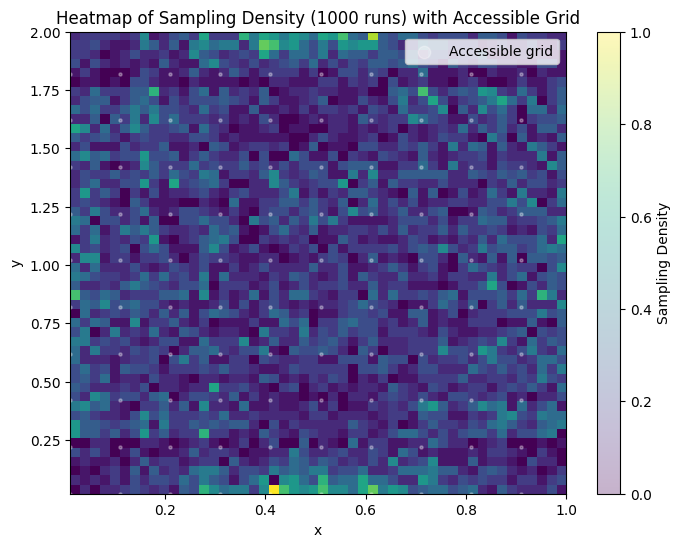

In [ ]:
#Test for sampling density, qmc based initial points
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats.qmc import LatinHypercube # Replaced pyDOE
from scipy.spatial.distance import cdist
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern


class point_selection:
    """
    This class manages the selection of new experimental points
    for a Bayesian optimization process.
    """

    def __init__(self):
        """
        Initializes the parameters for the optimization.
        """
        self.max_bounds = [(1.0), (2.0)]
        self.bound_dilution = 100
        self.bounds = [
            (self.max_bounds[0] / self.bound_dilution, self.max_bounds[0]),
            (self.max_bounds[1] / self.bound_dilution, self.max_bounds[1]),
        ]
        self.grid_step_x = 0.1
        self.grid_step_y = 0.2
        self.initial_points = 8
        self.batch_size = 8
        self.n_candidates = 500
        self.threshold = 0.05
        self.min_separation = 0.15
        self.round_decimals = 4
        self.random_state = 42
        self.rng = np.random.default_rng(self.random_state)
        self.accessible_space = self._build_accessible_space()

    def _maximin_lhs(self, n_points):
        """
        Generates an initial set of diverse points using Latin Hypercube Sampling.
        The best design is chosen by maximizing the minimum distance between points.
        This version uses scipy.stats.qmc instead of pyDOE.
        """
        dim = len(self.bounds)
        best_pts, best_min_dist = None, -np.inf

        # --- This is the main change ---
        # We use a sampler object from SciPy's QMC module
        # centered=True ensures points are sampled from the center of the hypercube intervals,
        # which is equivalent to pyDOE's 'center' criterion.
        sampler = LatinHypercube(d=dim, optimization=None, seed=self.rng)
        # --- End of main change ---

        for _ in range(self.n_candidates):
            # Generate a unit hypercube sample
            s = sampler.random(n=n_points)

            # Your original scaling logic works perfectly here
            scaled = np.array(
                [
                    s[:, i] * (self.bounds[i][1] - self.bounds[i][0])
                    + self.bounds[i][0]
                    for i in range(dim)
                ]
            ).T
            
            # Your original maximin logic remains the same
            d = cdist(scaled, scaled)
            np.fill_diagonal(d, np.inf)
            m = d.min()
            
            if m > best_min_dist:
                best_min_dist, best_pts = m, scaled
                
        return best_pts

    def _build_accessible_space(self):
        """
        Creates a discrete grid of all possible experimental points within the defined
        bounds and resolution. This serves as the search space for the algorithm.
        """
        x_vals = np.round(
            np.arange(self.bounds[0][0], self.bounds[0][1] + 1e-12, self.grid_step_x),
            10,
        )
        y_vals = np.round(
            np.arange(self.bounds[1][0], self.bounds[1][1] + 1e-12, self.grid_step_y),
            10,
        )
        xx, yy = np.meshgrid(x_vals, y_vals)
        return np.c_[xx.ravel(), yy.ravel()]

    def _select_diverse_batch(self, points, sigmas):
        """
        Selects a new batch of points by prioritizing those with high uncertainty (sigma)
        while enforcing a minimum separation distance to ensure diversity.
        """
        order = np.argsort(-sigmas)
        selected = []
        for idx in order:
            p = points[idx]
            if len(selected) == 0:
                selected.append(idx)
                if len(selected) == self.batch_size:
                    break
                continue

            dists = cdist(points[selected], p[None, :]).ravel()
            if np.all(dists >= self.min_separation):
                selected.append(idx)
                if len(selected) == self.batch_size:
                    break
        
        if len(selected) < self.batch_size:
            for idx in order:
                if idx not in selected:
                    selected.append(idx)
                    if len(selected) == self.batch_size:
                        break
                        
        return np.array(selected, dtype=int)

    def suggest_next_points(self, data=None):
        """
        The main function to suggest the next set of experimental points.

        Args:
            data (pd.DataFrame, optional): A DataFrame containing the 'X' and 'y'
                                            data from previous experiments.
                                            If None, initial points are suggested.

        Returns:
            np.ndarray: An array of shape (batch_size, 2) with the suggested points.
            None: If the optimization has converged (highest uncertainty is below threshold).
        """
        if data is None:
            return self._maximin_lhs(self.initial_points)

        X = data[["x", "y"]].values
        y = data["objective_value"].values

        tested_grid_keys = set([tuple(np.round(row, self.round_decimals)) for row in X])

        kernel = Matern(nu=2.5)
        gp = GaussianProcessRegressor(
            kernel=kernel,
            alpha=1e-6,
            normalize_y=True,
            random_state=self.random_state,
        )
        gp.fit(X, y)

        _, sigma = gp.predict(self.accessible_space, return_std=True)

        all_grid_keys = [
            tuple(np.round(row, self.round_decimals)) for row in self.accessible_space
        ]
        mask_candidates = np.array([k not in tested_grid_keys for k in all_grid_keys])
        candidates = self.accessible_space[mask_candidates]
        sigma_candidates = sigma[mask_candidates]

        max_sigma = float(np.max(sigma_candidates)) if len(sigma_candidates) else 0.0
        print(f"Max sigma among candidates: {max_sigma:.4f}")
        if (len(candidates) == 0) or (max_sigma < self.threshold):
            return None

        sel_idx_local = self._select_diverse_batch(candidates, sigma_candidates)
        X_next = candidates[sel_idx_local]

        return X_next


# # Example usage of the refactored class:
# optimizer = point_selection()

# # First call: no data provided, get initial points
# initial_points = optimizer.suggest_next_points()
# print("Initial suggested points:\n", initial_points.round(optimizer.round_decimals))

import matplotlib.pyplot as plt
import seaborn as sns

# (your full class point_selection code goes here unchanged)

# --- Run the loop 100 times and collect samples ---
optimizer = point_selection()
all_points = []

for i in range(1000):
    pts = optimizer.suggest_next_points()
    if pts is not None:
        all_points.append(pts)

# Concatenate all runs into a single array
all_points = np.vstack(all_points)

# --- Create a 2D histogram (heatmap of density) ---
x = all_points[:, 0]
y = all_points[:, 1]

# Build a 2D histogram grid over the same bounds as optimizer
heatmap, xedges, yedges = np.histogram2d(
    x, y, bins=(50, 50),
    range=[[optimizer.bounds[0][0], optimizer.bounds[0][1]],
           [optimizer.bounds[1][0], optimizer.bounds[1][1]]]
)

# Plot heatmap with accessible grid overlay
plt.figure(figsize=(8, 6))
plt.imshow(
    heatmap.T,
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    aspect='auto',
    cmap='viridis'
)

# Overlay the accessible grid points
accessible = optimizer.accessible_space
plt.scatter(accessible[:, 0], accessible[:, 1], s=5, c='white', alpha=0.3, label='Accessible grid')

plt.colorbar(label='Sampling Density')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Heatmap of Sampling Density (1000 runs) with Accessible Grid')
plt.legend(markerscale=4, loc='upper right')
plt.show()
